In [1]:
import os
import geopandas as gp
import shapely as shp
import fiona
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import operator as o
import numpy as np
import pandas as pd
import scipy as sp
import plotly.plotly as py
import plotly.tools as tls
tls.set_credentials_file(username='chidzzy', api_key='mmFpRWTJIMYJ0aEaFi8w')
import plotly.graph_objs as go
from IPython.display import Image
from plotly.grid_objs import Grid, Column
from plotly.tools import FigureFactory as FF 
import time

Hello World

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
saved_style_state = matplotlib.rcParams.copy()

In [4]:
if os.path.isfile("Fatal_Crashes_Apr_2017.csv"):
    filepath = "Fatal_Crashes_Apr_2017.csv"
    print("loading from file")
else:
    filepath = "https://bitre.gov.au/statistics/safety/files/Fatal_Crashes_Apr_2017.csv"
    print("loading from the internet")

crash_data = pd.read_csv(filepath)
print("done")

loading from the internet
done


In [5]:
if os.path.isfile("Fatalities_Apr_2017_II.csv"):
    filepath = "Fatalities_Apr_2017_II.csv"
    print("loading from file")
else:
    filepath = "https://bitre.gov.au/statistics/safety/files/Fatalities_Apr_2017_II.csv"
    print("loading from the internet")

Fatality_data = pd.read_csv(filepath)
print("done")

loading from the internet
done


In [6]:
crash_data.head()

,CrashID,State,Day,Month,Year,Hour,Minute,Crash_Type,Number_of_Fatalities,Bus_Involvement,Heavy_Rigid_Truck_Involvement,Articulated_Truck_Involvement,Speed_Limit
0,3201701010001,QLD,1,1,2017,0,0,Pedestrian,1,No,No,No,50
1,5201701010001,WA,1,1,2017,16,30,Multiple vehicle,1,No,No,No,100
2,5201701010002,WA,1,1,2017,17,14,Multiple vehicle,1,No,No,No,70
3,3201701020002,QLD,2,1,2017,3,0,Pedestrian,1,No,No,No,100
4,1201701020002,NSW,2,1,2017,13,15,Multiple vehicle,1,No,No,No,80


In [7]:
Fatality_data.head()

,CrashID,State,Day,Month,Year,Hour,Minute,Crash_Type,Bus_Involvement,Heavy_Rigid_Truck_Involvement,Articulated_Truck_Involvement,Speed_Limit,Road_User,Gender,Age
0,3201701010001,QLD,1,January,2017,0,0,Pedestrian,No,No,No,50,Pedestrian,Female,64
1,5201701010001,WA,1,January,2017,16,30,Multiple vehicle,No,No,No,100,Motorcycle rider,Male,21
2,5201701010002,WA,1,January,2017,17,14,Multiple vehicle,No,No,No,70,Driver,Male,25
3,3201701020002,QLD,2,January,2017,3,0,Pedestrian,No,No,No,100,Pedestrian,Female,30
4,1201701020002,NSW,2,January,2017,13,15,Multiple vehicle,No,No,No,80,Motorcycle rider,Male,26


In [8]:
crash_data.columns

Index(['CrashID', 'State', 'Day', 'Month', 'Year', 'Hour', 'Minute',
       'Crash_Type', 'Number_of_Fatalities', 'Bus_Involvement',
       'Heavy_Rigid_Truck_Involvement', 'Articulated_Truck_Involvement',
       'Speed_Limit'],
      dtype='object')

In [9]:
row_one = crash_data.iloc[42863]
row_one

CrashID                              2198912310681
State                                          VIC
Day                                             31
Month                                           12
Year                                          1989
Hour                                            12
Minute                                          35
Crash_Type                        Multiple vehicle
Number_of_Fatalities                             1
Bus_Involvement                                 No
Heavy_Rigid_Truck_Involvement                     
Articulated_Truck_Involvement                   No
Speed_Limit                                     60
Name: 42863, dtype: object

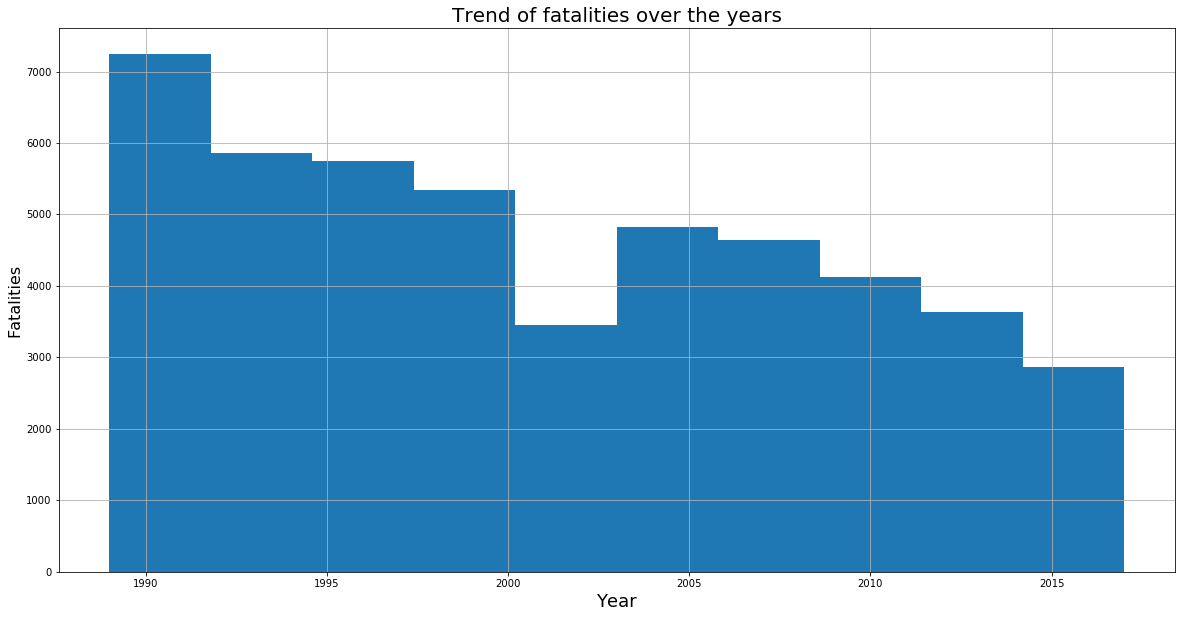

In [10]:
Fatality_data["Year"].hist()
plt.title('Trend of fatalities over the years', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Fatalities', fontsize=16)

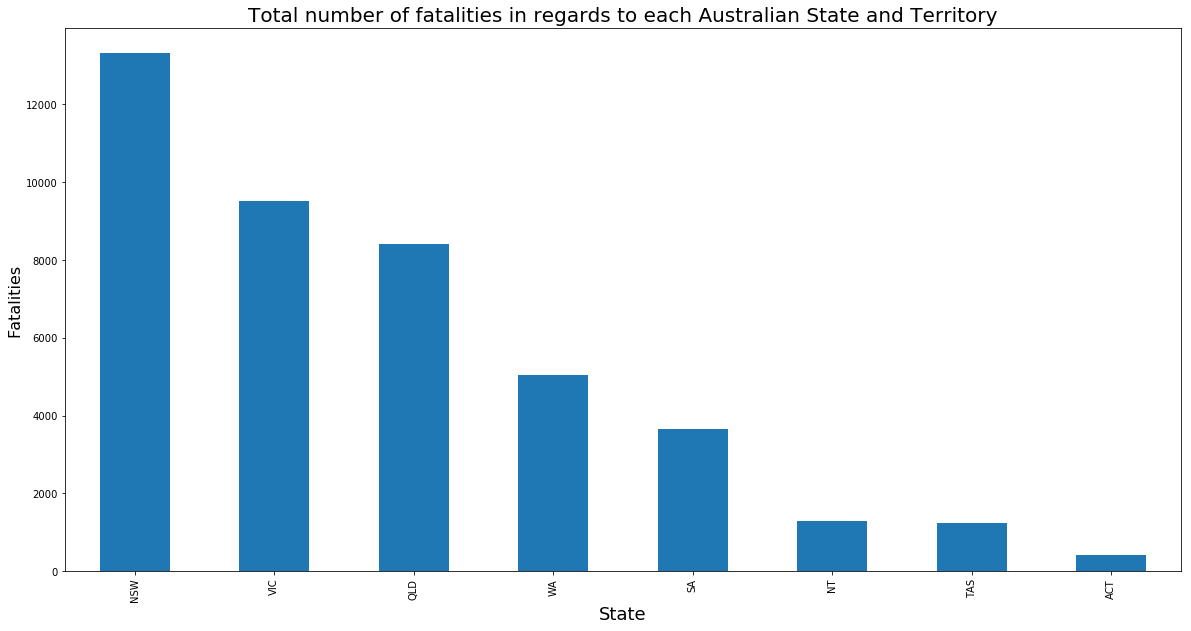

In [11]:
crash_data["State"].value_counts().plot(kind="bar")
plt.title('Total number of fatalities in regards to each Australian State and Territory', fontsize=20)
plt.xlabel('State', fontsize=18)
plt.ylabel('Fatalities', fontsize=16)

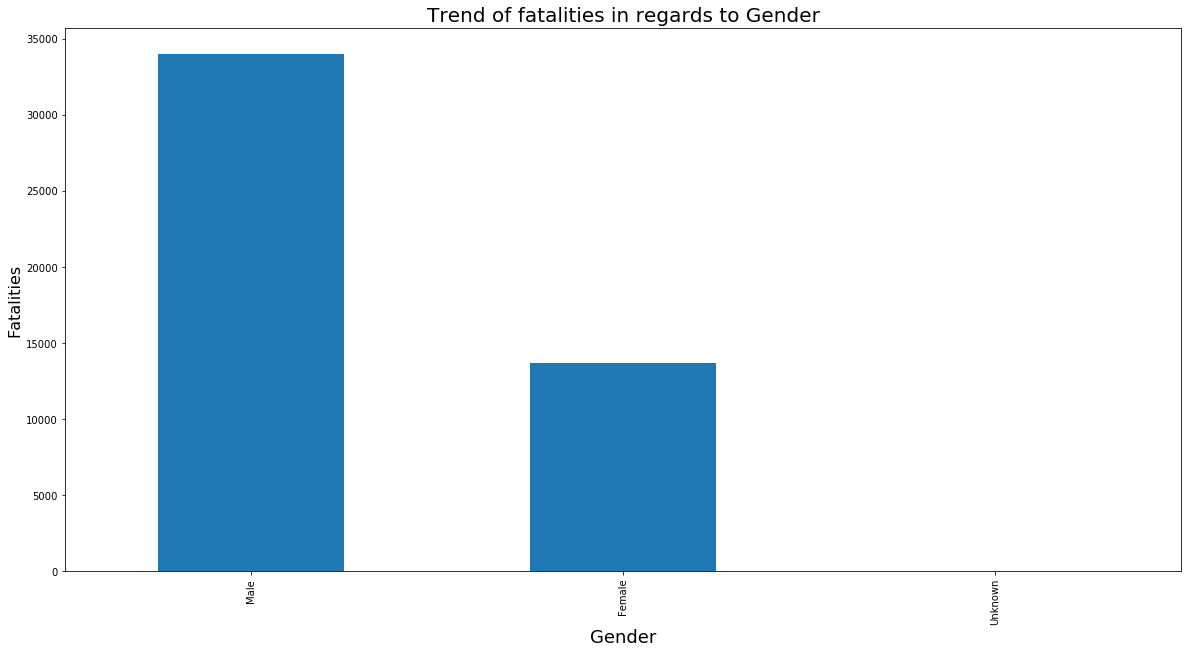

In [12]:
Fatality_data["Gender"].value_counts().plot(kind="bar")
plt.title('Trend of fatalities in regards to Gender', fontsize=20)
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Fatalities', fontsize=16)

In [13]:
# file:///C:/Users/chris/Desktop/Plot%201.html
# file:///C:/Users/chris/Desktop/Plot%202.html

In [38]:
trace1 = {
  "x": ["QLD", "WA", "WA", "QLD", "NSW", "NSW", "WA", "NSW", "NSW", "WA", "QLD", "QLD", "NSW", "VIC", "QLD", "VIC", "QLD", "NSW", "WA", "NSW", "VIC", "SA", "QLD", "NSW", "VIC", "VIC", "WA", "NSW", "SA", "QLD", "QLD", "VIC", "QLD", "NSW", "SA", "NSW", "VIC", "TAS", "WA", "NSW", "QLD", "TAS", "QLD", "QLD", "VIC", "VIC", "WA", "WA", "NSW", "VIC", "QLD", "QLD", "VIC", "NSW", "VIC", "WA", "NSW", "NSW", "NSW", "NT", "NT", "NSW", "QLD", "QLD", "QLD", "VIC", "NSW", "VIC", "NSW", "WA", "NSW", "NSW", "QLD", "WA", "VIC", "NSW", "WA", "NSW", "VIC", "VIC", "NSW", "SA", "SA", "NSW", "WA", "NSW", "QLD", "WA", "VIC", "QLD", "WA", "WA", "NSW", "NSW", "QLD", "QLD", "NT", "VIC", "QLD", "VIC", "NSW", "WA", "QLD", "NT", "QLD", "QLD", "NSW", "SA", "VIC", "VIC", "SA", "NSW", "NSW", "VIC", "NSW", "WA", "SA", "WA", "WA", "QLD", "WA", "NSW", "NSW", "QLD", "SA", "NSW", "NSW", "VIC", "QLD", "QLD", "VIC", "QLD", "NSW", "NSW", "VIC", "QLD", "NSW", "QLD", "VIC", "VIC", "NSW", "NSW", "VIC", "WA", "QLD", "WA", "NSW", "VIC", "ACT", "TAS", "NSW", "QLD", "QLD", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "NT", "NT", "QLD", "QLD", "QLD", "VIC", "VIC", "SA", "VIC", "QLD", "SA", "QLD", "SA", "QLD", "NSW", "QLD", "NSW", "SA", "QLD", "VIC", "WA", "QLD", "WA", "SA", "VIC", "NSW", "NSW", "VIC", "WA", "WA", "TAS", "SA", "WA", "NSW", "NSW", "VIC", "QLD", "SA", "WA", "VIC", "VIC", "NSW", "QLD", "WA", "NSW", "VIC", "VIC", "WA", "NSW", "NSW", "NSW", "VIC", "NSW", "VIC", "SA", "NT", "QLD", "TAS", "VIC", "QLD", "NSW", "QLD", "VIC", "WA", "VIC", "NSW", "WA", "WA", "NSW", "QLD", "VIC", "VIC", "NSW", "NSW", "WA", "VIC", "VIC", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "QLD", "NSW", "VIC", "NSW", "NSW", "WA", "VIC", "VIC", "SA", "NT", "ACT", "NSW", "QLD", "SA", "VIC", "NSW", "WA", "TAS", "TAS", "TAS", "QLD", "VIC", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "WA", "SA", "SA", "SA", "NSW", "QLD", "WA", "QLD", "VIC", "VIC", "WA", "VIC", "NT", "NSW", "QLD", "VIC", "NSW", "QLD", "QLD", "QLD", "QLD", "WA", "WA", "NSW", "VIC", "NSW", "QLD", "QLD", "NSW", "VIC", "NSW", "QLD", "SA", "NSW", "TAS", "NSW", "WA", "WA", "QLD", "SA", "VIC", "WA", "WA", "NT", "QLD", "QLD", "TAS", "WA", "WA", "QLD", "TAS", "VIC", "NSW", "QLD", "NSW", "VIC", "QLD", "WA", "QLD", "NSW", "QLD", "NSW", "NSW", "NSW", "VIC", "QLD", "VIC", "QLD", "VIC", "VIC", "NSW", "WA", "WA", "VIC", "VIC", "VIC", "QLD", "NSW", "TAS", "VIC", "VIC", "NT", "VIC", "QLD", "WA", "NSW", "WA", "QLD", "QLD", "SA", "QLD", "VIC", "VIC", "SA", "WA", "NSW", "NSW", "NSW", "SA", "WA", "QLD", "SA", "VIC", "VIC", "SA", "NSW", "NSW", "WA", "WA", "NSW", "WA", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "VIC", "QLD", "VIC", "VIC", "QLD", "VIC", "VIC", "WA", "QLD", "VIC", "VIC", "QLD", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "VIC", "QLD", "VIC", "WA", "WA", "QLD", "QLD", "QLD", "WA", "NSW", "QLD", "NT", "NSW", "VIC", "NSW", "WA", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "VIC", "QLD", "QLD", "NSW", "VIC", "NSW", "VIC", "QLD", "VIC", "NSW", "VIC", "QLD", "NSW", "NSW", "VIC", "NSW", "VIC", "NT", "NT", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "VIC", "VIC", "QLD", "VIC", "NSW", "NSW", "QLD", "VIC", "NSW", "ACT", "SA", "SA", "VIC", "VIC", "VIC", "VIC", "QLD", "WA", "WA", "NSW", "VIC", "VIC", "NSW", "NSW", "SA", "SA", "NSW", "WA", "WA", "WA", "VIC", "WA", "WA", "QLD", "TAS", "WA", "WA", "WA", "WA", "NSW", "VIC", "NSW", "WA", "VIC", "NSW", "VIC", "VIC", "QLD", "NSW", "NSW", "VIC", "VIC", "VIC", "NSW", "TAS", "QLD", "NSW", "NSW", "NSW", "QLD", "SA", "SA", "NSW", "VIC", "TAS", "WA", "QLD", "NSW", "NSW", "VIC", "VIC", "QLD", "QLD", "SA", "NSW", "VIC", "WA", "NSW", "QLD", "NT", "NSW", "QLD", "VIC", "NSW", "NT", "NSW", "VIC", "WA", "NSW", "TAS", "NSW", "QLD", "NSW", "VIC", "WA", "NSW", "VIC", "QLD", "NSW", "WA", "NSW", "WA", "VIC", "WA", "NT", "WA", "NSW", "SA", "VIC", "WA", "NSW", "NSW", "WA", "QLD", "NSW", "QLD", "QLD", "NSW", "NSW", "QLD", "QLD", "NSW", "QLD", "QLD", "NSW", "NSW", "SA", "WA", "NSW", "NSW", "NSW", "QLD", "QLD", "TAS", "QLD", "VIC", "WA", "NSW", "NSW", "NSW", "QLD", "QLD", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "SA", "QLD", "SA", "NT", "VIC", "NSW", "VIC", "NSW", "QLD", "WA", "SA", "VIC", "VIC", "NT", "QLD", "NSW", "NSW", "WA", "NSW", "VIC", "QLD", "VIC", "VIC", "VIC", "QLD", "SA", "SA", "SA", "SA", "WA", "WA", "WA", "NSW", "NSW", "NSW", "NSW", "WA", "WA", "SA", "NSW", "QLD", "QLD", "NT", "VIC", "VIC", "WA", "NSW", "QLD", "TAS", "TAS", "TAS", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "QLD", "NSW", "VIC", "TAS", "QLD", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "TAS", "NSW", "VIC", "VIC", "TAS", "NSW", "VIC", "NSW", "NT", "WA", "QLD", "QLD", "SA", "VIC", "VIC", "NSW", "VIC", "QLD", "VIC", "WA", "QLD", "QLD", "NSW", "QLD", "VIC", "VIC", "WA", "VIC", "WA", "WA", "VIC", "SA", "NSW", "WA", "VIC", "NSW", "SA", "QLD", "SA", "WA", "NSW", "NSW", "TAS", "NSW", "NSW", "WA", "VIC", "NSW", "NSW", "NSW", "NSW", "SA", "NT", "QLD", "NSW", "VIC", "VIC", "NSW", "NSW", "VIC", "QLD", "QLD", "QLD", "NSW", "VIC", "VIC", "QLD", "QLD", "WA", "WA", "NSW", "VIC", "WA", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "VIC", "QLD", "QLD", "VIC", "SA", "VIC", "NSW", "VIC", "VIC", "QLD", "QLD", "SA", "VIC", "NSW", "VIC", "NSW", "NT", "NT", "NSW", "WA", "VIC", "NT", "ACT", "NSW", "QLD", "VIC", "TAS", "NSW", "VIC", "QLD", "WA", "WA", "WA", "VIC", "NSW", "NSW", "WA", "NT", "NSW", "QLD", "QLD", "NSW", "NSW", "NSW", "QLD", "NSW", "QLD", "VIC", "VIC", "QLD", "VIC", "WA", "SA", "SA", "NSW", "QLD", "WA", "QLD", "WA", "NSW", "NSW", "NSW", "QLD", "NSW", "QLD", "QLD", "VIC", "VIC", "WA", "NSW", "NSW", "VIC", "QLD", "SA", "QLD", "VIC", "WA", "VIC", "NSW", "WA", "NSW", "NSW", "QLD", "NSW", "NSW", "VIC", "WA", "VIC", "NSW", "NSW", "NSW", "QLD", "NSW", "QLD", "SA", "NSW", "WA", "QLD", "VIC", "NSW", "NSW", "SA", "NSW", "QLD", "VIC", "QLD", "VIC", "SA", "NSW", "TAS", "TAS", "VIC", "NSW", "VIC", "NSW", "VIC", "VIC", "NSW", "VIC", "SA", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "QLD", "QLD", "QLD", "NSW", "WA", "NSW", "NSW", "VIC", "QLD", "ACT", "NSW", "QLD", "QLD", "WA", "WA", "NSW", "NSW", "QLD", "VIC", "WA", "QLD", "WA", "NSW", "WA", "SA", "SA", "VIC", "WA", "WA", "WA", "TAS", "WA", "QLD", "SA", "NSW", "NSW", "VIC", "NSW", "NSW", "NT", "QLD", "QLD", "VIC", "NSW", "NSW", "ACT", "VIC", "VIC", "VIC", "NSW", "WA", "NSW", "NSW", "QLD", "QLD", "VIC", "WA", "QLD", "VIC", "WA", "NSW", "QLD", "SA", "NSW", "NSW", "NSW", "WA", "VIC", "QLD", "NSW", "WA", "QLD", "VIC", "WA", "VIC", "QLD", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "VIC", "NSW", "WA", "NT", "NT", "QLD", "QLD", "TAS", "QLD", "QLD", "VIC", "NSW", "VIC", "VIC", "VIC", "VIC", "VIC", "QLD", "VIC", "VIC", "NT", "VIC", "NT", "VIC", "QLD", "NSW", "NSW", "WA", "VIC", "NSW", "QLD", "NSW", "QLD", "QLD", "QLD", "VIC", "WA", "NSW", "QLD", "VIC", "VIC", "QLD", "NSW", "NSW", "VIC", "NSW", "QLD", "QLD", "NSW", "VIC", "NSW", "VIC", "NSW", "NSW", "WA", "VIC", "WA", "NSW", "SA", "NSW", "NSW", "VIC", "NSW", "QLD", "VIC", "NT", "VIC", "QLD", "WA", "QLD", "NSW", "NSW", "QLD", "VIC", "NSW", "VIC", "NSW", "VIC", "NSW", "NSW", "VIC", "NT", "NSW", "VIC", "NSW", "NSW", "WA", "WA", "WA", "WA", "WA", "SA", "WA", "SA", "NSW", "WA", "WA", "QLD", "NSW", "WA", "VIC", "NSW", "NSW", "VIC", "VIC", "SA", "WA", "NSW", "VIC", "VIC", "QLD", "WA", "QLD", "VIC", "NSW", "VIC", "VIC", "NSW", "SA", "QLD", "VIC", "VIC", "NT", "QLD", "SA", "WA", "VIC", "NT", "VIC", "WA", "VIC", "VIC", "NSW", "VIC", "VIC", "QLD", "NT", "NT", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "QLD", "QLD", "VIC", "NSW", "WA", "QLD", "WA", "QLD", "QLD", "QLD", "NSW", "NSW", "ACT", "WA", "QLD", "QLD", "NSW", "NSW", "VIC", "NSW", "QLD", "VIC", "ACT", "NSW", "WA", "QLD", "VIC", "NSW", "NSW", "VIC", "QLD", "NSW", "WA", "VIC", "NSW", "TAS", "SA", "WA", "NSW", "NSW", "NSW", "WA", "NSW", "VIC", "VIC", "TAS", "TAS", "SA", "NSW", "QLD", "VIC", "NSW", "WA", "WA", "SA", "NSW", "QLD", "VIC", "NSW", "NSW", "QLD", "NSW", "VIC", "NSW", "WA", "SA", "WA", "SA", "NSW", "QLD", "NSW", "VIC", "NSW", "VIC", "WA", "QLD", "TAS", "QLD", "VIC", "SA", "VIC", "NSW", "NSW", "NSW", "TAS", "VIC", "SA", "VIC", "NSW", "QLD", "WA", "NSW", "NSW", "NSW", "VIC", "QLD", "QLD", "QLD", "QLD", "WA", "WA", "WA", "NT", "NT", "NT", "WA", "WA", "WA", "WA", "SA", "NSW", "QLD", "SA", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "NT", "SA", "QLD", "WA", "NSW", "NT", "NT", "VIC", "VIC", "SA", "VIC", "QLD", "QLD", "QLD", "NSW", "ACT", "WA", "VIC", "NSW", "VIC", "WA", "WA", "NSW", "NSW", "WA", "VIC", "NSW", "NSW", "ACT", "VIC", "NSW", "TAS", "VIC", "NT", "TAS", "WA", "QLD", "TAS", "SA", "NSW", "QLD", "QLD", "QLD", "NSW", "SA", "NSW", "NSW", "QLD", "WA", "SA", "QLD", "QLD", "VIC", "WA", "VIC", "WA", "SA", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "QLD", "WA", "WA", "NSW", "VIC", "NSW", "VIC", "WA", "QLD", "NSW", "VIC", "VIC", "SA", "NSW", "NSW", "VIC", "VIC", "WA", "NSW", "SA", "QLD", "TAS", "NSW", "QLD", "NSW", "QLD", "QLD", "VIC", "NSW", "VIC", "WA", "NSW", "VIC", "QLD", "QLD", "NSW", "WA", "NT", "QLD", "VIC", "QLD", "VIC", "WA", "SA", "ACT", "NSW", "NSW", "QLD", "VIC", "VIC", "VIC", "VIC", "VIC", "SA", "NSW", "NSW", "WA", "NT", "VIC", "NSW", "NSW", "WA", "TAS", "WA", "WA", "VIC", "NSW", "NSW", "VIC", "NSW", "QLD", "WA", "NSW", "VIC", "SA", "NSW", "SA", "QLD", "QLD", "QLD", "NSW", "VIC", "WA", "NSW", "QLD", "SA", "SA", "SA", "SA", "QLD", "NT", "WA", "WA", "SA", "WA", "WA", "NSW", "VIC", "NSW", "NSW", "QLD", "NSW", "SA", "NSW", "QLD", "VIC", "WA", "QLD", "VIC", "VIC", "VIC", "VIC", "VIC", "NSW", "QLD", "VIC", "WA", "QLD", "WA", "QLD", "NT", "NT", "QLD", "QLD", "NSW", "NSW", "NSW", "NSW", "VIC", "WA", "NSW", "VIC", "VIC", "WA", "NSW", "NSW", "QLD", "VIC", "VIC", "VIC", "NSW", "NSW", "VIC", "QLD", "NSW", "QLD", "QLD", "VIC", "NSW", "NSW", "QLD", "VIC", "QLD", "NSW", "VIC", "NSW", "NSW", "WA", "QLD", "VIC", "VIC", "SA", "NSW", "QLD", "WA", "NSW", "QLD", "QLD", "NT", "VIC", "WA", "WA", "WA", "QLD", "NSW", "QLD", "VIC", "WA", "TAS", "QLD", "QLD", "QLD", "VIC", "QLD", "QLD", "VIC", "WA", "NSW", "WA", "WA", "VIC", "QLD", "NT", "NSW", "WA", "WA", "NSW", "QLD", "VIC", "NT", "NSW", "WA", "WA", "QLD", "QLD", "VIC", "QLD", "VIC", "NSW", "SA", "WA", "VIC", "QLD", "QLD", "QLD", "VIC", "TAS", "NSW", "QLD", "NSW", "QLD", "NSW", "WA", "TAS", "NSW", "QLD", "WA", "WA", "SA", "NSW", "QLD", "VIC", "NSW", "NSW", "QLD", "WA", "VIC", "NSW", "VIC", "NSW", "VIC", "SA", "VIC", "NSW", "NSW", "VIC", "WA", "NSW", "SA", "SA", "QLD", "VIC", "VIC", "NSW", "NT", "VIC", "TAS", "VIC", "QLD", "WA", "SA", "QLD", "NSW", "WA", "NSW", "NSW", "VIC", "WA", "QLD", "NSW", "NSW", "VIC", "NSW", "SA", "QLD", "NSW", "VIC", "VIC", "VIC", "QLD", "NSW", "VIC", "VIC", "WA", "VIC", "TAS", "NSW", "SA", "VIC", "QLD", "WA", "QLD", "VIC", "VIC", "NSW", "TAS", "NSW", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "VIC", "QLD", "SA", "NSW", "VIC", "WA", "SA", "QLD", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "SA", "SA", "SA", "NSW", "NSW", "QLD", "QLD", "NSW", "SA", "SA", "QLD", "NSW", "NSW", "NSW", "WA", "SA", "NSW", "NSW", "NT", "VIC", "WA", "SA", "QLD", "NSW", "WA", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "NSW", "WA", "ACT", "QLD", "VIC", "NSW", "QLD", "VIC", "NSW", "QLD", "VIC", "VIC", "WA", "WA", "NSW", "VIC", "NSW", "QLD", "VIC", "QLD", "NSW", "NT", "NT", "VIC", "VIC", "QLD", "WA", "QLD", "VIC", "TAS", "WA", "TAS", "SA", "NT", "TAS", "TAS", "NSW", "NSW", "NSW", "WA", "NSW", "WA", "VIC", "NSW", "NSW", "QLD", "WA", "WA", "WA", "VIC", "VIC", "VIC", "WA", "VIC", "VIC", "NSW", "NSW", "VIC", "NSW", "QLD", "WA", "SA", "NSW", "QLD", "QLD", "VIC", "VIC", "NSW", "TAS", "NSW", "VIC", "WA", "QLD", "SA", "SA", "WA", "VIC", "VIC", "WA", "VIC", "NSW", "NSW", "QLD", "QLD", "NSW", "NSW", "QLD", "QLD", "WA", "WA", "QLD", "VIC", "NSW", "TAS", "WA", "NSW", "NT", "NSW", "QLD", "QLD", "WA", "VIC", "VIC", "WA", "VIC", "VIC", "VIC", "QLD", "NT", "NSW", "QLD", "VIC", "QLD", "WA", "VIC", "VIC", "WA", "NSW", "NT", "VIC", "NSW", "VIC", "VIC", "NSW", "VIC", "VIC", "NSW", "VIC", "WA", "QLD", "QLD", "SA", "WA", "NSW", "QLD", "NSW", "QLD", "VIC", "NSW", "NSW", "QLD", "QLD", "NSW", "NSW", "QLD", "NSW", "WA", "WA", "NSW", "TAS", "WA", "WA", "NSW", "QLD", "VIC", "QLD", "NSW", "VIC", "QLD", "WA", "SA", "SA", "QLD", "VIC", "NT", "WA", "WA", "WA", "WA", "TAS", "VIC", "WA", "WA", "VIC", "VIC", "NSW", "NSW", "QLD", "QLD", "NSW", "QLD", "NT", "WA", "QLD", "WA", "QLD", "SA", "NSW", "QLD", "NSW", "NSW", "VIC", "QLD", "QLD", "QLD", "NSW", "QLD", "NT", "QLD", "VIC", "VIC", "VIC", "WA", "SA", "NSW", "VIC", "QLD", "ACT", "SA", "QLD", "VIC", "VIC", "QLD", "NSW", "WA", "WA", "WA", "WA", "SA", "NSW", "QLD", "QLD", "VIC", "QLD", "VIC", "NSW", "VIC", "NSW", "VIC", "VIC", "WA", "NSW", "NSW", "VIC", "WA", "NSW", "QLD", "WA", "NSW", "NSW", "QLD", "VIC", "VIC", "NSW", "SA", "WA", "WA", "QLD", "NSW", "SA", "SA", "WA", "QLD", "SA", "NSW", "NSW", "VIC", "NSW", "NSW", "QLD", "QLD", "QLD", "SA", "VIC", "NSW", "VIC", "QLD", "WA", "VIC", "VIC", "QLD", "VIC", "VIC", "NSW", "QLD", "QLD", "NSW", "QLD", "WA", "WA", "QLD", "QLD", "QLD", "QLD", "QLD", "VIC", "QLD", "SA", "WA", "NSW", "NSW", "QLD", "VIC", "NSW", "ACT", "ACT", "NSW", "NSW", "NSW", "NT", "NT", "NT", "VIC", "NSW", "NSW", "WA", "QLD", "QLD", "VIC", "VIC", "VIC", "NSW", "WA", "TAS", "VIC", "VIC", "NSW", "QLD", "VIC", "QLD", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "NSW", "WA", "NSW", "NSW", "WA", "NSW", "QLD", "VIC", "NT", "QLD", "SA", "NSW", "NSW", "SA", "NSW", "VIC", "SA", "VIC", "QLD", "QLD", "VIC", "NSW", "TAS", "WA", "SA", "SA", "NSW", "QLD", "VIC", "NSW", "QLD", "NSW", "VIC", "QLD", "NT", "NSW", "QLD", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "VIC", "SA", "NSW", "QLD", "QLD", "VIC", "NSW", "NSW", "WA", "VIC", "VIC", "NSW", "QLD", "NSW", "QLD", "NSW", "NSW", "QLD", "NSW", "QLD", "QLD", "VIC", "SA", "NSW", "ACT", "NSW", "QLD", "QLD", "VIC", "TAS", "QLD", "SA", "QLD", "VIC", "VIC", "NSW", "NSW", "VIC", "QLD", "WA", "NSW", "SA", "SA", "SA", "WA", "WA", "QLD", "QLD", "WA", "WA", "VIC", "VIC", "VIC", "NT", "VIC", "NSW", "QLD", "WA", "NT", "NSW", "VIC", "NSW", "SA", "NT", "NT", "NT", "WA", "SA", "SA", "VIC", "ACT", "NSW", "NSW", "QLD", "VIC", "QLD", "QLD", "NSW", "NSW", "NSW", "VIC", "NSW", "WA", "TAS", "QLD", "VIC", "NSW", "NSW", "WA", "QLD", "VIC", "NSW", "SA", "QLD", "SA", "SA", "QLD", "VIC", "VIC", "NSW", "NT", "NT", "NSW", "VIC", "NSW", "NT", "NSW", "VIC", "VIC", "VIC", "VIC", "WA", "VIC", "NSW", "NT", "VIC", "TAS", "QLD", "SA", "QLD", "QLD", "NSW", "VIC", "VIC", "WA", "NSW", "VIC", "QLD", "QLD", "NT", "QLD", "VIC", "NSW", "WA", "QLD", "NSW", "VIC", "QLD", "NSW", "NSW", "NSW", "TAS", "TAS", "NSW", "QLD", "QLD", "VIC", "QLD", "NSW", "NSW", "NSW", "TAS", "NSW", "QLD", "NSW", "ACT", "VIC", "NSW", "NSW", "SA", "SA", "VIC", "WA", "NSW", "NSW", "QLD", "VIC", "NSW", "NSW", "SA", "NSW", "NSW", "ACT", "QLD", "WA", "NT", "NT", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "TAS", "QLD", "VIC", "QLD", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "WA", "TAS", "VIC", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "VIC", "QLD", "WA", "WA", "WA", "WA", "QLD", "VIC", "NSW", "QLD", "NSW", "NSW", "WA", "QLD", "QLD", "TAS", "NSW", "QLD", "WA", "NSW", "NSW", "WA", "NT", "VIC", "NSW", "WA", "QLD", "WA", "NT", "SA", "VIC", "VIC", "VIC", "NSW", "NSW", "SA", "SA", "QLD", "QLD", "WA", "NSW", "QLD", "VIC", "WA", "NSW", "SA", "VIC", "VIC", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "QLD", "VIC", "NSW", "NSW", "VIC", "NSW", "VIC", "NSW", "SA", "NSW", "NSW", "NSW", "WA", "WA", "WA", "WA", "NSW", "VIC", "WA", "SA", "NSW", "QLD", "NSW", "WA", "VIC", "QLD", "VIC", "VIC", "QLD", "WA", "QLD", "NT", "SA", "VIC", "NT", "WA", "VIC", "NSW", "NSW", "SA", "NT", "NSW", "NSW", "NSW", "QLD", "SA", "NSW", "NSW", "VIC", "WA", "NT", "SA", "QLD", "SA", "QLD", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "NT", "QLD", "WA", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "QLD", "NSW", "WA", "WA", "VIC", "SA", "ACT", "QLD", "NSW", "NSW", "VIC", "TAS", "NSW", "NT", "QLD", "QLD", "NSW", "SA", "NSW", "QLD", "WA", "NSW", "NT", "VIC", "NSW", "NSW", "NSW", "ACT", "SA", "NSW", "WA", "VIC", "VIC", "SA", "QLD", "NSW", "NSW", "NSW", "NSW", "SA", "NSW", "VIC", "QLD", "NSW", "QLD", "WA", "NT", "WA", "QLD", "QLD", "QLD", "QLD", "WA", "QLD", "NSW", "NSW", "SA", "VIC", "QLD", "NSW", "TAS", "VIC", "NSW", "VIC", "VIC", "QLD", "TAS", "VIC", "VIC", "WA", "WA", "QLD", "VIC", "QLD", "WA", "NSW", "WA", "TAS", "QLD", "WA", "QLD", "WA", "QLD", "VIC", "NSW", "NSW", "WA", "WA", "SA", "NSW", "QLD", "NSW", "QLD", "QLD", "QLD", "VIC", "VIC", "WA", "SA", "SA", "NSW", "QLD", "QLD", "NT", "VIC", "SA", "NSW", "QLD", "NSW", "VIC", "WA", "WA", "SA", "VIC", "QLD", "VIC", "VIC", "NSW", "NSW", "NSW", "VIC", "QLD", "VIC", "WA", "QLD", "WA", "SA", "NSW", "SA", "NSW", "SA", "SA", "QLD", "SA", "NSW", "TAS", "VIC", "SA", "QLD", "QLD", "SA", "NSW", "VIC", "SA", "VIC", "NSW", "NSW", "QLD", "SA", "NSW", "NSW", "SA", "VIC", "SA", "NSW", "QLD", "WA", "VIC", "NSW", "SA", "VIC", "NSW", "NSW", "WA", "NSW", "NSW", "TAS", "WA", "NSW", "NT", "NSW", "VIC", "VIC", "WA", "NSW", "VIC", "QLD", "NSW", "VIC", "QLD", "SA", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "NSW", "QLD", "QLD", "SA", "TAS", "NSW", "TAS", "VIC", "VIC", "WA", "WA", "SA", "TAS", "QLD", "QLD", "WA", "VIC", "VIC", "QLD", "NSW", "QLD", "VIC", "QLD", "QLD", "QLD", "NT", "NT", "WA", "SA", "QLD", "NSW", "NSW", "NSW", "VIC", "QLD", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "QLD", "VIC", "WA", "SA", "NSW", "NSW", "QLD", "WA", "VIC", "SA", "SA", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "NT", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "VIC", "QLD", "NSW", "VIC", "WA", "QLD", "QLD", "QLD", "QLD", "NSW", "QLD", "VIC", "QLD", "WA", "QLD", "QLD", "SA", "QLD", "SA", "NSW", "NSW", "QLD", "QLD", "WA", "NSW", "WA", "WA", "NSW", "VIC", "NSW", "NSW", "QLD", "VIC", "NSW", "NSW", "WA", "NSW", "TAS", "VIC", "QLD", "VIC", "NSW", "ACT", "VIC", "QLD", "SA", "VIC", "VIC", "WA", "QLD", "QLD", "QLD", "WA", "QLD", "SA", "WA", "NT", "WA", "WA", "WA", "WA", "VIC", "SA", "WA", "SA", "NSW", "NSW", "VIC", "VIC", "WA", "NSW", "NSW", "VIC", "VIC", "VIC", "QLD", "VIC", "VIC", "NSW", "NSW", "QLD", "NSW", "VIC", "NSW", "QLD", "NT", "NT", "NT", "WA", "WA", "SA", "VIC", "NSW", "QLD", "QLD", "WA", "SA", "NSW", "TAS", "WA", "NSW", "WA", "ACT", "ACT", "NSW", "NT", "NT", "NSW", "WA", "QLD", "QLD", "NSW", "WA", "VIC", "WA", "NSW", "NSW", "NSW", "VIC", "WA", "SA", "QLD", "VIC", "TAS", "VIC", "QLD", "NSW", "ACT", "WA", "QLD", "NSW", "NSW", "QLD", "VIC", "NSW", "QLD", "NSW", "NSW", "VIC", "ACT", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "QLD", "VIC", "NT", "WA", "QLD", "QLD", "QLD", "NSW", "QLD", "NSW", "NSW", "TAS", "NSW", "NSW", "NSW", "QLD", "WA", "VIC", "VIC", "NSW", "QLD", "NT", "NSW", "WA", "NSW", "NSW", "QLD", "NSW", "NSW", "WA", "QLD", "QLD", "NSW", "VIC", "VIC", "VIC", "VIC", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "VIC", "SA", "NSW", "SA", "VIC", "SA", "NSW", "VIC", "WA", "NSW", "SA", "NSW", "NSW", "VIC", "QLD", "QLD", "QLD", "NSW", "VIC", "WA", "QLD", "NSW", "VIC", "NSW", "VIC", "NSW", "NT", "NT", "QLD", "VIC", "QLD", "NSW", "QLD", "NSW", "VIC", "VIC", "VIC", "NSW", "VIC", "VIC", "QLD", "QLD", "TAS", "WA", "SA", "NSW", "SA", "NSW", "NSW", "NSW", "VIC", "SA", "SA", "VIC", "VIC", "VIC", "ACT", "VIC", "VIC", "QLD", "NSW", "SA", "QLD", "NSW", "VIC", "VIC", "QLD", "SA", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "TAS", "NSW", "NSW", "QLD", "VIC", "QLD", "SA", "VIC", "VIC", "WA", "WA", "ACT", "NSW", "VIC", "NSW", "NSW", "NSW", "WA", "WA", "NSW", "VIC", "VIC", "NSW", "NSW", "WA", "VIC", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "NT", "WA", "VIC", "WA", "WA", "NSW", "NSW", "QLD", "QLD", "WA", "NSW", "NSW", "VIC", "SA", "NSW", "QLD", "WA", "WA", "WA", "WA", "VIC", "WA", "NSW", "NSW", "WA", "QLD", "QLD", "QLD", "NT", "NSW", "VIC", "VIC", "VIC", "VIC", "NT", "SA", "QLD", "QLD", "WA", "WA", "VIC", "SA", "SA", "SA", "QLD", "SA", "QLD", "WA", "WA", "QLD", "NSW", "VIC", "WA", "NSW", "QLD", "SA", "NSW", "VIC", "QLD", "VIC", "VIC", "VIC", "VIC", "VIC", "TAS", "QLD", "VIC", "VIC", "VIC", "NSW", "NSW", "NSW", "VIC", "QLD", "QLD", "SA", "VIC", "NSW", "QLD", "NSW", "NSW", "NSW", "SA", "SA", "SA", "WA", "QLD", "NSW", "ACT", "NSW", "WA", "VIC", "QLD", "QLD", "SA", "NSW", "WA", "NSW", "VIC", "QLD", "WA", "WA", "WA", "WA", "WA", "SA", "WA", "VIC", "WA", "QLD", "NSW", "NT", "QLD", "NSW", "VIC", "VIC", "SA", "NSW", "NSW", "VIC", "ACT", "NT", "NT", "QLD", "QLD", "WA", "NSW", "TAS", "NSW", "WA", "QLD", "QLD", "NSW", "VIC", "NSW", "VIC", "QLD", "NSW", "VIC", "WA", "VIC", "VIC", "NSW", "NSW", "VIC", "NSW", "WA", "VIC", "VIC", "WA", "WA", "WA", "WA", "NT", "VIC", "TAS", "NSW", "NSW", "VIC", "NSW", "QLD", "TAS", "VIC", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "WA", "QLD", "VIC", "NSW", "QLD", "QLD", "NT", "NSW", "NSW", "VIC", "SA", "NSW", "NSW", "VIC", "TAS", "WA", "VIC", "NSW", "QLD", "QLD", "TAS", "WA", "WA", "WA", "NSW", "NSW", "VIC", "QLD", "WA", "WA", "QLD", "WA", "WA", "QLD", "SA", "NSW", "NSW", "VIC", "SA", "SA", "QLD", "QLD", "VIC", "NSW", "NSW", "SA", "QLD", "WA", "VIC", "NSW", "NSW", "NSW", "VIC", "SA", "NSW", "QLD", "VIC", "QLD", "NT", "SA", "NSW", "NSW", "NT", "NSW", "QLD", "SA", "QLD", "QLD", "QLD", "NSW", "NSW", "SA", "VIC", "QLD", "QLD", "VIC", "NSW", "TAS", "VIC", "NSW", "NSW", "WA", "QLD", "QLD", "VIC", "WA", "WA", "NSW", "WA", "NSW", "SA", "NSW", "VIC", "WA", "NSW", "NSW", "QLD", "NT", "NT", "NT", "NT", "NT", "QLD", "QLD", "NSW", "WA", "VIC", "VIC", "VIC", "NSW", "VIC", "VIC", "TAS", "QLD", "QLD", "QLD", "QLD", "VIC", "NSW", "NSW", "VIC", "QLD", "TAS", "TAS", "QLD", "WA", "VIC", "SA", "VIC", "VIC", "SA", "NSW", "VIC", "QLD", "NSW", "WA", "NSW", "QLD", "NSW", "VIC", "NSW", "NSW", "WA", "VIC", "NSW", "NSW", "VIC", "QLD", "NSW", "VIC", "VIC", "QLD", "QLD", "NSW", "QLD", "VIC", "SA", "NSW", "WA", "QLD", "NSW", "SA", "QLD", "VIC", "NSW", "TAS", "NSW", "QLD", "TAS", "QLD", "NSW", "VIC", "QLD", "WA", "NSW", "QLD", "WA", "NSW", "WA", "WA", "NT", "QLD", "QLD", "WA", "NSW", "NSW", "VIC", "NSW", "WA", "NSW", "NSW", "WA", "VIC", "SA", "WA", "QLD", "WA", "VIC", "NSW", "NT", "QLD", "NSW", "NSW", "QLD", "VIC", "NSW", "QLD", "NSW", "WA", "NSW", "NSW", "QLD", "SA", "SA", "QLD", "VIC", "VIC", "QLD", "VIC", "VIC", "WA", "WA", "NSW", "NT", "QLD", "WA", "VIC", "VIC", "VIC", "VIC", "NSW", "NSW", "NSW", "WA", "WA", "WA", "SA", "NSW", "ACT", "VIC", "VIC", "QLD", "WA", "WA", "VIC", "SA", "WA", "NSW", "VIC", "SA", "WA", "NT", "NSW", "VIC", "VIC", "NSW", "NSW", "WA", "QLD", "NSW", "SA", "VIC", "QLD", "VIC", "VIC", "VIC", "NSW", "VIC", "VIC", "NSW", "WA", "SA", "SA", "QLD", "TAS", "SA", "NSW", "WA", "VIC", "WA", "NSW", "QLD", "QLD", "QLD", "TAS", "QLD", "QLD", "QLD", "VIC", "TAS", "TAS", "NSW", "QLD", "NSW", "VIC", "QLD", "VIC", "WA", "NSW", "WA", "WA", "NSW", "WA", "WA", "SA", "NSW", "QLD", "QLD", "VIC", "VIC", "VIC", "VIC", "NSW", "WA", "WA", "WA", "QLD", "NT", "NSW", "QLD", "QLD", "WA", "NSW", "VIC", "SA", "NSW", "NT", "QLD", "QLD", "VIC", "SA", "VIC", "NSW", "NSW", "VIC", "NSW", "QLD", "WA", "NSW", "QLD", "NSW", "NSW", "WA", "WA", "QLD", "VIC", "QLD", "NSW", "SA", "VIC", "VIC", "VIC", "SA", "NSW", "NSW", "QLD", "NSW", "QLD", "NT", "WA", "VIC", "NSW", "ACT", "NSW", "NSW", "WA", "WA", "QLD", "NSW", "NT", "VIC", "NT", "TAS", "VIC", "NSW", "QLD", "WA", "QLD", "VIC", "VIC", "VIC", "VIC", "NSW", "NSW", "TAS", "QLD", "WA", "SA", "SA", "QLD", "QLD", "SA", "VIC", "NSW", "QLD", "VIC", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "NSW", "NSW", "NSW", "VIC", "QLD", "VIC", "WA", "SA", "WA", "NSW", "WA", "WA", "QLD", "NSW", "VIC", "WA", "QLD", "NSW", "NSW", "SA", "SA", "QLD", "QLD", "NSW", "NSW", "VIC", "VIC", "NT", "NSW", "VIC", "VIC", "NSW", "VIC", "QLD", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "NSW", "NSW", "NSW", "VIC", "QLD", "QLD", "TAS", "NSW", "QLD", "QLD", "WA", "VIC", "SA", "WA", "VIC", "QLD", "VIC", "VIC", "QLD", "SA", "WA", "NT", "NSW", "ACT", "NSW", "QLD", "NSW", "VIC", "SA", "VIC", "NT", "SA", "NSW", "VIC", "VIC", "QLD", "NSW", "NSW", "QLD", "WA", "WA", "WA", "WA", "SA", "NSW", "TAS", "NSW", "SA", "WA", "QLD", "NSW", "WA", "WA", "VIC", "VIC", "VIC", "WA", "NSW", "QLD", "ACT", "WA", "WA", "VIC", "SA", "VIC", "QLD", "QLD", "VIC", "QLD", "SA", "WA", "NSW", "QLD", "QLD", "QLD", "QLD", "NSW", "SA", "WA", "NSW", "NSW", "WA", "VIC", "SA", "VIC", "SA", "TAS", "NSW", "VIC", "QLD", "VIC", "NSW", "NSW", "TAS", "QLD", "WA", "WA", "TAS", "NSW", "VIC", "SA", "QLD", "NSW", "QLD", "NT", "NT", "VIC", "NSW", "QLD", "VIC", "NSW", "WA", "SA", "NSW", "VIC", "QLD", "QLD", "QLD", "VIC", "NSW", "WA", "WA", "WA", "NSW", "VIC", "QLD", "NSW", "QLD", "WA", "NSW", "VIC", "WA", "QLD", "QLD", "VIC", "NSW", "VIC", "WA", "WA", "NSW", "WA", "NSW", "NSW", "WA", "NSW", "SA", "NSW", "WA", "WA", "WA", "NT", "QLD", "WA", "NSW", "NT", "NT", "WA", "WA", "WA", "WA", "SA", "NSW", "NSW", "SA", "QLD", "VIC", "SA", "QLD", "QLD", "VIC", "WA", "NSW", "WA", "SA", "TAS", "VIC", "QLD", "SA", "VIC", "VIC", "VIC", "VIC", "VIC", "SA", "QLD", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "VIC", "QLD", "QLD", "VIC", "NSW", "NT", "WA", "TAS", "NSW", "NSW", "NSW", "WA", "SA", "SA", "QLD", "WA", "NSW", "NSW", "NSW", "SA", "VIC", "QLD", "TAS", "VIC", "VIC", "QLD", "QLD", "NSW", "WA", "QLD", "NSW", "QLD", "VIC", "NSW", "NSW", "VIC", "VIC", "SA", "NSW", "NSW", "VIC", "NSW", "NSW", "VIC", "VIC", "WA", "QLD", "QLD", "VIC", "SA", "WA", "WA", "SA", "QLD", "NSW", "NSW", "NSW", "WA", "WA", "NSW", "WA", "QLD", "QLD", "WA", "QLD", "QLD", "WA", "VIC", "NSW", "VIC", "VIC", "VIC", "SA", "QLD", "QLD", "QLD", "NSW", "WA", "TAS", "WA", "NSW", "TAS", "QLD", "WA", "NSW", "QLD", "VIC", "VIC", "VIC", "NSW", "WA", "ACT", "QLD", "NSW", "VIC", "VIC", "NSW", "QLD", "VIC", "NSW", "NSW", "VIC", "VIC", "SA", "NT", "VIC", "VIC", "NSW", "VIC", "VIC", "VIC", "NSW", "QLD", "SA", "SA", "SA", "SA", "NSW", "NSW", "QLD", "WA", "VIC", "VIC", "WA", "SA", "WA", "WA", "SA", "NSW", "NSW", "VIC", "WA", "VIC", "SA", "QLD", "QLD", "ACT", "NT", "WA", "VIC", "TAS", "QLD", "SA", "WA", "WA", "WA", "NSW", "QLD", "SA", "WA", "WA", "SA", "VIC", "QLD", "QLD", "WA", "NSW", "NSW", "VIC", "QLD", "VIC", "VIC", "NSW", "QLD", "WA", "NT", "NSW", "QLD", "WA", "SA", "NSW", "WA", "SA", "VIC", "NSW", "NSW", "TAS", "VIC", "WA", "QLD", "QLD", "WA", "VIC", "SA", "SA", "SA", "VIC", "SA", "NSW", "NSW", "SA", "SA", "NSW", "SA", "NSW", "NSW", "WA", "NSW", "NSW", "NT", "QLD", "QLD", "WA", "NSW", "VIC", "SA", "QLD", "NSW", "SA", "SA", "WA", "QLD", "WA", "QLD", "QLD", "WA", "VIC", "TAS", "VIC", "NSW", "QLD", "QLD", "QLD", "WA", "VIC", "NSW", "WA", "QLD", "SA", "SA", "WA", "QLD", "QLD", "WA", "SA", "QLD", "QLD", "QLD", "VIC", "QLD", "NSW", "VIC", "NSW", "WA", "QLD", "NT", "SA", "QLD", "NSW", "NSW", "QLD", "NSW", "NSW", "WA", "VIC", "VIC", "QLD", "WA", "QLD", "SA", "VIC", "VIC", "ACT", "QLD", "WA", "WA", "QLD", "SA", "TAS", "WA", "WA", "WA", "NSW", "VIC", "VIC", "NSW", "QLD", "VIC", "QLD", "QLD", "QLD", "SA", "WA", "WA", "VIC", "QLD", "QLD", "QLD", "SA", "QLD", "WA", "QLD", "NSW", "NSW", "NSW", "VIC", "WA", "WA", "WA", "VIC", "VIC", "QLD", "VIC", "NSW", "WA", "VIC", "VIC", "NSW", "QLD", "NSW", "WA", "QLD", "NSW", "TAS", "VIC", "NSW", "QLD", "VIC", "VIC", "VIC", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "TAS", "VIC", "WA", "WA", "VIC", "QLD", "QLD", "VIC", "NSW", "QLD", "WA", "WA", "SA", "QLD", "VIC", "VIC", "NSW", "VIC", "NSW", "WA", "NSW", "VIC", "NSW", "NSW", "SA", "QLD", "QLD", "NSW", "NSW", "QLD", "QLD", "QLD", "QLD", "SA", "TAS", "QLD", "QLD", "NSW", "WA", "SA", "NSW", "VIC", "NSW", "VIC", "VIC", "NSW", "NSW", "VIC", "VIC", "QLD", "VIC", "NSW", "NSW", "QLD", "QLD", "NSW", "QLD", "NT", "NSW", "QLD", "VIC", "NSW", "QLD", "QLD", "WA", "QLD", "WA", "NSW", "NSW", "QLD", "VIC", "SA", "TAS", "SA", "SA", "QLD", "QLD", "SA", "QLD", "QLD", "QLD", "NSW", "VIC", "VIC", "VIC", "QLD", "WA", "QLD", "SA", "VIC", "NSW", "NSW", "NSW", "VIC", "NSW", "SA", "SA", "NSW", "VIC", "ACT", "SA", "VIC", "NSW", "VIC", "ACT", "ACT", "VIC", "NSW", "VIC", "QLD", "NSW", "SA", "VIC", "QLD", "VIC", "QLD", "VIC", "QLD", "QLD", "NSW", "VIC", "QLD", "VIC", "NSW", "NSW", "NSW", "VIC", "SA", "SA", "WA", "NSW", "VIC", "VIC", "VIC", "SA", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "TAS", "WA", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "VIC", "VIC", "NSW", "NSW", "SA", "SA", "QLD", "QLD", "WA", "QLD", "QLD", "SA", "TAS", "TAS", "VIC", "WA", "SA", "NSW", "SA", "VIC", "VIC", "NT", "NSW", "NT", "NSW", "NSW", "QLD", "QLD", "NSW", "NSW", "QLD", "VIC", "NSW", "WA", "VIC", "SA", "NSW", "VIC", "NSW", "NSW", "QLD", "QLD", "NSW", "QLD", "VIC", "VIC", "QLD", "VIC", "VIC", "QLD", "QLD", "QLD", "NSW", "NSW", "NT", "WA", "VIC", "NSW", "QLD", "QLD", "VIC", "VIC", "TAS", "VIC", "NSW", "WA", "NSW", "QLD", "QLD", "VIC", "NSW", "NSW", "SA", "NSW", "NSW", "QLD", "VIC", "QLD", "QLD", "WA", "NT", "SA", "NSW", "VIC", "NSW", "VIC", "WA", "VIC", "NSW", "NSW", "NT", "QLD", "QLD", "QLD", "NSW", "VIC", "QLD", "NSW", "QLD", "WA", "QLD", "WA", "QLD", "VIC", "SA", "VIC", "VIC", "NT", "QLD", "QLD", "VIC", "VIC", "NSW", "WA", "TAS", "QLD", "QLD", "QLD", "VIC", "SA", "QLD", "NSW", "NSW", "QLD", "VIC", "WA", "VIC", "WA", "WA", "WA", "QLD", "QLD", "QLD", "NSW", "SA", "WA", "VIC", "NSW", "NT", "SA", "WA", "NSW", "WA", "WA", "WA", "QLD", "QLD", "NSW", "WA", "NSW", "QLD", "NSW", "NSW", "QLD", "NSW", "QLD", "QLD", "WA", "WA", "WA", "QLD", "NSW", "SA", "NSW", "WA", "NSW", "QLD", "NSW", "WA", "VIC", "WA", "NT", "NT", "QLD", "WA", "NSW", "WA", "NSW", "WA", "WA", "VIC", "QLD", "QLD", "NSW", "NSW", "QLD", "QLD", "QLD", "TAS", "NSW", "QLD", "QLD", "WA", "WA", "NSW", "WA", "WA", "QLD", "VIC", "NSW", "NSW", "VIC", "QLD", "QLD", "VIC", "NSW", "VIC", "QLD", "VIC", "VIC", "VIC", "QLD", "TAS", "QLD", "NT", "WA", "VIC", "VIC", "VIC", "NSW", "VIC", "WA", "QLD", "QLD", "QLD", "SA", "SA", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "QLD", "SA", "WA", "NSW", "NSW", "NSW", "QLD", "VIC", "NSW", "QLD", "VIC", "NSW", "VIC", "NSW", "SA", "NSW", "WA", "WA", "NT", "NSW", "NSW", "NSW", "NSW", "NSW", "TAS", "WA", "WA", "VIC", "NSW", "SA", "VIC", "NSW", "NT", "NSW", "VIC", "SA", "NSW", "NSW", "QLD", "VIC", "QLD", "SA", "NSW", "SA", "VIC", "VIC", "WA", "WA", "SA", "QLD", "QLD", "SA", "SA", "SA", "NSW", "NSW", "QLD", "WA", "WA", "QLD", "QLD", "NSW", "QLD", "NSW", "NSW", "NSW", "QLD", "NT", "WA", "VIC", "VIC", "QLD", "QLD", "NSW", "NSW", "QLD", "VIC", "NSW", "QLD", "QLD", "SA", "NT", "QLD", "VIC", "VIC", "NSW", "WA", "NSW", "WA", "VIC", "QLD", "NSW", "NSW", "QLD", "QLD", "VIC", "NSW", "VIC", "NSW", "WA", "QLD", "NSW", "SA", "QLD", "VIC", "VIC", "SA", "WA", "NSW", "QLD", "QLD", "TAS", "VIC", "VIC", "VIC", "NT", "SA", "NT", "NSW", "QLD", "VIC", "TAS", "QLD", "WA", "WA", "SA", "NSW", "VIC", "VIC", "NSW", "NSW", "SA", "NSW", "NSW", "VIC", "WA", "VIC", "NSW", "VIC", "SA", "NSW", "SA", "SA", "WA", "QLD", "NSW", "WA", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "SA", "NSW", "SA", "NSW", "VIC", "WA", "WA", "WA", "VIC", "QLD", "QLD", "VIC", "WA", "VIC", "WA", "NT", "NT", "NT", "VIC", "QLD", "VIC", "VIC", "VIC", "QLD", "NSW", "NSW", "WA", "NSW", "TAS", "QLD", "WA", "WA", "NSW", "NSW", "TAS", "QLD", "QLD", "VIC", "NT", "QLD", "NSW", "NSW", "QLD", "QLD", "NSW", "QLD", "VIC", "NSW", "NSW", "WA", "NSW", "QLD", "QLD", "ACT", "QLD", "NSW", "SA", "QLD", "WA", "VIC", "VIC", "VIC", "QLD", "NSW", "SA", "QLD", "WA", "VIC", "QLD", "NSW", "NSW", "WA", "NSW", "VIC", "NT", "NSW", "QLD", "NSW", "NSW", "VIC", "VIC", "VIC", "SA", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "WA", "QLD", "VIC", "QLD", "VIC", "SA", "VIC", "SA", "WA", "VIC", "QLD", "NSW", "QLD", "QLD", "QLD", "SA", "SA", "SA", "NSW", "NSW", "NSW", "SA", "NSW", "QLD", "NSW", "QLD", "QLD", "NSW", "QLD", "QLD", "NSW", "VIC", "NT", "TAS", "VIC", "VIC", "QLD", "NSW", "QLD", "WA", "WA", "QLD", "WA", "VIC", "VIC", "QLD", "QLD", "NSW", "WA", "QLD", "NSW", "VIC", "WA", "NT", "VIC", "NSW", "QLD", "TAS", "NSW", "WA", "VIC", "WA", "TAS", "SA", "QLD", "QLD", "ACT", "VIC", "NSW", "WA", "NSW", "QLD", "VIC", "QLD", "NSW", "QLD", "QLD", "VIC", "QLD", "WA", "NSW", "NT", "NSW", "QLD", "VIC", "NSW", "VIC", "QLD", "VIC", "VIC", "QLD", "QLD", "SA", "VIC", "WA", "QLD", "QLD", "NT", "WA", "SA", "QLD", "VIC", "VIC", "NSW", "WA", "VIC", "NSW", "WA", "QLD", "NSW", "NSW", "NSW", "WA", "NSW", "NSW", "QLD", "NT", "NT", "NSW", "VIC", "SA", "NSW", "QLD", "WA", "QLD", "VIC", "QLD", "TAS", "WA", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "SA", "QLD", "QLD", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "SA", "NSW", "WA", "NSW", "NSW", "VIC", "NSW", "SA", "TAS", "QLD", "NSW", "VIC", "NT", "QLD", "NSW", "NT", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "VIC", "NSW", "NSW", "QLD", "SA", "QLD", "VIC", "QLD", "QLD", "WA", "VIC", "NSW", "VIC", "NSW", "SA", "NSW", "WA", "QLD", "QLD", "WA", "WA", "NT", "NSW", "VIC", "VIC", "WA", "NSW", "VIC", "NSW", "NSW", "VIC", "NSW", "WA", "VIC", "WA", "QLD", "NSW", "QLD", "QLD", "NSW", "QLD", "QLD", "QLD", "QLD", "NSW", "QLD", "NSW", "NSW", "VIC", "NSW", "WA", "NSW", "VIC", "NSW", "VIC", "NSW", "VIC", "WA", "WA", "NSW", "NSW", "NSW", "VIC", "WA", "VIC", "NSW", "VIC", "NSW", "VIC", "SA", "WA", "SA", "SA", "TAS", "VIC", "QLD", "QLD", "QLD", "WA", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "QLD", "NSW", "QLD", "VIC", "QLD", "NSW", "TAS", "WA", "TAS", "WA", "VIC", "NSW", "NSW", "TAS", "NSW", "QLD", "VIC", "SA", "WA", "QLD", "WA", "TAS", "QLD", "VIC", "NSW", "VIC", "NSW", "VIC", "VIC", "TAS", "NSW", "VIC", "VIC", "NSW", "NSW", "SA", "WA", "SA", "NT", "VIC", "QLD", "NSW", "SA", "VIC", "QLD", "VIC", "NSW", "WA", "NSW", "VIC", "WA", "SA", "NT", "NSW", "NSW", "SA", "QLD", "TAS", "WA", "QLD", "QLD", "NSW", "VIC", "VIC", "VIC", "VIC", "SA", "NSW", "VIC", "VIC", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "NSW", "QLD", "TAS", "NSW", "NSW", "VIC", "SA", "TAS", "QLD", "NSW", "SA", "NSW", "VIC", "NSW", "QLD", "VIC", "VIC", "SA", "VIC", "VIC", "WA", "VIC", "QLD", "VIC", "SA", "VIC", "VIC", "QLD", "QLD", "WA", "WA", "TAS", "TAS", "WA", "VIC", "NT", "VIC", "VIC", "QLD", "QLD", "WA", "NSW", "QLD", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "WA", "QLD", "QLD", "VIC", "WA", "NSW", "VIC", "NSW", "QLD", "WA", "NSW", "VIC", "QLD", "VIC", "VIC", "NSW", "WA", "NSW", "NT", "VIC", "ACT", "NSW", "NSW", "WA", "SA", "NSW", "QLD", "TAS", "QLD", "NSW", "WA", "TAS", "VIC", "NSW", "NSW", "WA", "WA", "NSW", "NSW", "WA", "VIC", "NSW", "QLD", "QLD", "NSW", "VIC", "WA", "QLD", "VIC", "NSW", "QLD", "VIC", "QLD", "NSW", "NSW", "SA", "SA", "NSW", "NSW", "VIC", "QLD", "VIC", "TAS", "VIC", "VIC", "SA", "QLD", "QLD", "NSW", "VIC", "QLD", "WA", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "VIC", "VIC", "VIC", "QLD", "QLD", "VIC", "QLD", "NSW", "NSW", "QLD", "VIC", "NSW", "QLD", "QLD", "NSW", "WA", "QLD", "VIC", "QLD", "VIC", "WA", "VIC", "VIC", "QLD", "QLD", "NSW", "SA", "WA", "VIC", "QLD", "WA", "VIC", "NSW", "WA", "NSW", "NSW", "NSW", "NSW", "VIC", "NT", "VIC", "NSW", "QLD", "VIC", "QLD", "NSW", "WA", "QLD", "VIC", "SA", "NSW", "VIC", "NT", "NT", "VIC", "SA", "VIC", "QLD", "TAS", "NSW", "VIC", "QLD", "NSW", "WA", "VIC", "QLD", "NSW", "QLD", "NT", "VIC", "QLD", "NT", "VIC", "QLD", "WA", "WA", "WA", "NSW", "TAS", "WA", "VIC", "NSW", "QLD", "NSW", "NSW", "VIC", "NSW", "WA", "WA", "SA", "QLD", "NSW", "WA", "QLD", "QLD", "NSW", "VIC", "VIC", "VIC", "WA", "NSW", "NSW", "QLD", "NSW", "NSW", "VIC", "VIC", "VIC", "QLD", "VIC", "WA", "QLD", "WA", "SA", "VIC", "NSW", "SA", "WA", "NSW", "VIC", "NSW", "VIC", "QLD", "NSW", "TAS", "NSW", "SA", "SA", "VIC", "NSW", "NSW", "QLD", "VIC", "WA", "SA", "SA", "WA", "VIC", "NSW", "QLD", "WA", "NSW", "SA", "QLD", "WA", "VIC", "WA", "NSW", "VIC", "NSW", "QLD", "QLD", "NSW", "NSW", "TAS", "WA", "SA", "QLD", "WA", "WA", "SA", "NT", "WA", "WA", "NSW", "QLD", "QLD", "WA", "QLD", "WA", "NSW", "NSW", "SA", "NSW", "QLD", "TAS", "QLD", "WA", "VIC", "SA", "VIC", "NSW", "NSW", "NSW", "SA", "QLD", "VIC", "NSW", "NSW", "WA", "WA", "NSW", "NSW", "VIC", "NSW", "VIC", "VIC", "VIC", "VIC", "VIC", "NSW", "VIC", "VIC", "QLD", "SA", "NSW", "QLD", "VIC", "NSW", "NSW", "WA", "NSW", "NSW", "QLD", "VIC", "WA", "WA", "NSW", "VIC", "NSW", "NSW", "VIC", "NSW", "VIC", "SA", "VIC", "NSW", "SA", "SA", "NSW", "SA", "QLD", "NSW", "NSW", "NSW", "SA", "VIC", "NSW", "NSW", "NSW", "VIC", "NSW", "VIC", "WA", "QLD", "QLD", "WA", "VIC", "VIC", "WA", "VIC", "WA", "VIC", "NSW", "QLD", "NSW", "VIC", "QLD", "WA", "NSW", "NSW", "VIC", "VIC", "NSW", "QLD", "WA", "QLD", "QLD", "SA", "NSW", "VIC", "QLD", "VIC", "VIC", "VIC", "VIC", "NSW", "NT", "NT", "NSW", "QLD", "NT", "SA", "VIC", "WA", "NSW", "QLD", "SA", "NSW", "NSW", "QLD", "NSW", "QLD", "WA", "NSW", "QLD", "QLD", "VIC", "QLD", "WA", "WA", "VIC", "NSW", "NSW", "VIC", "VIC", "QLD", "VIC", "NSW", "QLD", "NSW", "VIC", "QLD", "VIC", "QLD", "SA", "QLD", "WA", "QLD", "QLD", "QLD", "SA", "NSW", "NSW", "QLD", "QLD", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "QLD", "SA", "SA", "NSW", "VIC", "NSW", "SA", "VIC", "NSW", "TAS", "NSW", "NT", "WA", "NSW", "NSW", "SA", "SA", "WA", "NSW", "WA", "ACT", "WA", "SA", "QLD", "QLD", "VIC", "WA", "VIC", "VIC", "QLD", "NSW", "QLD", "SA", "SA", "NSW", "VIC", "VIC", "VIC", "VIC", "QLD", "ACT", "VIC", "WA", "NSW", "QLD", "NSW", "VIC", "WA", "TAS", "VIC", "WA", "QLD", "QLD", "NSW", "QLD", "QLD", "QLD", "WA", "WA", "NT", "NT", "NT", "NSW", "QLD", "QLD", "WA", "NSW", "TAS", "VIC", "VIC", "NSW", "NSW", "WA", "QLD", "NSW", "WA", "NSW", "NSW", "QLD", "NSW", "NSW", "QLD", "QLD", "QLD", "VIC", "WA", "TAS", "VIC", "QLD", "NSW", "WA", "WA", "QLD", "VIC", "ACT", "NSW", "NSW", "NSW", "WA", "VIC", "VIC", "NSW", "NSW", "NSW", "VIC", "VIC", "QLD", "QLD", "NSW", "QLD", "NSW", "SA", "QLD", "NSW", "QLD", "QLD", "VIC", "NSW", "WA", "VIC", "NSW", "QLD", "NSW", "VIC", "NSW", "SA", "SA", "NSW", "QLD", "WA", "NSW", "WA", "NSW", "QLD", "VIC", "VIC", "QLD", "QLD", "QLD", "WA", "QLD", "QLD", "QLD", "NSW", "NSW", "SA", "VIC", "VIC", "NSW", "NSW", "WA", "NSW", "VIC", "NSW", "WA", "NSW", "NSW", "WA", "QLD", "NSW", "NSW", "NSW", "VIC", "ACT", "VIC", "SA", "TAS", "QLD", "SA", "VIC", "VIC", "NSW", "VIC", "NSW", "WA", "SA", "QLD", "WA", "WA", "QLD", "QLD", "VIC", "NT", "VIC", "WA", "NSW", "NSW", "NSW", "WA", "NSW", "SA", "NSW", "WA", "VIC", "WA", "QLD", "NSW", "NSW", "SA", "NSW", "NSW", "VIC", "NSW", "QLD", "ACT", "NSW", "QLD", "VIC", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "NT", "NSW", "VIC", "VIC", "NSW", "WA", "NSW", "QLD", "VIC", "NSW", "WA", "VIC", "QLD", "QLD", "VIC", "NT", "QLD", "WA", "SA", "WA", "QLD", "NSW", "VIC", "TAS", "VIC", "QLD", "NT", "NT", "NSW", "WA", "WA", "WA", "NT", "TAS", "VIC", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "SA", "QLD", "VIC", "NSW", "QLD", "WA", "WA", "NT", "QLD", "VIC", "NT", "NT", "TAS", "NSW", "NSW", "NSW", "NSW", "QLD", "WA", "VIC", "NSW", "QLD", "QLD", "QLD", "QLD", "QLD", "NSW", "WA", "SA", "WA", "QLD", "QLD", "NSW", "NT", "WA", "WA", "VIC", "VIC", "VIC", "SA", "WA", "VIC", "QLD", "VIC", "WA", "WA", "NSW", "ACT", "VIC", "VIC", "NSW", "QLD", "VIC", "QLD", "NSW", "NSW", "QLD", "NT", "WA", "NSW", "TAS", "NSW", "WA", "NSW", "WA", "WA", "NSW", "VIC", "NSW", "WA", "NSW", "SA", "VIC", "VIC", "SA", "VIC", "VIC", "NSW", "QLD", "WA", "NT", "VIC", "QLD", "QLD", "NSW", "QLD", "WA", "QLD", "NSW", "NT", "NT", "NSW", "NSW", "QLD", "NSW", "NSW", "SA", "SA", "VIC", "SA", "NSW", "VIC", "QLD", "NSW", "NT", "WA", "VIC", "WA", "VIC", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "WA", "VIC", "QLD", "NT", "NSW", "QLD", "SA", "SA", "SA", "NSW", "QLD", "QLD", "NSW", "QLD", "NSW", "NSW", "QLD", "NT", "VIC", "NSW", "WA", "QLD", "NSW", "VIC", "QLD", "NSW", "NSW", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "TAS", "VIC", "NT", "NT", "VIC", "QLD", "WA", "WA", "WA", "NSW", "NT", "QLD", "QLD", "QLD", "QLD", "VIC", "VIC", "NSW", "WA", "NSW", "NSW", "QLD", "VIC", "VIC", "VIC", "NSW", "NT", "QLD", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "NSW", "NSW", "WA", "VIC", "SA", "SA", "VIC", "QLD", "VIC", "VIC", "VIC", "VIC", "NSW", "VIC", "NSW", "QLD", "QLD", "SA", "TAS", "NSW", "QLD", "WA", "VIC", "NSW", "WA", "NSW", "QLD", "QLD", "QLD", "QLD", "NSW", "NSW", "NSW", "VIC", "NSW", "VIC", "WA", "QLD", "SA", "QLD", "NSW", "QLD", "VIC", "NSW", "VIC", "ACT", "NSW", "NSW", "SA", "QLD", "VIC", "NSW", "NT", "NSW", "SA", "WA", "NSW", "VIC", "NSW", "VIC", "NSW", "NSW", "VIC", "TAS", "TAS", "TAS", "NT", "VIC", "VIC", "NSW", "QLD", "QLD", "QLD", "NSW", "VIC", "WA", "QLD", "NSW", "WA", "WA", "WA", "SA", "QLD", "VIC", "QLD", "QLD", "NSW", "QLD", "NSW", "NSW", "QLD", "VIC", "NSW", "WA", "NSW", "QLD", "NSW", "SA", "WA", "WA", "WA", "QLD", "VIC", "QLD", "NSW", "ACT", "QLD", "VIC", "QLD", "QLD", "NSW", "QLD", "VIC", "NSW", "NT", "SA", "WA", "WA", "QLD", "NSW", "NSW", "SA", "TAS", "WA", "NSW", "VIC", "TAS", "QLD", "QLD", "QLD", "QLD", "QLD", "SA", "TAS", "NSW", "VIC", "VIC", "WA", "VIC", "VIC", "WA", "NSW", "VIC", "VIC", "NSW", "QLD", "NSW", "QLD", "WA", "NSW", "VIC", "WA", "WA", "WA", "NSW", "NSW", "NSW", "VIC", "WA", "WA", "QLD", "VIC", "QLD", "VIC", "QLD", "WA", "QLD", "WA", "NT", "VIC", "VIC", "QLD", "ACT", "VIC", "NT", "VIC", "NSW", "QLD", "VIC", "VIC", "QLD", "NSW", "VIC", "VIC", "NT", "VIC", "VIC", "NSW", "WA", "WA", "WA", "NSW", "VIC", "VIC", "QLD", "WA", "TAS", "QLD", "WA", "NSW", "NSW", "QLD", "NSW", "WA", "WA", "VIC", "QLD", "QLD", "QLD", "NSW", "QLD", "WA", "SA", "VIC", "VIC", "VIC", "QLD", "SA", "SA", "NSW", "VIC", "QLD", "NSW", "SA", "NSW", "VIC", "VIC", "WA", "QLD", "VIC", "NSW", "QLD", "NSW", "QLD", "VIC", "SA", "VIC", "QLD", "QLD", "VIC", "VIC", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "TAS", "NSW", "QLD", "NSW", "VIC", "ACT", "WA", "WA", "WA", "QLD", "QLD", "VIC", "WA", "WA", "WA", "QLD", "WA", "NSW", "VIC", "VIC", "NSW", "QLD", "QLD", "VIC", "VIC", "VIC", "NT", "NT", "NT", "NSW", "NSW", "WA", "QLD", "VIC", "VIC", "QLD", "NSW", "QLD", "NSW", "WA", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "VIC", "SA", "WA", "QLD", "NSW", "NSW", "NSW", "VIC", "QLD", "WA", "VIC", "NSW", "NSW", "WA", "VIC", "QLD", "QLD", "WA", "NT", "QLD", "VIC", "QLD", "QLD", "WA", "SA", "NSW", "WA", "SA", "VIC", "NSW", "QLD", "NSW", "WA", "VIC", "VIC", "NSW", "SA", "WA", "NSW", "NSW", "ACT", "NSW", "VIC", "QLD", "SA", "NSW", "SA", "SA", "SA", "QLD", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "VIC", "QLD", "NSW", "NSW", "WA", "VIC", "VIC", "QLD", "NSW", "QLD", "VIC", "QLD", "WA", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "TAS", "VIC", "WA", "SA", "TAS", "VIC", "VIC", "NSW", "NSW", "NSW", "VIC", "QLD", "QLD", "NSW", "NSW", "WA", "NSW", "NSW", "NT", "WA", "QLD", "VIC", "QLD", "QLD", "QLD", "QLD", "QLD", "VIC", "VIC", "VIC", "VIC", "VIC", "TAS", "NSW", "NSW", "SA", "NSW", "VIC", "VIC", "VIC", "QLD", "NSW", "WA", "WA", "QLD", "WA", "QLD", "SA", "NSW", "QLD", "WA", "QLD", "NSW", "NSW", "QLD", "VIC", "QLD", "WA", "SA", "QLD", "ACT", "WA", "QLD", "QLD", "WA", "NSW", "VIC", "NSW", "SA", "NT", "NT", "NT", "QLD", "VIC", "NSW", "TAS", "VIC", "VIC", "WA", "SA", "VIC", "VIC", "SA", "VIC", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "NSW", "WA", "WA", "VIC", "NSW", "SA", "QLD", "SA", "WA", "QLD", "TAS", "VIC", "NT", "NSW", "WA", "SA", "VIC", "NSW", "TAS", "SA", "NSW", "VIC", "QLD", "NSW", "WA", "QLD", "VIC", "QLD", "NSW", "NSW", "SA", "WA", "TAS", "TAS", "NSW", "SA", "NSW", "SA", "SA", "SA", "ACT", "NSW", "VIC", "VIC", "QLD", "NSW", "WA", "QLD", "QLD", "VIC", "VIC", "QLD", "NSW", "NSW", "SA", "SA", "SA", "SA", "VIC", "VIC", "WA", "NSW", "VIC", "NSW", "NSW", "NSW", "ACT", "SA", "NSW", "VIC", "VIC", "QLD", "WA", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "SA", "NSW", "QLD", "NSW", "VIC", "NSW", "NSW", "WA", "VIC", "QLD", "QLD", "QLD", "QLD", "QLD", "NSW", "WA", "WA", "VIC", "WA", "VIC", "VIC", "WA", "QLD", "QLD", "QLD", "NSW", "TAS", "NSW", "VIC", "NSW", "SA", "SA", "NSW", "VIC", "QLD", "QLD", "NSW", "QLD", "VIC", "NSW", "NSW", "VIC", "WA", "WA", "WA", "NSW", "QLD", "WA", "VIC", "QLD", "QLD", "VIC", "WA", "NSW", "WA", "QLD", "VIC", "WA", "VIC", "WA", "NSW", "NSW", "SA", "WA", "NSW", "NSW", "QLD", "SA", "VIC", "NSW", "VIC", "VIC", "NSW", "WA", "SA", "NT", "WA", "TAS", "QLD", "WA", "NSW", "NSW", "NSW", "QLD", "WA", "TAS", "NT", "NSW", "SA", "VIC", "WA", "VIC", "NSW", "WA", "NSW", "VIC", "VIC", "NSW", "NSW", "WA", "WA", "SA", "QLD", "QLD", "WA", "NSW", "NSW", "SA", "QLD", "QLD", "VIC", "NSW", "QLD", "VIC", "VIC", "NSW", "NSW", "NSW", "SA", "NSW", "NSW", "NSW", "VIC", "NSW", "VIC", "SA", "VIC", "WA", "WA", "QLD", "WA", "NSW", "TAS", "NSW", "SA", "VIC", "VIC", "VIC", "QLD", "VIC", "NSW", "NSW", "VIC", "VIC", "QLD", "SA", "VIC", "QLD", "QLD", "NSW", "WA", "VIC", "VIC", "QLD", "WA", "VIC", "NSW", "NSW", "TAS", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "QLD", "NSW", "QLD", "VIC", "ACT", "VIC", "NSW", "NSW", "VIC", "VIC", "VIC", "QLD", "QLD", "WA", "WA", "QLD", "NSW", "ACT", "NSW", "WA", "QLD", "NSW", "NSW", "NSW", "VIC", "VIC", "SA", "VIC", "NSW", "NSW", "QLD", "VIC", "NSW", "VIC", "VIC", "NSW", "QLD", "WA", "SA", "WA", "WA", "NSW", "NSW", "SA", "VIC", "VIC", "VIC", "QLD", "NSW", "VIC", "VIC", "QLD", "QLD", "QLD", "VIC", "VIC", "VIC", "ACT", "NSW", "QLD", "NSW", "SA", "WA", "SA", "QLD", "ACT", "QLD", "VIC", "VIC", "QLD", "WA", "VIC", "VIC", "NSW", "QLD", "NSW", "VIC", "QLD", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "VIC", "NSW", "QLD", "NSW", "VIC", "VIC", "SA", "VIC", "VIC", "SA", "NSW", "VIC", "NSW", "VIC", "VIC", "QLD", "QLD", "QLD", "QLD", "QLD", "VIC", "VIC", "WA", "VIC", "QLD", "QLD", "WA", "SA", "VIC", "QLD", "SA", "SA", "QLD", "TAS", "SA", "NSW", "NT", "VIC", "SA", "WA", "NSW", "NSW", "NSW", "VIC", "QLD", "WA", "NSW", "WA", "VIC", "SA", "VIC", "WA", "NSW", "NSW", "WA", "SA", "NSW", "NSW", "VIC", "NSW", "WA", "VIC", "VIC", "VIC", "SA", "WA", "WA", "NSW", "SA", "VIC", "QLD", "WA", "NSW", "WA", "WA", "VIC", "TAS", "WA", "NSW", "QLD", "NSW", "QLD", "WA", "VIC", "QLD", "QLD", "QLD", "NSW", "VIC", "VIC", "VIC", "NSW", "VIC", "NT", "NT", "QLD", "QLD", "QLD", "NSW", "SA", "VIC", "WA", "WA", "WA", "VIC", "WA", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "QLD", "SA", "NSW", "WA", "VIC", "NSW", "NSW", "VIC", "SA", "SA", "WA", "NT", "SA", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "VIC", "NT", "WA", "SA", "NSW", "QLD", "VIC", "QLD", "TAS", "VIC", "QLD", "QLD", "QLD", "QLD", "NSW", "SA", "SA", "VIC", "QLD", "SA", "NSW", "NSW", "VIC", "QLD", "QLD", "VIC", "VIC", "WA", "NSW", "VIC", "VIC", "WA", "VIC", "QLD", "VIC", "SA", "VIC", "QLD", "VIC", "WA", "VIC", "QLD", "VIC", "QLD", "QLD", "WA", "VIC", "NSW", "VIC", "WA", "WA", "NSW", "VIC", "VIC", "SA", "NSW", "WA", "QLD", "VIC", "SA", "WA", "NSW", "NSW", "QLD", "WA", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "TAS", "NSW", "VIC", "NSW", "WA", "VIC", "NSW", "NSW", "QLD", "VIC", "VIC", "QLD", "VIC", "SA", "NSW", "SA", "TAS", "WA", "NSW", "QLD", "VIC", "NT", "WA", "TAS", "WA", "WA", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "NSW", "WA", "QLD", "NSW", "VIC", "WA", "QLD", "NSW", "VIC", "VIC", "VIC", "TAS", "NSW", "VIC", "WA", "SA", "WA", "NSW", "WA", "QLD", "NSW", "NSW", "SA", "SA", "SA", "SA", "NSW", "NT", "NSW", "WA", "TAS", "VIC", "NSW", "NSW", "NSW", "SA", "SA", "WA", "QLD", "QLD", "VIC", "TAS", "NSW", "NSW", "VIC", "WA", "VIC", "TAS", "QLD", "QLD", "VIC", "VIC", "NSW", "WA", "WA", "VIC", "NSW", "NSW", "QLD", "QLD", "NSW", "VIC", "NT", "QLD", "QLD", "WA", "WA", "NT", "NSW", "VIC", "SA", "QLD", "NSW", "VIC", "VIC", "VIC", "VIC", "NSW", "VIC", "QLD", "QLD", "WA", "NSW", "SA", "NSW", "QLD", "QLD", "NSW", "QLD", "QLD", "QLD", "NSW", "VIC", "VIC", "NSW", "NT", "NT", "VIC", "QLD", "QLD", "WA", "NSW", "WA", "VIC", "NSW", "NSW", "NT", "VIC", "VIC", "NSW", "VIC", "VIC", "NSW", "VIC", "QLD", "VIC", "QLD", "NSW", "NSW", "VIC", "NSW", "NSW", "WA", "QLD", "QLD", "QLD", "SA", "QLD", "QLD", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "QLD", "QLD", "WA", "NSW", "QLD", "QLD", "NT", "NT", "VIC", "WA", "SA", "NSW", "QLD", "VIC", "VIC", "VIC", "NT", "NT", "NSW", "NSW", "NT", "NT", "VIC", "VIC", "NSW", "NSW", "NSW", "QLD", "VIC", "VIC", "QLD", "VIC", "NSW", "SA", "QLD", "QLD", "QLD", "SA", "SA", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "SA", "SA", "QLD", "VIC", "WA", "QLD", "SA", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "SA", "QLD", "NSW", "WA", "QLD", "VIC", "NSW", "VIC", "NT", "NT", "NT", "QLD", "SA", "WA", "NSW", "QLD", "VIC", "NSW", "VIC", "NSW", "WA", "NSW", "QLD", "SA", "VIC", "WA", "NSW", "NSW", "WA", "NSW", "VIC", "VIC", "QLD", "QLD", "QLD", "WA", "NSW", "QLD", "SA", "SA", "VIC", "QLD", "QLD", "QLD", "QLD", "NSW", "QLD", "QLD", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "SA", "QLD", "WA", "WA", "NSW", "QLD", "WA", "NSW", "WA", "WA", "NSW", "TAS", "QLD", "QLD", "VIC", "NSW", "SA", "QLD", "QLD", "NSW", "NSW", "QLD", "NSW", "NSW", "QLD", "NSW", "QLD", "WA", "WA", "WA", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "QLD", "WA", "QLD", "WA", "WA", "SA", "QLD", "VIC", "WA", "NSW", "NSW", "NSW", "NSW", "WA", "WA", "QLD", "NSW", "WA", "NSW", "VIC", "QLD", "QLD", "NSW", "NT", "QLD", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "NSW", "WA", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "WA", "NSW", "WA", "VIC", "NT", "NSW", "NSW", "VIC", "WA", "SA", "WA", "SA", "NT", "WA", "NSW", "NSW", "NSW", "QLD", "VIC", "SA", "NSW", "SA", "QLD", "WA", "NSW", "NT", "NT", "WA", "NSW", "VIC", "WA", "QLD", "NSW", "WA", "QLD", "NSW", "QLD", "QLD", "VIC", "VIC", "QLD", "SA", "VIC", "NSW", "QLD", "NSW", "VIC", "NSW", "WA", "NSW", "QLD", "WA", "VIC", "WA", "WA", "QLD", "QLD", "SA", "NSW", "NSW", "NSW", "NSW", "NT", "VIC", "VIC", "VIC", "NSW", "NT", "NSW", "NSW", "WA", "VIC", "QLD", "NSW", "NSW", "VIC", "NT", "NT", "VIC", "NSW", "NSW", "WA", "SA", "VIC", "WA", "WA", "NSW", "QLD", "QLD", "VIC", "QLD", "WA", "WA", "VIC", "NSW", "QLD", "NSW", "QLD", "QLD", "VIC", "VIC", "QLD", "WA", "WA", "QLD", "WA", "WA", "SA", "WA", "QLD", "NSW", "VIC", "NSW", "SA", "QLD", "QLD", "SA", "TAS", "NSW", "VIC", "WA", "NSW", "VIC", "NSW", "VIC", "QLD", "NSW", "NSW", "NSW", "WA", "NT", "WA", "SA", "SA", "VIC", "VIC", "VIC", "VIC", "QLD", "VIC", "NSW", "VIC", "WA", "WA", "VIC", "NSW", "WA", "NSW", "WA", "QLD", "QLD", "QLD", "VIC", "VIC", "QLD", "QLD", "NSW", "QLD", "QLD", "WA", "SA", "WA", "NSW", "VIC", "NSW", "QLD", "NSW", "WA", "NSW", "VIC", "NSW", "NSW", "SA", "NT", "NSW", "VIC", "NT", "WA", "NSW", "QLD", "VIC", "SA", "SA", "NSW", "NSW", "WA", "NT", "NT", "NT", "VIC", "QLD", "QLD", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "NSW", "WA", "NSW", "TAS", "TAS", "QLD", "NSW", "QLD", "VIC", "QLD", "WA", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "VIC", "WA", "VIC", "VIC", "NSW", "WA", "NSW", "NSW", "NSW", "NSW", "SA", "VIC", "VIC", "VIC", "NT", "VIC", "QLD", "QLD", "QLD", "QLD", "QLD", "WA", "TAS", "NSW", "VIC", "QLD", "VIC", "NSW", "VIC", "WA", "QLD", "QLD", "QLD", "QLD", "VIC", "VIC", "QLD", "WA", "NSW", "SA", "NSW", "QLD", "QLD", "QLD", "NSW", "QLD", "NSW", "WA", "NSW", "NSW", "WA", "QLD", "NSW", "QLD", "QLD", "WA", "NSW", "VIC", "VIC", "NSW", "SA", "QLD", "QLD", "QLD", "VIC", "VIC", "VIC", "NSW", "VIC", "VIC", "NSW", "NSW", "QLD", "VIC", "WA", "SA", "NSW", "VIC", "VIC", "VIC", "QLD", "QLD", "QLD", "NSW", "VIC", "WA", "NSW", "QLD", "NSW", "NSW", "WA", "WA", "NSW", "TAS", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "QLD", "NSW", "WA", "NT", "NT", "QLD", "NSW", "QLD", "QLD", "VIC", "QLD", "NT", "VIC", "NSW", "QLD", "VIC", "SA", "WA", "NSW", "QLD", "VIC", "VIC", "QLD", "VIC", "VIC", "NSW", "NSW", "NSW", "WA", "WA", "NSW", "NSW", "QLD", "VIC", "SA", "NSW", "NSW", "VIC", "NT", "VIC", "NT", "NSW", "WA", "VIC", "SA", "NSW", "QLD", "WA", "QLD", "QLD", "NSW", "NSW", "NT", "SA", "NSW", "NSW", "NSW", "QLD", "VIC", "VIC", "SA", "QLD", "NSW", "NSW", "WA", "NSW", "QLD", "NSW", "VIC", "WA", "WA", "NSW", "VIC", "QLD", "TAS", "NSW", "QLD", "NSW", "WA", "WA", "VIC", "WA", "NSW", "NSW", "SA", "QLD", "VIC", "QLD", "NSW", "NSW", "VIC", "VIC", "NSW", "WA", "SA", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "TAS", "NSW", "NT", "VIC", "VIC", "NSW", "VIC", "NSW", "VIC", "TAS", "TAS", "SA", "VIC", "WA", "QLD", "NSW", "NSW", "NSW", "NSW", "WA", "SA", "SA", "SA", "SA", "SA", "WA", "WA", "QLD", "QLD", "WA", "NSW", "QLD", "QLD", "NSW", "NSW", "NSW", "SA", "SA", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "SA", "NSW", "VIC", "NT", "VIC", "VIC", "NT", "NSW", "SA", "WA", "QLD", "NSW", "QLD", "WA", "NSW", "WA", "SA", "SA", "QLD", "QLD", "NSW", "SA", "NSW", "SA", "VIC", "SA", "VIC", "SA", "SA", "SA", "NSW", "NSW", "VIC", "VIC", "TAS", "NSW", "NSW", "ACT", "NT", "NSW", "NSW", "NSW", "NSW", "VIC", "SA", "QLD", "VIC", "NT", "WA", "NSW", "QLD", "VIC", "VIC", "VIC", "QLD", "QLD", "VIC", "VIC", "QLD", "NSW", "VIC", "VIC", "QLD", "QLD", "NSW", "VIC", "TAS", "NSW", "SA", "NSW", "NSW", "QLD", "QLD", "VIC", "SA", "NSW", "QLD", "QLD", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "WA", "SA", "NSW", "NSW", "NSW", "VIC", "VIC", "ACT", "SA", "NSW", "NSW", "TAS", "NSW", "VIC", "NSW", "NSW", "NSW", "QLD", "QLD", "VIC", "QLD", "NSW", "QLD", "VIC", "SA", "QLD", "VIC", "QLD", "QLD", "VIC", "VIC", "VIC", "VIC", "NSW", "SA", "WA", "VIC", "QLD", "NSW", "VIC", "QLD", "VIC", "VIC", "NSW", "WA", "NSW", "ACT", "WA", "NSW", "QLD", "NSW", "VIC", "SA", "NT", "SA", "VIC", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "QLD", "NSW", "VIC", "NSW", "VIC", "SA", "QLD", "QLD", "VIC", "NSW", "VIC", "QLD", "QLD", "VIC", "QLD", "SA", "SA", "NSW", "TAS", "NSW", "QLD", "TAS", "TAS", "VIC", "NSW", "SA", "NSW", "NSW", "WA", "WA", "VIC", "QLD", "WA", "WA", "NSW", "WA", "ACT", "WA", "NSW", "NSW", "VIC", "NSW", "NSW", "VIC", "NSW", "NT", "QLD", "NT", "VIC", "QLD", "WA", "NSW", "VIC", "VIC", "VIC", "NSW", "VIC", "NSW", "SA", "NSW", "QLD", "WA", "NSW", "VIC", "WA", "SA", "NSW", "SA", "NSW", "WA", "WA", "QLD", "QLD", "ACT", "ACT", "ACT", "ACT", "VIC", "NSW", "VIC", "WA", "SA", "WA", "WA", "NSW", "WA", "VIC", "TAS", "VIC", "WA", "QLD", "SA", "VIC", "NT", "VIC", "NSW", "VIC", "VIC", "SA", "NSW", "WA", "VIC", "QLD", "NSW", "QLD", "QLD", "NSW", "VIC", "NSW", "SA", "NSW", "WA", "ACT", "VIC", "VIC", "SA", "VIC", "QLD", "NSW", "SA", "QLD", "SA", "NSW", "NSW", "VIC", "NSW", "NSW", "QLD", "NSW", "QLD", "QLD", "NSW", "VIC", "NSW", "VIC", "VIC", "WA", "NSW", "NSW", "NSW", "WA", "NSW", "NT", "QLD", "QLD", "QLD", "VIC", "WA", "SA", "SA", "QLD", "QLD", "QLD", "NSW", "NSW", "NSW", "WA", "SA", "VIC", "VIC", "QLD", "NT", "NSW", "VIC", "QLD", "NSW", "VIC", "WA", "WA", "VIC", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "ACT", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "WA", "WA", "QLD", "NSW", "NSW", "VIC", "WA", "WA", "WA", "WA", "NSW", "NSW", "NSW", "QLD", "NSW", "QLD", "NSW", "NSW", "SA", "SA", "NSW", "NSW", "SA", "VIC", "WA", "NSW", "QLD", "WA", "QLD", "TAS", "NSW", "NSW", "WA", "QLD", "VIC", "VIC", "NSW", "NSW", "VIC", "NSW", "ACT", "WA", "WA", "VIC", "WA", "NSW", "NSW", "WA", "QLD", "QLD", "SA", "VIC", "NSW", "NSW", "VIC", "SA", "SA", "QLD", "NSW", "NSW", "SA", "WA", "NSW", "NSW", "WA", "QLD", "VIC", "NSW", "SA", "NSW", "QLD", "QLD", "QLD", "SA", "QLD", "NSW", "VIC", "WA", "QLD", "WA", "VIC", "TAS", "VIC", "QLD", "NSW", "NSW", "QLD", "QLD", "WA", "NSW", "VIC", "VIC", "VIC", "VIC", "QLD", "VIC", "NSW", "WA", "WA", "QLD", "VIC", "TAS", "QLD", "WA", "NSW", "NSW", "QLD", "TAS", "NSW", "NT", "ACT", "WA", "WA", "NSW", "ACT", "NT", "NSW", "NSW", "VIC", "VIC", "WA", "QLD", "NSW", "NT", "NSW", "NSW", "QLD", "TAS", "NSW", "SA", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "QLD", "NSW", "VIC", "SA", "NSW", "VIC", "VIC", "NSW", "QLD", "TAS", "VIC", "VIC", "NSW", "NSW", "NSW", "VIC", "VIC", "QLD", "SA", "VIC", "QLD", "WA", "SA", "VIC", "VIC", "WA", "WA", "SA", "WA", "VIC", "VIC", "NSW", "VIC", "NSW", "ACT", "WA", "WA", "WA", "SA", "QLD", "NSW", "QLD", "NSW", "WA", "VIC", "NSW", "VIC", "QLD", "QLD", "WA", "NSW", "NSW", "QLD", "NT", "WA", "NSW", "NSW", "QLD", "NSW", "NSW", "VIC", "VIC", "WA", "WA", "QLD", "SA", "SA", "WA", "QLD", "NSW", "WA", "VIC", "VIC", "VIC", "NT", "VIC", "QLD", "NSW", "QLD", "VIC", "QLD", "NSW", "NT", "QLD", "WA", "QLD", "SA", "QLD", "NSW", "WA", "VIC", "NSW", "NSW", "SA", "WA", "QLD", "NSW", "NSW", "SA", "VIC", "NSW", "NSW", "SA", "QLD", "VIC", "VIC", "NSW", "VIC", "VIC", "VIC", "TAS", "SA", "QLD", "QLD", "QLD", "ACT", "VIC", "VIC", "WA", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "VIC", "VIC", "VIC", "QLD", "SA", "NSW", "QLD", "QLD", "NSW", "QLD", "VIC", "VIC", "WA", "WA", "VIC", "VIC", "QLD", "NSW", "WA", "NT", "VIC", "VIC", "NSW", "VIC", "QLD", "QLD", "WA", "WA", "VIC", "NSW", "NSW", "SA", "SA", "QLD", "VIC", "NSW", "WA", "WA", "NSW", "VIC", "QLD", "WA", "NSW", "VIC", "SA", "WA", "NSW", "SA", "VIC", "NSW", "NSW", "QLD", "QLD", "WA", "QLD", "NT", "NT", "NSW", "SA", "NSW", "VIC", "QLD", "NSW", "SA", "NSW", "VIC", "NSW", "TAS", "NT", "ACT", "ACT", "NSW", "VIC", "NSW", "WA", "QLD", "QLD", "WA", "VIC", "SA", "QLD", "QLD", "QLD", "VIC", "QLD", "QLD", "NT", "VIC", "NT", "VIC", "QLD", "NT", "NT", "VIC", "WA", "QLD", "VIC", "NSW", "VIC", "NSW", "NSW", "QLD", "QLD", "NT", "TAS", "VIC", "WA", "VIC", "NSW", "NSW", "WA", "NT", "NSW", "NSW", "VIC", "VIC", "QLD", "VIC", "VIC", "WA", "VIC", "QLD", "QLD", "VIC", "QLD", "VIC", "NT", "WA", "NSW", "SA", "VIC", "NT", "VIC", "VIC", "WA", "WA", "NSW", "NSW", "NSW", "QLD", "WA", "WA", "TAS", "VIC", "VIC", "NT", "VIC", "NT", "NSW", "SA", "NSW", "WA", "WA", "VIC", "NSW", "QLD", "NT", "NSW", "NSW", "VIC", "NSW", "NSW", "QLD", "WA", "NSW", "WA", "VIC", "WA", "NSW", "NSW", "VIC", "VIC", "NSW", "QLD", "NSW", "QLD", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "WA", "QLD", "TAS", "VIC", "VIC", "VIC", "QLD", "QLD", "SA", "WA", "NSW", "SA", "VIC", "QLD", "WA", "QLD", "VIC", "SA", "QLD", "NT", "QLD", "NSW", "NSW", "NSW", "SA", "TAS", "NSW", "WA", "NSW", "WA", "SA", "WA", "VIC", "QLD", "NT", "QLD", "WA", "NSW", "SA", "NSW", "NSW", "QLD", "WA", "WA", "NT", "VIC", "NSW", "VIC", "NSW", "NSW", "QLD", "NSW", "SA", "WA", "NSW", "NSW", "WA", "NSW", "QLD", "QLD", "QLD", "QLD", "QLD", "TAS", "VIC", "QLD", "NT", "WA", "VIC", "VIC", "QLD", "NSW", "WA", "NSW", "QLD", "QLD", "VIC", "NSW", "NSW", "WA", "WA", "NSW", "QLD", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "WA", "NSW", "NSW", "NSW", "QLD", "QLD", "NT", "NSW", "QLD", "NSW", "VIC", "SA", "VIC", "VIC", "QLD", "VIC", "WA", "NSW", "QLD", "QLD", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "WA", "VIC", "VIC", "WA", "WA", "WA", "NSW", "NSW", "WA", "NSW", "NSW", "NSW", "NSW", "WA", "VIC", "ACT", "QLD", "WA", "QLD", "QLD", "VIC", "QLD", "VIC", "VIC", "WA", "NSW", "NSW", "NSW", "NSW", "SA", "NSW", "NSW", "NSW", "QLD", "QLD", "NSW", "QLD", "QLD", "VIC", "VIC", "VIC", "QLD", "VIC", "SA", "TAS", "VIC", "VIC", "NSW", "NSW", "NSW", "VIC", "VIC", "WA", "VIC", "NSW", "NSW", "WA", "NSW", "VIC", "VIC", "NSW", "QLD", "NSW", "VIC", "SA", "QLD", "QLD", "VIC", "WA", "QLD", "VIC", "VIC", "QLD", "VIC", "WA", "NSW", "WA", "SA", "NSW", "NSW", "SA", "WA", "NSW", "NSW", "VIC", "SA", "VIC", "NSW", "NSW", "WA", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "QLD", "WA", "VIC", "QLD", "SA", "NT", "NT", "NSW", "WA", "VIC", "SA", "NSW", "SA", "QLD", "VIC", "NSW", "VIC", "VIC", "NSW", "WA", "VIC", "VIC", "VIC", "VIC", "SA", "SA", "NT", "VIC", "VIC", "WA", "NSW", "NSW", "NSW", "SA", "VIC", "NSW", "VIC", "VIC", "QLD", "VIC", "QLD", "NSW", "NSW", "NSW", "VIC", "VIC", "QLD", "VIC", "NT", "SA", "NSW", "NSW", "WA", "NSW", "NSW", "NSW", "WA", "VIC", "SA", "WA", "WA", "QLD", "SA", "SA", "QLD", "QLD", "WA", "QLD", "NSW", "NSW", "VIC", "NSW", "NSW", "WA", "NSW", "NT", "WA", "QLD", "WA", "WA", "NSW", "NSW", "QLD", "SA", "QLD", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "QLD", "QLD", "TAS", "WA", "SA", "QLD", "WA", "WA", "WA", "WA", "QLD", "QLD", "NSW", "WA", "NT", "NSW", "WA", "NSW", "SA", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "TAS", "VIC", "NT", "QLD", "VIC", "QLD", "NSW", "QLD", "WA", "NSW", "WA", "NT", "NSW", "WA", "QLD", "NSW", "VIC", "NSW", "SA", "SA", "WA", "NSW", "NSW", "SA", "QLD", "QLD", "NSW", "NSW", "TAS", "VIC", "NSW", "QLD", "NSW", "QLD", "QLD", "SA", "SA", "WA", "NSW", "QLD", "NSW", "VIC", "VIC", "WA", "WA", "WA", "QLD", "QLD", "VIC", "VIC", "VIC", "WA", "QLD", "TAS", "QLD", "WA", "QLD", "VIC", "NSW", "WA", "SA", "WA", "WA", "WA", "QLD", "QLD", "VIC", "NT", "NSW", "VIC", "WA", "NSW", "NSW", "NSW", "WA", "WA", "SA", "QLD", "WA", "VIC", "WA", "SA", "SA", "WA", "QLD", "SA", "SA", "NT", "NSW", "VIC", "NSW", "QLD", "QLD", "VIC", "VIC", "QLD", "VIC", "SA", "WA", "WA", "QLD", "NSW", "WA", "NSW", "VIC", "VIC", "SA", "WA", "NSW", "NSW", "VIC", "QLD", "VIC", "NSW", "TAS", "TAS", "NSW", "WA", "QLD", "NSW", "NSW", "QLD", "QLD", "QLD", "WA", "VIC", "NSW", "VIC", "QLD", "WA", "VIC", "WA", "NSW", "WA", "WA", "NSW", "TAS", "NSW", "VIC", "VIC", "NSW", "WA", "QLD", "ACT", "VIC", "WA", "WA", "QLD", "QLD", "QLD", "VIC", "VIC", "VIC", "QLD", "QLD", "NSW", "NSW", "VIC", "VIC", "VIC", "NT", "NSW", "NSW", "QLD", "VIC", "QLD", "VIC", "VIC", "NSW", "VIC", "NT", "NT", "NSW", "WA", "VIC", "VIC", "VIC", "QLD", "NT", "QLD", "NSW", "NSW", "NSW", "VIC", "QLD", "QLD", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "SA", "VIC", "VIC", "NSW", "SA", "NSW", "QLD", "VIC", "VIC", "VIC", "WA", "VIC", "NSW", "TAS", "NSW", "VIC", "NSW", "TAS", "QLD", "SA", "VIC", "VIC", "VIC", "NSW", "VIC", "QLD", "VIC", "SA", "QLD", "QLD", "QLD", "QLD", "TAS", "QLD", "NSW", "QLD", "NSW", "QLD", "QLD", "WA", "NSW", "WA", "NSW", "VIC", "WA", "NSW", "TAS", "NT", "WA", "VIC", "NSW", "QLD", "TAS", "NSW", "QLD", "WA", "WA", "NSW", "WA", "VIC", "QLD", "NSW", "SA", "QLD", "VIC", "VIC", "NSW", "QLD", "QLD", "QLD", "TAS", "QLD", "VIC", "NSW", "NSW", "NSW", "WA", "SA", "QLD", "VIC", "VIC", "VIC", "TAS", "VIC", "TAS", "TAS", "NSW", "VIC", "TAS", "TAS", "WA", "QLD", "QLD", "QLD", "WA", "NSW", "NSW", "SA", "SA", "SA", "SA", "WA", "SA", "QLD", "QLD", "QLD", "NSW", "NSW", "TAS", "QLD", "NSW", "NSW", "WA", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "SA", "NSW", "VIC", "QLD", "QLD", "WA", "NSW", "VIC", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "NSW", "WA", "WA", "VIC", "WA", "NSW", "SA", "QLD", "WA", "SA", "WA", "QLD", "SA", "WA", "NSW", "QLD", "VIC", "WA", "QLD", "NSW", "QLD", "NSW", "WA", "VIC", "VIC", "NSW", "VIC", "VIC", "SA", "SA", "VIC", "WA", "NSW", "NSW", "TAS", "SA", "SA", "NSW", "QLD", "QLD", "WA", "NSW", "VIC", "QLD", "WA", "WA", "NSW", "SA", "QLD", "QLD", "WA", "NSW", "WA", "VIC", "VIC", "VIC", "NSW", "WA", "WA", "NSW", "NSW", "SA", "NSW", "NSW", "QLD", "TAS", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "VIC", "TAS", "QLD", "NSW", "QLD", "QLD", "NSW", "NSW", "SA", "QLD", "NSW", "TAS", "QLD", "QLD", "QLD", "VIC", "QLD", "WA", "VIC", "WA", "QLD", "NSW", "NSW", "WA", "NSW", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "WA", "NSW", "VIC", "QLD", "VIC", "WA", "VIC", "VIC", "VIC", "VIC", "QLD", "QLD", "QLD", "WA", "QLD", "WA", "QLD", "SA", "NSW", "VIC", "NT", "SA", "QLD", "QLD", "WA", "NSW", "QLD", "NSW", "QLD", "WA", "ACT", "NSW", "NSW", "VIC", "NSW", "WA", "TAS", "NSW", "NT", "WA", "NSW", "NSW", "TAS", "QLD", "QLD", "VIC", "WA", "NSW", "QLD", "QLD", "WA", "QLD", "VIC", "QLD", "NSW", "VIC", "SA", "TAS", "SA", "VIC", "VIC", "QLD", "QLD", "SA", "NSW", "WA", "NSW", "SA", "SA", "NSW", "VIC", "VIC", "TAS", "NSW", "WA", "VIC", "QLD", "QLD", "WA", "NSW", "QLD", "QLD", "SA", "SA", "NSW", "VIC", "NSW", "NSW", "NSW", "ACT", "ACT", "VIC", "NSW", "NSW", "VIC", "VIC", "SA", "VIC", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "SA", "QLD", "NSW", "WA", "QLD", "QLD", "NSW", "VIC", "VIC", "VIC", "WA", "NSW", "QLD", "QLD", "NSW", "QLD", "WA", "VIC", "NT", "NSW", "SA", "SA", "TAS", "TAS", "TAS", "WA", "WA", "VIC", "WA", "NSW", "NSW", "NSW", "QLD", "QLD", "QLD", "VIC", "VIC", "VIC", "NSW", "QLD", "NSW", "WA", "NSW", "NSW", "ACT", "NSW", "QLD", "NSW", "NSW", "VIC", "VIC", "QLD", "QLD", "QLD", "NSW", "TAS", "QLD", "NSW", "NSW", "TAS", "NSW", "NSW", "NSW", "SA", "QLD", "TAS", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "TAS", "QLD", "QLD", "NSW", "VIC", "VIC", "NT", "NSW", "QLD", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "QLD", "QLD", "VIC", "VIC", "NSW", "VIC", "QLD", "NSW", "WA", "WA", "VIC", "NSW", "QLD", "QLD", "WA", "WA", "VIC", "WA", "NSW", "QLD", "QLD", "VIC", "VIC", "VIC", "WA", "QLD", "NSW", "SA", "SA", "NSW", "NSW", "SA", "QLD", "NSW", "NSW", "QLD", "NSW", "QLD", "NSW", "VIC", "NSW", "VIC", "NSW", "NSW", "QLD", "QLD", "QLD", "VIC", "NSW", "NSW", "NSW", "QLD", "NSW", "QLD", "NSW", "NT", "NSW", "NSW", "NSW", "NT", "WA", "NSW", "NSW", "VIC", "NSW", "QLD", "QLD", "QLD", "QLD", "WA", "VIC", "VIC", "VIC", "QLD", "NSW", "QLD", "NSW", "QLD", "QLD", "SA", "WA", "WA", "SA", "QLD", "NSW", "QLD", "QLD", "NSW", "VIC", "SA", "SA", "QLD", "QLD", "QLD", "QLD", "NT", "VIC", "SA", "VIC", "NSW", "NSW", "NSW", "VIC", "NSW", "SA", "NSW", "NSW", "NSW", "TAS", "QLD", "VIC", "NSW", "NSW", "WA", "VIC", "WA", "VIC", "SA", "NSW", "WA", "NSW", "NSW", "WA", "WA", "SA", "NSW", "SA", "SA", "QLD", "NSW", "SA", "WA", "QLD", "NSW", "WA", "NSW", "VIC", "QLD", "NSW", "TAS", "WA", "QLD", "WA", "QLD", "NSW", "TAS", "TAS", "TAS", "NSW", "SA", "SA", "SA", "SA", "SA", "NSW", "NSW", "NSW", "SA", "TAS", "VIC", "QLD", "NSW", "NSW", "NSW", "QLD", "VIC", "WA", "ACT", "QLD", "SA", "WA", "WA", "NSW", "VIC", "SA", "SA", "QLD", "VIC", "QLD", "WA", "TAS", "QLD", "VIC", "VIC", "VIC", "SA", "NSW", "QLD", "QLD", "QLD", "VIC", "NSW", "QLD", "NSW", "QLD", "NSW", "NSW", "VIC", "NT", "NSW", "WA", "NSW", "NSW", "VIC", "NSW", "NSW", "QLD", "QLD", "WA", "SA", "ACT", "NSW", "VIC", "QLD", "QLD", "QLD", "NSW", "WA", "QLD", "QLD", "NSW", "VIC", "NSW", "QLD", "QLD", "ACT", "QLD", "NSW", "VIC", "SA", "NSW", "WA", "VIC", "VIC", "VIC", "SA", "NSW", "TAS", "WA", "WA", "QLD", "NSW", "QLD", "WA", "NT", "NT", "WA", "VIC", "NSW", "VIC", "WA", "VIC", "WA", "QLD", "VIC", "VIC", "SA", "QLD", "QLD", "NSW", "QLD", "VIC", "NSW", "VIC", "VIC", "NT", "NSW", "SA", "NSW", "NSW", "NSW", "TAS", "VIC", "QLD", "WA", "TAS", "QLD", "VIC", "VIC", "VIC", "NSW", "NSW", "SA", "QLD", "NSW", "QLD", "NSW", "VIC", "WA", "WA", "VIC", "QLD", "NSW", "QLD", "VIC", "VIC", "VIC", "VIC", "VIC", "SA", "VIC", "VIC", "NSW", "QLD", "SA", "NSW", "QLD", "QLD", "WA", "NSW", "QLD", "QLD", "QLD", "NSW", "NSW", "QLD", "QLD", "QLD", "QLD", "NSW", "QLD", "NT", "TAS", "NSW", "NSW", "QLD", "VIC", "VIC", "QLD", "ACT", "NSW", "QLD", "NSW", "VIC", "WA", "NSW", "SA", "QLD", "VIC", "TAS", "TAS", "TAS", "TAS", "TAS", "TAS", "NSW", "VIC", "SA", "VIC", "QLD", "TAS", "TAS", "QLD", "VIC", "WA", "QLD", "VIC", "NSW", "VIC", "QLD", "QLD", "WA", "QLD", "WA", "NSW", "TAS", "NSW", "NSW", "VIC", "QLD", "QLD", "SA", "NSW", "QLD", "NSW", "QLD", "QLD", "SA", "VIC", "NSW", "NSW", "TAS", "NSW", "WA", "WA", "VIC", "VIC", "QLD", "QLD", "NSW", "NSW", "NT", "NSW", "VIC", "VIC", "QLD", "NSW", "VIC", "NT", "WA", "VIC", "QLD", "VIC", "NSW", "NSW", "WA", "WA", "NSW", "SA", "QLD", "QLD", "QLD", "TAS", "TAS", "QLD", "QLD", "QLD", "QLD", "VIC", "QLD", "NSW", "QLD", "NSW", "NSW", "NSW", "TAS", "QLD", "QLD", "VIC", "SA", "SA", "VIC", "QLD", "TAS", "NSW", "QLD", "WA", "NSW", "QLD", "WA", "SA", "NSW", "NSW", "WA", "VIC", "NSW", "SA", "QLD", "WA", "QLD", "NSW", "QLD", "WA", "NSW", "VIC", "NSW", "VIC", "VIC", "VIC", "QLD", "QLD", "VIC", "VIC", "QLD", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "WA", "QLD", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "VIC", "VIC", "QLD", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "NT", "QLD", "QLD", "VIC", "QLD", "WA", "SA", "NSW", "NSW", "QLD", "WA", "VIC", "NSW", "NSW", "QLD", "NSW", "VIC", "NSW", "NSW", "QLD", "NSW", "NT", "NSW", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "SA", "NSW", "WA", "QLD", "SA", "SA", "WA", "QLD", "NSW", "VIC", "VIC", "QLD", "QLD", "QLD", "VIC", "NSW", "NSW", "QLD", "VIC", "QLD", "NSW", "NSW", "NT", "QLD", "NSW", "NSW", "WA", "QLD", "NSW", "QLD", "QLD", "NSW", "VIC", "QLD", "SA", "WA", "QLD", "QLD", "NSW", "QLD", "SA", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "QLD", "SA", "VIC", "NSW", "WA", "SA", "NSW", "QLD", "NSW", "ACT", "VIC", "VIC", "QLD", "VIC", "QLD", "NSW", "NSW", "NSW", "SA", "VIC", "QLD", "NSW", "NSW", "VIC", "NSW", "QLD", "VIC", "NT", "SA", "SA", "QLD", "NSW", "NSW", "NSW", "QLD", "NSW", "ACT", "NSW", "QLD", "QLD", "NSW", "QLD", "QLD", "VIC", "NSW", "WA", "VIC", "NSW", "NT", "NSW", "QLD", "NSW", "NT", "NSW", "NSW", "WA", "WA", "WA", "WA", "QLD", "NSW", "SA", "NSW", "NSW", "NSW", "SA", "SA", "VIC", "NSW", "QLD", "NSW", "VIC", "QLD", "QLD", "QLD", "SA", "NSW", "NSW", "QLD", "NT", "ACT", "QLD", "QLD", "WA", "WA", "TAS", "NT", "NT", "NSW", "NSW", "NSW", "WA", "QLD", "VIC", "NSW", "VIC", "SA", "NSW", "NT", "NSW", "NSW", "SA", "WA", "QLD", "QLD", "QLD", "QLD", "WA", "NSW", "WA", "VIC", "VIC", "VIC", "NSW", "NSW", "NSW", "VIC", "QLD", "VIC", "NSW", "QLD", "NSW", "WA", "VIC", "WA", "WA", "WA", "WA", "QLD", "NSW", "QLD", "VIC", "NSW", "WA", "NSW", "ACT", "WA", "NSW", "NSW", "NSW", "NSW", "WA", "WA", "VIC", "VIC", "QLD", "NSW", "WA", "NSW", "QLD", "NSW", "WA", "VIC", "NSW", "QLD", "SA", "NSW", "VIC", "SA", "NSW", "VIC", "QLD", "VIC", "QLD", "WA", "WA", "VIC", "WA", "NSW", "NT", "NSW", "VIC", "WA", "SA", "NSW", "VIC", "VIC", "NSW", "NSW", "WA", "WA", "NSW", "NSW", "NSW", "QLD", "VIC", "QLD", "NSW", "VIC", "NSW", "WA", "VIC", "VIC", "VIC", "QLD", "TAS", "NSW", "WA", "WA", "WA", "NSW", "WA", "VIC", "WA", "NSW", "NSW", "WA", "NSW", "WA", "VIC", "NSW", "VIC", "QLD", "QLD", "NSW", "VIC", "WA", "SA", "NSW", "SA", "QLD", "NSW", "VIC", "QLD", "QLD", "QLD", "QLD", "WA", "SA", "NSW", "VIC", "QLD", "NSW", "NSW", "QLD", "SA", "VIC", "NT", "WA", "WA", "QLD", "NSW", "WA", "NSW", "VIC", "WA", "QLD", "QLD", "WA", "SA", "WA", "VIC", "VIC", "WA", "VIC", "WA", "NSW", "VIC", "VIC", "VIC", "QLD", "QLD", "SA", "NSW", "NSW", "NSW", "NSW", "WA", "VIC", "NSW", "QLD", "VIC", "WA", "VIC", "NSW", "WA", "QLD", "NSW", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "SA", "SA", "SA", "QLD", "TAS", "NSW", "VIC", "NSW", "QLD", "NSW", "NT", "VIC", "SA", "QLD", "VIC", "QLD", "NSW", "VIC", "WA", "WA", "WA", "NSW", "NSW", "VIC", "WA", "WA", "WA", "TAS", "QLD", "WA", "SA", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "WA", "VIC", "WA", "VIC", "NSW", "VIC", "VIC", "SA", "VIC", "TAS", "NSW", "TAS", "QLD", "QLD", "NSW", "VIC", "SA", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "WA", "VIC", "QLD", "NT", "NSW", "NSW", "VIC", "VIC", "WA", "WA", "WA", "SA", "SA", "WA", "TAS", "NSW", "SA", "QLD", "VIC", "VIC", "QLD", "NSW", "VIC", "VIC", "WA", "QLD", "SA", "VIC", "WA", "VIC", "VIC", "VIC", "WA", "VIC", "NSW", "QLD", "QLD", "QLD", "VIC", "QLD", "VIC", "WA", "NSW", "NSW", "WA", "WA", "NSW", "QLD", "WA", "NSW", "QLD", "SA", "NSW", "TAS", "VIC", "WA", "NSW", "NSW", "NSW", "NT", "NSW", "WA", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "TAS", "TAS", "NSW", "NSW", "QLD", "WA", "NSW", "VIC", "NSW", "VIC", "VIC", "QLD", "SA", "QLD", "WA", "QLD", "NSW", "VIC", "TAS", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "QLD", "QLD", "VIC", "NSW", "VIC", "NSW", "WA", "VIC", "WA", "WA", "NSW", "VIC", "ACT", "VIC", "WA", "WA", "WA", "VIC", "TAS", "VIC", "VIC", "QLD", "QLD", "QLD", "QLD", "QLD", "NSW", "TAS", "VIC", "NSW", "QLD", "WA", "WA", "WA", "SA", "WA", "VIC", "WA", "WA", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "NSW", "VIC", "QLD", "SA", "NSW", "NSW", "QLD", "VIC", "QLD", "QLD", "VIC", "VIC", "TAS", "NSW", "QLD", "QLD", "VIC", "VIC", "NSW", "NSW", "SA", "WA", "NSW", "NSW", "QLD", "VIC", "WA", "VIC", "QLD", "NSW", "TAS", "NSW", "NSW", "NSW", "SA", "NSW", "VIC", "VIC", "NSW", "SA", "TAS", "QLD", "QLD", "NSW", "VIC", "QLD", "QLD", "WA", "WA", "NT", "VIC", "QLD", "VIC", "VIC", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "NT", "VIC", "QLD", "VIC", "QLD", "QLD", "QLD", "QLD", "QLD", "NSW", "NSW", "QLD", "VIC", "VIC", "NSW", "QLD", "NSW", "NSW", "NSW", "QLD", "VIC", "QLD", "NSW", "NSW", "VIC", "NSW", "QLD", "QLD", "TAS", "NSW", "QLD", "NSW", "NSW", "NSW", "VIC", "WA", "NT", "QLD", "QLD", "TAS", "QLD", "NSW", "QLD", "NT", "VIC", "VIC", "NSW", "SA", "NSW", "NSW", "VIC", "SA", "QLD", "VIC", "NSW", "ACT", "NT", "WA", "QLD", "NSW", "QLD", "WA", "NSW", "VIC", "WA", "NSW", "VIC", "WA", "WA", "QLD", "VIC", "NSW", "TAS", "NSW", "WA", "QLD", "NSW", "VIC", "WA", "QLD", "NSW", "QLD", "WA", "VIC", "NT", "NSW", "WA", "QLD", "NSW", "QLD", "QLD", "NSW", "WA", "QLD", "SA", "SA", "SA", "VIC", "WA", "SA", "VIC", "VIC", "NSW", "VIC", "VIC", "VIC", "VIC", "QLD", "NSW", "VIC", "NSW", "NT", "QLD", "QLD", "SA", "SA", "SA", "NSW", "WA", "NSW", "NSW", "TAS", "NSW", "NSW", "VIC", "VIC", "NSW", "WA", "WA", "WA", "QLD", "TAS", "WA", "VIC", "VIC", "QLD", "NSW", "QLD", "QLD", "QLD", "QLD", "VIC", "VIC", "VIC", "TAS", "WA", "WA", "WA", "QLD", "QLD", "TAS", "VIC", "NSW", "NSW", "SA", "NSW", "QLD", "VIC", "WA", "WA", "WA", "NSW", "VIC", "QLD", "NSW", "QLD", "QLD", "NSW", "QLD", "QLD", "SA", "NSW", "QLD", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "SA", "WA", "VIC", "VIC", "VIC", "VIC", "WA", "NSW", "NT", "QLD", "NSW", "VIC", "VIC", "QLD", "VIC", "VIC", "SA", "NSW", "WA", "NSW", "SA", "VIC", "WA", "NT", "VIC", "VIC", "VIC", "NT", "VIC", "WA", "SA", "TAS", "WA", "TAS", "QLD", "TAS", "WA", "QLD", "QLD", "QLD", "QLD", "VIC", "WA", "WA", "QLD", "VIC", "VIC", "WA", "SA", "QLD", "VIC", "QLD", "VIC", "VIC", "VIC", "NSW", "NT", "NSW", "QLD", "VIC", "NSW", "NSW", "VIC", "NSW", "WA", "VIC", "QLD", "QLD", "VIC", "VIC", "NSW", "NSW", "VIC", "WA", "NSW", "VIC", "VIC", "VIC", "NSW", "QLD", "VIC", "NSW", "QLD", "NSW", "WA", "NSW", "VIC", "SA", "NT", "NSW", "SA", "WA", "NSW", "QLD", "NSW", "QLD", "NT", "VIC", "SA", "QLD", "WA", "QLD", "NSW", "WA", "NSW", "VIC", "QLD", "QLD", "QLD", "QLD", "SA", "ACT", "QLD", "NSW", "NSW", "NSW", "VIC", "NSW", "SA", "QLD", "NSW", "WA", "VIC", "QLD", "VIC", "WA", "NSW", "QLD", "VIC", "VIC", "VIC", "NSW", "QLD", "WA", "QLD", "NSW", "SA", "WA", "WA", "WA", "NSW", "NT", "VIC", "VIC", "NSW", "TAS", "NT", "SA", "NSW", "NSW", "VIC", "NSW", "QLD", "SA", "VIC", "SA", "VIC", "VIC", "QLD", "QLD", "NSW", "VIC", "VIC", "QLD", "QLD", "WA", "WA", "VIC", "QLD", "NSW", "QLD", "VIC", "QLD", "QLD", "TAS", "TAS", "NSW", "VIC", "QLD", "WA", "WA", "NSW", "NSW", "WA", "WA", "VIC", "VIC", "VIC", "NT", "TAS", "NSW", "SA", "WA", "WA", "NSW", "NSW", "VIC", "NT", "VIC", "NSW", "NSW", "NSW", "NSW", "VIC", "NT", "NSW", "QLD", "VIC", "QLD", "NT", "WA", "TAS", "ACT", "NT", "WA", "QLD", "QLD", "NSW", "NSW", "QLD", "WA", "VIC", "WA", "VIC", "NSW", "TAS", "QLD", "WA", "VIC", "SA", "VIC", "ACT", "QLD", "NSW", "QLD", "SA", "QLD", "NSW", "VIC", "VIC", "VIC", "NSW", "QLD", "VIC", "NSW", "NT", "NT", "WA", "NT", "WA", "VIC", "QLD", "VIC", "QLD", "VIC", "VIC", "WA", "WA", "QLD", "NSW", "WA", "QLD", "NSW", "SA", "TAS", "QLD", "NSW", "VIC", "VIC", "VIC", "NSW", "QLD", "VIC", "QLD", "QLD", "VIC", "NT", "NSW", "NSW", "NSW", "SA", "NT", "QLD", "QLD", "VIC", "WA", "QLD", "WA", "QLD", "SA", "VIC", "VIC", "NSW", "NSW", "TAS", "NSW", "QLD", "NSW", "ACT", "NT", "NSW", "VIC", "WA", "WA", "VIC", "WA", "QLD", "NSW", "QLD", "NSW", "QLD", "NSW", "VIC", "SA", "QLD", "NSW", "NSW", "QLD", "NSW", "SA", "NSW", "VIC", "QLD", "NSW", "QLD", "QLD", "WA", "NSW", "QLD", "VIC", "NSW", "VIC", "NT", "ACT", "TAS", "NT", "NT", "VIC", "VIC", "NSW", "VIC", "SA", "WA", "WA", "WA", "SA", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "NT", "WA", "WA", "VIC", "WA", "NSW", "QLD", "WA", "WA", "VIC", "NSW", "TAS", "VIC", "VIC", "VIC", "QLD", "NT", "QLD", "WA", "VIC", "QLD", "QLD", "QLD", "NSW", "QLD", "VIC", "WA", "QLD", "WA", "WA", "WA", "QLD", "NSW", "WA", "WA", "WA", "WA", "TAS", "QLD", "QLD", "QLD", "QLD", "NSW", "TAS", "QLD", "QLD", "QLD", "NT", "NSW", "ACT", "WA", "NSW", "QLD", "QLD", "VIC", "SA", "WA", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "WA", "VIC", "WA", "NSW", "NT", "VIC", "WA", "QLD", "NT", "NSW", "NSW", "SA", "WA", "VIC", "VIC", "VIC", "QLD", "SA", "SA", "VIC", "QLD", "QLD", "VIC", "QLD", "QLD", "VIC", "TAS", "VIC", "WA", "VIC", "NT", "VIC", "WA", "NSW", "VIC", "QLD", "NSW", "QLD", "QLD", "QLD", "QLD", "WA", "QLD", "NSW", "QLD", "NSW", "QLD", "QLD", "NT", "NT", "SA", "NSW", "NSW", "NSW", "WA", "NSW", "VIC", "VIC", "QLD", "SA", "QLD", "WA", "QLD", "QLD", "ACT", "NSW", "QLD", "QLD", "NSW", "NSW", "VIC", "VIC", "VIC", "NSW", "NT", "SA", "NSW", "NSW", "NSW", "SA", "TAS", "NSW", "QLD", "VIC", "QLD", "QLD", "NSW", "VIC", "NSW", "QLD", "NSW", "NSW", "QLD", "QLD", "VIC", "QLD", "WA", "WA", "NSW", "QLD", "VIC", "NSW", "VIC", "VIC", "NSW", "NSW", "QLD", "SA", "WA", "NSW", "NSW", "NT", "VIC", "VIC", "QLD", "QLD", "NSW", "NSW", "NSW", "QLD", "WA", "VIC", "VIC", "QLD", "QLD", "QLD", "NSW", "QLD", "NSW", "NT", "NT", "NT", "NSW", "QLD", "VIC", "VIC", "NSW", "NSW", "VIC", "VIC", "QLD", "WA", "SA", "NSW", "NSW", "NT", "NT", "QLD", "WA", "VIC", "QLD", "VIC", "QLD", "QLD", "NSW", "ACT", "NSW", "VIC", "VIC", "NSW", "NSW", "QLD", "WA", "NSW", "VIC", "QLD", "NSW", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "QLD", "ACT", "WA", "VIC", "QLD", "NT", "QLD", "WA", "SA", "SA", "QLD", "QLD", "NSW", "SA", "SA", "VIC", "VIC", "QLD", "WA", "NSW", "VIC", "WA", "NSW", "QLD", "NSW", "QLD", "WA", "NSW", "NSW", "NSW", "ACT", "WA", "TAS", "NSW", "VIC", "VIC", "QLD", "WA", "QLD", "QLD", "SA", "QLD", "NT", "NT", "NT", "QLD", "VIC", "VIC", "VIC", "SA", "NSW", "NSW", "VIC", "WA", "VIC", "NSW", "WA", "NSW", "QLD", "QLD", "WA", "QLD", "VIC", "WA", "WA", "WA", "SA", "SA", "SA", "VIC", "VIC", "QLD", "QLD", "QLD", "NSW", "NT", "NSW", "QLD", "SA", "NSW", "WA", "QLD", "QLD", "WA", "QLD", "VIC", "QLD", "QLD", "QLD", "NSW", "VIC", "QLD", "NT", "QLD", "QLD", "NSW", "NSW", "NT", "WA", "VIC", "SA", "NSW", "NSW", "NSW", "VIC", "NSW", "WA", "NSW", "SA", "QLD", "QLD", "VIC", "VIC", "NSW", "VIC", "QLD", "NSW", "NSW", "NSW", "NSW", "SA", "VIC", "NSW", "QLD", "NT", "NSW", "VIC", "QLD", "WA", "SA", "SA", "SA", "SA", "QLD", "NSW", "QLD", "WA", "VIC", "VIC", "NSW", "NSW", "QLD", "NSW", "NT", "NT", "NT", "QLD", "NSW", "NSW", "NSW", "VIC", "SA", "SA", "NSW", "VIC", "VIC", "WA", "NSW", "SA", "WA", "QLD", "VIC", "VIC", "SA", "NSW", "NSW", "QLD", "SA", "NSW", "QLD", "VIC", "WA", "NSW", "NSW", "SA", "SA", "NSW", "QLD", "NSW", "WA", "NT", "WA", "NSW", "NSW", "WA", "QLD", "ACT", "QLD", "VIC", "QLD", "NT", "VIC", "VIC", "QLD", "VIC", "NSW", "NSW", "NSW", "QLD", "NT", "VIC", "WA", "WA", "VIC", "NT", "NSW", "VIC", "WA", "VIC", "NSW", "VIC", "TAS", "QLD", "WA", "QLD", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "NT", "NT", "NT", "NT", "QLD", "VIC", "QLD", "NSW", "QLD", "NSW", "VIC", "NSW", "VIC", "WA", "NSW", "QLD", "QLD", "SA", "SA", "WA", "NSW", "WA", "VIC", "VIC", "NSW", "QLD", "VIC", "SA", "NSW", "NSW", "WA", "NT", "QLD", "NSW", "NSW", "VIC", "WA", "SA", "QLD", "NSW", "NSW", "NSW", "NT", "NSW", "QLD", "VIC", "NSW", "QLD", "NSW", "VIC", "WA", "VIC", "QLD", "VIC", "QLD", "VIC", "QLD", "QLD", "NSW", "QLD", "WA", "NSW", "WA", "NSW", "NSW", "TAS", "WA", "NT", "VIC", "QLD", "QLD", "VIC", "QLD", "QLD", "WA", "VIC", "NSW", "WA", "NSW", "NSW", "NSW", "NSW", "WA", "SA", "SA", "WA", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "QLD", "VIC", "QLD", "VIC", "WA", "NSW", "NSW", "WA", "WA", "QLD", "NSW", "NSW", "QLD", "VIC", "NT", "QLD", "VIC", "NSW", "NT", "NT", "NSW", "SA", "QLD", "QLD", "WA", "WA", "VIC", "NSW", "QLD", "SA", "NSW", "WA", "NSW", "VIC", "WA", "VIC", "VIC", "QLD", "VIC", "NT", "NSW", "VIC", "VIC", "QLD", "QLD", "SA", "WA", "QLD", "NSW", "QLD", "WA", "NSW", "WA", "SA", "NSW", "VIC", "VIC", "VIC", "NSW", "QLD", "TAS", "VIC", "VIC", "WA", "NSW", "VIC", "VIC", "NSW", "NSW", "WA", "QLD", "QLD", "WA", "VIC", "VIC", "VIC", "WA", "SA", "SA", "SA", "NSW", "NSW", "NSW", "WA", "QLD", "WA", "NSW", "WA", "QLD", "NSW", "NT", "NSW", "VIC", "VIC", "WA", "QLD", "NSW", "VIC", "WA", "QLD", "QLD", "QLD", "SA", "WA", "WA", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "SA", "VIC", "QLD", "NSW", "NSW", "NSW", "VIC", "ACT", "SA", "SA", "QLD", "VIC", "WA", "NSW", "NSW", "NSW", "TAS", "TAS", "NSW", "QLD", "QLD", "SA", "TAS", "QLD", "NSW", "NSW", "SA", "VIC", "WA", "WA", "QLD", "VIC", "NSW", "NSW", "SA", "VIC", "VIC", "VIC", "VIC", "QLD", "TAS", "VIC", "VIC", "NSW", "VIC", "NSW", "QLD", "SA", "QLD", "QLD", "QLD", "TAS", "SA", "NSW", "VIC", "NSW", "NSW", "WA", "WA", "QLD", "QLD", "QLD", "WA", "WA", "SA", "NSW", "NSW", "QLD", "SA", "NSW", "NSW", "NSW", "QLD", "QLD", "NSW", "WA", "NSW", "QLD", "NSW", "QLD", "QLD", "VIC", "NSW", "NSW", "VIC", "WA", "NSW", "NSW", "QLD", "WA", "NT", "NT", "NSW", "VIC", "NSW", "VIC", "QLD", "NT", "WA", "NSW", "NSW", "VIC", "VIC", "QLD", "NSW", "NSW", "QLD", "VIC", "NSW", "QLD", "WA", "SA", "VIC", "WA", "WA", "QLD", "NSW", "VIC", "QLD", "VIC", "WA", "VIC", "NT", "WA", "TAS", "QLD", "VIC", "NSW", "VIC", "WA", "WA", "QLD", "WA", "WA", "QLD", "QLD", "WA", "NSW", "NSW", "WA", "NT", "VIC", "VIC", "NSW", "VIC", "QLD", "QLD", "TAS", "WA", "WA", "QLD", "VIC", "NSW", "SA", "WA", "TAS", "WA", "NSW", "QLD", "NSW", "NSW", "WA", "QLD", "QLD", "QLD", "VIC", "NSW", "NSW", "NSW", "QLD", "NSW", "SA", "SA", "TAS", "WA", "WA", "NSW", "SA", "WA", "SA", "SA", "NSW", "WA", "NSW", "VIC", "QLD", "NSW", "NSW", "QLD", "NSW", "WA", "WA", "QLD", "WA", "QLD", "VIC", "WA", "VIC", "NSW", "VIC", "WA", "NSW", "NSW", "WA", "VIC", "VIC", "SA", "WA", "NSW", "VIC", "NSW", "TAS", "TAS", "QLD", "NT", "NT", "QLD", "QLD", "WA", "NSW", "VIC", "QLD", "VIC", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "VIC", "WA", "NSW", "QLD", "QLD", "NSW", "WA", "QLD", "WA", "WA", "WA", "WA", "VIC", "VIC", "VIC", "WA", "WA", "NSW", "NSW", "NT", "WA", "NSW", "NSW", "WA", "NSW", "SA", "NSW", "SA", "SA", "WA", "VIC", "SA", "QLD", "SA", "WA", "WA", "VIC", "WA", "WA", "VIC", "QLD", "NT", "QLD", "QLD", "QLD", "QLD", "WA", "NSW", "NSW", "NSW", "QLD", "VIC", "VIC", "WA", "SA", "VIC", "QLD", "NSW", "TAS", "NSW", "VIC", "NSW", "NSW", "VIC", "QLD", "VIC", "SA", "NSW", "QLD", "NT", "QLD", "VIC", "WA", "QLD", "QLD", "QLD", "QLD", "QLD", "SA", "VIC", "QLD", "QLD", "VIC", "WA", "WA", "QLD", "SA", "QLD", "SA", "NSW", "VIC", "QLD", "QLD", "WA", "QLD", "WA", "NSW", "QLD", "VIC", "VIC", "VIC", "NSW", "VIC", "WA", "VIC", "VIC", "VIC", "NSW", "NSW", "WA", "NSW", "QLD", "NSW", "QLD", "QLD", "TAS", "VIC", "VIC", "QLD", "WA", "TAS", "VIC", "SA", "WA", "NSW", "NSW", "WA", "NSW", "VIC", "QLD", "QLD", "VIC", "NSW", "VIC", "NSW", "QLD", "SA", "SA", "NT", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "SA", "WA", "NSW", "QLD", "NSW", "QLD", "ACT", "QLD", "NSW", "QLD", "WA", "TAS", "NT", "NSW", "NSW", "WA", "QLD", "WA", "QLD", "WA", "QLD", "QLD", "VIC", "VIC", "NSW", "NSW", "VIC", "NSW", "WA", "QLD", "VIC", "VIC", "VIC", "VIC", "NSW", "VIC", "VIC", "WA", "VIC", "NSW", "NSW", "QLD", "WA", "TAS", "VIC", "QLD", "VIC", "VIC", "NSW", "WA", "QLD", "QLD", "SA", "VIC", "NSW", "NSW", "NSW", "QLD", "QLD", "VIC", "NSW", "VIC", "QLD", "QLD", "NSW", "NSW", "QLD", "NSW", "SA", "NSW", "QLD", "QLD", "VIC", "VIC", "WA", "SA", "NSW", "QLD", "SA", "QLD", "SA", "ACT", "QLD", "NSW", "WA", "NSW", "NSW", "QLD", "QLD", "NSW", "VIC", "NSW", "NSW", "WA", "NSW", "VIC", "SA", "WA", "WA", "QLD", "WA", "WA", "NSW", "NSW", "QLD", "WA", "WA", "WA", "NSW", "VIC", "NSW", "WA", "WA", "QLD", "NSW", "NSW", "NSW", "WA", "QLD", "WA", "VIC", "QLD", "WA", "VIC", "VIC", "VIC", "VIC", "WA", "NSW", "NSW", "NT", "TAS", "NT", "WA", "QLD", "QLD", "WA", "VIC", "SA", "NSW", "NSW", "NSW", "SA", "NSW", "VIC", "SA", "WA", "NSW", "QLD", "NSW", "VIC", "WA", "VIC", "NSW", "QLD", "TAS", "WA", "NSW", "TAS", "TAS", "NSW", "NSW", "VIC", "VIC", "SA", "QLD", "WA", "TAS", "NSW", "QLD", "QLD", "QLD", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "QLD", "TAS", "TAS", "TAS", "VIC", "QLD", "QLD", "QLD", "NSW", "ACT", "VIC", "QLD", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "QLD", "VIC", "VIC", "NSW", "NSW", "VIC", "SA", "QLD", "WA", "QLD", "WA", "VIC", "VIC", "VIC", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "QLD", "NSW", "NSW", "QLD", "QLD", "WA", "NSW", "NSW", "TAS", "VIC", "NSW", "WA", "NSW", "VIC", "NSW", "QLD", "QLD", "QLD", "WA", "NSW", "NSW", "SA", "VIC", "VIC", "QLD", "SA", "ACT", "NSW", "TAS", "VIC", "NSW", "NSW", "SA", "WA", "NSW", "VIC", "QLD", "NSW", "NSW", "WA", "NT", "NSW", "NSW", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "SA", "TAS", "TAS", "VIC", "VIC", "QLD", "SA", "SA", "SA", "SA", "SA", "SA", "QLD", "VIC", "VIC", "TAS", "NSW", "SA", "NSW", "NSW", "WA", "VIC", "QLD", "NSW", "NSW", "NSW", "NSW", "TAS", "NSW", "QLD", "WA", "ACT", "SA", "SA", "TAS", "VIC", "NSW", "VIC", "NSW", "VIC", "QLD", "QLD", "QLD", "WA", "QLD", "NT", "QLD", "NSW", "NT", "TAS", "QLD", "QLD", "NSW", "NSW", "VIC", "NSW", "NSW", "VIC", "QLD", "QLD", "NSW", "NSW", "WA", "WA", "QLD", "VIC", "VIC", "NSW", "VIC", "WA", "WA", "WA", "NSW", "QLD", "NT", "NSW", "QLD", "QLD", "QLD", "SA", "WA", "WA", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "QLD", "WA", "WA", "NSW", "VIC", "VIC", "VIC", "VIC", "WA", "WA", "WA", "VIC", "VIC", "QLD", "QLD", "WA", "NSW", "QLD", "QLD", "QLD", "SA", "WA", "SA", "SA", "NSW", "QLD", "TAS", "WA", "QLD", "NSW", "QLD", "VIC", "QLD", "QLD", "QLD", "WA", "QLD", "QLD", "QLD", "QLD", "NSW", "QLD", "NSW", "NSW", "QLD", "QLD", "VIC", "SA", "SA", "NSW", "NSW", "NSW", "SA", "NSW", "NSW", "QLD", "VIC", "VIC", "NSW", "QLD", "WA", "VIC", "WA", "QLD", "WA", "NSW", "ACT", "NSW", "NSW", "QLD", "WA", "VIC", "QLD", "VIC", "SA", "NSW", "VIC", "QLD", "QLD", "QLD", "VIC", "QLD", "WA", "QLD", "VIC", "NSW", "QLD", "NSW", "QLD", "NSW", "QLD", "QLD", "NSW", "VIC", "ACT", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "QLD", "WA", "NSW", "NT", "VIC", "VIC", "NSW", "VIC", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "QLD", "QLD", "SA", "NT", "NSW", "SA", "QLD", "WA", "QLD", "TAS", "NSW", "NSW", "QLD", "QLD", "QLD", "NSW", "NSW", "ACT", "WA", "VIC", "QLD", "NSW", "QLD", "NSW", "NSW", "QLD", "NSW", "NT", "VIC", "NSW", "QLD", "VIC", "QLD", "QLD", "NSW", "NSW", "VIC", "NSW", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "WA", "SA", "WA", "NT", "NSW", "WA", "QLD", "NT", "NT", "VIC", "NSW", "WA", "VIC", "SA", "NSW", "QLD", "QLD", "VIC", "QLD", "WA", "VIC", "TAS", "NSW", "VIC", "NSW", "QLD", "WA", "QLD", "NSW", "VIC", "NSW", "NSW", "VIC", "QLD", "NSW", "NSW", "NSW", "QLD", "QLD", "NSW", "VIC", "TAS", "TAS", "QLD", "NT", "WA", "QLD", "SA", "NSW", "QLD", "QLD", "NSW", "NSW", "NSW", "WA", "VIC", "NT", "QLD", "TAS", "NT", "NT", "VIC", "NSW", "QLD", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "NSW", "NSW", "NSW", "QLD", "WA", "SA", "VIC", "NSW", "WA", "WA", "NSW", "VIC", "VIC", "VIC", "QLD", "NSW", "VIC", "VIC", "QLD", "QLD", "VIC", "VIC", "VIC", "NSW", "QLD", "TAS", "WA", "QLD", "SA", "VIC", "NSW", "VIC", "QLD", "NSW", "QLD", "NSW", "QLD", "NSW", "SA", "NSW", "WA", "NSW", "VIC", "NSW", "QLD", "VIC", "VIC", "QLD", "NSW", "WA", "NT", "VIC", "ACT", "QLD", "NSW", "NSW", "QLD", "WA", "NSW", "NSW", "QLD", "QLD", "WA", "QLD", "NSW", "TAS", "NSW", "TAS", "SA", "NSW", "NSW", "VIC", "WA", "VIC", "QLD", "WA", "NSW", "QLD", "NSW", "NT", "SA", "WA", "SA", "QLD", "NT", "NSW", "NSW", "VIC", "VIC", "WA", "WA", "WA", "NSW", "NSW", "NSW", "QLD", "QLD", "NSW", "NSW", "VIC", "VIC", "WA", "QLD", "WA", "WA", "QLD", "VIC", "NSW", "QLD", "NSW", "QLD", "NSW", "WA", "QLD", "VIC", "NSW", "QLD", "QLD", "TAS", "NSW", "QLD", "ACT", "NSW", "NSW", "VIC", "QLD", "QLD", "WA", "NSW", "QLD", "QLD", "SA", "NSW", "NSW", "WA", "WA", "WA", "QLD", "NSW", "QLD", "SA", "NSW", "QLD", "QLD", "QLD", "QLD", "NSW", "NSW", "WA", "WA", "NSW", "QLD", "QLD", "SA", "NT", "NT", "QLD", "WA", "VIC", "VIC", "WA", "WA", "QLD", "QLD", "QLD", "NSW", "QLD", "VIC", "NSW", "QLD", "QLD", "QLD", "VIC", "NSW", "SA", "TAS", "WA", "NSW", "NSW", "VIC", "VIC", "NSW", "WA", "WA", "QLD", "SA", "SA", "SA", "NSW", "NSW", "SA", "QLD", "VIC", "VIC", "VIC", "QLD", "NSW", "SA", "VIC", "WA", "VIC", "WA", "WA", "NT", "NSW", "NSW", "VIC", "NSW", "VIC", "QLD", "WA", "VIC", "VIC", "ACT", "VIC", "NSW", "QLD", "WA", "QLD", "QLD", "QLD", "NT", "NSW", "NSW", "VIC", "QLD", "WA", "VIC", "SA", "QLD", "SA", "NT", "NT", "NSW", "QLD", "NSW", "QLD", "VIC", "QLD", "SA", "NSW", "SA", "NT", "VIC", "NSW", "QLD", "NT", "QLD", "VIC", "QLD", "NSW", "QLD", "VIC", "NSW", "SA", "NSW", "NSW", "QLD", "QLD", "NSW", "SA", "NSW", "VIC", "WA", "VIC", "WA", "VIC", "NSW", "WA", "VIC", "VIC", "SA", "QLD", "NSW", "QLD", "VIC", "NSW", "NSW", "NT", "QLD", "WA", "WA", "NSW", "NSW", "QLD", "NSW", "WA", "QLD", "VIC", "WA", "VIC", "QLD", "QLD", "QLD", "NSW", "NSW", "VIC", "QLD", "NSW", "NSW", "WA", "WA", "TAS", "QLD", "QLD", "VIC", "NSW", "SA", "NSW", "VIC", "VIC", "VIC", "VIC", "VIC", "QLD", "QLD", "QLD", "NSW", "NSW", "SA", "QLD", "VIC", "QLD", "NSW", "NSW", "NSW", "NSW", "SA", "QLD", "QLD", "QLD", "SA", "QLD", "NSW", "NSW", "WA", "VIC", "WA", "QLD", "VIC", "WA", "WA", "QLD", "WA", "QLD", "SA", "WA", "VIC", "WA", "NSW", "NSW", "QLD", "NSW", "WA", "WA", "WA", "WA", "NT", "WA", "VIC", "NSW", "VIC", "VIC", "QLD", "SA", "NT", "WA", "WA", "NSW", "VIC", "NSW", "WA", "VIC", "VIC", "VIC", "VIC", "VIC", "SA", "SA", "SA", "VIC", "VIC", "NSW", "VIC", "NSW", "NSW", "VIC", "QLD", "WA", "VIC", "SA", "QLD", "VIC", "NSW", "NSW", "QLD", "QLD", "NSW", "VIC", "ACT", "NSW", "QLD", "WA", "NSW", "QLD", "SA", "WA", "TAS", "WA", "WA", "QLD", "QLD", "SA", "QLD", "NT", "NSW", "VIC", "NSW", "VIC", "NSW", "VIC", "NT", "VIC", "VIC", "NSW", "QLD", "VIC", "VIC", "QLD", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "QLD", "VIC", "SA", "NSW", "VIC", "QLD", "NSW", "VIC", "NT", "NSW", "VIC", "VIC", "VIC", "NSW", "QLD", "WA", "QLD", "QLD", "QLD", "QLD", "SA", "QLD", "SA", "VIC", "VIC", "NSW", "WA", "NSW", "NSW", "NSW", "NT", "WA", "NSW", "SA", "WA", "QLD", "NSW", "VIC", "NT", "NSW", "NSW", "NT", "NSW", "WA", "VIC", "VIC", "QLD", "QLD", "WA", "WA", "NSW", "NSW", "NSW", "SA", "SA", "QLD", "ACT", "VIC", "WA", "VIC", "VIC", "QLD", "QLD", "QLD", "NT", "SA", "NSW", "NSW", "NSW", "WA", "WA", "VIC", "QLD", "WA", "QLD", "QLD", "QLD", "VIC", "NSW", "WA", "NSW", "WA", "NSW", "NSW", "QLD", "QLD", "VIC", "VIC", "NSW", "NSW", "VIC", "TAS", "QLD", "VIC", "VIC", "NSW", "NSW", "VIC", "QLD", "VIC", "VIC", "QLD", "QLD", "NSW", "WA", "NSW", "QLD", "QLD", "QLD", "NSW", "SA", "SA", "NT", "NSW", "WA", "WA", "VIC", "SA", "SA", "SA", "SA", "WA", "NSW", "QLD", "NSW", "VIC", "NSW", "NSW", "NSW", "NT", "NT", "TAS", "NSW", "WA", "VIC", "QLD", "WA", "VIC", "QLD", "WA", "QLD", "VIC", "NSW", "QLD", "WA", "QLD", "QLD", "VIC", "VIC", "WA", "WA", "VIC", "NSW", "WA", "NSW", "QLD", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "VIC", "SA", "QLD", "VIC", "VIC", "QLD", "SA", "VIC", "WA", "WA", "NSW", "SA", "WA", "NSW", "NSW", "VIC", "NSW", "SA", "QLD", "NSW", "NSW", "WA", "NSW", "VIC", "WA", "SA", "NSW", "VIC", "NSW", "QLD", "QLD", "QLD", "VIC", "WA", "VIC", "SA", "SA", "WA", "SA", "QLD", "NT", "WA", "NT", "NSW", "QLD", "QLD", "WA", "NSW", "VIC", "WA", "SA", "WA", "NSW", "VIC", "QLD", "VIC", "VIC", "VIC", "VIC", "NSW", "NT", "NT", "NT", "NT", "NT", "NT", "VIC", "VIC", "QLD", "QLD", "NSW", "NSW", "WA", "WA", "WA", "VIC", "VIC", "VIC", "VIC", "VIC", "NSW", "VIC", "TAS", "WA", "NSW", "SA", "VIC", "VIC", "SA", "QLD", "SA", "QLD", "QLD", "QLD", "NSW", "VIC", "WA", "QLD", "TAS", "QLD", "QLD", "TAS", "NSW", "NSW", "WA", "SA", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NT", "NSW", "NSW", "WA", "SA", "VIC", "NSW", "NSW", "WA", "WA", "SA", "VIC", "VIC", "VIC", "NSW", "NSW", "QLD", "QLD", "NSW", "NSW", "VIC", "VIC", "VIC", "QLD", "WA", "WA", "VIC", "WA", "NSW", "ACT", "QLD", "NSW", "VIC", "VIC", "SA", "WA", "SA", "WA", "VIC", "VIC", "QLD", "WA", "NT", "VIC", "NSW", "NSW", "NSW", "VIC", "WA", "TAS", "QLD", "VIC", "QLD", "NSW", "VIC", "VIC", "VIC", "QLD", "WA", "WA", "NSW", "VIC", "VIC", "VIC", "VIC", "SA", "SA", "SA", "SA", "SA", "NSW", "QLD", "VIC", "QLD", "NSW", "NSW", "QLD", "SA", "VIC", "NSW", "NSW", "NSW", "NSW", "VIC", "WA", "WA", "NSW", "SA", "QLD", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "QLD", "QLD", "VIC", "WA", "WA", "SA", "WA", "NSW", "NSW", "SA", "WA", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "QLD", "WA", "QLD", "NSW", "VIC", "QLD", "VIC", "WA", "SA", "QLD", "QLD", "SA", "QLD", "WA", "NSW", "WA", "NSW", "VIC", "QLD", "QLD", "NSW", "VIC", "QLD", "WA", "NSW", "NSW", "SA", "TAS", "TAS", "QLD", "TAS", "WA", "NT", "VIC", "NSW", "WA", "NSW", "NSW", "NSW", "VIC", "WA", "VIC", "QLD", "VIC", "NSW", "VIC", "WA", "NSW", "VIC", "QLD", "VIC", "NSW", "NSW", "TAS", "QLD", "NSW", "WA", "WA", "NSW", "TAS", "NSW", "NSW", "NSW", "NSW", "WA", "SA", "VIC", "NSW", "VIC", "NSW", "VIC", "VIC", "WA", "VIC", "VIC", "VIC", "QLD", "NSW", "QLD", "WA", "WA", "WA", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "NSW", "NSW", "QLD", "NSW", "QLD", "WA", "WA", "QLD", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "VIC", "QLD", "QLD", "NSW", "NSW", "NSW", "VIC", "VIC", "QLD", "VIC", "QLD", "QLD", "NSW", "NSW", "VIC", "NSW", "WA", "NSW", "WA", "VIC", "TAS", "TAS", "NSW", "ACT", "VIC", "QLD", "SA", "QLD", "SA", "SA", "VIC", "NSW", "NSW", "VIC", "QLD", "QLD", "VIC", "NSW", "NSW", "WA", "NSW", "QLD", "VIC", "QLD", "NSW", "NSW", "QLD", "NSW", "VIC", "VIC", "SA", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "NSW", "NSW", "WA", "VIC", "VIC", "WA", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "NSW", "QLD", "VIC", "SA", "VIC", "NSW", "NSW", "NSW", "WA", "SA", "VIC", "NSW", "QLD", "VIC", "NSW", "WA", "NSW", "NSW", "VIC", "SA", "VIC", "VIC", "QLD", "QLD", "NSW", "QLD", "NT", "NSW", "TAS", "TAS", "TAS", "TAS", "TAS", "NT", "VIC", "WA", "WA", "ACT", "QLD", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "WA", "WA", "VIC", "SA", "SA", "QLD", "NSW", "QLD", "QLD", "QLD", "VIC", "SA", "QLD", "NSW", "VIC", "NSW", "NSW", "WA", "NSW", "SA", "NSW", "QLD", "VIC", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "VIC", "QLD", "TAS", "NSW", "VIC", "VIC", "NSW", "NSW", "NT", "QLD", "VIC", "QLD", "QLD", "VIC", "WA", "SA", "QLD", "QLD", "QLD", "WA", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "TAS", "SA", "NSW", "NSW", "NSW", "VIC", "QLD", "NSW", "NSW", "SA", "NSW", "NSW", "NSW", "WA", "WA", "VIC", "QLD", "WA", "NSW", "QLD", "WA", "QLD", "QLD", "VIC", "NSW", "SA", "NSW", "NSW", "VIC", "WA", "WA", "QLD", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "QLD", "NSW", "VIC", "VIC", "NSW", "VIC", "SA", "NT", "NSW", "TAS", "NSW", "NSW", "NSW", "NSW", "VIC", "SA", "SA", "SA", "SA", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "WA", "WA", "QLD", "QLD", "VIC", "QLD", "NSW", "NSW", "VIC", "WA", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "NSW", "SA", "WA", "QLD", "WA", "NSW", "NSW", "SA", "NSW", "VIC", "SA", "NSW", "SA", "NSW", "QLD", "QLD", "QLD", "QLD", "QLD", "NT", "QLD", "NSW", "QLD", "QLD", "NSW", "NSW", "WA", "VIC", "QLD", "VIC", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "SA", "WA", "WA", "WA", "NSW", "SA", "QLD", "SA", "NSW", "WA", "NT", "VIC", "NT", "QLD", "VIC", "NSW", "NSW", "VIC", "QLD", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "QLD", "NSW", "SA", "QLD", "NSW", "WA", "NT", "NSW", "NSW", "VIC", "QLD", "QLD", "NSW", "NSW", "SA", "NSW", "NSW", "NSW", "QLD", "NSW", "VIC", "VIC", "VIC", "NT", "NSW", "QLD", "VIC", "VIC", "VIC", "NSW", "NSW", "NSW", "SA", "NSW", "WA", "QLD", "QLD", "VIC", "NSW", "QLD", "QLD", "VIC", "VIC", "VIC", "VIC", "VIC", "QLD", "NSW", "WA", "QLD", "VIC", "VIC", "WA", "WA", "NSW", "SA", "NSW", "VIC", "NSW", "WA", "WA", "TAS", "TAS", "TAS", "TAS", "VIC", "NSW", "QLD", "QLD", "NSW", "VIC", "WA", "SA", "QLD", "VIC", "VIC", "NSW", "NSW", "NSW", "WA", "VIC", "QLD", "QLD", "SA", "NSW", "VIC", "WA", "VIC", "VIC", "VIC", "VIC", "TAS", "WA", "QLD", "VIC", "NSW", "NSW", "TAS", "QLD", "VIC", "VIC", "QLD", "QLD", "NSW", "QLD", "QLD", "WA", "QLD", "NSW", "QLD", "QLD", "QLD", "NSW", "NSW", "QLD", "QLD", "QLD", "NT", "QLD", "NSW", "NSW", "VIC", "NSW", "VIC", "QLD", "QLD", "SA", "TAS", "SA", "WA", "TAS", "VIC", "NSW", "QLD", "NSW", "NSW", "QLD", "SA", "WA", "QLD", "QLD", "VIC", "SA", "QLD", "VIC", "VIC", "SA", "NSW", "NSW", "VIC", "SA", "NSW", "VIC", "NSW", "TAS", "VIC", "VIC", "WA", "WA", "NSW", "ACT", "NSW", "WA", "QLD", "NSW", "NSW", "QLD", "VIC", "VIC", "NSW", "NSW", "SA", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "VIC", "NT", "NSW", "SA", "WA", "SA", "QLD", "NSW", "SA", "QLD", "VIC", "TAS", "NSW", "NSW", "VIC", "SA", "VIC", "VIC", "NT", "NSW", "QLD", "NSW", "VIC", "NSW", "QLD", "QLD", "WA", "NSW", "NSW", "NSW", "NT", "WA", "VIC", "WA", "QLD", "QLD", "QLD", "QLD", "SA", "WA", "VIC", "NSW", "QLD", "SA", "NSW", "NSW", "SA", "WA", "WA", "NSW", "VIC", "VIC", "SA", "NT", "WA", "VIC", "WA", "WA", "ACT", "SA", "NSW", "WA", "QLD", "NSW", "QLD", "VIC", "WA", "QLD", "QLD", "SA", "SA", "NSW", "QLD", "TAS", "NSW", "NSW", "NSW", "VIC", "VIC", "SA", "VIC", "WA", "NSW", "NSW", "NSW", "NSW", "VIC", "SA", "SA", "SA", "QLD", "VIC", "QLD", "QLD", "NSW", "NSW", "NSW", "QLD", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "SA", "QLD", "NSW", "NSW", "VIC", "QLD", "QLD", "VIC", "TAS", "QLD", "VIC", "NSW", "TAS", "TAS", "VIC", "QLD", "SA", "TAS", "NSW", "QLD", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "WA", "NSW", "NSW", "WA", "WA", "WA", "SA", "VIC", "WA", "NSW", "NSW", "QLD", "QLD", "NT", "NSW", "WA", "WA", "VIC", "VIC", "QLD", "TAS", "NSW", "NSW", "WA", "WA", "WA", "NSW", "WA", "WA", "SA", "NSW", "VIC", "SA", "QLD", "VIC", "WA", "VIC", "VIC", "VIC", "QLD", "WA", "WA", "NSW", "VIC", "VIC", "SA", "QLD", "NSW", "VIC", "VIC", "NSW", "NSW", "QLD", "VIC", "QLD", "QLD", "NSW", "NSW", "NSW", "NT", "SA", "WA", "VIC", "VIC", "QLD", "QLD", "QLD", "NSW", "NSW", "SA", "WA", "NSW", "VIC", "QLD", "NSW", "NSW", "NT", "NSW", "VIC", "NSW", "QLD", "NSW", "VIC", "VIC", "QLD", "VIC", "SA", "NSW", "VIC", "VIC", "NSW", "WA", "WA", "QLD", "QLD", "QLD", "QLD", "SA", "SA", "WA", "QLD", "WA", "VIC", "VIC", "QLD", "QLD", "NSW", "NT", "NSW", "QLD", "QLD", "VIC", "NSW", "NT", "NT", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "WA", "NSW", "NSW", "NSW", "NSW", "VIC", "SA", "NT", "WA", "NT", "NSW", "NSW", "QLD", "NT", "VIC", "VIC", "WA", "NT", "NT", "VIC", "NSW", "SA", "NSW", "WA", "VIC", "VIC", "SA", "ACT", "VIC", "QLD", "QLD", "TAS", "SA", "QLD", "WA", "WA", "QLD", "VIC", "VIC", "NSW", "NSW", "VIC", "QLD", "QLD", "QLD", "QLD", "ACT", "QLD", "QLD", "NSW", "NSW", "NSW", "SA", "WA", "QLD", "SA", "NSW", "VIC", "WA", "NSW", "QLD", "VIC", "SA", "QLD", "QLD", "VIC", "NSW", "VIC", "QLD", "WA", "NSW", "VIC", "QLD", "NSW", "QLD", "QLD", "NSW", "NT", "NT", "QLD", "QLD", "QLD", "NSW", "VIC", "WA", "QLD", "NSW", "QLD", "NSW", "NSW", "WA", "WA", "WA", "NSW", "VIC", "VIC", "QLD", "WA", "NSW", "WA", "VIC", "QLD", "WA", "NT", "NT", "VIC", "VIC", "NT", "NSW", "NT", "WA", "WA", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "TAS", "NSW", "QLD", "TAS", "NSW", "VIC", "SA", "NSW", "WA", "WA", "QLD", "VIC", "WA", "WA", "NSW", "QLD", "NSW", "NSW", "QLD", "QLD", "WA", "NSW", "NSW", "VIC", "NSW", "NSW", "WA", "QLD", "NSW", "VIC", "QLD", "SA", "VIC", "QLD", "QLD", "QLD", "VIC", "WA", "VIC", "NSW", "NSW", "QLD", "NSW", "QLD", "NSW", "SA", "VIC", "VIC", "VIC", "NSW", "QLD", "QLD", "WA", "WA", "QLD", "VIC", "NSW", "SA", "NSW", "VIC", "NSW", "QLD", "VIC", "VIC", "SA", "NSW", "SA", "TAS", "VIC", "VIC", "VIC", "NSW", "QLD", "TAS", "SA", "SA", "VIC", "VIC", "NSW", "QLD", "WA", "VIC", "NSW", "QLD", "NSW", "VIC", "WA", "WA", "SA", "QLD", "VIC", "VIC", "QLD", "TAS", "TAS", "TAS", "VIC", "VIC", "NT", "NSW", "NSW", "QLD", "NSW", "QLD", "VIC", "NSW", "NSW", "VIC", "VIC", "QLD", "VIC", "NSW", "NSW", "VIC", "NSW", "NSW", "VIC", "QLD", "VIC", "NSW", "ACT", "QLD", "WA", "QLD", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "QLD", "QLD", "VIC", "VIC", "VIC", "QLD", "QLD", "NSW", "WA", "VIC", "WA", "VIC", "WA", "WA", "NSW", "QLD", "QLD", "WA", "NSW", "NSW", "NSW", "QLD", "NSW", "QLD", "NSW", "WA", "QLD", "NSW", "QLD", "VIC", "ACT", "VIC", "VIC", "NSW", "VIC", "NT", "NSW", "NT", "NSW", "NSW", "QLD", "NSW", "WA", "VIC", "VIC", "NSW", "VIC", "WA", "VIC", "QLD", "QLD", "NSW", "WA", "NSW", "SA", "WA", "TAS", "WA", "QLD", "VIC", "QLD", "QLD", "NSW", "VIC", "NSW", "VIC", "WA", "WA", "VIC", "QLD", "WA", "QLD", "NSW", "WA", "QLD", "NT", "NT", "NSW", "NSW", "QLD", "WA", "VIC", "NSW", "QLD", "WA", "VIC", "QLD", "QLD", "QLD", "NSW", "WA", "NSW", "QLD", "QLD", "VIC", "NT", "NSW", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "WA", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "VIC", "TAS", "NSW", "SA", "NSW", "QLD", "NSW", "NSW", "WA", "QLD", "QLD", "QLD", "NSW", "NSW", "QLD", "QLD", "QLD", "VIC", "ACT", "QLD", "SA", "NSW", "VIC", "QLD", "NSW", "VIC", "QLD", "NSW", "VIC", "QLD", "NSW", "VIC", "NSW", "NSW", "VIC", "VIC", "NSW", "QLD", "WA", "VIC", "WA", "WA", "VIC", "TAS", "QLD", "QLD", "QLD", "SA", "WA", "VIC", "NSW", "VIC", "NSW", "QLD", "QLD", "NSW", "SA", "NSW", "NSW", "QLD", "SA", "WA", "QLD", "NSW", "SA", "WA", "WA", "NT", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "TAS", "WA", "VIC", "QLD", "NSW", "NT", "ACT", "VIC", "QLD", "VIC", "NSW", "SA", "NSW", "NSW", "VIC", "VIC", "VIC", "TAS", "TAS", "NSW", "QLD", "QLD", "QLD", "QLD", "VIC", "WA", "VIC", "WA", "NSW", "QLD", "NSW", "NSW", "QLD", "VIC", "VIC", "QLD", "WA", "QLD", "NSW", "QLD", "NSW", "TAS", "TAS", "VIC", "VIC", "VIC", "NSW", "VIC", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "VIC", "QLD", "VIC", "VIC", "WA", "VIC", "WA", "TAS", "NT", "NSW", "QLD", "QLD", "SA", "SA", "TAS", "NT", "NSW", "QLD", "NSW", "WA", "NSW", "QLD", "VIC", "WA", "SA", "VIC", "TAS", "QLD", "QLD", "VIC", "NSW", "WA", "WA", "VIC", "QLD", "NSW", "VIC", "WA", "QLD", "VIC", "NSW", "VIC", "WA", "NSW", "WA", "WA", "VIC", "NT", "VIC", "VIC", "VIC", "NSW", "VIC", "QLD", "VIC", "WA", "QLD", "WA", "NSW", "VIC", "QLD", "QLD", "NSW", "VIC", "QLD", "QLD", "NSW", "VIC", "VIC", "ACT", "ACT", "NSW", "QLD", "SA", "SA", "VIC", "WA", "ACT", "WA", "NSW", "VIC", "SA", "QLD", "QLD", "TAS", "VIC", "SA", "NSW", "QLD", "NSW", "NSW", "NT", "WA", "SA", "NSW", "NT", "QLD", "QLD", "QLD", "WA", "QLD", "QLD", "VIC", "QLD", "VIC", "NSW", "QLD", "QLD", "NSW", "TAS", "VIC", "VIC", "QLD", "SA", "SA", "VIC", "NSW", "NSW", "VIC", "QLD", "SA", "WA", "NSW", "NSW", "WA", "QLD", "WA", "VIC", "NSW", "WA", "WA", "WA", "WA", "VIC", "WA", "QLD", "TAS", "NSW", "VIC", "QLD", "WA", "VIC", "TAS", "TAS", "QLD", "NSW", "QLD", "NSW", "VIC", "QLD", "NSW", "SA", "SA", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "QLD", "QLD", "WA", "VIC", "VIC", "VIC", "NSW", "WA", "VIC", "NSW", "QLD", "QLD", "NSW", "VIC", "NSW", "NSW", "NSW", "QLD", "VIC", "VIC", "NSW", "VIC", "QLD", "NSW", "QLD", "WA", "NSW", "QLD", "VIC", "VIC", "NSW", "NSW", "NT", "VIC", "NSW", "QLD", "VIC", "NSW", "TAS", "WA", "NSW", "NSW", "NSW", "VIC", "VIC", "ACT", "WA", "VIC", "SA", "VIC", "NSW", "QLD", "NSW", "SA", "NSW", "NSW", "NSW", "WA", "TAS", "NSW", "VIC", "QLD", "NSW", "VIC", "VIC", "NSW", "NSW", "SA", "WA", "QLD", "NSW", "VIC", "QLD", "NSW", "NSW", "NSW", "TAS", "NSW", "QLD", "VIC", "NSW", "VIC", "QLD", "VIC", "SA", "WA", "VIC", "VIC", "QLD", "NSW", "NSW", "WA", "NSW", "QLD", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "WA", "WA", "QLD", "VIC", "QLD", "QLD", "VIC", "WA", "WA", "VIC", "VIC", "WA", "VIC", "QLD", "VIC", "VIC", "NSW", "VIC", "QLD", "QLD", "WA", "WA", "SA", "TAS", "NSW", "NSW", "NSW", "WA", "NSW", "QLD", "VIC", "VIC", "VIC", "VIC", "NSW", "NSW", "SA", "VIC", "NSW", "VIC", "QLD", "VIC", "NSW", "NSW", "QLD", "SA", "VIC", "VIC", "NSW", "TAS", "NSW", "NSW", "WA", "NSW", "WA", "VIC", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "SA", "SA", "NSW", "NSW", "QLD", "WA", "TAS", "WA", "QLD", "QLD", "VIC", "NSW", "QLD", "QLD", "WA", "WA", "NSW", "NSW", "SA", "VIC", "NSW", "VIC", "QLD", "VIC", "QLD", "WA", "SA", "NSW", "NSW", "SA", "VIC", "NSW", "NSW", "VIC", "NSW", "WA", "VIC", "QLD", "WA", "VIC", "WA", "NT", "NSW", "VIC", "QLD", "QLD", "QLD", "WA", "WA", "NSW", "VIC", "QLD", "NSW", "NSW", "WA", "NT", "NT", "VIC", "VIC", "VIC", "QLD", "NT", "SA", "ACT", "NSW", "VIC", "QLD", "VIC", "VIC", "VIC", "VIC", "WA", "QLD", "ACT", "SA", "VIC", "VIC", "NT", "NSW", "NSW", "QLD", "QLD", "NSW", "QLD", "NSW", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "SA", "SA", "SA", "WA", "NSW", "SA", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "QLD", "QLD", "VIC", "NSW", "NSW", "QLD", "VIC", "SA", "WA", "QLD", "ACT", "NSW", "VIC", "NSW", "QLD", "WA", "NSW", "NSW", "WA", "NSW", "NSW", "WA", "QLD", "QLD", "NSW", "VIC", "SA", "WA", "NSW", "QLD", "VIC", "NSW", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "SA", "SA", "SA", "QLD", "WA", "VIC", "QLD", "NT", "WA", "NSW", "NSW", "SA", "SA", "SA", "NSW", "QLD", "TAS", "VIC", "NT", "VIC", "SA", "SA", "VIC", "WA", "NT", "NT", "NSW", "VIC", "VIC", "QLD", "QLD", "VIC", "VIC", "VIC", "QLD", "SA", "SA", "VIC", "WA", "VIC", "VIC", "QLD", "QLD", "VIC", "SA", "WA", "VIC", "QLD", "VIC", "VIC", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "QLD", "NSW", "VIC", "VIC", "VIC", "SA", "SA", "VIC", "NSW", "VIC", "QLD", "TAS", "SA", "SA", "QLD", "SA", "SA", "VIC", "VIC", "VIC", "NSW", "QLD", "VIC", "SA", "WA", "WA", "NSW", "NSW", "VIC", "SA", "NSW", "VIC", "QLD", "VIC", "QLD", "SA", "VIC", "VIC", "VIC", "VIC", "VIC", "SA", "WA", "NSW", "SA", "SA", "NT", "NSW", "ACT", "NSW", "QLD", "NSW", "NSW", "QLD", "QLD", "NSW", "QLD", "QLD", "QLD", "VIC", "VIC", "WA", "WA", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "WA", "NSW", "NSW", "VIC", "WA", "WA", "WA", "VIC", "NSW", "QLD", "VIC", "NT", "SA", "ACT", "QLD", "SA", "NSW", "WA", "NSW", "QLD", "QLD", "ACT", "NSW", "NSW", "NSW", "SA", "NSW", "WA", "VIC", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "QLD", "QLD", "NSW", "NSW", "WA", "WA", "WA", "NSW", "NSW", "QLD", "VIC", "QLD", "NSW", "VIC", "VIC", "NSW", "VIC", "NSW", "NSW", "VIC", "NSW", "NT", "QLD", "NSW", "WA", "NSW", "WA", "VIC", "NSW", "NSW", "WA", "NSW", "QLD", "NSW", "QLD", "QLD", "VIC", "WA", "VIC", "VIC", "QLD", "NSW", "VIC", "VIC", "WA", "NSW", "SA", "QLD", "VIC", "SA", "NSW", "SA", "SA", "NSW", "QLD", "WA", "WA", "VIC", "NSW", "NT", "NSW", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "VIC", "ACT", "VIC", "NSW", "WA", "ACT", "NSW", "VIC", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "TAS", "TAS", "NSW", "VIC", "NSW", "WA", "NSW", "NSW", "WA", "NSW", "QLD", "NSW", "QLD", "NSW", "NSW", "VIC", "NSW", "NSW", "VIC", "QLD", "NSW", "QLD", "NSW", "VIC", "VIC", "NSW", "NSW", "QLD", "NSW", "WA", "NSW", "QLD", "QLD", "NSW", "NSW", "WA", "NSW", "TAS", "VIC", "QLD", "QLD", "NSW", "ACT", "WA", "VIC", "NSW", "NSW", "NSW", "NT", "QLD", "QLD", "NSW", "VIC", "VIC", "VIC", "TAS", "NSW", "WA", "NSW", "QLD", "SA", "NSW", "NSW", "VIC", "VIC", "SA", "SA", "VIC", "SA", "VIC", "VIC", "VIC", "VIC", "VIC", "NSW", "SA", "SA", "SA", "SA", "NSW", "QLD", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "VIC", "QLD", "SA", "TAS", "NSW", "NSW", "NSW", "NSW", "QLD", "TAS", "SA", "NSW", "SA", "NSW", "SA", "NSW", "QLD", "VIC", "VIC", "QLD", "WA", "WA", "QLD", "ACT", "NSW", "WA", "QLD", "TAS", "VIC", "NSW", "NSW", "WA", "VIC", "NSW", "VIC", "NSW", "WA", "QLD", "NSW", "TAS", "SA", "QLD", "NSW", "NSW", "SA", "NSW", "NSW", "VIC", "TAS", "TAS", "WA", "WA", "NSW", "NT", "NSW", "QLD", "QLD", "QLD", "QLD", "TAS", "NSW", "QLD", "NSW", "WA", "NSW", "NSW", "VIC", "QLD", "QLD", "VIC", "VIC", "VIC", "VIC", "NSW", "WA", "QLD", "NSW", "NSW", "VIC", "QLD", "VIC", "VIC", "NSW", "SA", "NT", "QLD", "QLD", "VIC", "NSW", "NSW", "QLD", "NSW", "SA", "WA", "NSW", "QLD", "VIC", "NSW", "QLD", "WA", "NSW", "SA", "TAS", "NT", "NT", "NSW", "NSW", "VIC", "VIC", "QLD", "VIC", "NSW", "QLD", "NSW", "NSW", "VIC", "VIC", "VIC", "NT", "SA", "QLD", "QLD", "QLD", "NSW", "NSW", "VIC", "VIC", "VIC", "QLD", "QLD", "QLD", "NSW", "QLD", "NSW", "SA", "NSW", "NSW", "NSW", "WA", "TAS", "NSW", "NT", "QLD", "NSW", "SA", "VIC", "NSW", "QLD", "NT", "TAS", "TAS", "TAS", "TAS", "QLD", "SA", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "QLD", "NSW", "VIC", "NSW", "QLD", "NSW", "NSW", "SA", "NSW", "WA", "WA", "VIC", "SA", "VIC", "VIC", "VIC", "NSW", "QLD", "NSW", "ACT", "NSW", "VIC", "QLD", "NSW", "NSW", "VIC", "WA", "NSW", "VIC", "NSW", "SA", "SA", "SA", "QLD", "NSW", "QLD", "QLD", "SA", "VIC", "NSW", "NSW", "ACT", "VIC", "SA", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "QLD", "NSW", "QLD", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "QLD", "VIC", "VIC", "QLD", "WA", "SA", "NSW", "NSW", "NT", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "WA", "NSW", "NSW", "SA", "QLD", "QLD", "NSW", "VIC", "VIC", "VIC", "SA", "SA", "WA", "QLD", "QLD", "NSW", "SA", "NT", "VIC", "VIC", "QLD", "NSW", "WA", "QLD", "NSW", "VIC", "VIC", "NSW", "NSW", "QLD", "NSW", "VIC", "NSW", "NSW", "WA", "VIC", "VIC", "ACT", "QLD", "WA", "NSW", "NSW", "QLD", "NSW", "VIC", "NT", "VIC", "NSW", "NSW", "SA", "NSW", "NSW", "VIC", "WA", "VIC", "SA", "NT", "ACT", "NT", "NSW", "SA", "NSW", "SA", "VIC", "NSW", "ACT", "ACT", "QLD", "VIC", "VIC", "WA", "WA", "QLD", "VIC", "NT", "QLD", "QLD", "WA", "WA", "QLD", "QLD", "NSW", "QLD", "WA", "SA", "NT", "NSW", "WA", "QLD", "QLD", "QLD", "VIC", "VIC", "QLD", "SA", "NSW", "NSW", "VIC", "WA", "QLD", "VIC", "VIC", "SA", "NT", "QLD", "QLD", "NSW", "NSW", "QLD", "SA", "WA", "WA", "VIC", "QLD", "NSW", "VIC", "VIC", "QLD", "VIC", "WA", "WA", "NSW", "NSW", "VIC", "VIC", "SA", "ACT", "NSW", "VIC", "SA", "SA", "SA", "TAS", "NSW", "WA", "NSW", "NSW", "QLD", "QLD", "WA", "NT", "TAS", "NSW", "NSW", "NSW", "WA", "NSW", "NSW", "NSW", "QLD", "NSW", "QLD", "QLD", "SA", "SA", "NSW", "NSW", "QLD", "WA", "NSW", "NSW", "QLD", "QLD", "QLD", "VIC", "QLD", "QLD", "QLD", "WA", "VIC", "QLD", "QLD", "QLD", "QLD", "NT", "SA", "QLD", "WA", "NSW", "NSW", "WA", "QLD", "NSW", "NSW", "NT", "QLD", "SA", "SA", "NSW", "VIC", "QLD", "NSW", "NSW", "VIC", "VIC", "VIC", "QLD", "VIC", "NSW", "NSW", "QLD", "NSW", "QLD", "TAS", "QLD", "VIC", "SA", "NT", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "QLD", "NSW", "VIC", "WA", "SA", "NSW", "NSW", "NSW", "WA", "NSW", "NSW", "NSW", "NSW", "WA", "WA", "NSW", "QLD", "VIC", "NSW", "QLD", "NSW", "WA", "QLD", "TAS", "WA", "QLD", "NSW", "NSW", "NSW", "VIC", "NSW", "QLD", "VIC", "TAS", "WA", "QLD", "ACT", "NSW", "NSW", "NSW", "NSW", "QLD", "SA", "QLD", "NSW", "NSW", "NSW", "NSW", "NT", "NSW", "NT", "NSW", "QLD", "QLD", "WA", "QLD", "QLD", "QLD", "NSW", "ACT", "VIC", "VIC", "NSW", "NSW", "VIC", "SA", "NSW", "NT", "NSW", "QLD", "QLD", "WA", "SA", "QLD", "WA", "VIC", "TAS", "TAS", "WA", "NSW", "WA", "VIC", "NT", "NSW", "VIC", "NSW", "WA", "NSW", "VIC", "WA", "SA", "NT", "NT", "VIC", "VIC", "NT", "QLD", "VIC", "NSW", "QLD", "VIC", "QLD", "VIC", "NSW", "VIC", "VIC", "QLD", "NSW", "QLD", "NSW", "SA", "VIC", "NSW", "WA", "VIC", "SA", "VIC", "VIC", "VIC", "QLD", "WA", "WA", "WA", "QLD", "NSW", "NSW", "NSW", "VIC", "NT", "ACT", "QLD", "VIC", "NSW", "NSW", "QLD", "VIC", "WA", "SA", "NSW", "TAS", "VIC", "QLD", "WA", "SA", "QLD", "NSW", "QLD", "VIC", "VIC", "NSW", "VIC", "VIC", "NT", "NSW", "WA", "NSW", "VIC", "QLD", "QLD", "WA", "NSW", "NSW", "QLD", "NSW", "QLD", "WA", "VIC", "VIC", "VIC", "NSW", "NSW", "QLD", "TAS", "VIC", "QLD", "NSW", "NSW", "QLD", "QLD", "NSW", "NSW", "VIC", "VIC", "QLD", "SA", "NSW", "QLD", "VIC", "VIC", "VIC", "NSW", "VIC", "NSW", "VIC", "SA", "WA", "NSW", "VIC", "QLD", "SA", "NSW", "NSW", "VIC", "QLD", "SA", "QLD", "TAS", "NSW", "NSW", "WA", "VIC", "QLD", "NSW", "NSW", "WA", "QLD", "NSW", "VIC", "NSW", "SA", "NSW", "VIC", "QLD", "NSW", "QLD", "ACT", "VIC", "VIC", "WA", "QLD", "TAS", "NSW", "VIC", "WA", "QLD", "NT", "QLD", "NSW", "ACT", "NSW", "NSW", "NSW", "VIC", "QLD", "QLD", "NSW", "SA", "NSW", "VIC", "QLD", "NSW", "NT", "QLD", "VIC", "VIC", "NSW", "NSW", "VIC", "NSW", "NSW", "TAS", "QLD", "VIC", "QLD", "VIC", "QLD", "SA", "NSW", "VIC", "SA", "NSW", "SA", "SA", "VIC", "NT", "NSW", "VIC", "ACT", "SA", "SA", "WA", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "SA", "SA", "VIC", "VIC", "TAS", "VIC", "NSW", "QLD", "QLD", "SA", "QLD", "TAS", "ACT", "NSW", "NSW", "VIC", "QLD", "NSW", "QLD", "SA", "NSW", "VIC", "NT", "WA", "WA", "VIC", "QLD", "NSW", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "TAS", "VIC", "VIC", "VIC", "VIC", "QLD", "NSW", "QLD", "SA", "WA", "NSW", "SA", "WA", "QLD", "QLD", "SA", "WA", "QLD", "QLD", "TAS", "VIC", "VIC", "NSW", "NSW", "NSW", "SA", "QLD", "QLD", "NSW", "TAS", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "NSW", "NT", "NT", "WA", "NT", "QLD", "QLD", "QLD", "QLD", "NSW", "NSW", "WA", "VIC", "SA", "QLD", "WA", "VIC", "NSW", "WA", "NSW", "NSW", "QLD", "QLD", "NSW", "TAS", "VIC", "NSW", "NSW", "NSW", "NSW", "WA", "WA", "NSW", "VIC", "QLD", "QLD", "SA", "NSW", "NSW", "TAS", "QLD", "NSW", "VIC", "NT", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "WA", "NSW", "QLD", "QLD", "VIC", "VIC", "NT", "VIC", "NSW", "WA", "VIC", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "QLD", "NSW", "VIC", "NSW", "QLD", "ACT", "SA", "SA", "NSW", "TAS", "NSW", "VIC", "QLD", "VIC", "NSW", "NSW", "TAS", "VIC", "NSW", "NSW", "QLD", "VIC", "TAS", "VIC", "QLD", "NSW", "NT", "SA", "SA", "SA", "QLD", "NT", "NSW", "NSW", "NSW", "QLD", "NSW", "WA", "QLD", "QLD", "WA", "TAS", "QLD", "SA", "SA", "QLD", "NSW", "NSW", "QLD", "NSW", "VIC", "VIC", "VIC", "QLD", "VIC", "NSW", "NSW", "SA", "WA", "QLD", "VIC", "WA", "QLD", "VIC", "TAS", "NSW", "WA", "NSW", "VIC", "VIC", "QLD", "VIC", "VIC", "WA", "QLD", "SA", "WA", "WA", "VIC", "QLD", "SA", "SA", "SA", "QLD", "QLD", "NSW", "NSW", "VIC", "VIC", "WA", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "VIC", "QLD", "QLD", "QLD", "QLD", "QLD", "NSW", "VIC", "TAS", "TAS", "NSW", "WA", "WA", "NT", "QLD", "NSW", "QLD", "SA", "NSW", "NSW", "QLD", "VIC", "VIC", "WA", "WA", "VIC", "QLD", "SA", "QLD", "NSW", "QLD", "QLD", "TAS", "VIC", "VIC", "VIC", "QLD", "NSW", "NSW", "QLD", "VIC", "WA", "SA", "WA", "WA", "NSW", "VIC", "QLD", "VIC", "VIC", "QLD", "WA", "VIC", "NSW", "NSW", "QLD", "VIC", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "WA", "NSW", "NSW", "WA", "VIC", "WA", "QLD", "QLD", "QLD", "ACT", "WA", "NSW", "WA", "NSW", "QLD", "NSW", "TAS", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "SA", "SA", "NSW", "VIC", "VIC", "QLD", "SA", "NSW", "NSW", "NSW", "WA", "WA", "WA", "VIC", "SA", "NSW", "NSW", "VIC", "VIC", "VIC", "QLD", "NSW", "NSW", "VIC", "VIC", "VIC", "SA", "WA", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "NSW", "NSW", "SA", "VIC", "VIC", "NT", "QLD", "NT", "NSW", "NSW", "NSW", "NSW", "VIC", "SA", "SA", "NSW", "SA", "SA", "QLD", "WA", "NSW", "QLD", "NSW", "VIC", "WA", "VIC", "QLD", "VIC", "NSW", "ACT", "VIC", "WA", "NSW", "VIC", "NSW", "NSW", "VIC", "QLD", "NSW", "NSW", "NSW", "NSW", "WA", "QLD", "VIC", "TAS", "NSW", "QLD", "NSW", "SA", "QLD", "QLD", "NSW", "NT", "VIC", "QLD", "NSW", "NSW", "NSW", "VIC", "TAS", "NT", "NSW", "SA", "NSW", "SA", "SA", "SA", "VIC", "WA", "VIC", "NSW", "NSW", "TAS", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "NT", "QLD", "SA", "NSW", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "NT", "NSW", "NSW", "NSW", "WA", "WA", "VIC", "NSW", "WA", "VIC", "SA", "WA", "NSW", "NSW", "VIC", "VIC", "TAS", "TAS", "VIC", "VIC", "WA", "NSW", "QLD", "NSW", "TAS", "NSW", "VIC", "VIC", "WA", "QLD", "VIC", "NSW", "QLD", "TAS", "TAS", "WA", "VIC", "NSW", "SA", "VIC", "VIC", "VIC", "NSW", "NSW", "QLD", "NSW", "NSW", "VIC", "VIC", "NSW", "SA", "NSW", "NT", "NSW", "WA", "QLD", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "TAS", "QLD", "NSW", "WA", "SA", "TAS", "TAS", "SA", "QLD", "NT", "NSW", "NSW", "NSW", "QLD", "WA", "NSW", "QLD", "VIC", "NSW", "QLD", "QLD", "TAS", "VIC", "QLD", "WA", "VIC", "QLD", "VIC", "QLD", "QLD", "NSW", "NSW", "NSW", "WA", "NSW", "VIC", "VIC", "WA", "NSW", "QLD", "QLD", "NSW", "TAS", "TAS", "NSW", "TAS", "WA", "NT", "VIC", "NSW", "VIC", "VIC", "NSW", "WA", "NSW", "WA", "NSW", "WA", "WA", "SA", "QLD", "NSW", "NSW", "VIC", "QLD", "VIC", "QLD", "VIC", "NSW", "VIC", "WA", "QLD", "NSW", "NSW", "QLD", "NSW", "QLD", "QLD", "VIC", "NSW", "NSW", "TAS", "QLD", "VIC", "VIC", "NSW", "SA", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "VIC", "NSW", "NSW", "VIC", "VIC", "WA", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "ACT", "SA", "NT", "SA", "VIC", "QLD", "SA", "WA", "QLD", "NSW", "WA", "QLD", "SA", "QLD", "NSW", "NSW", "VIC", "WA", "NSW", "WA", "NSW", "VIC", "NSW", "VIC", "SA", "NSW", "QLD", "VIC", "VIC", "NSW", "QLD", "VIC", "VIC", "QLD", "NSW", "NSW", "NSW", "VIC", "QLD", "VIC", "NSW", "SA", "NSW", "QLD", "QLD", "WA", "QLD", "QLD", "QLD", "QLD", "WA", "QLD", "VIC", "QLD", "SA", "QLD", "NSW", "VIC", "VIC", "SA", "QLD", "VIC", "VIC", "NSW", "QLD", "WA", "NSW", "QLD", "QLD", "VIC", "QLD", "SA", "VIC", "NSW", "QLD", "NSW", "WA", "TAS", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "SA", "TAS", "QLD", "NSW", "NSW", "QLD", "QLD", "QLD", "VIC", "VIC", "QLD", "VIC", "QLD", "QLD", "NSW", "VIC", "NSW", "VIC", "WA", "VIC", "NSW", "NSW", "QLD", "NSW", "ACT", "NSW", "NSW", "NSW", "QLD", "SA", "NSW", "SA", "NSW", "NSW", "QLD", "SA", "VIC", "WA", "WA", "WA", "NSW", "VIC", "NSW", "SA", "VIC", "WA", "VIC", "VIC", "VIC", "NSW", "WA", "TAS", "NSW", "VIC", "VIC", "VIC", "VIC", "NSW", "VIC", "WA", "WA", "NSW", "NSW", "QLD", "QLD", "SA", "QLD", "QLD", "WA", "NSW", "VIC", "VIC", "SA", "VIC", "TAS", "TAS", "VIC", "WA", "NSW", "NT", "NSW", "VIC", "QLD", "NT", "VIC", "WA", "QLD", "NSW", "VIC", "NSW", "NSW", "QLD", "NSW", "VIC", "VIC", "WA", "VIC", "NSW", "VIC", "QLD", "VIC", "TAS", "NSW", "NSW", "VIC", "VIC", "SA", "VIC", "WA", "NSW", "VIC", "VIC", "VIC", "SA", "SA", "SA", "VIC", "QLD", "WA", "VIC", "QLD", "QLD", "QLD", "VIC", "VIC", "QLD", "VIC", "WA", "WA", "QLD", "WA", "NSW", "VIC", "WA", "QLD", "VIC", "QLD", "VIC", "VIC", "VIC", "NSW", "NSW", "NSW", "VIC", "QLD", "TAS", "NT", "WA", "QLD", "SA", "NSW", "QLD", "NSW", "VIC", "NSW", "QLD", "NT", "NSW", "TAS", "SA", "SA", "NSW", "NSW", "NSW", "WA", "VIC", "NSW", "NSW", "NSW", "QLD", "WA", "QLD", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "SA", "NSW", "VIC", "VIC", "VIC", "QLD", "SA", "VIC", "NSW", "VIC", "SA", "VIC", "NSW", "NSW", "VIC", "SA", "VIC", "NSW", "VIC", "VIC", "VIC", "VIC", "QLD", "WA", "VIC", "NSW", "QLD", "SA", "WA", "VIC", "QLD", "QLD", "VIC", "VIC", "VIC", "QLD", "VIC", "NSW", "WA", "NSW", "NSW", "NSW", "VIC", "SA", "NSW", "SA", "NSW", "QLD", "VIC", "VIC", "QLD", "VIC", "TAS", "QLD", "NSW", "NSW", "VIC", "WA", "WA", "NSW", "SA", "SA", "QLD", "NSW", "VIC", "WA", "NT", "SA", "SA", "NSW", "NSW", "SA", "NSW", "VIC", "VIC", "NSW", "QLD", "QLD", "QLD", "NSW", "VIC", "TAS", "NSW", "VIC", "NSW", "VIC", "QLD", "QLD", "QLD", "QLD", "NSW", "VIC", "WA", "NSW", "NSW", "QLD", "VIC", "VIC", "WA", "WA", "NT", "NSW", "NSW", "VIC", "NSW", "SA", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "WA", "NSW", "WA", "NSW", "SA", "NSW", "NSW", "NSW", "WA", "NSW", "VIC", "VIC", "VIC", "VIC", "VIC", "NSW", "NT", "NSW", "TAS", "SA", "VIC", "QLD", "TAS", "ACT", "QLD", "QLD", "NSW", "NSW", "NSW", "WA", "QLD", "NSW", "QLD", "NSW", "NSW", "QLD", "QLD", "NSW", "VIC", "SA", "QLD", "VIC", "SA", "VIC", "NSW", "NSW", "QLD", "SA", "SA", "NSW", "NSW", "QLD", "NSW", "NSW", "WA", "VIC", "QLD", "WA", "VIC", "VIC", "VIC", "SA", "SA", "SA", "NSW", "SA", "NSW", "NSW", "NSW", "ACT", "NSW", "NSW", "WA", "SA", "QLD", "SA", "VIC", "VIC", "VIC", "NSW", "QLD", "QLD", "NSW", "NSW", "SA", "NSW", "NSW", "VIC", "SA", "WA", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "NSW", "TAS", "QLD", "SA", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "SA", "VIC", "SA", "NSW", "NSW", "QLD", "WA", "WA", "VIC", "QLD", "NSW", "QLD", "SA", "VIC", "VIC", "VIC", "VIC", "VIC", "SA", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "QLD", "WA", "SA", "NSW", "NSW", "NSW", "QLD", "QLD", "NSW", "QLD", "TAS", "TAS", "SA", "QLD", "NT", "QLD", "NSW", "QLD", "WA", "WA", "NSW", "QLD", "WA", "WA", "SA", "NSW", "VIC", "VIC", "NSW", "VIC", "SA", "WA", "QLD", "QLD", "QLD", "VIC", "SA", "NSW", "WA", "VIC", "QLD", "NSW", "NT", "WA", "QLD", "QLD", "NSW", "QLD", "NSW", "VIC", "NSW", "NSW", "NSW", "WA", "NSW", "QLD", "QLD", "VIC", "QLD", "WA", "NSW", "SA", "WA", "NSW", "NSW", "VIC", "WA", "QLD", "QLD", "NSW", "NSW", "VIC", "VIC", "WA", "NSW", "VIC", "SA", "NSW", "VIC", "VIC", "VIC", "VIC", "VIC", "NT", "NSW", "SA", "SA", "SA", "SA", "WA", "WA", "VIC", "NSW", "VIC", "NSW", "QLD", "WA", "TAS", "NSW", "QLD", "VIC", "NSW", "WA", "NSW", "NSW", "QLD", "QLD", "WA", "NSW", "NSW", "QLD", "QLD", "WA", "NSW", "NSW", "VIC", "NT", "NSW", "QLD", "QLD", "TAS", "NSW", "NSW", "QLD", "QLD", "QLD", "VIC", "SA", "SA", "WA", "NSW", "QLD", "NSW", "NSW", "WA", "NSW", "WA", "WA", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "NSW", "NSW", "QLD", "VIC", "VIC", "NSW", "NSW", "NSW", "TAS", "QLD", "VIC", "VIC", "NSW", "WA", "VIC", "QLD", "QLD", "QLD", "QLD", "SA", "VIC", "NSW", "VIC", "VIC", "SA", "NSW", "NSW", "WA", "VIC", "QLD", "NSW", "SA", "SA", "NSW", "NSW", "QLD", "QLD", "QLD", "VIC", "QLD", "NSW", "NSW", "NSW", "NSW", "VIC", "NT", "WA", "VIC", "NSW", "QLD", "NSW", "NSW", "WA", "NSW", "SA", "SA", "NSW", "QLD", "NSW", "VIC", "VIC", "NT", "NT", "NSW", "NSW", "WA", "ACT", "SA", "QLD", "QLD", "VIC", "VIC", "NSW", "WA", "WA", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "WA", "NSW", "QLD", "SA", "NSW", "QLD", "VIC", "WA", "NSW", "NT", "NSW", "VIC", "QLD", "NSW", "NSW", "NSW", "QLD", "TAS", "TAS", "NSW", "WA", "WA", "WA", "WA", "VIC", "VIC", "QLD", "VIC", "SA", "VIC", "NSW", "QLD", "NSW", "WA", "VIC", "VIC", "SA", "QLD", "NT", "VIC", "QLD", "VIC", "QLD", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "TAS", "VIC", "NSW", "NSW", "SA", "VIC", "NSW", "NSW", "WA", "NSW", "WA", "VIC", "SA", "SA", "NSW", "NSW", "QLD", "QLD", "QLD", "WA", "WA", "WA", "WA", "WA", "WA", "NSW", "QLD", "NSW", "QLD", "TAS", "TAS", "VIC", "QLD", "VIC", "QLD", "QLD", "TAS", "SA", "TAS", "SA", "WA", "WA", "NSW", "NSW", "VIC", "SA", "TAS", "NSW", "VIC", "NSW", "VIC", "NSW", "QLD", "WA", "WA", "SA", "QLD", "VIC", "VIC", "WA", "QLD", "NSW", "SA", "VIC", "VIC", "QLD", "SA", "QLD", "QLD", "NSW", "SA", "VIC", "VIC", "QLD", "QLD", "VIC", "NSW", "SA", "TAS", "NT", "VIC", "WA", "NSW", "NSW", "WA", "QLD", "VIC", "TAS", "QLD", "VIC", "SA", "VIC", "NSW", "NSW", "QLD", "NSW", "QLD", "QLD", "SA", "VIC", "NSW", "VIC", "NSW", "NSW", "QLD", "WA", "QLD", "SA", "WA", "QLD", "NSW", "NSW", "QLD", "VIC", "VIC", "QLD", "NSW", "QLD", "QLD", "SA", "QLD", "NSW", "SA", "NSW", "WA", "NSW", "WA", "SA", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "SA", "NSW", "QLD", "NSW", "NSW", "VIC", "NSW", "VIC", "QLD", "NSW", "QLD", "QLD", "QLD", "QLD", "NSW", "QLD", "NSW", "VIC", "VIC", "NT", "NSW", "WA", "WA", "NSW", "WA", "QLD", "VIC", "SA", "NSW", "NSW", "NSW", "TAS", "NSW", "VIC", "QLD", "NSW", "VIC", "WA", "QLD", "VIC", "SA", "QLD", "NSW", "VIC", "NSW", "VIC", "NSW", "QLD", "NSW", "SA", "NSW", "VIC", "VIC", "VIC", "VIC", "SA", "QLD", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "QLD", "QLD", "NT", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "WA", "QLD", "NSW", "SA", "WA", "NSW", "VIC", "VIC", "VIC", "TAS", "QLD", "NSW", "SA", "VIC", "VIC", "VIC", "NSW", "VIC", "NSW", "TAS", "QLD", "ACT", "NSW", "VIC", "NSW", "NSW", "NSW", "NT", "QLD", "NSW", "VIC", "QLD", "VIC", "WA", "VIC", "QLD", "NSW", "NSW", "QLD", "NSW", "WA", "TAS", "TAS", "QLD", "QLD", "SA", "VIC", "QLD", "TAS", "QLD", "NSW", "WA", "QLD", "WA", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "QLD", "QLD", "NSW", "VIC", "WA", "NSW", "NSW", "VIC", "TAS", "ACT", "NSW", "SA", "TAS", "TAS", "WA", "QLD", "QLD", "WA", "NSW", "VIC", "QLD", "WA", "VIC", "NSW", "NSW", "QLD", "SA", "QLD", "QLD", "TAS", "NSW", "NSW", "NSW", "VIC", "NT", "WA", "QLD", "WA", "NSW", "VIC", "VIC", "QLD", "VIC", "SA", "QLD", "NSW", "VIC", "VIC", "NSW", "VIC", "NSW", "QLD", "QLD", "QLD", "SA", "SA", "WA", "WA", "WA", "SA", "QLD", "NSW", "VIC", "NSW", "VIC", "WA", "WA", "SA", "QLD", "NSW", "QLD", "QLD", "NSW", "VIC", "VIC", "VIC", "WA", "WA", "NSW", "NSW", "QLD", "SA", "NSW", "QLD", "QLD", "NSW", "SA", "NSW", "NSW", "VIC", "NSW", "NSW", "WA", "NSW", "QLD", "VIC", "QLD", "NSW", "SA", "NSW", "VIC", "TAS", "QLD", "VIC", "QLD", "NSW", "NSW", "QLD", "QLD", "NT", "NSW", "NSW", "TAS", "WA", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "WA", "QLD", "VIC", "QLD", "WA", "NT", "NSW", "VIC", "NSW", "QLD", "WA", "NSW", "VIC", "VIC", "VIC", "VIC", "VIC", "NSW", "NSW", "WA", "NSW", "VIC", "WA", "QLD", "VIC", "QLD", "QLD", "SA", "NT", "NT", "WA", "VIC", "NSW", "NSW", "NSW", "WA", "QLD", "VIC", "NSW", "NSW", "SA", "NSW", "WA", "SA", "NSW", "NSW", "QLD", "SA", "WA", "NSW", "SA", "SA", "WA", "TAS", "NSW", "WA", "QLD", "NT", "NSW", "QLD", "NSW", "VIC", "NT", "SA", "VIC", "TAS", "QLD", "QLD", "TAS", "TAS", "WA", "VIC", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "TAS", "VIC", "VIC", "WA", "WA", "SA", "VIC", "VIC", "SA", "WA", "NSW", "VIC", "WA", "WA", "NSW", "NSW", "SA", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "VIC", "NSW", "WA", "QLD", "NSW", "WA", "WA", "QLD", "QLD", "QLD", "VIC", "NSW", "NT", "VIC", "QLD", "QLD", "VIC", "NSW", "NSW", "WA", "NSW", "NSW", "NSW", "NT", "NT", "NT", "VIC", "TAS", "WA", "QLD", "NSW", "SA", "TAS", "WA", "NSW", "QLD", "NSW", "NSW", "NSW", "WA", "QLD", "VIC", "NSW", "VIC", "QLD", "NSW", "NSW", "NSW", "QLD", "VIC", "QLD", "VIC", "WA", "QLD", "SA", "WA", "SA", "VIC", "WA", "WA", "WA", "VIC", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "NT", "NSW", "SA", "QLD", "QLD", "VIC", "QLD", "NSW", "SA", "NSW", "NSW", "QLD", "NSW", "NSW", "VIC", "VIC", "QLD", "QLD", "VIC", "VIC", "NSW", "VIC", "VIC", "VIC", "VIC", "SA", "VIC", "SA", "NSW", "VIC", "QLD", "NSW", "NSW", "ACT", "ACT", "NSW", "VIC", "VIC", "NSW", "VIC", "VIC", "VIC", "VIC", "VIC", "SA", "NSW", "ACT", "SA", "VIC", "VIC", "VIC", "SA", "WA", "QLD", "QLD", "QLD", "NSW", "VIC", "QLD", "VIC", "SA", "WA", "WA", "WA", "NSW", "VIC", "VIC", "VIC", "SA", "NSW", "VIC", "NSW", "NSW", "NSW", "WA", "WA", "VIC", "VIC", "VIC", "QLD", "SA", "NSW", "NSW", "NSW", "VIC", "NSW", "VIC", "SA", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "VIC", "VIC", "NSW", "VIC", "NSW", "QLD", "QLD", "SA", "VIC", "VIC", "NSW", "SA", "VIC", "NSW", "NSW", "NT", "NSW", "WA", "VIC", "QLD", "WA", "WA", "NSW", "VIC", "NSW", "VIC", "SA", "WA", "VIC", "NSW", "NSW", "WA", "WA", "VIC", "SA", "VIC", "NSW", "WA", "NT", "NSW", "NSW", "WA", "VIC", "NT", "NSW", "NSW", "NSW", "WA", "NSW", "NSW", "NSW", "WA", "NSW", "NSW", "VIC", "SA", "QLD", "QLD", "VIC", "VIC", "NSW", "QLD", "SA", "SA", "NSW", "WA", "VIC", "VIC", "SA", "VIC", "VIC", "NSW", "NSW", "VIC", "SA", "QLD", "NSW", "WA", "WA", "QLD", "SA", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "QLD", "QLD", "NSW", "QLD", "QLD", "SA", "VIC", "NSW", "SA", "WA", "TAS", "NSW", "SA", "QLD", "QLD", "NSW", "SA", "VIC", "VIC", "VIC", "VIC", "QLD", "QLD", "NSW", "WA", "VIC", "VIC", "NSW", "NSW", "SA", "NSW", "QLD", "NSW", "NSW", "VIC", "VIC", "WA", "VIC", "SA", "VIC", "QLD", "QLD", "QLD", "QLD", "NSW", "NSW", "NSW", "VIC", "NSW", "WA", "VIC", "QLD", "VIC", "VIC", "TAS", "NSW", "NSW", "VIC", "NSW", "SA", "SA", "SA", "NSW", "NT", "VIC", "WA", "NSW", "VIC", "NSW", "TAS", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "QLD", "VIC", "NSW", "WA", "QLD", "WA", "QLD", "NT", "WA", "NSW", "WA", "TAS", "WA", "TAS", "NSW", "QLD", "VIC", "NSW", "QLD", "NSW", "NSW", "VIC", "QLD", "WA", "VIC", "NT", "VIC", "WA", "NSW", "QLD", "SA", "NSW", "WA", "SA", "QLD", "NSW", "QLD", "VIC", "QLD", "NSW", "NSW", "VIC", "VIC", "VIC", "WA", "SA", "QLD", "VIC", "QLD", "NSW", "NSW", "QLD", "QLD", "NSW", "QLD", "NT", "SA", "NSW", "WA", "WA", "WA", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "QLD", "NSW", "QLD", "QLD", "VIC", "SA", "SA", "NSW", "WA", "WA", "VIC", "WA", "WA", "WA", "NSW", "VIC", "VIC", "WA", "WA", "QLD", "QLD", "WA", "VIC", "VIC", "NSW", "TAS", "NSW", "QLD", "WA", "QLD", "NSW", "VIC", "WA", "VIC", "VIC", "TAS", "NSW", "NSW", "NSW", "NSW", "VIC", "SA", "SA", "NSW", "WA", "VIC", "VIC", "QLD", "QLD", "QLD", "VIC", "QLD", "VIC", "NSW", "NSW", "NT", "NT", "QLD", "NT", "NSW", "QLD", "NSW", "VIC", "VIC", "QLD", "NSW", "QLD", "WA", "NSW", "NSW", "VIC", "WA", "NSW", "QLD", "VIC", "QLD", "QLD", "VIC", "QLD", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "TAS", "NSW", "VIC", "VIC", "WA", "WA", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "SA", "NSW", "NT", "QLD", "NSW", "VIC", "NSW", "SA", "NSW", "SA", "VIC", "VIC", "VIC", "QLD", "QLD", "VIC", "TAS", "VIC", "NSW", "VIC", "NSW", "QLD", "VIC", "QLD", "VIC", "WA", "QLD", "VIC", "NSW", "SA", "VIC", "SA", "NSW", "VIC", "NSW", "NSW", "NSW", "NT", "NSW", "VIC", "SA", "QLD", "VIC", "QLD", "WA", "VIC", "VIC", "SA", "WA", "WA", "VIC", "NSW", "NSW", "QLD", "NSW", "QLD", "QLD", "NSW", "WA", "NSW", "VIC", "VIC", "VIC", "NSW", "QLD", "QLD", "QLD", "VIC", "VIC", "WA", "NSW", "NSW", "QLD", "NSW", "QLD", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "TAS", "NSW", "VIC", "QLD", "NSW", "NT", "NSW", "WA", "QLD", "NSW", "VIC", "NSW", "WA", "SA", "SA", "SA", "SA", "NSW", "ACT", "VIC", "VIC", "WA", "SA", "QLD", "QLD", "VIC", "SA", "SA", "NSW", "NSW", "NSW", "QLD", "VIC", "TAS", "VIC", "WA", "QLD", "NSW", "VIC", "SA", "VIC", "QLD", "QLD", "QLD", "NT", "NSW", "QLD", "QLD", "QLD", "VIC", "NSW", "SA", "NSW", "NSW", "NSW", "QLD", "QLD", "NT", "NSW", "QLD", "WA", "WA", "VIC", "WA", "QLD", "VIC", "TAS", "TAS", "WA", "QLD", "VIC", "QLD", "NSW", "QLD", "NSW", "NSW", "NSW", "WA", "NT", "VIC", "VIC", "NSW", "NSW", "VIC", "ACT", "QLD", "SA", "NSW", "SA", "QLD", "QLD", "VIC", "NSW", "QLD", "VIC", "WA", "NSW", "NSW", "WA", "WA", "NSW", "QLD", "VIC", "VIC", "QLD", "QLD", "WA", "QLD", "VIC", "VIC", "NSW", "SA", "NSW", "NSW", "NSW", "NSW", "SA", "SA", "VIC", "TAS", "SA", "SA", "VIC", "SA", "WA", "QLD", "QLD", "NT", "VIC", "QLD", "WA", "QLD", "ACT", "QLD", "TAS", "QLD", "QLD", "NSW", "WA", "NSW", "QLD", "NT", "VIC", "QLD", "VIC", "QLD", "QLD", "NSW", "NSW", "ACT", "VIC", "NSW", "QLD", "VIC", "NSW", "QLD", "VIC", "VIC", "VIC", "SA", "QLD", "VIC", "WA", "QLD", "WA", "VIC", "TAS", "VIC", "VIC", "WA", "QLD", "NSW", "NSW", "SA", "NT", "NT", "QLD", "QLD", "NSW", "VIC", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "NSW", "NSW", "QLD", "NSW", "VIC", "SA", "NSW", "QLD", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "SA", "VIC", "QLD", "NSW", "NSW", "QLD", "VIC", "SA", "SA", "SA", "NSW", "NSW", "QLD", "SA", "SA", "SA", "NSW", "QLD", "QLD", "VIC", "NSW", "NSW", "NSW", "TAS", "NSW", "QLD", "SA", "TAS", "NSW", "NSW", "VIC", "QLD", "NSW", "SA", "QLD", "WA", "NSW", "NSW", "VIC", "NSW", "VIC", "QLD", "SA", "NT", "NSW", "WA", "NSW", "NSW", "NSW", "WA", "WA", "NT", "NSW", "QLD", "NSW", "WA", "WA", "QLD", "NSW", "QLD", "VIC", "NSW", "WA", "WA", "NSW", "QLD", "NSW", "VIC", "QLD", "NSW", "QLD", "NSW", "VIC", "NT", "VIC", "NSW", "NSW", "VIC", "NT", "VIC", "NSW", "NT", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "QLD", "QLD", "SA", "WA", "QLD", "WA", "SA", "SA", "SA", "SA", "TAS", "NSW", "QLD", "QLD", "VIC", "VIC", "NSW", "QLD", "VIC", "SA", "WA", "VIC", "QLD", "NT", "QLD", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "SA", "NSW", "QLD", "QLD", "NSW", "TAS", "NT", "NSW", "NSW", "QLD", "NSW", "QLD", "NSW", "NSW", "WA", "VIC", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "NT", "SA", "SA", "NSW", "NSW", "NSW", "SA", "WA", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "NT", "NT", "NSW", "QLD", "WA", "VIC", "VIC", "NSW", "NT", "NSW", "NSW", "SA", "VIC", "NSW", "QLD", "SA", "VIC", "VIC", "WA", "QLD", "SA", "SA", "VIC", "NSW", "QLD", "QLD", "QLD", "SA", "NSW", "VIC", "SA", "VIC", "NSW", "WA", "TAS", "QLD", "QLD", "QLD", "NSW", "QLD", "NSW", "VIC", "VIC", "WA", "QLD", "QLD", "VIC", "VIC", "NSW", "NSW", "NSW", "WA", "WA", "WA", "NSW", "NSW", "QLD", "WA", "NT", "VIC", "NSW", "QLD", "VIC", "VIC", "NSW", "VIC", "NSW", "QLD", "SA", "SA", "WA", "WA", "NT", "NT", "NT", "VIC", "SA", "VIC", "VIC", "VIC", "VIC", "NSW", "SA", "NSW", "VIC", "SA", "SA", "NSW", "QLD", "QLD", "QLD", "NSW", "WA", "SA", "NSW", "NSW", "SA", "NSW", "VIC", "QLD", "QLD", "QLD", "QLD", "QLD", "NSW", "QLD", "NSW", "TAS", "WA", "QLD", "NSW", "NSW", "QLD", "NSW", "QLD", "QLD", "TAS", "NSW", "WA", "QLD", "SA", "VIC", "VIC", "QLD", "NSW", "QLD", "NSW", "NSW", "NSW", "QLD", "WA", "VIC", "WA", "QLD", "VIC", "WA", "SA", "VIC", "SA", "NSW", "NSW", "NSW", "QLD", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "WA", "NSW", "VIC", "NSW", "SA", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "SA", "NSW", "NSW", "SA", "NSW", "NSW", "QLD", "WA", "WA", "TAS", "NSW", "SA", "VIC", "NT", "QLD", "NSW", "SA", "SA", "WA", "SA", "WA", "ACT", "WA", "QLD", "QLD", "VIC", "VIC", "NSW", "VIC", "NSW", "NSW", "WA", "NSW", "QLD", "TAS", "NSW", "QLD", "VIC", "NSW", "QLD", "NSW", "NSW", "NSW", "QLD", "NSW", "VIC", "NSW", "NSW", "VIC", "NSW", "NSW", "QLD", "NSW", "QLD", "TAS", "SA", "NSW", "NSW", "TAS", "NSW", "NSW", "NSW", "QLD", "VIC", "QLD", "NSW", "QLD", "QLD", "WA", "WA", "VIC", "VIC", "NSW", "NSW", "VIC", "QLD", "VIC", "NSW", "QLD", "SA", "QLD", "SA", "NSW", "SA", "WA", "WA", "NSW", "QLD", "VIC", "NSW", "SA", "NSW", "NSW", "SA", "NSW", "WA", "WA", "VIC", "SA", "SA", "WA", "NSW", "WA", "WA", "VIC", "NSW", "NSW", "WA", "QLD", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "QLD", "NSW", "QLD", "VIC", "NSW", "VIC", "VIC", "NSW", "SA", "WA", "WA", "VIC", "VIC", "VIC", "VIC", "WA", "NSW", "WA", "SA", "NSW", "NSW", "WA", "NSW", "NSW", "NSW", "TAS", "SA", "NSW", "SA", "NSW", "NSW", "QLD", "VIC", "NSW", "QLD", "NSW", "NSW", "NSW", "VIC", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "WA", "WA", "TAS", "NSW", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "QLD", "NSW", "NSW", "NSW", "NSW", "TAS", "NSW", "QLD", "WA", "NSW", "SA", "SA", "NT", "SA", "NSW", "QLD", "QLD", "QLD", "NT", "VIC", "QLD", "NSW", "NSW", "QLD", "WA", "VIC", "NSW", "VIC", "WA", "WA", "NSW", "NSW", "SA", "WA", "NSW", "WA", "NSW", "NSW", "SA", "QLD", "NSW", "NSW", "NSW", "VIC", "VIC", "QLD", "QLD", "NSW", "WA", "WA", "NSW", "NSW", "NSW", "ACT", "WA", "WA", "VIC", "WA", "SA", "NSW", "NSW", "NSW", "WA", "VIC", "TAS", "WA", "NSW", "VIC", "QLD", "VIC", "QLD", "QLD", "QLD", "QLD", "QLD", "NSW", "QLD", "QLD", "NSW", "QLD", "QLD", "NSW", "NT", "NT", "QLD", "QLD", "WA", "QLD", "QLD", "VIC", "VIC", "QLD", "WA", "NSW", "QLD", "VIC", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "NT", "NT", "NSW", "QLD", "NSW", "VIC", "VIC", "QLD", "SA", "NSW", "SA", "NSW", "SA", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "WA", "WA", "WA", "ACT", "NSW", "VIC", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "NT", "NSW", "QLD", "NSW", "QLD", "QLD", "NSW", "SA", "VIC", "NSW", "ACT", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "VIC", "NSW", "QLD", "NSW", "VIC", "NSW", "VIC", "QLD", "SA", "QLD", "QLD", "NSW", "SA", "SA", "SA", "QLD", "QLD", "NSW", "NSW", "VIC", "VIC", "WA", "VIC", "VIC", "VIC", "SA", "NSW", "NSW", "QLD", "WA", "NSW", "VIC", "VIC", "QLD", "QLD", "WA", "SA", "WA", "WA", "QLD", "NSW", "NSW", "QLD", "WA", "WA", "WA", "NSW", "VIC", "VIC", "NT", "SA", "VIC", "SA", "NT", "VIC", "VIC", "QLD", "QLD", "QLD", "NSW", "QLD", "VIC", "NSW", "NSW", "QLD", "VIC", "VIC", "VIC", "NSW", "VIC", "NSW", "NSW", "VIC", "NSW", "VIC", "SA", "QLD", "QLD", "QLD", "NSW", "SA", "NSW", "NSW", "VIC", "TAS", "NSW", "TAS", "TAS", "SA", "QLD", "NSW", "QLD", "NSW", "SA", "SA", "NSW", "NSW", "WA", "NSW", "NSW", "NT", "QLD", "QLD", "QLD", "VIC", "VIC", "VIC", "VIC", "NSW", "NSW", "VIC", "QLD", "VIC", "NSW", "NSW", "NSW", "VIC", "SA", "SA", "VIC", "NSW", "QLD", "VIC", "NSW", "NSW", "NSW", "SA", "SA", "QLD", "VIC", "VIC", "WA", "NSW", "NSW", "WA", "SA", "SA", "QLD", "WA", "VIC", "NSW", "QLD", "NSW", "VIC", "NT", "SA", "SA", "VIC", "NSW", "NSW", "VIC", "NSW", "NSW", "VIC", "NSW", "VIC", "SA", "QLD", "VIC", "NSW", "VIC", "QLD", "QLD", "VIC", "NSW", "NSW", "QLD", "QLD", "QLD", "QLD", "NSW", "VIC", "QLD", "SA", "VIC", "SA", "NSW", "QLD", "NSW", "QLD", "VIC", "TAS", "QLD", "NSW", "VIC", "VIC", "WA", "QLD", "QLD", "NSW", "NSW", "TAS", "TAS", "VIC", "WA", "SA", "QLD", "NSW", "QLD", "NSW", "NSW", "VIC", "NSW", "SA", "SA", "NSW", "QLD", "VIC", "NSW", "QLD", "NSW", "VIC", "WA", "VIC", "WA", "NSW", "QLD", "VIC", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "SA", "NSW", "NSW", "NSW", "SA", "NSW", "NSW", "VIC", "NSW", "NSW", "NT", "WA", "NSW", "VIC", "QLD", "QLD", "NSW", "VIC", "VIC", "QLD", "VIC", "SA", "VIC", "NSW", "NSW", "NSW", "WA", "SA", "VIC", "NSW", "WA", "TAS", "WA", "NSW", "QLD", "QLD", "NT", "NSW", "VIC", "QLD", "VIC", "QLD", "QLD", "QLD", "SA", "VIC", "QLD", "WA", "VIC", "WA", "VIC", "QLD", "NSW", "NSW", "WA", "WA", "NSW", "QLD", "VIC", "VIC", "NSW", "VIC", "WA", "SA", "VIC", "VIC", "WA", "NSW", "NSW", "WA", "NSW", "WA", "NSW", "QLD", "NSW", "QLD", "VIC", "QLD", "NSW", "NSW", "WA", "WA", "NSW", "TAS", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "VIC", "NSW", "TAS", "NSW", "SA", "WA", "NSW", "VIC", "TAS", "QLD", "NSW", "NSW", "VIC", "VIC", "WA", "VIC", "NSW", "NSW", "QLD", "SA", "SA", "WA", "VIC", "VIC", "VIC", "QLD", "NT", "NT", "QLD", "VIC", "VIC", "NSW", "VIC", "NSW", "VIC", "NT", "WA", "NSW", "WA", "NSW", "NSW", "SA", "NSW", "QLD", "WA", "TAS", "QLD", "WA", "NSW", "NSW", "NSW", "SA", "NSW", "NSW", "NSW", "QLD", "QLD", "NSW", "QLD", "QLD", "VIC", "QLD", "VIC", "VIC", "NSW", "NSW", "NSW", "WA", "WA", "VIC", "SA", "NSW", "NSW", "NSW", "VIC", "WA", "WA", "QLD", "NSW", "NSW", "WA", "NSW", "QLD", "NSW", "NSW", "QLD", "QLD", "WA", "NSW", "WA", "VIC", "WA", "WA", "VIC", "NSW", "VIC", "VIC", "TAS", "NT", "VIC", "QLD", "VIC", "QLD", "NSW", "VIC", "NSW", "VIC", "QLD", "VIC", "NSW", "VIC", "NSW", "QLD", "VIC", "WA", "TAS", "WA", "NSW", "VIC", "VIC", "VIC", "VIC", "TAS", "VIC", "VIC", "TAS", "NSW", "VIC", "NSW", "NSW", "NSW", "QLD", "VIC", "NSW", "NSW", "QLD", "QLD", "QLD", "QLD", "NSW", "NSW", "NSW", "SA", "WA", "VIC", "NSW", "VIC", "NSW", "WA", "VIC", "WA", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "VIC", "VIC", "VIC", "NSW", "VIC", "QLD", "VIC", "QLD", "SA", "TAS", "VIC", "VIC", "VIC", "NSW", "WA", "NSW", "VIC", "VIC", "VIC", "TAS", "VIC", "NSW", "VIC", "VIC", "NSW", "QLD", "SA", "QLD", "NSW", "WA", "VIC", "NSW", "QLD", "NSW", "WA", "NSW", "VIC", "VIC", "VIC", "VIC", "NSW", "VIC", "QLD", "NSW", "NSW", "NSW", "SA", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "QLD", "WA", "QLD", "TAS", "VIC", "NT", "SA", "WA", "SA", "VIC", "WA", "NSW", "WA", "NSW", "WA", "QLD", "SA", "SA", "SA", "VIC", "WA", "SA", "SA", "ACT", "NSW", "NSW", "NSW", "QLD", "VIC", "NSW", "NSW", "VIC", "QLD", "SA", "NSW", "VIC", "SA", "VIC", "VIC", "NSW", "NSW", "VIC", "SA", "VIC", "NSW", "NSW", "QLD", "VIC", "SA", "NSW", "TAS", "NSW", "TAS", "TAS", "TAS", "NSW", "QLD", "NSW", "NT", "NSW", "VIC", "VIC", "VIC", "QLD", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "QLD", "NSW", "VIC", "NSW", "QLD", "NSW", "VIC", "NSW", "QLD", "VIC", "NSW", "VIC", "VIC", "QLD", "SA", "VIC", "QLD", "NSW", "NSW", "QLD", "NSW", "NSW", "QLD", "QLD", "NT", "WA", "WA", "SA", "NSW", "TAS", "NT", "VIC", "VIC", "NSW", "NSW", "QLD", "QLD", "TAS", "WA", "QLD", "VIC", "VIC", "NSW", "VIC", "NSW", "VIC", "VIC", "NSW", "QLD", "SA", "VIC", "QLD", "TAS", "VIC", "VIC", "WA", "WA", "WA", "WA", "NSW", "NSW", "NSW", "NSW", "WA", "QLD", "SA", "QLD", "QLD", "QLD", "QLD", "VIC", "QLD", "QLD", "SA", "NSW", "QLD", "VIC", "VIC", "WA", "VIC", "ACT", "WA", "NSW", "WA", "WA", "SA", "WA", "QLD", "TAS", "SA", "NSW", "NSW", "NSW", "NSW", "TAS", "QLD", "NSW", "VIC", "WA", "VIC", "VIC", "SA", "VIC", "NSW", "WA", "VIC", "NSW", "VIC", "WA", "NSW", "QLD", "NSW", "VIC", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "VIC", "SA", "VIC", "QLD", "NSW", "QLD", "VIC", "VIC", "QLD", "NSW", "WA", "WA", "WA", "NSW", "NSW", "VIC", "VIC", "VIC", "QLD", "NSW", "VIC", "VIC", "WA", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "VIC", "QLD", "QLD", "NSW", "NSW", "NSW", "NT", "NSW", "VIC", "WA", "WA", "NSW", "VIC", "NSW", "NSW", "VIC", "WA", "NSW", "VIC", "VIC", "QLD", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "SA", "SA", "VIC", "QLD", "NSW", "QLD", "QLD", "WA", "QLD", "SA", "SA", "SA", "NSW", "VIC", "QLD", "QLD", "NT", "NSW", "VIC", "VIC", "VIC", "VIC", "VIC", "NSW", "NSW", "NT", "QLD", "VIC", "NSW", "VIC", "VIC", "ACT", "NSW", "WA", "VIC", "VIC", "VIC", "NSW", "NT", "NT", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "VIC", "WA", "WA", "WA", "QLD", "VIC", "QLD", "VIC", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "QLD", "VIC", "QLD", "VIC", "TAS", "VIC", "VIC", "NSW", "NSW", "WA", "ACT", "NSW", "NSW", "QLD", "QLD", "SA", "NSW", "VIC", "NSW", "NT", "NSW", "NSW", "NSW", "VIC", "WA", "WA", "SA", "SA", "NSW", "SA", "VIC", "NSW", "QLD", "SA", "WA", "NSW", "NSW", "QLD", "NSW", "NSW", "TAS", "SA", "QLD", "NSW", "VIC", "VIC", "VIC", "QLD", "NT", "WA", "VIC", "SA", "NSW", "NSW", "NSW", "NT", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "SA", "SA", "VIC", "WA", "NSW", "QLD", "SA", "VIC", "VIC", "VIC", "VIC", "NSW", "VIC", "SA", "NSW", "WA", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "WA", "NSW", "VIC", "NSW", "VIC", "NSW", "QLD", "NSW", "NSW", "VIC", "NSW", "VIC", "QLD", "QLD", "NSW", "NSW", "VIC", "WA", "VIC", "NSW", "SA", "NSW", "QLD", "NSW", "VIC", "NSW", "QLD", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "WA", "VIC", "WA", "NSW", "QLD", "NSW", "WA", "NSW", "NSW", "WA", "WA", "QLD", "SA", "NSW", "SA", "QLD", "TAS", "VIC", "NT", "NT", "VIC", "VIC", "SA", "QLD", "NSW", "QLD", "NSW", "SA", "QLD", "NT", "NSW", "SA", "VIC", "VIC", "VIC", "SA", "SA", "NSW", "VIC", "VIC", "NSW", "VIC", "VIC", "QLD", "NSW", "QLD", "NSW", "NSW", "WA", "SA", "QLD", "QLD", "NSW", "NSW", "SA", "WA", "QLD", "NSW", "SA", "SA", "VIC", "QLD", "WA", "VIC", "NT", "NT", "VIC", "VIC", "NSW", "NSW", "WA", "QLD", "QLD", "NSW", "WA", "NSW", "QLD", "WA", "SA", "VIC", "VIC", "NSW", "NSW", "QLD", "VIC", "QLD", "SA", "NSW", "WA", "ACT", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "VIC", "NSW", "QLD", "SA", "NSW", "QLD", "WA", "NSW", "NSW", "NSW", "VIC", "WA", "SA", "QLD", "NSW", "QLD", "QLD", "QLD", "VIC", "NSW", "VIC", "VIC", "QLD", "WA", "WA", "QLD", "QLD", "VIC", "VIC", "WA", "WA", "WA", "QLD", "QLD", "VIC", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "NSW", "NSW", "NSW", "WA", "NSW", "NSW", "VIC", "QLD", "WA", "QLD", "QLD", "NSW", "NSW", "VIC", "NSW", "NSW", "QLD", "NSW", "QLD", "VIC", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "VIC", "QLD", "NSW", "SA", "NSW", "NT", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "QLD", "QLD", "VIC", "QLD", "QLD", "NSW", "WA", "WA", "VIC", "QLD", "TAS", "NSW", "QLD", "NSW", "NT", "NT", "QLD", "NSW", "WA", "QLD", "NSW", "WA", "WA", "NSW", "QLD", "VIC", "SA", "NSW", "NSW", "WA", "NSW", "TAS", "NSW", "WA", "NSW", "QLD", "VIC", "ACT", "ACT", "ACT", "NSW", "QLD", "NSW", "TAS", "NSW", "VIC", "QLD", "SA", "VIC", "NSW", "WA", "WA", "VIC", "VIC", "WA", "WA", "QLD", "TAS", "QLD", "NSW", "NSW", "SA", "SA", "QLD", "VIC", "VIC", "QLD", "VIC", "QLD", "WA", "NSW", "NSW", "QLD", "NSW", "VIC", "VIC", "NT", "NT", "NT", "VIC", "VIC", "NSW", "WA", "VIC", "NSW", "NSW", "QLD", "WA", "NT", "QLD", "NSW", "SA", "WA", "QLD", "VIC", "SA", "NSW", "VIC", "WA", "WA", "NSW", "NSW", "NSW", "QLD", "QLD", "NSW", "VIC", "QLD", "QLD", "NSW", "NSW", "NSW", "QLD", "QLD", "WA", "WA", "VIC", "QLD", "NSW", "NT", "NT", "QLD", "QLD", "NSW", "SA", "VIC", "QLD", "WA", "NSW", "NSW", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "SA", "NSW", "NSW", "SA", "NSW", "NSW", "NSW", "QLD", "QLD", "QLD", "SA", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "QLD", "QLD", "VIC", "WA", "VIC", "SA", "NSW", "TAS", "VIC", "VIC", "VIC", "QLD", "VIC", "NSW", "QLD", "QLD", "QLD", "NSW", "NSW", "NT", "NT", "SA", "SA", "NSW", "NSW", "NSW", "WA", "NSW", "VIC", "QLD", "VIC", "SA", "NSW", "QLD", "NSW", "QLD", "SA", "NSW", "QLD", "NSW", "SA", "VIC", "QLD", "QLD", "WA", "VIC", "VIC", "NSW", "NSW", "NSW", "SA", "VIC", "VIC", "VIC", "WA", "NSW", "NSW", "SA", "NSW", "QLD", "QLD", "QLD", "NT", "NT", "VIC", "QLD", "VIC", "VIC", "WA", "NSW", "VIC", "NSW", "VIC", "NSW", "NSW", "VIC", "NSW", "VIC", "QLD", "VIC", "WA", "NSW", "QLD", "SA", "SA", "SA", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "ACT", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "WA", "SA", "QLD", "QLD", "WA", "TAS", "NSW", "WA", "WA", "QLD", "NSW", "SA", "QLD", "WA", "NSW", "QLD", "WA", "WA", "WA", "QLD", "QLD", "VIC", "VIC", "VIC", "QLD", "QLD", "NSW", "VIC", "WA", "WA", "NSW", "NSW", "WA", "NSW", "SA", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "QLD", "VIC", "VIC", "VIC", "VIC", "QLD", "VIC", "NSW", "VIC", "SA", "WA", "NSW", "QLD", "NSW", "QLD", "SA", "SA", "NSW", "WA", "WA", "VIC", "VIC", "VIC", "NT", "QLD", "QLD", "QLD", "SA", "NSW", "NSW", "NT", "VIC", "NSW", "NSW", "WA", "WA", "NT", "QLD", "QLD", "VIC", "NSW", "NSW", "NSW", "WA", "QLD", "QLD", "QLD", "SA", "NT", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "VIC", "SA", "SA", "SA", "SA", "VIC", "VIC", "VIC", "NSW", "QLD", "NSW", "QLD", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "QLD", "QLD", "VIC", "QLD", "QLD", "NSW", "VIC", "QLD", "WA", "VIC", "VIC", "WA", "VIC", "QLD", "QLD", "VIC", "VIC", "NT", "NT", "NT", "NT", "NT", "VIC", "VIC", "VIC", "QLD", "QLD", "TAS", "QLD", "VIC", "NSW", "SA", "QLD", "VIC", "QLD", "VIC", "NSW", "NSW", "VIC", "NSW", "NSW", "QLD", "VIC", "SA", "WA", "NT", "WA", "SA", "WA", "WA", "QLD", "WA", "SA", "TAS", "NSW", "NSW", "SA", "NSW", "SA", "VIC", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "SA", "SA", "QLD", "SA", "VIC", "QLD", "NT", "WA", "NSW", "VIC", "WA", "WA", "QLD", "QLD", "NSW", "VIC", "VIC", "SA", "VIC", "VIC", "VIC", "VIC", "VIC", "TAS", "NSW", "QLD", "QLD", "SA", "NSW", "VIC", "NSW", "NSW", "NSW", "SA", "QLD", "WA", "NSW", "VIC", "NSW", "NSW", "SA", "VIC", "SA", "VIC", "QLD", "QLD", "VIC", "QLD", "QLD", "NSW", "NSW", "WA", "NSW", "VIC", "VIC", "NSW", "NT", "QLD", "NSW", "WA", "QLD", "QLD", "QLD", "NSW", "NSW", "WA", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "SA", "NT", "NSW", "VIC", "NSW", "QLD", "QLD", "VIC", "WA", "NSW", "ACT", "QLD", "QLD", "QLD", "NSW", "NSW", "SA", "NSW", "SA", "QLD", "NSW", "QLD", "NSW", "VIC", "QLD", "WA", "NSW", "SA", "NSW", "NSW", "NSW", "QLD", "QLD", "NSW", "NT", "NSW", "NSW", "QLD", "NT", "SA", "NSW", "NSW", "NSW", "NSW", "SA", "SA", "NSW", "NSW", "NSW", "NSW", "SA", "WA", "WA", "VIC", "QLD", "SA", "SA", "VIC", "VIC", "WA", "NSW", "QLD", "NSW", "SA", "VIC", "VIC", "QLD", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "NSW", "VIC", "VIC", "NSW", "NSW", "NT", "NT", "SA", "TAS", "NSW", "VIC", "QLD", "SA", "VIC", "SA", "QLD", "VIC", "SA", "WA", "QLD", "VIC", "NSW", "QLD", "QLD", "NSW", "WA", "NSW", "WA", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "QLD", "SA", "QLD", "QLD", "QLD", "QLD", "QLD", "VIC", "QLD", "NSW", "NSW", "NSW", "VIC", "NSW", "VIC", "VIC", "VIC", "SA", "SA", "VIC", "WA", "VIC", "QLD", "SA", "NSW", "VIC", "VIC", "VIC", "VIC", "QLD", "VIC", "VIC", "NSW", "VIC", "SA", "SA", "NSW", "NSW", "WA", "NSW", "SA", "NT", "VIC", "VIC", "NSW", "VIC", "VIC", "VIC", "SA", "VIC", "NSW", "NSW", "NSW", "WA", "SA", "NSW", "VIC", "VIC", "TAS", "TAS", "NSW", "VIC", "VIC", "WA", "QLD", "NSW", "TAS", "TAS", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "VIC", "WA", "NSW", "SA", "VIC", "QLD", "QLD", "SA", "NSW", "NSW", "NSW", "VIC", "NT", "VIC", "VIC", "VIC", "VIC", "VIC", "NSW", "VIC", "VIC", "VIC", "NSW", "QLD", "VIC", "WA", "QLD", "NSW", "NSW", "QLD", "QLD", "VIC", "QLD", "SA", "ACT", "VIC", "WA", "NSW", "VIC", "NSW", "NSW", "QLD", "SA", "VIC", "VIC", "NSW", "NSW", "VIC", "VIC", "ACT", "QLD", "VIC", "NSW", "QLD", "VIC", "NSW", "NSW", "VIC", "VIC", "WA", "WA", "QLD", "VIC", "WA", "WA", "VIC", "QLD", "QLD", "VIC", "QLD", "QLD", "NSW", "VIC", "VIC", "VIC", "VIC", "VIC", "NT", "NSW", "QLD", "SA", "NT", "WA", "QLD", "NSW", "WA", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "QLD", "QLD", "VIC", "QLD", "WA", "WA", "QLD", "SA", "VIC", "NSW", "VIC", "VIC", "NSW", "QLD", "TAS", "WA", "VIC", "VIC", "QLD", "QLD", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "NSW", "SA", "NSW", "NSW", "WA", "VIC", "QLD", "NSW", "NSW", "WA", "VIC", "VIC", "VIC", "NSW", "NSW", "WA", "VIC", "VIC", "VIC", "NSW", "NSW", "WA", "SA", "SA", "NSW", "QLD", "QLD", "WA", "WA", "ACT", "TAS", "NSW", "VIC", "SA", "SA", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "ACT", "NSW", "NSW", "TAS", "NSW", "NSW", "QLD", "QLD", "TAS", "NSW", "WA", "VIC", "VIC", "TAS", "TAS", "TAS", "TAS", "TAS", "WA", "NSW", "SA", "NT", "NSW", "SA", "SA", "WA", "VIC", "VIC", "NSW", "VIC", "VIC", "VIC", "SA", "QLD", "QLD", "NT", "NSW", "NT", "VIC", "NSW", "NSW", "QLD", "NT", "QLD", "SA", "VIC", "QLD", "NSW", "VIC", "VIC", "VIC", "NSW", "VIC", "NSW", "WA", "NSW", "VIC", "QLD", "QLD", "QLD", "NSW", "SA", "SA", "NT", "VIC", "VIC", "VIC", "VIC", "SA", "NSW", "NSW", "VIC", "NSW", "QLD", "SA", "SA", "SA", "QLD", "QLD", "NSW", "TAS", "QLD", "NSW", "QLD", "VIC", "NSW", "WA", "NSW", "NSW", "TAS", "VIC", "VIC", "QLD", "NSW", "NSW", "VIC", "NSW", "TAS", "WA", "QLD", "VIC", "VIC", "NSW", "VIC", "SA", "SA", "NSW", "QLD", "VIC", "NSW", "NSW", "NSW", "TAS", "TAS", "VIC", "NSW", "NSW", "SA", "SA", "SA", "VIC", "VIC", "VIC", "QLD", "NSW", "VIC", "VIC", "QLD", "WA", "TAS", "NSW", "NSW", "NSW", "NSW", "VIC", "SA", "NSW", "NSW", "NSW", "TAS", "SA", "SA", "NSW", "SA", "VIC", "NSW", "QLD", "NSW", "NSW", "QLD", "VIC", "WA", "QLD", "QLD", "NSW", "QLD", "QLD", "TAS", "TAS", "TAS", "VIC", "TAS", "WA", "VIC", "NSW", "WA", "NT", "WA", "WA", "NT", "WA", "WA", "WA", "WA", "NSW", "TAS", "NSW", "NSW", "VIC", "QLD", "SA", "NSW", "NSW", "SA", "NSW", "VIC", "NSW", "QLD", "VIC", "NSW", "NSW", "WA", "WA", "VIC", "QLD", "TAS", "VIC", "TAS", "NSW", "SA", "VIC", "VIC", "QLD", "VIC", "SA", "SA", "NSW", "VIC", "VIC", "WA", "NSW", "NSW", "WA", "VIC", "WA", "NSW", "NSW", "NSW", "QLD", "QLD", "NSW", "SA", "WA", "VIC", "NSW", "WA", "NSW", "VIC", "NSW", "NSW", "NSW", "QLD", "VIC", "VIC", "VIC", "NSW", "VIC", "WA", "QLD", "NSW", "QLD", "QLD", "QLD", "SA", "QLD", "QLD", "NSW", "SA", "WA", "WA", "VIC", "QLD", "VIC", "NSW", "VIC", "NT", "WA", "QLD", "NSW", "VIC", "WA", "VIC", "QLD", "WA", "QLD", "QLD", "VIC", "NSW", "QLD", "NSW", "QLD", "NSW", "VIC", "VIC", "VIC", "SA", "VIC", "VIC", "VIC", "WA", "WA", "QLD", "VIC", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "NT", "NT", "NT", "NSW", "VIC", "NSW", "NSW", "VIC", "WA", "QLD", "WA", "VIC", "SA", "NSW", "NSW", "NSW", "SA", "QLD", "NSW", "NSW", "TAS", "NSW", "VIC", "QLD", "WA", "TAS", "SA", "NSW", "QLD", "VIC", "WA", "WA", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "TAS", "VIC", "QLD", "NSW", "NSW", "VIC", "WA", "TAS", "NSW", "NSW", "NSW", "NSW", "QLD", "SA", "WA", "WA", "VIC", "VIC", "SA", "NSW", "SA", "QLD", "QLD", "NSW", "QLD", "NSW", "NSW", "VIC", "WA", "WA", "WA", "NSW", "NSW", "NSW", "SA", "NSW", "NSW", "NSW", "NSW", "ACT", "VIC", "NSW", "VIC", "VIC", "NT", "NT", "WA", "WA", "QLD", "NSW", "VIC", "QLD", "SA", "QLD", "VIC", "TAS", "QLD", "NSW", "VIC", "NSW", "NSW", "NSW", "TAS", "TAS", "NT", "NSW", "VIC", "WA", "SA", "NSW", "VIC", "NSW", "VIC", "VIC", "WA", "VIC", "QLD", "QLD", "NSW", "NSW", "NSW", "QLD", "VIC", "WA", "QLD", "NSW", "WA", "NT", "VIC", "WA", "QLD", "SA", "VIC", "NSW", "NSW", "QLD", "SA", "QLD", "TAS", "VIC", "NSW", "NSW", "TAS", "NSW", "NSW", "SA", "QLD", "NSW", "NSW", "NSW", "VIC", "NSW", "VIC", "NSW", "NSW", "WA", "VIC", "VIC", "VIC", "NSW", "ACT", "NSW", "VIC", "NSW", "QLD", "VIC", "QLD", "QLD", "QLD", "SA", "WA", "WA", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "VIC", "VIC", "QLD", "NSW", "WA", "NSW", "WA", "NSW", "QLD", "NSW", "QLD", "QLD", "VIC", "QLD", "QLD", "QLD", "NSW", "VIC", "QLD", "NSW", "NSW", "QLD", "VIC", "QLD", "WA", "QLD", "WA", "WA", "VIC", "QLD", "QLD", "QLD", "NSW", "QLD", "NSW", "NSW", "SA", "SA", "WA", "WA", "NSW", "VIC", "QLD", "NSW", "NSW", "SA", "NSW", "VIC", "SA", "NSW", "VIC", "NT", "NSW", "QLD", "QLD", "SA", "VIC", "VIC", "QLD", "VIC", "NSW", "SA", "QLD", "VIC", "QLD", "QLD", "QLD", "WA", "SA", "NSW", "TAS", "VIC", "WA", "NSW", "SA", "VIC", "VIC", "VIC", "NSW", "NSW", "VIC", "QLD", "NT", "SA", "QLD", "NSW", "ACT", "SA", "VIC", "VIC", "VIC", "QLD", "QLD", "NSW", "SA", "VIC", "VIC", "NT", "NSW", "VIC", "NSW", "VIC", "QLD", "TAS", "TAS", "VIC", "SA", "SA", "VIC", "VIC", "SA", "VIC", "VIC", "WA", "VIC", "VIC", "NT", "NT", "VIC", "TAS", "NSW", "SA", "VIC", "TAS", "VIC", "QLD", "QLD", "WA", "NSW", "NSW", "NSW", "TAS", "WA", "SA", "QLD", "QLD", "VIC", "NT", "NT", "SA", "QLD", "QLD", "QLD", "VIC", "NSW", "NSW", "VIC", "SA", "QLD", "QLD", "SA", "SA", "NSW", "NSW", "NSW", "NSW", "VIC", "SA", "NSW", "QLD", "QLD", "VIC", "NSW", "VIC", "TAS", "VIC", "VIC", "SA", "NSW", "NSW", "NSW", "VIC", "SA", "NSW", "VIC", "NSW", "NSW", "QLD", "VIC", "SA", "QLD", "QLD", "SA", "WA", "QLD", "QLD", "WA", "TAS", "WA", "NSW", "VIC", "VIC", "QLD", "NSW", "QLD", "NSW", "NSW", "QLD", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "VIC", "NSW", "NSW", "VIC", "NSW", "NSW", "WA", "NSW", "WA", "WA", "NSW", "QLD", "VIC", "NSW", "VIC", "VIC", "VIC", "QLD", "NSW", "WA", "QLD", "QLD", "NSW", "ACT", "QLD", "QLD", "NSW", "VIC", "QLD", "QLD", "QLD", "WA", "NSW", "QLD", "VIC", "NSW", "WA", "NSW", "VIC", "VIC", "QLD", "VIC", "VIC", "NSW", "QLD", "NSW", "NSW", "QLD", "NSW", "WA", "NSW", "NSW", "QLD", "SA", "NSW", "QLD", "VIC", "VIC", "QLD", "QLD", "QLD", "NSW", "VIC", "QLD", "VIC", "VIC", "TAS", "WA", "NSW", "VIC", "QLD", "QLD", "VIC", "QLD", "NSW", "WA", "VIC", "NSW", "VIC", "QLD", "QLD", "WA", "NSW", "NSW", "NSW", "SA", "VIC", "WA", "VIC", "VIC", "SA", "QLD", "NSW", "VIC", "VIC", "WA", "VIC", "WA", "NSW", "NSW", "NSW", "QLD", "SA", "WA", "QLD", "NSW", "QLD", "SA", "SA", "NSW", "VIC", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "SA", "TAS", "NSW", "NSW", "TAS", "SA", "VIC", "QLD", "NSW", "VIC", "QLD", "VIC", "QLD", "NSW", "VIC", "SA", "VIC", "QLD", "NSW", "WA", "WA", "QLD", "NSW", "SA", "SA", "SA", "VIC", "VIC", "VIC", "NSW", "VIC", "VIC", "WA", "NSW", "NSW", "QLD", "WA", "VIC", "NT", "SA", "NSW", "VIC", "QLD", "NT", "TAS", "VIC", "QLD", "VIC", "NSW", "NSW", "NSW", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "VIC", "NSW", "NSW", "QLD", "SA", "NSW", "VIC", "NSW", "WA", "WA", "QLD", "NT", "SA", "VIC", "SA", "SA", "WA", "WA", "NSW", "VIC", "VIC", "VIC", "VIC", "NSW", "QLD", "NT", "VIC", "QLD", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "SA", "NSW", "SA", "VIC", "NSW", "NSW", "VIC", "TAS", "NT", "ACT", "WA", "NSW", "NSW", "QLD", "NSW", "VIC", "QLD", "NSW", "SA", "QLD", "QLD", "NSW", "VIC", "VIC", "QLD", "NSW", "WA", "NSW", "WA", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "QLD", "VIC", "VIC", "ACT", "SA", "QLD", "VIC", "QLD", "NSW", "QLD", "NT", "NT", "VIC", "SA", "QLD", "WA", "QLD", "NSW", "VIC", "NSW", "NSW", "QLD", "VIC", "VIC", "WA", "VIC", "SA", "VIC", "NSW", "VIC", "QLD", "QLD", "QLD", "NSW", "VIC", "VIC", "TAS", "QLD", "NSW", "NT", "TAS", "ACT", "VIC", "QLD", "WA", "NSW", "QLD", "NSW", "SA", "QLD", "TAS", "NSW", "SA", "VIC", "VIC", "VIC", "NSW", "NSW", "QLD", "QLD", "SA", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "QLD", "WA", "TAS", "VIC", "VIC", "VIC", "WA", "VIC", "QLD", "WA", "NSW", "QLD", "NSW", "WA", "NT", "NSW", "VIC", "QLD", "WA", "NSW", "QLD", "NSW", "QLD", "SA", "NSW", "QLD", "QLD", "VIC", "VIC", "SA", "NSW", "NSW", "NT", "WA", "QLD", "VIC", "NSW", "SA", "NSW", "SA", "NSW", "NSW", "NSW", "SA", "VIC", "VIC", "NSW", "QLD", "QLD", "QLD", "WA", "WA", "VIC", "QLD", "SA", "QLD", "QLD", "VIC", "VIC", "SA", "NSW", "VIC", "WA", "QLD", "NSW", "QLD", "VIC", "VIC", "ACT", "SA", "VIC", "QLD", "QLD", "NSW", "VIC", "VIC", "TAS", "NSW", "VIC", "SA", "WA", "QLD", "VIC", "VIC", "QLD", "SA", "NT", "TAS", "VIC", "SA", "WA", "VIC", "SA", "WA", "VIC", "VIC", "QLD", "NSW", "QLD", "NSW", "VIC", "VIC", "VIC", "VIC", "QLD", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "QLD", "WA", "VIC", "NT", "VIC", "SA", "WA", "NSW", "NSW", "QLD", "WA", "NSW", "WA", "WA", "VIC", "VIC", "NSW", "VIC", "VIC", "TAS", "QLD", "QLD", "NSW", "NSW", "VIC", "VIC", "SA", "SA", "VIC", "WA", "WA", "NSW", "NSW", "WA", "NSW", "VIC", "VIC", "VIC", "VIC", "VIC", "QLD", "SA", "QLD", "VIC", "VIC", "VIC", "VIC", "QLD", "NSW", "VIC", "QLD", "NSW", "VIC", "QLD", "QLD", "NSW", "NSW", "VIC", "NSW", "VIC", "VIC", "NSW", "WA", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "QLD", "QLD", "QLD", "QLD", "QLD", "NSW", "VIC", "QLD", "VIC", "NSW", "WA", "QLD", "NSW", "VIC", "VIC", "NSW", "SA", "SA", "SA", "SA", "VIC", "SA", "NT", "VIC", "NSW", "QLD", "QLD", "NSW", "NSW", "NSW", "VIC", "QLD", "NSW", "QLD", "TAS", "WA", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "QLD", "VIC", "QLD", "NSW", "SA", "WA", "VIC", "NSW", "VIC", "QLD", "QLD", "NSW", "NSW", "QLD", "NSW", "QLD", "NSW", "VIC", "NSW", "QLD", "VIC", "NSW", "VIC", "NSW", "QLD", "WA", "WA", "WA", "VIC", "ACT", "VIC", "SA", "VIC", "QLD", "NSW", "WA", "QLD", "QLD", "VIC", "VIC", "QLD", "QLD", "QLD", "QLD", "SA", "QLD", "VIC", "WA", "NSW", "NSW", "NSW", "TAS", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "QLD", "QLD", "VIC", "VIC", "NSW", "NSW", "NSW", "QLD", "QLD", "TAS", "QLD", "VIC", "SA", "NT", "WA", "NT", "NSW", "SA", "SA", "NSW", "SA", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "NSW", "SA", "SA", "NSW", "VIC", "VIC", "NSW", "WA", "NSW", "NSW", "VIC", "WA", "VIC", "VIC", "NSW", "VIC", "NSW", "QLD", "NSW", "NSW", "NSW", "QLD", "QLD", "VIC", "VIC", "QLD", "VIC", "VIC", "VIC", "VIC", "NSW", "SA", "SA", "NSW", "NSW", "VIC", "WA", "VIC", "QLD", "VIC", "VIC", "QLD", "NSW", "VIC", "VIC", "VIC", "WA", "QLD", "WA", "SA", "WA", "WA", "NSW", "QLD", "VIC", "VIC", "VIC", "TAS", "SA", "NSW", "NSW", "QLD", "VIC", "VIC", "VIC", "NT", "NT", "VIC", "QLD", "NSW", "TAS", "NSW", "QLD", "VIC", "SA", "NSW", "NSW", "VIC", "QLD", "NSW", "WA", "NSW", "NT", "NT", "NSW", "NSW", "NSW", "VIC", "VIC", "QLD", "QLD", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "QLD", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "SA", "QLD", "VIC", "VIC", "NSW", "SA", "NSW", "VIC", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "VIC", "NSW", "ACT", "ACT", "ACT", "NSW", "NSW", "QLD", "NSW", "VIC", "VIC", "VIC", "VIC", "NSW", "VIC", "SA", "NT", "NSW", "QLD", "QLD", "WA", "NT", "VIC", "VIC", "WA", "NT", "QLD", "VIC", "VIC", "WA", "VIC", "VIC", "QLD", "SA", "WA", "WA", "NSW", "NSW", "QLD", "SA", "QLD", "QLD", "NSW", "NSW", "NSW", "VIC", "NSW", "QLD", "WA", "NSW", "VIC", "VIC", "VIC", "NSW", "QLD", "QLD", "SA", "SA", "SA", "VIC", "WA", "NSW", "NSW", "VIC", "QLD", "VIC", "SA", "NSW", "QLD", "VIC", "QLD", "VIC", "VIC", "WA", "NSW", "NSW", "NT", "NT", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "QLD", "QLD", "QLD", "VIC", "NSW", "NT", "NSW", "SA", "QLD", "NSW", "NSW", "NSW", "WA", "NSW", "NSW", "VIC", "VIC", "QLD", "QLD", "SA", "VIC", "WA", "NSW", "VIC", "WA", "NSW", "VIC", "NSW", "NSW", "QLD", "QLD", "VIC", "NSW", "VIC", "VIC", "QLD", "VIC", "QLD", "VIC", "VIC", "VIC", "NSW", "NSW", "VIC", "QLD", "QLD", "NSW", "NSW", "WA", "TAS", "NSW", "SA", "NSW", "VIC", "NSW", "NSW", "NSW", "SA", "SA", "NSW", "NSW", "NSW", "TAS", "WA", "WA", "NSW", "VIC", "QLD", "NT", "TAS", "VIC", "WA", "SA", "NSW", "NSW", "NSW", "WA", "NSW", "NSW", "SA", "VIC", "QLD", "NSW", "WA", "VIC", "NSW", "NSW", "NSW", "TAS", "NSW", "SA", "QLD", "QLD", "NSW", "WA", "WA", "NSW", "VIC", "VIC", "WA", "QLD", "NSW", "VIC", "NSW", "NSW", "VIC", "QLD", "VIC", "VIC", "NSW", "QLD", "QLD", "NSW", "WA", "SA", "QLD", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "NSW", "NSW", "VIC", "VIC", "NT", "WA", "VIC", "QLD", "SA", "SA", "QLD", "QLD", "WA", "VIC", "VIC", "VIC", "NSW", "NSW", "QLD", "QLD", "QLD", "SA", "NSW", "QLD", "QLD", "NSW", "NSW", "QLD", "VIC", "VIC", "NSW", "QLD", "VIC", "VIC", "WA", "NSW", "QLD", "NSW", "QLD", "QLD", "NSW", "QLD", "VIC", "QLD", "WA", "NT", "SA", "NSW", "QLD", "WA", "QLD", "NSW", "NSW", "NT", "ACT", "NSW", "NSW", "WA", "QLD", "WA", "SA", "VIC", "NSW", "NSW", "VIC", "NSW", "NSW", "QLD", "NSW", "NSW", "VIC", "QLD", "VIC", "VIC", "NSW", "VIC", "NSW", "TAS", "NSW", "NSW", "VIC", "VIC", "QLD", "QLD", "NSW", "QLD", "QLD", "SA", "WA", "QLD", "NSW", "NSW", "WA", "VIC", "TAS", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "VIC", "NSW", "NSW", "WA", "VIC", "WA", "NSW", "QLD", "QLD", "VIC", "NT", "NT", "NSW", "TAS", "TAS", "TAS", "TAS", "NSW", "NSW", "NSW", "WA", "NSW", "NSW", "NSW", "NSW", "SA", "VIC", "VIC", "WA", "WA", "VIC", "NSW", "NSW", "SA", "QLD", "TAS", "VIC", "VIC", "QLD", "NSW", "WA", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "SA", "SA", "NSW", "VIC", "WA", "VIC", "VIC", "TAS", "NSW", "QLD", "VIC", "NSW", "QLD", "VIC", "NSW", "NSW", "VIC", "WA", "QLD", "QLD", "NSW", "WA", "NSW", "NSW", "QLD", "VIC", "NSW", "SA", "SA", "VIC", "QLD", "VIC", "VIC", "VIC", "VIC", "VIC", "WA", "WA", "NT", "VIC", "VIC", "NSW", "VIC", "QLD", "WA", "VIC", "SA", "NSW", "VIC", "NSW", "VIC", "NSW", "NSW", "SA", "NSW", "VIC", "NT", "WA", "WA", "NSW", "SA", "SA", "NSW", "SA", "NT", "NSW", "NSW", "VIC", "WA", "WA", "SA", "SA", "VIC", "VIC", "TAS", "VIC", "WA", "WA", "NSW", "NSW", "VIC", "SA", "SA", "QLD", "NSW", "NSW", "VIC", "WA", "QLD", "VIC", "QLD", "NSW", "NSW", "NSW", "WA", "SA", "NSW", "NSW", "NSW", "VIC", "QLD", "VIC", "QLD", "QLD", "VIC", "WA", "VIC", "VIC", "VIC", "QLD", "NSW", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "VIC", "VIC", "VIC", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "QLD", "VIC", "VIC", "QLD", "NSW", "WA", "NT", "VIC", "VIC", "SA", "VIC", "ACT", "ACT", "VIC", "NSW", "QLD", "NSW", "VIC", "TAS", "NSW", "VIC", "WA", "NSW", "NSW", "QLD", "WA", "NSW", "QLD", "SA", "NSW", "NSW", "QLD", "NSW", "VIC", "NSW", "QLD", "QLD", "SA", "NSW", "QLD", "QLD", "NSW", "QLD", "VIC", "WA", "QLD", "NSW", "QLD", "QLD", "VIC", "SA", "QLD", "NSW", "NSW", "VIC", "SA", "NSW", "SA", "VIC", "VIC", "VIC", "QLD", "WA", "NSW", "VIC", "WA", "VIC", "NSW", "NSW", "WA", "SA", "SA", "NSW", "NSW", "NSW", "WA", "WA", "NSW", "QLD", "NSW", "VIC", "NSW", "NSW", "VIC", "SA", "VIC", "NSW", "NSW", "VIC", "NSW", "NSW", "SA", "SA", "SA", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "SA", "QLD", "NSW", "NSW", "QLD", "SA", "QLD", "VIC", "NSW", "VIC", "NT", "QLD", "QLD", "QLD", "VIC", "NSW", "NSW", "WA", "NSW", "TAS", "VIC", "NSW", "NSW", "WA", "VIC", "NSW", "VIC", "NT", "VIC", "WA", "VIC", "QLD", "NT", "VIC", "VIC", "SA", "NSW", "VIC", "VIC", "NSW", "NSW", "WA", "VIC", "VIC", "WA", "WA", "NSW", "NSW", "QLD", "NSW", "QLD", "QLD", "SA", "VIC", "NSW", "SA", "TAS", "NSW", "SA", "WA", "WA", "NSW", "WA", "QLD", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "SA", "QLD", "QLD", "NSW", "NSW", "VIC", "NSW", "QLD", "TAS", "TAS", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "QLD", "NSW", "NSW", "QLD", "SA", "SA", "NSW", "SA", "NSW", "NSW", "NSW", "NSW", "QLD", "TAS", "VIC", "NSW", "VIC", "NSW", "NSW", "VIC", "VIC", "SA", "VIC", "VIC", "NSW", "QLD", "QLD", "NSW", "NSW", "VIC", "QLD", "NSW", "VIC", "VIC", "QLD", "NSW", "WA", "SA", "NSW", "NSW", "VIC", "VIC", "SA", "NSW", "NSW", "WA", "QLD", "VIC", "QLD", "QLD", "SA", "SA", "SA", "NSW", "NSW", "NSW", "SA", "QLD", "NSW", "WA", "TAS", "NSW", "NSW", "QLD", "WA", "QLD", "NT", "NSW", "TAS", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "VIC", "VIC", "VIC", "VIC", "QLD", "NT", "VIC", "QLD", "NSW", "VIC", "NSW", "TAS", "NSW", "WA", "WA", "NSW", "NSW", "SA", "VIC", "QLD", "QLD", "VIC", "VIC", "VIC", "QLD", "QLD", "NSW", "SA", "QLD", "NSW", "WA", "VIC", "NSW", "NSW", "VIC", "VIC", "QLD", "NSW", "VIC", "SA", "WA", "WA", "WA", "WA", "VIC", "NSW", "QLD", "WA", "WA", "VIC", "QLD", "SA", "NSW", "NSW", "NSW", "QLD", "SA", "TAS", "NT", "NSW", "NSW", "SA", "NSW", "NSW", "NSW", "WA", "VIC", "NSW", "VIC", "VIC", "QLD", "QLD", "SA", "NSW", "VIC", "VIC", "QLD", "QLD", "VIC", "VIC", "QLD", "SA", "NSW", "NSW", "ACT", "VIC", "VIC", "WA", "VIC", "QLD", "NT", "NSW", "VIC", "NSW", "VIC", "NSW", "NT", "NSW", "QLD", "QLD", "NSW", "QLD", "NSW", "VIC", "NSW", "NSW", "SA", "QLD", "WA", "NSW", "NSW", "SA", "QLD", "NSW", "NSW", "QLD", "SA", "NT", "VIC", "VIC", "VIC", "VIC", "SA", "QLD", "WA", "NSW", "WA", "WA", "WA", "QLD", "SA", "SA", "NSW", "WA", "NT", "SA", "VIC", "VIC", "NSW", "SA", "NSW", "QLD", "QLD", "NSW", "VIC", "WA", "NT", "NT", "SA", "NSW", "SA", "NSW", "NSW", "VIC", "VIC", "NSW", "VIC", "NSW", "QLD", "SA", "TAS", "VIC", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "SA", "VIC", "VIC", "SA", "WA", "SA", "WA", "NSW", "QLD", "ACT", "QLD", "WA", "VIC", "NSW", "WA", "NSW", "QLD", "WA", "VIC", "QLD", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "WA", "WA", "WA", "WA", "NSW", "VIC", "NSW", "SA", "NSW", "NSW", "NSW", "VIC", "SA", "VIC", "SA", "WA", "WA", "VIC", "VIC", "VIC", "NSW", "WA", "WA", "NSW", "QLD", "QLD", "SA", "VIC", "NSW", "VIC", "VIC", "WA", "NSW", "VIC", "NSW", "WA", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "NSW", "WA", "WA", "NSW", "WA", "VIC", "NSW", "ACT", "QLD", "QLD", "QLD", "NSW", "QLD", "QLD", "QLD", "VIC", "WA", "WA", "VIC", "QLD", "QLD", "NSW", "NSW", "ACT", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "VIC", "QLD", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "WA", "TAS", "NSW", "SA", "QLD", "WA", "WA", "WA", "NSW", "VIC", "QLD", "WA", "NSW", "VIC", "VIC", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "VIC", "WA", "WA", "NSW", "NT", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "VIC", "SA", "SA", "SA", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "VIC", "NSW", "WA", "QLD", "VIC", "QLD", "WA", "QLD", "VIC", "SA", "SA", "SA", "QLD", "VIC", "WA", "QLD", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "WA", "QLD", "QLD", "QLD", "NT", "QLD", "TAS", "NSW", "VIC", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "SA", "SA", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "WA", "VIC", "VIC", "QLD", "QLD", "VIC", "VIC", "NSW", "NSW", "NSW", "WA", "SA", "QLD", "QLD", "NSW", "VIC", "VIC", "QLD", "SA", "QLD", "QLD", "NSW", "NSW", "NSW", "QLD", "NT", "NT", "NT", "NT", "WA", "VIC", "NSW", "QLD", "NT", "NSW", "QLD", "VIC", "QLD", "VIC", "VIC", "NSW", "SA", "SA", "VIC", "SA", "VIC", "NSW", "WA", "TAS", "NSW", "VIC", "NSW", "WA", "NSW", "NT", "SA", "SA", "SA", "QLD", "VIC", "QLD", "QLD", "WA", "NSW", "QLD", "QLD", "QLD", "VIC", "QLD", "QLD", "WA", "NSW", "NSW", "NSW", "QLD", "VIC", "TAS", "QLD", "VIC", "VIC", "VIC", "WA", "NT", "QLD", "QLD", "WA", "WA", "WA", "VIC", "NSW", "NSW", "NSW", "WA", "QLD", "SA", "SA", "NSW", "VIC", "VIC", "QLD", "VIC", "NSW", "NSW", "QLD", "QLD", "QLD", "WA", "WA", "QLD", "NT", "WA", "NT", "QLD", "QLD", "WA", "QLD", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "VIC", "NSW", "VIC", "NSW", "SA", "QLD", "QLD", "NSW", "VIC", "VIC", "NSW", "SA", "NSW", "NSW", "NSW", "WA", "QLD", "QLD", "ACT", "NSW", "SA", "VIC", "VIC", "VIC", "NSW", "VIC", "NSW", "SA", "NSW", "VIC", "VIC", "QLD", "NSW", "VIC", "SA", "WA", "NSW", "NSW", "NSW", "VIC", "NSW", "TAS", "VIC", "VIC", "VIC", "QLD", "QLD", "VIC", "NSW", "WA", "SA", "WA", "NSW", "NSW", "WA", "VIC", "SA", "WA", "NSW", "NSW", "VIC", "VIC", "VIC", "QLD", "SA", "NSW", "SA", "NSW", "WA", "NSW", "WA", "NSW", "VIC", "VIC", "VIC", "VIC", "NSW", "QLD", "WA", "VIC", "VIC", "QLD", "QLD", "QLD", "NSW", "ACT", "NSW", "NSW", "NSW", "VIC", "SA", "NSW", "NSW", "VIC", "NSW", "SA", "SA", "TAS", "QLD", "WA", "QLD", "NT", "NT", "QLD", "NSW", "NSW", "QLD", "QLD", "QLD", "NT", "ACT", "NT", "QLD", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "WA", "WA", "VIC", "TAS", "WA", "VIC", "VIC", "NSW", "VIC", "SA", "NSW", "QLD", "SA", "NSW", "NSW", "QLD", "NT", "WA", "VIC", "VIC", "QLD", "SA", "VIC", "NSW", "SA", "SA", "WA", "ACT", "NSW", "QLD", "VIC", "WA", "WA", "NSW", "NSW", "NSW", "VIC", "QLD", "ACT", "NSW", "VIC", "VIC", "SA", "NSW", "SA", "SA", "WA", "NSW", "VIC", "QLD", "VIC", "NSW", "QLD", "VIC", "WA", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "WA", "VIC", "VIC", "NSW", "NSW", "VIC", "SA", "QLD", "VIC", "QLD", "VIC", "NSW", "NSW", "WA", "QLD", "SA", "TAS", "SA", "VIC", "ACT", "WA", "NSW", "QLD", "NT", "SA", "NSW", "NSW", "NSW", "SA", "NT", "QLD", "NSW", "NSW", "SA", "WA", "ACT", "QLD", "QLD", "QLD", "SA", "NT", "QLD", "NSW", "WA", "WA", "WA", "NSW", "VIC", "VIC", "SA", "SA", "NSW", "NSW", "WA", "NSW", "SA", "VIC", "QLD", "VIC", "QLD", "NT", "NT", "VIC", "VIC", "VIC", "SA", "QLD", "QLD", "NSW", "VIC", "VIC", "QLD", "VIC", "WA", "WA", "NSW", "WA", "NSW", "VIC", "VIC", "QLD", "VIC", "NSW", "NSW", "VIC", "SA", "QLD", "WA", "VIC", "QLD", "WA", "WA", "NSW", "NSW", "SA", "SA", "NSW", "NSW", "WA", "WA", "WA", "WA", "SA", "NSW", "WA", "NSW", "NSW", "NSW", "WA", "QLD", "NSW", "VIC", "QLD", "NSW", "QLD", "VIC", "NSW", "WA", "VIC", "QLD", "SA", "VIC", "WA", "QLD", "WA", "QLD", "SA", "WA", "WA", "VIC", "NSW", "VIC", "QLD", "VIC", "WA", "NSW", "NSW", "WA", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "ACT", "ACT", "SA", "VIC", "NSW", "NSW", "VIC", "WA", "NSW", "NSW", "SA", "VIC", "QLD", "QLD", "VIC", "QLD", "QLD", "NSW", "NSW", "WA", "VIC", "VIC", "TAS", "TAS", "VIC", "VIC", "WA", "SA", "NSW", "WA", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "NSW", "QLD", "VIC", "NSW", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "QLD", "VIC", "VIC", "NSW", "TAS", "NSW", "WA", "VIC", "QLD", "VIC", "NSW", "TAS", "VIC", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "VIC", "NSW", "VIC", "SA", "NT", "NT", "NSW", "WA", "VIC", "QLD", "WA", "NSW", "VIC", "QLD", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "QLD", "VIC", "NT", "VIC", "QLD", "QLD", "QLD", "NSW", "VIC", "QLD", "WA", "SA", "NSW", "SA", "VIC", "VIC", "WA", "VIC", "SA", "NSW", "NSW", "WA", "NSW", "NSW", "VIC", "VIC", "VIC", "QLD", "WA", "QLD", "QLD", "WA", "NSW", "VIC", "VIC", "VIC", "NSW", "VIC", "VIC", "QLD", "QLD", "SA", "WA", "WA", "NSW", "QLD", "NSW", "SA", "TAS", "VIC", "VIC", "NSW", "NT", "QLD", "SA", "NSW", "SA", "NSW", "WA", "NSW", "NSW", "VIC", "VIC", "VIC", "QLD", "WA", "SA", "NSW", "NSW", "VIC", "QLD", "VIC", "VIC", "VIC", "NSW", "NSW", "QLD", "WA", "WA", "NSW", "NSW", "NSW", "VIC", "NT", "VIC", "WA", "TAS", "NSW", "NSW", "QLD", "VIC", "NSW", "WA", "NSW", "VIC", "VIC", "NSW", "SA", "NSW", "VIC", "VIC", "NT", "VIC", "VIC", "SA", "NSW", "VIC", "NSW", "QLD", "QLD", "QLD", "QLD", "WA", "ACT", "QLD", "TAS", "SA", "NSW", "NSW", "VIC", "WA", "TAS", "WA", "WA", "NSW", "NSW", "SA", "WA", "WA", "SA", "QLD", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "QLD", "NSW", "VIC", "QLD", "VIC", "SA", "SA", "NSW", "VIC", "NSW", "NSW", "QLD", "WA", "WA", "TAS", "TAS", "WA", "WA", "NSW", "NT", "VIC", "NSW", "WA", "NSW", "NSW", "NSW", "QLD", "QLD", "NSW", "NSW", "QLD", "NSW", "VIC", "NSW", "NT", "QLD", "NSW", "NSW", "VIC", "NSW", "VIC", "QLD", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "NSW", "NSW", "NSW", "QLD", "SA", "SA", "WA", "VIC", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "SA", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "SA", "WA", "NSW", "VIC", "NSW", "NSW", "SA", "NSW", "NSW", "QLD", "ACT", "NSW", "NSW", "WA", "NSW", "NSW", "VIC", "NSW", "WA", "QLD", "TAS", "QLD", "VIC", "QLD", "NSW", "VIC", "SA", "NSW", "NSW", "NSW", "QLD", "VIC", "QLD", "NSW", "NSW", "QLD", "QLD", "QLD", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "QLD", "NSW", "NSW", "QLD", "SA", "QLD", "NSW", "VIC", "TAS", "NSW", "QLD", "QLD", "NSW", "SA", "TAS", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "WA", "SA", "NSW", "NSW", "QLD", "SA", "SA", "QLD", "NSW", "TAS", "WA", "VIC", "WA", "NSW", "SA", "VIC", "NSW", "VIC", "VIC", "VIC", "VIC", "NSW", "NSW", "NSW", "VIC", "NSW", "WA", "NSW", "NSW", "NSW", "VIC", "VIC", "QLD", "NSW", "NSW", "VIC", "NSW", "NT", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "ACT", "NSW", "NSW", "NSW", "QLD", "SA", "SA", "SA", "SA", "WA", "TAS", "WA", "QLD", "WA", "SA", "SA", "NSW", "SA", "SA", "VIC", "VIC", "VIC", "QLD", "VIC", "TAS", "QLD", "NSW", "NSW", "TAS", "NSW", "NSW", "SA", "WA", "NSW", "VIC", "NT", "VIC", "SA", "VIC", "VIC", "VIC", "WA", "VIC", "QLD", "WA", "VIC", "NSW", "VIC", "VIC", "QLD", "NSW", "QLD", "WA", "QLD", "WA", "WA", "WA", "VIC", "QLD", "QLD", "VIC", "QLD", "SA", "QLD", "QLD", "VIC", "VIC", "NSW", "SA", "SA", "SA", "NSW", "NSW", "VIC", "WA", "NSW", "VIC", "SA", "NSW", "SA", "SA", "QLD", "NSW", "NSW", "NT", "NSW", "WA", "VIC", "NSW", "NSW", "NSW", "WA", "WA", "WA", "QLD", "NSW", "VIC", "QLD", "SA", "NSW", "NT", "SA", "NSW", "VIC", "VIC", "NT", "NSW", "VIC", "VIC", "VIC", "ACT", "NSW", "SA", "WA", "SA", "VIC", "NSW", "QLD", "WA", "WA", "WA", "TAS", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "SA", "NSW", "VIC", "ACT", "WA", "NSW", "WA", "NSW", "TAS", "VIC", "QLD", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "VIC", "NSW", "NSW", "VIC", "WA", "VIC", "NSW", "NT", "NSW", "VIC", "VIC", "NSW", "ACT", "WA", "VIC", "VIC", "VIC", "VIC", "NSW", "VIC", "VIC", "WA", "NSW", "VIC", "SA", "NSW", "VIC", "WA", "NSW", "SA", "QLD", "NSW", "VIC", "SA", "NSW", "VIC", "NSW", "SA", "VIC", "QLD", "NT", "NT", "NSW", "NSW", "VIC", "TAS", "WA", "WA", "QLD", "VIC", "WA", "QLD", "QLD", "NSW", "VIC", "VIC", "WA", "QLD", "NT", "NSW", "WA", "VIC", "VIC", "VIC", "NSW", "VIC", "WA", "NSW", "VIC", "VIC", "NSW", "QLD", "QLD", "NSW", "QLD", "NSW", "NSW", "VIC", "NSW", "QLD", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "WA", "NSW", "QLD", "QLD", "TAS", "TAS", "QLD", "QLD", "WA", "NSW", "SA", "QLD", "QLD", "NSW", "NSW", "NSW", "VIC", "NT", "QLD", "NSW", "VIC", "WA", "WA", "WA", "NSW", "NSW", "QLD", "ACT", "WA", "WA", "WA", "NSW", "VIC", "VIC", "NSW", "QLD", "NSW", "NSW", "VIC", "QLD", "NSW", "NSW", "SA", "WA", "NSW", "NSW", "NSW", "QLD", "WA", "NSW", "VIC", "SA", "WA", "QLD", "VIC", "NSW", "VIC", "NSW", "QLD", "NSW", "NSW", "SA", "TAS", "NSW", "VIC", "VIC", "NSW", "NSW", "QLD", "QLD", "NSW", "QLD", "WA", "QLD", "SA", "NSW", "VIC", "VIC", "QLD", "NSW", "NSW", "VIC", "NSW", "VIC", "VIC", "NSW", "VIC", "TAS", "TAS", "TAS", "VIC", "QLD", "WA", "NSW", "VIC", "QLD", "NSW", "QLD", "NSW", "WA", "NSW", "NSW", "NSW", "VIC", "WA", "VIC", "NSW", "NSW", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "SA", "WA", "VIC", "NSW", "NSW", "SA", "QLD", "SA", "NSW", "SA", "WA", "SA", "SA", "NSW", "VIC", "QLD", "QLD", "SA", "TAS", "NSW", "NT", "WA", "WA", "WA", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "WA", "QLD", "SA", "WA", "WA", "QLD", "NSW", "VIC", "TAS", "VIC", "SA", "SA", "SA", "SA", "QLD", "NSW", "SA", "VIC", "ACT", "QLD", "NSW", "VIC", "VIC", "WA", "VIC", "NSW", "VIC", "VIC", "VIC", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "QLD", "VIC", "WA", "VIC", "VIC", "VIC", "VIC", "WA", "VIC", "NSW", "QLD", "NSW", "VIC", "WA", "VIC", "VIC", "VIC", "VIC", "QLD", "QLD", "QLD", "SA", "VIC", "SA", "SA", "VIC", "SA", "SA", "SA", "SA", "VIC", "VIC", "QLD", "NSW", "NSW", "SA", "QLD", "VIC", "NSW", "NSW", "NSW", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "TAS", "VIC", "NSW", "TAS", "VIC", "VIC", "NSW", "TAS", "SA", "SA", "ACT", "VIC", "QLD", "WA", "WA", "NSW", "VIC", "WA", "QLD", "SA", "QLD", "NSW", "SA", "QLD", "TAS", "NSW", "NSW", "VIC", "QLD", "QLD", "NSW", "NSW", "NSW", "SA", "VIC", "NSW", "VIC", "SA", "QLD", "WA", "VIC", "NSW", "WA", "NSW", "VIC", "TAS", "NSW", "NSW", "VIC", "VIC", "VIC", "TAS", "VIC", "VIC", "SA", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "QLD", "QLD", "WA", "VIC", "VIC", "VIC", "QLD", "QLD", "NSW", "NSW", "VIC", "QLD", "VIC", "QLD", "VIC", "SA", "NSW", "TAS", "QLD", "QLD", "VIC", "TAS", "VIC", "NSW", "WA", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "SA", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "SA", "QLD", "NSW", "QLD", "WA", "TAS", "QLD", "QLD", "WA", "NSW", "NSW", "QLD", "WA", "QLD", "NT", "QLD", "NSW", "SA", "NSW", "NSW", "VIC", "QLD", "NSW", "QLD", "QLD", "NSW", "TAS", "QLD", "VIC", "QLD", "QLD", "QLD", "QLD", "WA", "NSW", "VIC", "VIC", "SA", "VIC", "NT", "NSW", "NSW", "QLD", "NSW", "SA", "VIC", "NSW", "WA", "SA", "NSW", "NSW", "NSW", "WA", "NSW", "WA", "VIC", "SA", "QLD", "VIC", "VIC", "NSW", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "SA", "NSW", "VIC", "VIC", "QLD", "ACT", "VIC", "NSW", "NSW", "WA", "VIC", "VIC", "VIC", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "WA", "NSW", "WA", "NSW", "NSW", "NT", "NSW", "VIC", "NSW", "WA", "WA", "NSW", "NSW", "WA", "NSW", "TAS", "VIC", "WA", "NSW", "QLD", "WA", "NSW", "NSW", "QLD", "SA", "WA", "SA", "QLD", "NSW", "NSW", "QLD", "QLD", "WA", "VIC", "NSW", "WA", "QLD", "NSW", "NSW", "QLD", "VIC", "QLD", "QLD", "SA", "SA", "NSW", "VIC", "QLD", "NSW", "QLD", "QLD", "QLD", "QLD", "NSW", "VIC", "NT", "WA", "SA", "NSW", "QLD", "SA", "SA", "WA", "WA", "NSW", "ACT", "VIC", "NSW", "NSW", "VIC", "QLD", "WA", "QLD", "SA", "QLD", "TAS", "NT", "NSW", "VIC", "QLD", "WA", "VIC", "NSW", "WA", "NSW", "ACT", "NT", "NSW", "VIC", "VIC", "NT", "NSW", "SA", "WA", "NT", "VIC", "SA", "VIC", "WA", "WA", "VIC", "VIC", "QLD", "QLD", "VIC", "TAS", "WA", "NSW", "NSW", "NSW", "NSW", "QLD", "NT", "QLD", "VIC", "VIC", "QLD", "VIC", "VIC", "WA", "WA", "SA", "NSW", "NSW", "VIC", "QLD", "VIC", "QLD", "WA", "NSW", "VIC", "SA", "VIC", "VIC", "NSW", "NSW", "VIC", "QLD", "VIC", "QLD", "NSW", "TAS", "VIC", "VIC", "WA", "NSW", "VIC", "SA", "VIC", "NSW", "SA", "SA", "NSW", "QLD", "NSW", "VIC", "VIC", "QLD", "SA", "NSW", "NSW", "TAS", "QLD", "QLD", "VIC", "VIC", "NSW", "NSW", "QLD", "VIC", "NSW", "NSW", "SA", "VIC", "VIC", "SA", "NT", "QLD", "WA", "QLD", "NSW", "NSW", "SA", "WA", "QLD", "VIC", "VIC", "NSW", "QLD", "QLD", "QLD", "QLD", "QLD", "VIC", "VIC", "NSW", "NSW", "NSW", "QLD", "QLD", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "SA", "NT", "QLD", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "QLD", "QLD", "NT", "QLD", "WA", "SA", "WA", "SA", "QLD", "NSW", "WA", "WA", "NSW", "VIC", "VIC", "WA", "NSW", "VIC", "SA", "WA", "NSW", "VIC", "VIC", "VIC", "QLD", "QLD", "QLD", "WA", "QLD", "NSW", "NSW", "NSW", "NSW", "WA", "TAS", "NSW", "NSW", "VIC", "QLD", "NSW", "VIC", "NT", "NT", "NT", "NSW", "QLD", "VIC", "NSW", "NSW", "QLD", "QLD", "WA", "NSW", "NT", "VIC", "VIC", "NSW", "WA", "VIC", "VIC", "QLD", "TAS", "TAS", "NSW", "NSW", "NSW", "WA", "NSW", "NSW", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "WA", "VIC", "TAS", "VIC", "WA", "NSW", "WA", "VIC", "NSW", "VIC", "WA", "WA", "WA", "WA", "WA", "VIC", "VIC", "WA", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "WA", "NSW", "NSW", "QLD", "VIC", "NT", "SA", "NSW", "WA", "WA", "WA", "SA", "VIC", "VIC", "QLD", "QLD", "NSW", "QLD", "QLD", "NSW", "SA", "WA", "NSW", "QLD", "VIC", "NSW", "QLD", "VIC", "SA", "NSW", "WA", "VIC", "VIC", "VIC", "NSW", "NT", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "VIC", "VIC", "NSW", "NT", "VIC", "WA", "NSW", "WA", "NSW", "NSW", "QLD", "WA", "NSW", "NSW", "QLD", "QLD", "QLD", "NSW", "WA", "QLD", "QLD", "SA", "NSW", "WA", "VIC", "WA", "QLD", "NSW", "NSW", "WA", "VIC", "VIC", "NSW", "SA", "QLD", "NSW", "NSW", "VIC", "NSW", "QLD", "NSW", "SA", "NSW", "NT", "QLD", "WA", "TAS", "TAS", "NSW", "QLD", "NSW", "VIC", "NT", "QLD", "NSW", "VIC", "NSW", "QLD", "QLD", "WA", "NSW", "SA", "TAS", "QLD", "NSW", "NSW", "QLD", "NSW", "QLD", "WA", "WA", "NSW", "QLD", "NT", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "ACT", "NSW", "NT", "NSW", "NSW", "NSW", "NSW", "SA", "SA", "NSW", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "VIC", "QLD", "VIC", "QLD", "NSW", "VIC", "QLD", "NSW", "QLD", "QLD", "NSW", "NSW", "NSW", "WA", "VIC", "NSW", "WA", "NSW", "NSW", "WA", "WA", "WA", "WA", "VIC", "NSW", "QLD", "WA", "QLD", "ACT", "WA", "WA", "WA", "WA", "QLD", "SA", "VIC", "NT", "VIC", "WA", "VIC", "NT", "NSW", "NSW", "NSW", "WA", "WA", "QLD", "SA", "VIC", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "VIC", "VIC", "NT", "WA", "WA", "VIC", "QLD", "QLD", "NT", "WA", "NSW", "VIC", "VIC", "TAS", "WA", "QLD", "SA", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "SA", "SA", "SA", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "QLD", "QLD", "VIC", "NSW", "VIC", "QLD", "SA", "VIC", "QLD", "NSW", "QLD", "QLD", "QLD", "VIC", "VIC", "VIC", "NSW", "NSW", "VIC", "SA", "NSW", "NSW", "NSW", "SA", "WA", "NSW", "WA", "NSW", "VIC", "WA", "VIC", "VIC", "VIC", "VIC", "NSW", "SA", "SA", "VIC", "VIC", "VIC", "QLD", "QLD", "NSW", "VIC", "WA", "NSW", "VIC", "VIC", "WA", "WA", "TAS", "VIC", "QLD", "QLD", "TAS", "WA", "QLD", "NSW", "NSW", "NSW", "WA", "QLD", "NSW", "WA", "NSW", "SA", "SA", "VIC", "VIC", "NT", "NT", "NSW", "QLD", "QLD", "QLD", "SA", "QLD", "VIC", "QLD", "QLD", "QLD", "QLD", "QLD", "VIC", "WA", "VIC", "VIC", "VIC", "NSW", "NSW", "VIC", "VIC", "VIC", "NSW", "SA", "VIC", "VIC", "QLD", "NSW", "NT", "VIC", "NSW", "NSW", "NT", "NSW", "NSW", "WA", "WA", "NSW", "NSW", "QLD", "SA", "QLD", "NSW", "NSW", "VIC", "QLD", "NT", "QLD", "NSW", "NSW", "QLD", "WA", "QLD", "NSW", "WA", "NSW", "QLD", "QLD", "QLD", "QLD", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "WA", "QLD", "VIC", "VIC", "SA", "QLD", "WA", "VIC", "WA", "SA", "VIC", "VIC", "QLD", "NT", "NSW", "VIC", "WA", "NSW", "NSW", "TAS", "NSW", "WA", "WA", "NSW", "TAS", "QLD", "VIC", "QLD", "QLD", "QLD", "QLD", "WA", "QLD", "QLD", "NSW", "TAS", "TAS", "WA", "WA", "WA", "NSW", "NSW", "NSW", "VIC", "VIC", "QLD", "SA", "QLD", "VIC", "NSW", "QLD", "SA", "NSW", "NSW", "NT", "QLD", "NSW", "NSW", "VIC", "VIC", "QLD", "WA", "QLD", "VIC", "VIC", "NSW", "NSW", "NSW", "VIC", "QLD", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "WA", "QLD", "VIC", "SA", "VIC", "NSW", "NSW", "VIC", "TAS", "NSW", "WA", "QLD", "VIC", "VIC", "QLD", "QLD", "QLD", "NSW", "VIC", "NSW", "WA", "VIC", "VIC", "QLD", "WA", "WA", "WA", "QLD", "SA", "WA", "SA", "NT", "NSW", "VIC", "QLD", "SA", "TAS", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "VIC", "QLD", "ACT", "NSW", "NSW", "NSW", "TAS", "TAS", "WA", "NSW", "QLD", "WA", "WA", "NSW", "NSW", "SA", "NSW", "SA", "WA", "NSW", "WA", "QLD", "VIC", "VIC", "NSW", "SA", "SA", "NSW", "ACT", "SA", "VIC", "NSW", "NSW", "QLD", "NSW", "SA", "VIC", "VIC", "VIC", "VIC", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "QLD", "QLD", "SA", "SA", "VIC", "QLD", "QLD", "VIC", "VIC", "NSW", "QLD", "TAS", "QLD", "NSW", "VIC", "VIC", "VIC", "VIC", "NSW", "WA", "SA", "NSW", "QLD", "VIC", "VIC", "NSW", "WA", "NSW", "QLD", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "TAS", "SA", "VIC", "WA", "NSW", "NSW", "VIC", "VIC", "QLD", "WA", "QLD", "VIC", "VIC", "VIC", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "QLD", "QLD", "QLD", "VIC", "NSW", "NSW", "WA", "NSW", "QLD", "SA", "WA", "NSW", "QLD", "VIC", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "ACT", "VIC", "VIC", "WA", "WA", "NSW", "SA", "VIC", "QLD", "NSW", "WA", "WA", "NSW", "NSW", "NSW", "VIC", "VIC", "QLD", "SA", "NSW", "WA", "VIC", "VIC", "TAS", "WA", "NSW", "SA", "QLD", "ACT", "SA", "NSW", "QLD", "WA", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "ACT", "ACT", "ACT", "QLD", "QLD", "SA", "SA", "VIC", "VIC", "QLD", "NSW", "QLD", "NSW", "VIC", "NT", "NT", "NT", "NSW", "WA", "WA", "QLD", "QLD", "NSW", "TAS", "NSW", "WA", "WA", "VIC", "VIC", "NSW", "SA", "VIC", "QLD", "SA", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "QLD", "SA", "VIC", "TAS", "VIC", "VIC", "VIC", "NT", "WA", "NSW", "WA", "NSW", "NSW", "QLD", "QLD", "QLD", "VIC", "VIC", "WA", "SA", "VIC", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "SA", "NSW", "VIC", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "VIC", "VIC", "VIC", "VIC", "NT", "NT", "WA", "QLD", "NSW", "NSW", "NSW", "QLD", "WA", "SA", "VIC", "VIC", "VIC", "NSW", "NT", "NSW", "NSW", "QLD", "WA", "TAS", "QLD", "NSW", "NSW", "QLD", "NSW", "VIC", "SA", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "SA", "SA", "WA", "WA", "ACT", "QLD", "NSW", "VIC", "VIC", "WA", "VIC", "NSW", "SA", "TAS", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "QLD", "VIC", "QLD", "NSW", "NSW", "NSW", "QLD", "QLD", "QLD", "VIC", "WA", "QLD", "WA", "NT", "NT", "WA", "WA", "QLD", "SA", "VIC", "NT", "NSW", "VIC", "WA", "NSW", "VIC", "NT", "TAS", "VIC", "QLD", "NT", "NT", "SA", "VIC", "SA", "NT", "VIC", "QLD", "SA", "NSW", "WA", "WA", "QLD", "QLD", "VIC", "VIC", "SA", "SA", "NSW", "VIC", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "TAS", "NSW", "WA", "NSW", "NSW", "SA", "NSW", "NSW", "SA", "SA", "NT", "VIC", "QLD", "WA", "NSW", "NSW", "QLD", "ACT", "NSW", "VIC", "VIC", "VIC", "NSW", "SA", "SA", "ACT", "NSW", "QLD", "NSW", "NSW", "SA", "SA", "SA", "QLD", "VIC", "VIC", "VIC", "SA", "SA", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "TAS", "VIC", "SA", "SA", "SA", "SA", "NSW", "VIC", "QLD", "NSW", "NSW", "SA", "VIC", "WA", "NSW", "SA", "WA", "NSW", "WA", "VIC", "VIC", "QLD", "QLD", "NSW", "VIC", "SA", "SA", "WA", "SA", "VIC", "VIC", "VIC", "NSW", "ACT", "VIC", "VIC", "QLD", "NSW", "NSW", "QLD", "SA", "QLD", "WA", "VIC", "NSW", "SA", "QLD", "NSW", "NSW", "WA", "QLD", "NSW", "NSW", "NSW", "VIC", "TAS", "WA", "NSW", "NSW", "NSW", "VIC", "NSW", "TAS", "NSW", "NSW", "QLD", "VIC", "QLD", "NSW", "ACT", "VIC", "VIC", "VIC", "QLD", "SA", "SA", "QLD", "NSW", "VIC", "TAS", "SA", "VIC", "WA", "QLD", "NSW", "NSW", "NSW", "NSW", "VIC", "SA", "VIC", "NSW", "VIC", "WA", "VIC", "NSW", "SA", "NSW", "SA", "SA", "QLD", "QLD", "NSW", "QLD", "NSW", "NSW", "NSW", "SA", "TAS", "WA", "WA", "NSW", "WA", "NSW", "VIC", "QLD", "NSW", "SA", "NSW", "VIC", "VIC", "WA", "VIC", "VIC", "NSW", "NSW", "WA", "QLD", "NSW", "SA", "SA", "NSW", "NSW", "QLD", "TAS", "NSW", "VIC", "WA", "WA", "VIC", "QLD", "WA", "TAS", "QLD", "NSW", "SA", "NSW", "QLD", "NSW", "QLD", "SA", "SA", "NSW", "WA", "WA", "NSW", "VIC", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "NSW", "NT", "NSW", "SA", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "QLD", "NSW", "QLD", "NSW", "VIC", "NSW", "NSW", "VIC", "TAS", "WA", "SA", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "ACT", "VIC", "ACT", "QLD", "VIC", "QLD", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "WA", "TAS", "NT", "VIC", "NSW", "QLD", "NSW", "TAS", "VIC", "WA", "VIC", "VIC", "SA", "VIC", "QLD", "WA", "SA", "VIC", "VIC", "SA", "VIC", "WA", "WA", "WA", "QLD", "QLD", "SA", "VIC", "QLD", "TAS", "VIC", "NSW", "NT", "QLD", "QLD", "NSW", "QLD", "VIC", "VIC", "TAS", "VIC", "VIC", "WA", "NSW", "QLD", "VIC", "SA", "NSW", "VIC", "SA", "VIC", "SA", "SA", "NSW", "QLD", "WA", "NSW", "VIC", "VIC", "VIC", "WA", "NT", "NT", "NT", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "NSW", "SA", "VIC", "WA", "VIC", "NSW", "NT", "NSW", "NSW", "NSW", "WA", "NSW", "NSW", "NSW", "SA", "VIC", "WA", "WA", "WA", "WA", "NT", "NSW", "SA", "VIC", "NSW", "SA", "SA", "QLD", "WA", "NSW", "NSW", "WA", "QLD", "VIC", "WA", "QLD", "SA", "VIC", "WA", "NSW", "QLD", "NSW", "NSW", "VIC", "NSW", "NSW", "SA", "SA", "QLD", "NSW", "WA", "WA", "NSW", "NSW", "NSW", "WA", "QLD", "NSW", "NSW", "VIC", "VIC", "VIC", "NSW", "TAS", "NT", "VIC", "QLD", "VIC", "QLD", "QLD", "ACT", "VIC", "NSW", "VIC", "QLD", "WA", "NSW", "NSW", "SA", "NSW", "TAS", "NSW", "VIC", "ACT", "NSW", "VIC", "QLD", "WA", "NSW", "NSW", "VIC", "QLD", "VIC", "NSW", "NSW", "VIC", "NSW", "QLD", "SA", "VIC", "VIC", "SA", "TAS", "WA", "NSW", "VIC", "SA", "NSW", "QLD", "NSW", "VIC", "NT", "NSW", "NSW", "SA", "SA", "WA", "NSW", "QLD", "NSW", "VIC", "VIC", "NSW", "VIC", "NSW", "TAS", "NSW", "NSW", "NT", "WA", "NSW", "NSW", "SA", "NSW", "NSW", "NT", "NSW", "NSW", "VIC", "VIC", "NSW", "SA", "VIC", "NSW", "NSW", "WA", "WA", "WA", "QLD", "NSW", "NSW", "WA", "NSW", "WA", "SA", "VIC", "WA", "WA", "SA", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "NT", "QLD", "VIC", "NSW", "QLD", "QLD", "VIC", "WA", "NSW", "WA", "WA", "VIC", "NSW", "SA", "WA", "QLD", "VIC", "VIC", "WA", "QLD", "NSW", "NSW", "VIC", "TAS", "NSW", "TAS", "WA", "SA", "QLD", "NSW", "NSW", "NT", "NT", "NSW", "WA", "VIC", "NSW", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "WA", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "NSW", "SA", "QLD", "WA", "WA", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "WA", "SA", "QLD", "SA", "NSW", "NSW", "NSW", "QLD", "QLD", "NSW", "QLD", "VIC", "VIC", "VIC", "VIC", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "SA", "NSW", "TAS", "NSW", "VIC", "SA", "WA", "NSW", "SA", "VIC", "NT", "QLD", "NSW", "VIC", "VIC", "SA", "QLD", "QLD", "WA", "QLD", "VIC", "VIC", "NT", "VIC", "QLD", "SA", "NSW", "QLD", "WA", "WA", "VIC", "NSW", "NSW", "WA", "NSW", "WA", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "NT", "SA", "SA", "VIC", "NSW", "VIC", "NSW", "WA", "VIC", "NSW", "QLD", "NSW", "NSW", "NSW", "QLD", "NSW", "VIC", "NSW", "WA", "QLD", "QLD", "QLD", "WA", "VIC", "QLD", "QLD", "NSW", "SA", "QLD", "QLD", "QLD", "NSW", "NSW", "VIC", "NSW", "WA", "NSW", "WA", "QLD", "NSW", "SA", "SA", "SA", "SA", "SA", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "NT", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "VIC", "SA", "WA", "VIC", "VIC", "NT", "QLD", "WA", "NSW", "QLD", "NT", "QLD", "VIC", "WA", "QLD", "QLD", "VIC", "VIC", "VIC", "QLD", "WA", "WA", "WA", "WA", "NSW", "NSW", "TAS", "NT", "NSW", "WA", "SA", "SA", "WA", "VIC", "WA", "VIC", "NSW", "VIC", "VIC", "VIC", "ACT", "ACT", "NSW", "NSW", "WA", "QLD", "NSW", "NSW", "NSW", "NT", "WA", "NSW", "QLD", "QLD", "NT", "NT", "NSW", "VIC", "WA", "VIC", "NT", "NT", "QLD", "NSW", "QLD", "NSW", "QLD", "VIC", "VIC", "VIC", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "SA", "WA", "VIC", "NSW", "VIC", "NSW", "QLD", "QLD", "VIC", "QLD", "QLD", "SA", "SA", "VIC", "VIC", "QLD", "WA", "NSW", "VIC", "VIC", "NSW", "VIC", "NSW", "VIC", "NSW", "VIC", "QLD", "QLD", "QLD", "NSW", "VIC", "VIC", "SA", "WA", "VIC", "QLD", "QLD", "NSW", "WA", "VIC", "VIC", "TAS", "WA", "QLD", "QLD", "QLD", "QLD", "WA", "NSW", "ACT", "ACT", "VIC", "VIC", "NSW", "VIC", "QLD", "QLD", "WA", "SA", "VIC", "QLD", "NT", "NSW", "NSW", "QLD", "NT", "NSW", "NSW", "VIC", "WA", "SA", "NSW", "QLD", "SA", "QLD", "NT", "QLD", "NSW", "VIC", "WA", "NSW", "NSW", "VIC", "QLD", "VIC", "NSW", "QLD", "WA", "NT", "TAS", "NSW", "SA", "SA", "WA", "NT", "WA", "WA", "WA", "TAS", "SA", "NSW", "QLD", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "NT", "NSW", "NSW", "NSW", "NSW", "QLD", "TAS", "NT", "NSW", "WA", "WA", "NSW", "VIC", "QLD", "VIC", "WA", "QLD", "QLD", "QLD", "NSW", "NSW", "VIC", "NSW", "WA", "NSW", "NSW", "NSW", "NSW", "SA", "NSW", "NSW", "NSW", "QLD", "NSW", "TAS", "QLD", "NSW", "VIC", "NSW", "TAS", "SA", "QLD", "QLD", "WA", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "NSW", "WA", "SA", "QLD", "QLD", "NSW", "VIC", "NSW", "WA", "ACT", "QLD", "NT", "NSW", "QLD", "QLD", "WA", "SA", "SA", "SA", "NT", "QLD", "QLD", "NSW", "NSW", "QLD", "NT", "VIC", "VIC", "VIC", "NSW", "VIC", "QLD", "NSW", "NT", "VIC", "NSW", "QLD", "VIC", "VIC", "NT", "WA", "NSW", "NSW", "VIC", "QLD", "SA", "NT", "VIC", "NSW", "NSW", "NSW", "VIC", "NSW", "NT", "VIC", "NT", "NSW", "QLD", "VIC", "VIC", "SA", "VIC", "WA", "NSW", "QLD", "NT", "NSW", "QLD", "QLD", "NSW", "NSW", "QLD", "QLD", "VIC", "QLD", "NSW", "WA", "NSW", "SA", "VIC", "VIC", "NSW", "VIC", "VIC", "WA", "WA", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "VIC", "WA", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "QLD", "WA", "VIC", "WA", "VIC", "NSW", "WA", "NSW", "NSW", "NSW", "VIC", "QLD", "VIC", "VIC", "VIC", "VIC", "NSW", "SA", "ACT", "VIC", "VIC", "WA", "NSW", "QLD", "QLD", "QLD", "WA", "SA", "WA", "QLD", "VIC", "ACT", "VIC", "VIC", "TAS", "VIC", "NT", "NT", "WA", "VIC", "NSW", "VIC", "SA", "NSW", "NSW", "WA", "VIC", "VIC", "SA", "VIC", "WA", "QLD", "QLD", "WA", "ACT", "VIC", "VIC", "NSW", "SA", "NSW", "SA", "NSW", "NSW", "QLD", "QLD", "VIC", "QLD", "VIC", "NSW", "NSW", "QLD", "QLD", "SA", "SA", "WA", "SA", "NT", "VIC", "WA", "WA", "VIC", "VIC", "SA", "VIC", "QLD", "QLD", "QLD", "QLD", "WA", "NSW", "NSW", "NSW", "SA", "WA", "NSW", "NSW", "NSW", "SA", "QLD", "NSW", "TAS", "QLD", "NSW", "NT", "VIC", "VIC", "WA", "WA", "VIC", "ACT", "SA", "NSW", "QLD", "SA", "WA", "QLD", "NT", "VIC", "VIC", "QLD", "VIC", "QLD", "NSW", "SA", "QLD", "NSW", "NSW", "NSW", "VIC", "NSW", "QLD", "NSW", "SA", "NSW", "NSW", "NSW", "WA", "WA", "WA", "SA", "SA", "NSW", "QLD", "SA", "VIC", "NSW", "NSW", "NSW", "QLD", "QLD", "VIC", "SA", "TAS", "NSW", "VIC", "QLD", "VIC", "WA", "VIC", "VIC", "QLD", "VIC", "SA", "VIC", "VIC", "VIC", "NSW", "SA", "NT", "VIC", "NT", "NT", "QLD", "VIC", "VIC", "NSW", "NSW", "WA", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "QLD", "VIC", "NSW", "SA", "QLD", "NSW", "NSW", "NSW", "VIC", "NSW", "SA", "NSW", "NSW", "SA", "VIC", "VIC", "WA", "WA", "WA", "WA", "WA", "QLD", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "VIC", "SA", "VIC", "VIC", "VIC", "NSW", "QLD", "ACT", "VIC", "SA", "NSW", "VIC", "WA", "WA", "VIC", "NSW", "VIC", "NSW", "VIC", "WA", "NSW", "QLD", "WA", "WA", "NSW", "NSW", "WA", "WA", "WA", "NSW", "VIC", "VIC", "QLD", "NT", "VIC", "VIC", "VIC", "QLD", "QLD", "QLD", "VIC", "WA", "WA", "NSW", "VIC", "VIC", "NSW", "VIC", "NSW", "NSW", "VIC", "NSW", "SA", "VIC", "QLD", "NSW", "QLD", "WA", "VIC", "SA", "WA", "VIC", "SA", "VIC", "VIC", "VIC", "QLD", "NSW", "VIC", "VIC", "QLD", "SA", "WA", "QLD", "VIC", "NSW", "WA", "VIC", "VIC", "NT", "QLD", "QLD", "QLD", "WA", "NSW", "QLD", "VIC", "WA", "VIC", "VIC", "VIC", "WA", "NSW", "SA", "VIC", "QLD", "WA", "NT", "WA", "NSW", "QLD", "NSW", "QLD", "TAS", "NSW", "NSW", "QLD", "NSW", "NSW", "WA", "WA", "SA", "QLD", "VIC", "QLD", "VIC", "VIC", "VIC", "QLD", "VIC", "QLD", "VIC", "NSW", "QLD", "WA", "VIC", "VIC", "WA", "WA", "NSW", "NSW", "SA", "TAS", "VIC", "VIC", "VIC", "VIC", "QLD", "WA", "NSW", "QLD", "WA", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "SA", "QLD", "NSW", "VIC", "TAS", "QLD", "NSW", "QLD", "VIC", "QLD", "NSW", "WA", "SA", "VIC", "QLD", "QLD", "VIC", "VIC", "WA", "NSW", "TAS", "TAS", "VIC", "QLD", "QLD", "SA", "TAS", "NSW", "VIC", "WA", "QLD", "NSW", "NSW", "QLD", "QLD", "VIC", "ACT", "NSW", "TAS", "VIC", "QLD", "NSW", "SA", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "QLD", "QLD", "WA", "NSW", "WA", "WA", "SA", "WA", "VIC", "NSW", "TAS", "VIC", "QLD", "QLD", "NSW", "QLD", "NSW", "NSW", "SA", "WA", "QLD", "SA", "VIC", "VIC", "NSW", "NSW", "QLD", "NSW", "NSW", "NT", "QLD", "QLD", "NSW", "WA", "WA", "TAS", "NSW", "NSW", "NSW", "WA", "VIC", "WA", "WA", "QLD", "NSW", "NT", "NT", "QLD", "NSW", "VIC", "VIC", "VIC", "QLD", "VIC", "VIC", "WA", "QLD", "NSW", "VIC", "QLD", "SA", "SA", "NSW", "NSW", "QLD", "NSW", "NSW", "SA", "VIC", "QLD", "SA", "SA", "NSW", "NSW", "TAS", "NSW", "NSW", "WA", "NSW", "QLD", "NSW", "QLD", "WA", "QLD", "ACT", "NSW", "WA", "WA", "TAS", "NSW", "QLD", "VIC", "VIC", "VIC", "VIC", "WA", "NSW", "QLD", "QLD", "QLD", "NSW", "NSW", "VIC", "VIC", "VIC", "NSW", "WA", "VIC", "VIC", "VIC", "VIC", "WA", "WA", "NSW", "NSW", "ACT", "NSW", "NSW", "NSW", "NSW", "SA", "TAS", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "SA", "TAS", "NSW", "WA", "VIC", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "QLD", "NSW", "NSW", "VIC", "NSW", "QLD", "NSW", "VIC", "VIC", "VIC", "VIC", "NSW", "WA", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "QLD", "VIC", "WA", "NSW", "SA", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "VIC", "VIC", "NSW", "QLD", "VIC", "NSW", "NSW", "NSW", "SA", "QLD", "SA", "VIC", "QLD", "WA", "WA", "WA", "WA", "VIC", "QLD", "VIC", "TAS", "NSW", "NSW", "SA", "WA", "NSW", "TAS", "QLD", "SA", "VIC", "NSW", "NSW", "VIC", "NSW", "WA", "NSW", "VIC", "VIC", "NSW", "WA", "VIC", "NSW", "NSW", "NSW", "NSW", "SA", "NSW", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "SA", "TAS", "QLD", "QLD", "NSW", "QLD", "TAS", "TAS", "TAS", "NSW", "WA", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "QLD", "NSW", "VIC", "QLD", "QLD", "NSW", "VIC", "QLD", "VIC", "VIC", "SA", "WA", "NSW", "NSW", "NSW", "NT", "NSW", "WA", "QLD", "NSW", "WA", "SA", "NSW", "SA", "NSW", "QLD", "VIC", "VIC", "NSW", "NSW", "VIC", "WA", "ACT", "NSW", "QLD", "NSW", "NSW", "QLD", "WA", "NSW", "WA", "QLD", "SA", "VIC", "SA", "NSW", "VIC", "NSW", "NSW", "NSW", "SA", "NSW", "NSW", "NSW", "QLD", "WA", "NSW", "QLD", "WA", "VIC", "VIC", "VIC", "QLD", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "NSW", "ACT", "QLD", "WA", "QLD", "NT", "NSW", "VIC", "TAS", "WA", "NSW", "NSW", "NSW", "VIC", "NSW", "VIC", "WA", "NSW", "NSW", "NSW", "WA", "QLD", "VIC", "NSW", "QLD", "WA", "QLD", "VIC", "QLD", "QLD", "SA", "WA", "WA", "QLD", "QLD", "NSW", "QLD", "VIC", "NSW", "NSW", "NSW", "NT", "NSW", "NSW", "WA", "VIC", "QLD", "NSW", "NSW", "NSW", "VIC", "WA", "QLD", "NSW", "NSW", "QLD", "NSW", "QLD", "SA", "QLD", "WA", "WA", "QLD", "NSW", "QLD", "NSW", "NSW", "VIC", "QLD", "VIC", "NSW", "NSW", "VIC", "NSW", "QLD", "VIC", "SA", "NSW", "QLD", "NSW", "NSW", "VIC", "NSW", "QLD", "QLD", "QLD", "QLD", "NSW", "NSW", "NSW", "QLD", "QLD", "VIC", "QLD", "WA", "VIC", "WA", "WA", "NSW", "QLD", "VIC", "NSW", "VIC", "NSW", "WA", "SA", "NSW", "WA", "VIC", "NT", "NSW", "VIC", "VIC", "SA", "SA", "QLD", "VIC", "SA", "SA", "VIC", "NSW", "VIC", "QLD", "VIC", "QLD", "WA", "NSW", "NSW", "NSW", "SA", "QLD", "QLD", "WA", "VIC", "QLD", "NSW", "SA", "QLD", "VIC", "VIC", "VIC", "NT", "WA", "QLD", "NSW", "SA", "NT", "VIC", "NSW", "VIC", "NSW", "SA", "WA", "NSW", "NSW", "QLD", "VIC", "NSW", "NSW", "QLD", "QLD", "VIC", "NSW", "QLD", "NSW", "QLD", "WA", "QLD", "NSW", "WA", "WA", "NSW", "VIC", "NSW", "WA", "NSW", "NT", "NSW", "NSW", "NSW", "QLD", "NSW", "WA", "WA", "WA", "WA", "NSW", "WA", "NSW", "NSW", "QLD", "QLD", "QLD", "SA", "QLD", "QLD", "QLD", "VIC", "WA", "NSW", "NSW", "QLD", "NSW", "QLD", "NT", "QLD", "QLD", "NSW", "VIC", "NSW", "SA", "SA", "NSW", "WA", "SA", "NSW", "QLD", "NSW", "VIC", "VIC", "WA", "VIC", "QLD", "QLD", "QLD", "QLD", "VIC", "QLD", "TAS", "VIC", "NT", "WA", "NSW", "VIC", "VIC", "VIC", "QLD", "NSW", "QLD", "NT", "TAS", "WA", "VIC", "VIC", "QLD", "VIC", "QLD", "VIC", "VIC", "ACT", "NSW", "NSW", "WA", "VIC", "VIC", "NSW", "TAS", "NSW", "VIC", "NSW", "VIC", "VIC", "NSW", "NSW", "VIC", "WA", "NSW", "WA", "QLD", "WA", "NT", "VIC", "NT", "QLD", "SA", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "QLD", "WA", "NSW", "QLD", "NT", "VIC", "VIC", "NSW", "WA", "VIC", "VIC", "WA", "VIC", "NSW", "QLD", "WA", "TAS", "NSW", "WA", "SA", "VIC", "NT", "SA", "NT", "WA", "NSW", "ACT", "WA", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "VIC", "NSW", "QLD", "WA", "NT", "QLD", "TAS", "NSW", "VIC", "VIC", "QLD", "QLD", "WA", "TAS", "VIC", "VIC", "QLD", "SA", "TAS", "VIC", "QLD", "VIC", "WA", "NSW", "QLD", "VIC", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "NSW", "QLD", "QLD", "NT", "NSW", "QLD", "VIC", "NSW", "VIC", "QLD", "WA", "QLD", "SA", "VIC", "QLD", "SA", "SA", "VIC", "NSW", "NSW", "WA", "VIC", "QLD", "SA", "VIC", "NSW", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "QLD", "QLD", "QLD", "NSW", "SA", "VIC", "QLD", "NSW", "SA", "QLD", "VIC", "VIC", "WA", "SA", "VIC", "SA", "NSW", "QLD", "QLD", "QLD", "NSW", "NT", "VIC", "VIC", "NSW", "QLD", "NT", "NSW", "VIC", "WA", "QLD", "QLD", "VIC", "WA", "NSW", "VIC", "NSW", "QLD", "SA", "VIC", "SA", "NSW", "WA", "NSW", "NSW", "NSW", "VIC", "QLD", "VIC", "QLD", "VIC", "NSW", "NSW", "VIC", "NSW", "VIC", "SA", "NSW", "VIC", "VIC", "NSW", "QLD", "QLD", "QLD", "VIC", "VIC", "NT", "NSW", "NSW", "NSW", "QLD", "VIC", "NSW", "VIC", "QLD", "SA", "QLD", "NSW", "VIC", "VIC", "VIC", "QLD", "TAS", "NSW", "NSW", "QLD", "SA", "WA", "VIC", "NSW", "NSW", "NSW", "QLD", "QLD", "SA", "VIC", "NSW", "NSW", "QLD", "QLD", "NSW", "VIC", "WA", "VIC", "VIC", "NSW", "QLD", "QLD", "QLD", "NSW", "NSW", "NSW", "NSW", "SA", "QLD", "VIC", "NT", "NSW", "TAS", "NT", "NT", "QLD", "NSW", "SA", "VIC", "NSW", "VIC", "NSW", "VIC", "WA", "NSW", "VIC", "VIC", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "SA", "NSW", "NSW", "VIC", "QLD", "NSW", "NSW", "NSW", "QLD", "VIC", "QLD", "VIC", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "ACT", "VIC", "TAS", "VIC", "TAS", "WA", "NSW", "QLD", "NSW", "SA", "VIC", "NSW", "QLD", "QLD", "WA", "WA", "SA", "SA", "NSW", "NSW", "QLD", "NSW", "QLD", "QLD", "QLD", "NSW", "NSW", "NSW", "VIC", "NT", "NSW", "VIC", "VIC", "SA", "NSW", "NSW", "NSW", "NT", "NSW", "NSW", "QLD", "SA", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "NSW", "NSW", "NSW", "NSW", "VIC", "SA", "SA", "VIC", "NSW", "QLD", "NSW", "VIC", "VIC", "SA", "NSW", "SA", "WA", "SA", "QLD", "WA", "WA", "VIC", "NSW", "SA", "VIC", "QLD", "QLD", "NSW", "NSW", "SA", "TAS", "WA", "NSW", "VIC", "VIC", "QLD", "VIC", "SA", "VIC", "VIC", "VIC", "VIC", "NSW", "VIC", "WA", "WA", "QLD", "VIC", "NSW", "WA", "QLD", "NSW", "TAS", "QLD", "NSW", "WA", "NT", "QLD", "WA", "SA", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "VIC", "SA", "NSW", "NSW", "NSW", "SA", "WA", "WA", "QLD", "WA", "NSW", "QLD", "QLD", "VIC", "QLD", "NT", "QLD", "WA", "NT", "WA", "WA", "QLD", "NSW", "QLD", "NSW", "VIC", "NSW", "QLD", "NSW", "NSW", "VIC", "NSW", "WA", "NSW", "NSW", "WA", "SA", "QLD", "NSW", "QLD", "QLD", "QLD", "QLD", "VIC", "WA", "NSW", "VIC", "SA", "NSW", "WA", "QLD", "QLD", "NSW", "VIC", "QLD", "VIC", "SA", "QLD", "SA", "SA", "VIC", "VIC", "VIC", "VIC", "QLD", "WA", "NSW", "SA", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "VIC", "WA", "VIC", "VIC", "VIC", "QLD", "QLD", "QLD", "VIC", "NSW", "NSW", "WA", "VIC", "NSW", "NSW", "NT", "VIC", "WA", "QLD", "QLD", "VIC", "WA", "VIC", "NSW", "VIC", "WA", "QLD", "WA", "VIC", "TAS", "NT", "QLD", "WA", "VIC", "WA", "NSW", "VIC", "QLD", "QLD", "NSW", "NSW", "QLD", "VIC", "NSW", "VIC", "VIC", "VIC", "VIC", "NSW", "VIC", "QLD", "QLD", "NSW", "QLD", "QLD", "QLD", "VIC", "WA", "NSW", "VIC", "VIC", "NSW", "SA", "NSW", "NSW", "VIC", "QLD", "NSW", "VIC", "WA", "WA", "WA", "VIC", "QLD", "QLD", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "WA", "WA", "NSW", "NSW", "WA", "VIC", "QLD", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "QLD", "NSW", "SA", "NSW", "WA", "QLD", "QLD", "QLD", "QLD", "NSW", "QLD", "QLD", "NT", "WA", "NSW", "VIC", "NSW", "NSW", "SA", "NSW", "NSW", "VIC", "WA", "WA", "NT", "QLD", "WA", "NSW", "WA", "NSW", "NSW", "NSW", "QLD", "QLD", "NSW", "NSW", "NSW", "ACT", "VIC", "VIC", "VIC", "VIC", "NSW", "TAS", "NT", "NT", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "VIC", "NSW", "NSW", "NSW", "TAS", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "QLD", "QLD", "SA", "VIC", "VIC", "WA", "NSW", "QLD", "NSW", "SA", "QLD", "QLD", "WA", "QLD", "VIC", "SA", "SA", "SA", "NSW", "SA", "VIC", "SA", "QLD", "QLD", "QLD", "NT", "TAS", "SA", "SA", "SA", "SA", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "NSW", "VIC", "QLD", "QLD", "QLD", "NSW", "QLD", "VIC", "SA", "NT", "WA", "VIC", "QLD", "NSW", "VIC", "VIC", "SA", "NSW", "NT", "QLD", "VIC", "WA", "WA", "WA", "QLD", "WA", "NSW", "VIC", "NSW", "QLD", "VIC", "NT", "NSW", "NSW", "QLD", "QLD", "VIC", "SA", "QLD", "WA", "QLD", "QLD", "QLD", "VIC", "VIC", "VIC", "QLD", "NT", "QLD", "ACT", "QLD", "NSW", "NSW", "NSW", "QLD", "VIC", "QLD", "VIC", "QLD", "QLD", "SA", "SA", "VIC", "NSW", "NSW", "TAS", "QLD", "ACT", "NSW", "NSW", "NSW", "VIC", "QLD", "QLD", "VIC", "VIC", "VIC", "VIC", "QLD", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "VIC", "NSW", "QLD", "QLD", "NSW", "SA", "NSW", "VIC", "WA", "NSW", "NSW", "VIC", "QLD", "SA", "SA", "SA", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "SA", "WA", "WA", "QLD", "QLD", "SA", "QLD", "WA", "NSW", "NSW", "SA", "VIC", "VIC", "VIC", "NSW", "QLD", "QLD", "QLD", "QLD", "QLD", "VIC", "QLD", "ACT", "NSW", "WA", "NSW", "QLD", "QLD", "NSW", "VIC", "VIC", "NT", "NSW", "NSW", "QLD", "VIC", "QLD", "SA", "WA", "WA", "NT", "WA", "NT", "QLD", "NSW", "WA", "QLD", "QLD", "VIC", "VIC", "QLD", "VIC", "QLD", "QLD", "VIC", "NSW", "WA", "QLD", "WA", "NSW", "VIC", "WA", "NSW", "WA", "QLD", "QLD", "QLD", "SA", "SA", "VIC", "NSW", "WA", "NSW", "NSW", "QLD", "VIC", "WA", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "WA", "WA", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "WA", "TAS", "SA", "VIC", "WA", "VIC", "QLD", "NSW", "SA", "WA", "QLD", "QLD", "QLD", "SA", "WA", "VIC", "NSW", "QLD", "QLD", "QLD", "VIC", "VIC", "VIC", "WA", "QLD", "NSW", "QLD", "QLD", "NSW", "NT", "NSW", "NSW", "QLD", "NSW", "VIC", "SA", "NSW", "QLD", "TAS", "TAS", "VIC", "NSW", "VIC", "VIC", "SA", "VIC", "QLD", "QLD", "VIC", "NSW", "NSW", "QLD", "WA", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "VIC", "SA", "WA", "NSW", "VIC", "QLD", "WA", "NSW", "VIC", "SA", "SA", "WA", "NT", "VIC", "NSW", "NSW", "QLD", "SA", "WA", "VIC", "NSW", "VIC", "VIC", "NSW", "WA", "WA", "NSW", "SA", "QLD", "NT", "NT", "VIC", "QLD", "WA", "QLD", "NSW", "NT", "VIC", "QLD", "NSW", "TAS", "VIC", "VIC", "SA", "SA", "SA", "SA", "NSW", "QLD", "QLD", "NSW", "NSW", "QLD", "SA", "QLD", "WA", "VIC", "VIC", "VIC", "VIC", "QLD", "NSW", "NSW", "NSW", "ACT", "NSW", "NSW", "ACT", "NSW", "NSW", "NT", "QLD", "NSW", "SA", "VIC", "NSW", "QLD", "WA", "WA", "SA", "SA", "SA", "VIC", "VIC", "NSW", "NSW", "QLD", "WA", "QLD", "NSW", "NSW", "WA", "WA", "WA", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "WA", "SA", "ACT", "QLD", "WA", "NSW", "VIC", "NSW", "NT", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "WA", "VIC", "VIC", "SA", "VIC", "VIC", "WA", "NSW", "NSW", "NSW", "NSW", "SA", "SA", "SA", "SA", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "WA", "NSW", "NSW", "NSW", "SA", "NSW", "NSW", "NSW", "VIC", "QLD", "VIC", "NSW", "NSW", "VIC", "QLD", "VIC", "VIC", "NSW", "VIC", "VIC", "QLD", "NSW", "NSW", "QLD", "NSW", "QLD", "NSW", "VIC", "QLD", "NSW", "NSW", "VIC", "WA", "QLD", "NSW", "QLD", "WA", "NSW", "WA", "NSW", "VIC", "VIC", "VIC", "QLD", "VIC", "QLD", "NSW", "SA", "QLD", "NSW", "ACT", "SA", "SA", "SA", "VIC", "WA", "WA", "WA", "NSW", "NSW", "NSW", "VIC", "WA", "NSW", "VIC", "WA", "VIC", "NSW", "WA", "QLD", "NSW", "VIC", "QLD", "NSW", "VIC", "VIC", "NSW", "VIC", "VIC", "NSW", "WA", "VIC", "WA", "NSW", "VIC", "VIC", "WA", "NSW", "QLD", "SA", "NSW", "VIC", "NSW", "SA", "SA", "VIC", "VIC", "VIC", "QLD", "NT", "NSW", "NSW", "NSW", "NT", "NSW", "NSW", "QLD", "VIC", "NT", "NSW", "QLD", "NSW", "VIC", "QLD", "QLD", "VIC", "NSW", "VIC", "NSW", "QLD", "QLD", "QLD", "VIC", "NSW", "WA", "NSW", "VIC", "NSW", "NSW", "QLD", "QLD", "VIC", "QLD", "VIC", "VIC", "VIC", "NSW", "NSW", "SA", "TAS", "NSW", "QLD", "VIC", "QLD", "WA", "QLD", "SA", "SA", "NT", "NT", "WA", "NSW", "NSW", "QLD", "NSW", "QLD", "VIC", "QLD", "VIC", "WA", "WA", "VIC", "NT", "NT", "QLD", "NT", "VIC", "NT", "QLD", "QLD", "NSW", "NSW", "NSW", "SA", "WA", "SA", "VIC", "QLD", "QLD", "QLD", "ACT", "NSW", "NSW", "NT", "SA", "ACT", "NSW", "NSW", "NSW", "NSW", "TAS", "SA", "QLD", "VIC", "QLD", "VIC", "VIC", "WA", "NSW", "QLD", "SA", "QLD", "NSW", "QLD", "QLD", "VIC", "SA", "QLD", "QLD", "VIC", "QLD", "QLD", "NSW", "SA", "VIC", "VIC", "NT", "VIC", "VIC", "VIC", "TAS", "NSW", "SA", "ACT", "NSW", "NSW", "NSW", "SA", "SA", "NSW", "VIC", "VIC", "VIC", "SA", "NSW", "QLD", "WA", "NSW", "QLD", "NSW", "QLD", "VIC", "WA", "ACT", "VIC", "TAS", "VIC", "VIC", "NSW", "NSW", "WA", "WA", "VIC", "VIC", "WA", "WA", "NSW", "NSW", "NSW", "QLD", "QLD", "QLD", "WA", "QLD", "NT", "NSW", "NSW", "WA", "VIC", "WA", "VIC", "QLD", "WA", "TAS", "VIC", "VIC", "VIC", "TAS", "TAS", "QLD", "VIC", "NSW", "WA", "NSW", "VIC", "WA", "VIC", "VIC", "NSW", "NSW", "NSW", "VIC", "NSW", "SA", "WA", "SA", "TAS", "TAS", "VIC", "WA", "TAS", "VIC", "VIC", "VIC", "WA", "NT", "NT", "QLD", "SA", "NSW", "NSW", "VIC", "QLD", "WA", "WA", "VIC", "VIC", "QLD", "VIC", "QLD", "SA", "WA", "NT", "TAS", "VIC", "VIC", "QLD", "TAS", "WA", "QLD", "QLD", "NSW", "VIC", "SA", "QLD", "SA", "SA", "VIC", "WA", "VIC", "VIC", "VIC", "VIC", "SA", "NSW", "NT", "QLD", "NSW", "VIC", "VIC", "SA", "WA", "WA", "VIC", "VIC", "NSW", "SA", "NSW", "WA", "SA", "ACT", "VIC", "WA", "WA", "SA", "QLD", "QLD", "VIC", "NT", "SA", "WA", "SA", "VIC", "QLD", "QLD", "SA", "NSW", "SA", "QLD", "NSW", "VIC", "NSW", "WA", "SA", "SA", "WA", "VIC", "SA", "SA", "TAS", "VIC", "NSW", "VIC", "NSW", "VIC", "VIC", "QLD", "NSW", "NSW", "NT", "WA", "NSW", "VIC", "QLD", "WA", "NSW", "NSW", "QLD", "VIC", "VIC", "VIC", "QLD", "QLD", "NSW", "WA", "NSW", "TAS", "TAS", "WA", "NSW", "SA", "VIC", "VIC", "VIC", "VIC", "QLD", "NT", "NSW", "NSW", "SA", "SA", "NSW", "NSW", "QLD", "VIC", "WA", "QLD", "VIC", "WA", "VIC", "VIC", "VIC", "VIC", "VIC", "SA", "SA", "VIC", "NSW", "NSW", "WA", "WA", "NSW", "NSW", "VIC", "TAS", "SA", "VIC", "VIC", "VIC", "WA", "NSW", "VIC", "NSW", "VIC", "NSW", "VIC", "ACT", "QLD", "NSW", "NSW", "WA", "NT", "NSW", "NSW", "VIC", "SA", "SA", "SA", "NSW", "QLD", "QLD", "QLD", "QLD", "VIC", "TAS", "NSW", "NSW", "VIC", "VIC", "SA", "VIC", "QLD", "QLD", "NT", "NSW", "NSW", "QLD", "QLD", "QLD", "NSW", "WA", "SA", "VIC", "WA", "WA", "VIC", "QLD", "QLD", "QLD", "VIC", "VIC", "QLD", "VIC", "NSW", "NSW", "VIC", "VIC", "SA", "QLD", "VIC", "NSW", "NSW", "QLD", "QLD", "NSW", "VIC", "NSW", "NSW", "VIC", "WA", "WA", "WA", "VIC", "NSW", "SA", "VIC", "QLD", "NSW", "NSW", "NSW", "WA", "NSW", "WA", "NSW", "TAS", "VIC", "QLD", "NSW", "TAS", "VIC", "NSW", "NSW", "NSW", "QLD", "VIC", "WA", "NSW", "TAS", "WA", "NSW", "SA", "SA", "NSW", "VIC", "WA", "VIC", "QLD", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "VIC", "NT", "WA", "TAS", "NSW", "NSW", "NSW", "QLD", "NSW", "WA", "VIC", "NSW", "WA", "WA", "WA", "NSW", "NSW", "NSW", "SA", "VIC", "NSW", "QLD", "QLD", "QLD", "NSW", "WA", "VIC", "NSW", "NSW", "VIC", "SA", "NSW", "SA", "NSW", "WA", "TAS", "VIC", "SA", "SA", "WA", "WA", "NSW", "VIC", "VIC", "QLD", "SA", "VIC", "NSW", "QLD", "NSW", "QLD", "VIC", "QLD", "VIC", "NSW", "QLD", "QLD", "QLD", "VIC", "TAS", "VIC", "NSW", "QLD", "NSW", "VIC", "NSW", "WA", "VIC", "VIC", "NSW", "VIC", "NSW", "VIC", "NSW", "VIC", "SA", "WA", "NSW", "QLD", "WA", "SA", "TAS", "SA", "QLD", "VIC", "NSW", "NSW", "NSW", "WA", "VIC", "WA", "NSW", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "SA", "VIC", "TAS", "SA", "NT", "NSW", "QLD", "NSW", "QLD", "QLD", "VIC", "QLD", "NSW", "VIC", "NSW", "TAS", "NSW", "SA", "NSW", "NSW", "QLD", "NSW", "SA", "WA", "NSW", "TAS", "SA", "NSW", "NSW", "QLD", "VIC", "TAS", "NSW", "VIC", "VIC", "NT", "VIC", "VIC", "VIC", "VIC", "VIC", "WA", "QLD", "QLD", "VIC", "NSW", "SA", "VIC", "NSW", "QLD", "NSW", "VIC", "QLD", "NSW", "NSW", "VIC", "VIC", "WA", "NSW", "WA", "NSW", "VIC", "VIC", "WA", "VIC", "TAS", "NT", "NT", "NSW", "TAS", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "VIC", "NSW", "WA", "SA", "SA", "NSW", "NSW", "NSW", "NSW", "SA", "SA", "NSW", "NSW", "NSW", "NSW", "SA", "QLD", "WA", "NSW", "SA", "NSW", "NSW", "VIC", "WA", "NSW", "NT", "WA", "VIC", "QLD", "NSW", "NSW", "VIC", "VIC", "VIC", "WA", "WA", "NSW", "NSW", "WA", "QLD", "NSW", "QLD", "QLD", "QLD", "NSW", "TAS", "TAS", "TAS", "TAS", "QLD", "NSW", "SA", "VIC", "SA", "SA", "VIC", "WA", "VIC", "VIC", "NSW", "SA", "WA", "SA", "NSW", "TAS", "VIC", "VIC", "QLD", "VIC", "TAS", "WA", "SA", "VIC", "VIC", "NSW", "WA", "VIC", "VIC", "NSW", "NT", "VIC", "SA", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "TAS", "VIC", "NSW", "QLD", "WA", "VIC", "NSW", "ACT", "NSW", "NSW", "WA", "NSW", "QLD", "NSW", "VIC", "VIC", "WA", "WA", "TAS", "QLD", "VIC", "NSW", "NSW", "NSW", "WA", "VIC", "VIC", "QLD", "TAS", "NSW", "WA", "QLD", "SA", "NSW", "VIC", "NSW", "NSW", "WA", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "VIC", "NSW", "SA", "NSW", "VIC", "NSW", "NT", "WA", "WA", "WA", "WA", "WA", "WA", "NT", "NSW", "WA", "NSW", "TAS", "QLD", "NSW", "NT", "VIC", "NSW", "NSW", "VIC", "NT", "NSW", "SA", "VIC", "SA", "QLD", "ACT", "ACT", "NSW", "VIC", "TAS", "VIC", "VIC", "VIC", "VIC", "WA", "NSW", "NT", "NT", "NT", "NT", "QLD", "NSW", "VIC", "QLD", "QLD", "SA", "NSW", "NSW", "QLD", "QLD", "QLD", "SA", "NSW", "NSW", "QLD", "SA", "VIC", "NSW", "TAS", "QLD", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "VIC", "QLD", "QLD", "QLD", "NSW", "VIC", "NSW", "QLD", "NSW", "NSW", "NSW", "SA", "ACT", "QLD", "VIC", "VIC", "WA", "VIC", "SA", "VIC", "SA", "NSW", "NT", "NSW", "SA", "NSW", "VIC", "NT", "QLD", "SA", "WA", "WA", "NSW", "NSW", "VIC", "NSW", "QLD", "QLD", "QLD", "QLD", "WA", "QLD", "SA", "VIC", "QLD", "NSW", "NSW", "NSW", "QLD", "QLD", "NSW", "NSW", "QLD", "VIC", "WA", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "QLD", "VIC", "VIC", "NSW", "VIC", "QLD", "QLD", "NSW", "NSW", "QLD", "NT", "QLD", "WA", "NSW", "VIC", "NT", "WA", "QLD", "SA", "NSW", "NSW", "QLD", "NSW", "SA", "VIC", "NSW", "NSW", "VIC", "NSW", "NSW", "QLD", "QLD", "NSW", "VIC", "VIC", "QLD", "QLD", "SA", "WA", "QLD", "QLD", "WA", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "QLD", "VIC", "WA", "QLD", "SA", "VIC", "NSW", "NSW", "ACT", "NSW", "NT", "VIC", "NSW", "WA", "NSW", "QLD", "NSW", "SA", "NSW", "SA", "NSW", "NSW", "WA", "WA", "NSW", "VIC", "WA", "NSW", "WA", "QLD", "NSW", "WA", "QLD", "VIC", "QLD", "WA", "ACT", "VIC", "NSW", "VIC", "SA", "QLD", "NSW", "VIC", "QLD", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "WA", "VIC", "VIC", "VIC", "WA", "QLD", "QLD", "QLD", "NSW", "SA", "NSW", "QLD", "VIC", "NSW", "NSW", "QLD", "NSW", "VIC", "VIC", "QLD", "NSW", "VIC", "VIC", "QLD", "QLD", "VIC", "NSW", "SA", "NSW", "NSW", "NSW", "SA", "QLD", "QLD", "SA", "NSW", "VIC", "NSW", "WA", "NSW", "NSW", "NSW", "WA", "VIC", "VIC", "QLD", "NSW", "WA", "WA", "TAS", "QLD", "SA", "NSW", "VIC", "QLD", "NSW", "SA", "QLD", "NSW", "SA", "QLD", "TAS", "WA", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "QLD", "NSW", "QLD", "WA", "SA", "SA", "SA", "SA", "SA", "SA", "WA", "WA", "NT", "NSW", "QLD", "NSW", "NSW", "SA", "TAS", "NSW", "SA", "VIC", "WA", "WA", "VIC", "QLD", "VIC", "NT", "NT", "WA", "VIC", "WA", "WA", "VIC", "NSW", "VIC", "NSW", "NSW", "QLD", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "QLD", "NSW", "NSW", "SA", "NSW", "WA", "QLD", "QLD", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "NT", "NSW", "QLD", "VIC", "QLD", "VIC", "VIC", "WA", "QLD", "NSW", "SA", "SA", "QLD", "QLD", "SA", "WA", "VIC", "VIC", "VIC", "QLD", "NSW", "VIC", "NSW", "QLD", "NSW", "WA", "NSW", "TAS", "TAS", "TAS", "NSW", "NSW", "NSW", "WA", "VIC", "VIC", "WA", "WA", "QLD", "QLD", "NSW", "NSW", "WA", "SA", "NSW", "VIC", "VIC", "NSW", "QLD", "NSW", "NSW", "NSW", "VIC", "VIC", "WA", "WA", "VIC", "SA", "NSW", "VIC", "NSW", "SA", "QLD", "NSW", "NSW", "VIC", "QLD", "VIC", "VIC", "SA", "VIC", "NT", "NSW", "NSW", "VIC", "NSW", "QLD", "TAS", "NSW", "NSW", "TAS", "WA", "QLD", "WA", "NSW", "WA", "QLD", "QLD", "VIC", "NSW", "SA", "WA", "NSW", "NSW", "NSW", "QLD", "QLD", "QLD", "SA", "WA", "VIC", "QLD", "SA", "VIC", "NSW", "WA", "WA", "VIC", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "SA", "SA", "SA", "SA", "SA", "SA", "SA", "NSW", "SA", "NT", "WA", "NSW", "TAS", "WA", "NT", "VIC", "NT", "NT", "NT", "NT", "NSW", "VIC", "VIC", "WA", "QLD", "NSW", "QLD", "WA", "VIC", "QLD", "NSW", "NSW", "NSW", "WA", "VIC", "VIC", "NT", "NT", "QLD", "QLD", "SA", "VIC", "VIC", "VIC", "QLD", "QLD", "QLD", "NSW", "VIC", "QLD", "VIC", "WA", "QLD", "VIC", "VIC", "VIC", "WA", "NSW", "NT", "NSW", "WA", "ACT", "QLD", "QLD", "VIC", "QLD", "QLD", "QLD", "VIC", "NSW", "VIC", "NSW", "QLD", "VIC", "WA", "VIC", "SA", "VIC", "VIC", "NSW", "NSW", "ACT", "ACT", "NT", "NSW", "NSW", "NSW", "NT", "NT", "QLD", "TAS", "SA", "QLD", "VIC", "WA", "SA", "QLD", "NT", "WA", "WA", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "SA", "NSW", "QLD", "QLD", "QLD", "WA", "WA", "QLD", "TAS", "QLD", "NSW", "QLD", "NSW", "VIC", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "WA", "VIC", "WA", "NSW", "NSW", "NT", "NT", "SA", "WA", "SA", "NSW", "NSW", "VIC", "VIC", "SA", "QLD", "NSW", "WA", "SA", "QLD", "QLD", "SA", "QLD", "QLD", "NSW", "VIC", "NSW", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "SA", "VIC", "QLD", "WA", "NSW", "SA", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "QLD", "NSW", "VIC", "WA", "WA", "WA", "WA", "WA", "WA", "WA", "SA", "NSW", "NT", "NT", "NT", "QLD", "SA", "WA", "VIC", "SA", "WA", "QLD", "NSW", "VIC", "VIC", "QLD", "QLD", "NSW", "NSW", "NSW", "QLD", "QLD", "NSW", "ACT", "VIC", "QLD", "QLD", "QLD", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "NSW", "VIC", "VIC", "QLD", "WA", "NSW", "VIC", "WA", "SA", "SA", "QLD", "VIC", "NSW", "VIC", "VIC", "VIC", "NSW", "WA", "VIC", "VIC", "VIC", "NSW", "WA", "NSW", "WA", "QLD", "SA", "QLD", "QLD", "NSW", "NSW", "QLD", "NSW", "SA", "SA", "WA", "NSW", "NSW", "NT", "QLD", "QLD", "NSW", "NSW", "NSW", "SA", "VIC", "VIC", "NSW", "QLD", "NSW", "VIC", "NT", "VIC", "WA", "SA", "SA", "VIC", "VIC", "QLD", "VIC", "WA", "VIC", "QLD", "VIC", "QLD", "WA", "WA", "VIC", "VIC", "VIC", "VIC", "VIC", "QLD", "WA", "QLD", "SA", "QLD", "TAS", "VIC", "NSW", "VIC", "SA", "QLD", "VIC", "VIC", "SA", "TAS", "TAS", "TAS", "VIC", "NSW", "QLD", "SA", "SA", "SA", "VIC", "NSW", "VIC", "WA", "WA", "VIC", "VIC", "NT", "NSW", "NSW", "VIC", "VIC", "NSW", "NT", "VIC", "VIC", "NSW", "SA", "QLD", "VIC", "QLD", "QLD", "NSW", "NSW", "QLD", "NSW", "NSW", "QLD", "QLD", "NT", "VIC", "SA", "NSW", "QLD", "NSW", "NSW", "WA", "QLD", "QLD", "NSW", "NSW", "QLD", "VIC", "SA", "VIC", "VIC", "NSW", "QLD", "NSW", "NSW", "ACT", "ACT", "ACT", "ACT", "TAS", "TAS", "NSW", "WA", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "VIC", "NSW", "TAS", "WA", "NSW", "NSW", "VIC", "WA", "NSW", "QLD", "QLD", "NSW", "NSW", "QLD", "QLD", "VIC", "WA", "WA", "WA", "NSW", "NSW", "QLD", "QLD", "VIC", "VIC", "WA", "WA", "NSW", "NSW", "SA", "SA", "NSW", "NSW", "SA", "VIC", "SA", "QLD", "NSW", "NSW", "NSW", "QLD", "QLD", "QLD", "VIC", "NSW", "NSW", "NSW", "QLD", "QLD", "QLD", "WA", "NSW", "VIC", "NSW", "NSW", "WA", "QLD", "NSW", "NSW", "WA", "SA", "VIC", "NSW", "QLD", "VIC", "VIC", "WA", "NSW", "QLD", "WA", "NT", "QLD", "QLD", "NSW", "WA", "NSW", "QLD", "QLD", "QLD", "NT", "VIC", "QLD", "NSW", "NSW", "VIC", "SA", "QLD", "WA", "WA", "WA", "VIC", "QLD", "WA", "VIC", "QLD", "QLD", "VIC", "NSW", "QLD", "VIC", "SA", "NSW", "VIC", "QLD", "QLD", "NSW", "VIC", "WA", "QLD", "NSW", "WA", "NSW", "NSW", "QLD", "NSW", "NSW", "VIC", "QLD", "NSW", "WA", "NSW", "QLD", "NSW", "ACT", "NSW", "NSW", "VIC", "NSW", "VIC", "NSW", "QLD", "WA", "WA", "VIC", "QLD", "NSW", "NSW", "VIC", "ACT", "QLD", "WA", "VIC", "NSW", "NSW", "WA", "VIC", "WA", "QLD", "VIC", "VIC", "NSW", "QLD", "QLD", "QLD", "SA", "QLD", "TAS", "QLD", "QLD", "NSW", "VIC", "WA", "QLD", "SA", "QLD", "QLD", "QLD", "QLD", "NSW", "QLD", "NSW", "SA", "NT", "WA", "NSW", "QLD", "VIC", "WA", "NT", "NSW", "QLD", "WA", "VIC", "WA", "NSW", "NSW", "NSW", "QLD", "NSW", "QLD", "VIC", "VIC", "NSW", "QLD", "QLD", "QLD", "QLD", "NSW", "NSW", "QLD", "NSW", "WA", "WA", "VIC", "VIC", "VIC", "NSW", "VIC", "SA", "QLD", "WA", "QLD", "QLD", "VIC", "QLD", "SA", "NSW", "VIC", "QLD", "NT", "VIC", "VIC", "NSW", "NSW", "QLD", "QLD", "VIC", "SA", "NSW", "TAS", "QLD", "VIC", "QLD", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "WA", "QLD", "SA", "VIC", "VIC", "NSW", "VIC", "VIC", "VIC", "VIC", "WA", "VIC", "WA", "NSW", "VIC", "NSW", "NSW", "VIC", "NSW", "WA", "WA", "QLD", "WA", "ACT", "QLD", "VIC", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "SA", "NSW", "NSW", "NSW", "NSW", "SA", "QLD", "QLD", "QLD", "NSW", "ACT", "ACT", "QLD", "WA", "NSW", "SA", "VIC", "QLD", "QLD", "NSW", "QLD", "WA", "QLD", "SA", "SA", "WA", "WA", "QLD", "QLD", "VIC", "WA", "NSW", "NSW", "VIC", "SA", "QLD", "NT", "NSW", "WA", "QLD", "NT", "QLD", "QLD", "SA", "QLD", "NSW", "ACT", "TAS", "QLD", "QLD", "QLD", "QLD", "WA", "NT", "WA", "WA", "VIC", "TAS", "NSW", "NT", "NSW", "WA", "NT", "VIC", "VIC", "NSW", "SA", "NSW", "SA", "QLD", "NSW", "SA", "VIC", "NSW", "WA", "TAS", "VIC", "VIC", "NT", "NT", "NSW", "VIC", "WA", "TAS", "WA", "NSW", "VIC", "VIC", "VIC", "VIC", "QLD", "NSW", "NSW", "NSW", "SA", "NSW", "NT", "NT", "QLD", "VIC", "NSW", "VIC", "SA", "WA", "NSW", "WA", "NSW", "NSW", "VIC", "WA", "NSW", "WA", "NSW", "QLD", "NSW", "NSW", "NSW", "QLD", "QLD", "QLD", "NSW", "NSW", "ACT", "VIC", "NSW", "QLD", "NSW", "NSW", "NSW", "QLD", "NSW", "SA", "QLD", "VIC", "VIC", "NSW", "NSW", "QLD", "NSW", "VIC", "QLD", "QLD", "QLD", "QLD", "VIC", "QLD", "VIC", "VIC", "WA", "SA", "NSW", "QLD", "NSW", "VIC", "QLD", "WA", "VIC", "QLD", "QLD", "NSW", "NSW", "WA", "VIC", "NSW", "SA", "QLD", "QLD", "QLD", "WA", "NSW", "QLD", "NSW", "VIC", "QLD", "SA", "WA", "SA", "NSW", "NSW", "QLD", "QLD", "NSW", "SA", "WA", "NSW", "QLD", "TAS", "NSW", "NSW", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "VIC", "VIC", "VIC", "SA", "QLD", "NSW", "NSW", "SA", "NT", "NSW", "QLD", "QLD", "NSW", "QLD", "WA", "WA", "VIC", "VIC", "WA", "QLD", "QLD", "VIC", "VIC", "VIC", "QLD", "QLD", "VIC", "VIC", "QLD", "QLD", "WA", "WA", "NSW", "QLD", "NSW", "VIC", "SA", "NSW", "VIC", "QLD", "TAS", "NSW", "SA", "SA", "SA", "NSW", "VIC", "VIC", "NSW", "NSW", "VIC", "VIC", "VIC", "WA", "NSW", "NSW", "SA", "SA", "QLD", "QLD", "VIC", "NSW", "QLD", "NSW", "NSW", "VIC", "VIC", "QLD", "WA", "SA", "QLD", "TAS", "NSW", "TAS", "QLD", "QLD", "SA", "SA", "QLD", "WA", "QLD", "QLD", "SA", "QLD", "SA", "SA", "NSW", "NSW", "VIC", "VIC", "WA", "NSW", "QLD", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "NSW", "WA", "VIC", "QLD", "WA", "NSW", "NSW", "NSW", "NSW", "WA", "VIC", "NSW", "WA", "WA", "WA", "WA", "VIC", "QLD", "WA", "VIC", "VIC", "QLD", "NT", "QLD", "SA", "WA", "NSW", "QLD", "QLD", "SA", "VIC", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "QLD", "QLD", "VIC", "WA", "VIC", "VIC", "QLD", "NSW", "QLD", "VIC", "VIC", "QLD", "NSW", "SA", "WA", "NSW", "NSW", "SA", "VIC", "NSW", "QLD", "QLD", "QLD", "TAS", "QLD", "VIC", "QLD", "VIC", "VIC", "NSW", "QLD", "VIC", "TAS", "NSW", "NSW", "VIC", "VIC", "VIC", "WA", "WA", "WA", "WA", "NSW", "WA", "VIC", "VIC", "NSW", "NSW", "VIC", "NSW", "QLD", "QLD", "NSW", "NSW", "NSW", "SA", "QLD", "WA", "VIC", "NSW", "NT", "NT", "QLD", "NSW", "VIC", "VIC", "QLD", "VIC", "VIC", "WA", "QLD", "QLD", "NT", "QLD", "QLD", "NSW", "QLD", "WA", "QLD", "NSW", "NSW", "QLD", "QLD", "WA", "WA", "NSW", "QLD", "QLD", "NSW", "QLD", "VIC", "VIC", "QLD", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "QLD", "SA", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "NT", "SA", "WA", "WA", "NSW", "VIC", "VIC", "QLD", "WA", "NSW", "NSW", "QLD", "WA", "NSW", "SA", "QLD", "QLD", "QLD", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "WA", "VIC", "NSW", "WA", "TAS", "VIC", "QLD", "VIC", "WA", "VIC", "NT", "VIC", "SA", "QLD", "WA", "VIC", "VIC", "VIC", "NSW", "WA", "VIC", "VIC", "NSW", "WA", "NSW", "NSW", "VIC", "VIC", "SA", "QLD", "QLD", "SA", "SA", "WA", "WA", "NSW", "NSW", "NSW", "VIC", "TAS", "NSW", "NSW", "QLD", "NSW", "VIC", "QLD", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "TAS", "QLD", "SA", "VIC", "WA", "NSW", "TAS", "TAS", "NSW", "QLD", "VIC", "NSW", "QLD", "WA", "QLD", "QLD", "QLD", "NSW", "WA", "NSW", "VIC", "NSW", "NSW", "WA", "WA", "NSW", "QLD", "VIC", "VIC", "NSW", "NSW", "VIC", "VIC", "NT", "NSW", "SA", "NSW", "TAS", "NSW", "VIC", "NSW", "QLD", "NSW", "NSW", "TAS", "NSW", "QLD", "NSW", "QLD", "SA", "QLD", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "QLD", "NSW", "NSW", "QLD", "QLD", "TAS", "QLD", "NSW", "NSW", "NSW", "VIC", "QLD", "NSW", "QLD", "VIC", "VIC", "VIC", "VIC", "WA", "QLD", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "NSW", "NSW", "WA", "NSW", "VIC", "WA", "NSW", "TAS", "NSW", "NSW", "NSW", "NT", "WA", "NSW", "SA", "QLD", "QLD", "QLD", "WA", "NSW", "VIC", "VIC", "QLD", "NSW", "SA", "WA", "VIC", "NSW", "NSW", "WA", "NSW", "WA", "WA", "NSW", "VIC", "NSW", "NSW", "VIC", "QLD", "QLD", "QLD", "NSW", "TAS", "QLD", "QLD", "QLD", "NSW", "QLD", "QLD", "NSW", "VIC", "NT", "QLD", "NSW", "QLD", "SA", "SA", "SA", "QLD", "SA", "NSW", "VIC", "NSW", "NSW", "NSW", "QLD", "VIC", "QLD", "VIC", "SA", "SA", "NT", "NT", "VIC", "QLD", "VIC", "TAS", "QLD", "NSW", "VIC", "NSW", "WA", "VIC", "NSW", "QLD", "TAS", "QLD", "QLD", "WA", "NT", "TAS", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "QLD", "QLD", "SA", "NSW", "NSW", "VIC", "NSW", "WA", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "TAS", "NT", "WA", "NSW", "SA", "NSW", "SA", "NSW", "VIC", "NSW", "VIC", "QLD", "VIC", "SA", "NSW", "QLD", "QLD", "NSW", "SA", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "NT", "NT", "VIC", "VIC", "SA", "SA", "NSW", "VIC", "NT", "VIC", "QLD", "WA", "VIC", "WA", "VIC", "WA", "NSW", "NSW", "WA", "QLD", "VIC", "NSW", "QLD", "NSW", "WA", "VIC", "WA", "NSW", "QLD", "QLD", "SA", "NSW", "NSW", "SA", "VIC", "QLD", "NSW", "NSW", "NSW", "TAS", "VIC", "NSW", "WA", "WA", "NT", "WA", "NSW", "VIC", "VIC", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "NSW", "NSW", "VIC", "VIC", "VIC", "NSW", "VIC", "TAS", "TAS", "NT", "VIC", "VIC", "NSW", "SA", "SA", "NSW", "QLD", "QLD", "VIC", "QLD", "NSW", "VIC", "QLD", "NSW", "QLD", "TAS", "SA", "VIC", "SA", "QLD", "VIC", "VIC", "VIC", "VIC", "SA", "SA", "VIC", "VIC", "SA", "NSW", "NSW", "NSW", "NSW", "NT", "VIC", "QLD", "VIC", "WA", "NSW", "VIC", "QLD", "NSW", "VIC", "VIC", "QLD", "VIC", "QLD", "QLD", "NT", "NSW", "QLD", "NSW", "WA", "WA", "VIC", "QLD", "QLD", "WA", "NSW", "TAS", "WA", "SA", "NSW", "WA", "QLD", "QLD", "NSW", "NSW", "SA", "SA", "SA", "SA", "QLD", "VIC", "SA", "NSW", "NT", "QLD", "NSW", "NSW", "NT", "QLD", "NSW", "VIC", "VIC", "NSW", "SA", "QLD", "QLD", "QLD", "QLD", "SA", "NSW", "NSW", "NSW", "VIC", "TAS", "NSW", "WA", "TAS", "QLD", "WA", "WA", "QLD", "QLD", "TAS", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "TAS", "QLD", "VIC", "QLD", "QLD", "VIC", "SA", "QLD", "VIC", "VIC", "QLD", "NSW", "QLD", "WA", "NSW", "NSW", "TAS", "VIC", "NSW", "VIC", "TAS", "SA", "QLD", "NSW", "NSW", "SA", "QLD", "QLD", "VIC", "NSW", "NSW", "VIC", "SA", "NSW", "NSW", "QLD", "QLD", "WA", "QLD", "VIC", "QLD", "WA", "QLD", "VIC", "WA", "SA", "VIC", "SA", "NSW", "QLD", "QLD", "NSW", "WA", "VIC", "NSW", "VIC", "ACT", "NSW", "VIC", "QLD", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "QLD", "QLD", "NSW", "NSW", "NT", "WA", "VIC", "VIC", "QLD", "WA", "WA", "NSW", "QLD", "QLD", "NSW", "NSW", "WA", "NSW", "QLD", "TAS", "WA", "VIC", "NSW", "QLD", "QLD", "NSW", "NSW", "SA", "NSW", "VIC", "VIC", "VIC", "NT", "QLD", "VIC", "WA", "SA", "QLD", "QLD", "VIC", "VIC", "QLD", "QLD", "TAS", "VIC", "VIC", "SA", "VIC", "VIC", "NSW", "NSW", "SA", "VIC", "NSW", "WA", "WA", "NSW", "SA", "NSW", "VIC", "SA", "QLD", "WA", "WA", "VIC", "NSW", "WA", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "WA", "QLD", "QLD", "VIC", "NSW", "VIC", "NSW", "SA", "NSW", "NT", "QLD", "NSW", "VIC", "TAS", "SA", "QLD", "VIC", "VIC", "QLD", "QLD", "NSW", "VIC", "NSW", "QLD", "NSW", "QLD", "VIC", "QLD", "VIC", "NSW", "NSW", "NSW", "VIC", "QLD", "VIC", "NT", "NSW", "NSW", "SA", "VIC", "VIC", "WA", "NSW", "SA", "NSW", "WA", "QLD", "QLD", "VIC", "NSW", "NSW", "NSW", "VIC", "SA", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "NT", "WA", "WA", "WA", "WA", "QLD", "VIC", "VIC", "QLD", "QLD", "QLD", "QLD", "NSW", "NSW", "NSW", "VIC", "NSW", "VIC", "VIC", "NT", "SA", "SA", "SA", "QLD", "QLD", "NT", "QLD", "NT", "QLD", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "NSW", "VIC", "SA", "QLD", "QLD", "NT", "ACT", "QLD", "QLD", "QLD", "QLD", "QLD", "NSW", "WA", "NT", "QLD", "SA", "QLD", "QLD", "QLD", "QLD", "QLD", "NSW", "NSW", "VIC", "WA", "NSW", "NSW", "QLD", "QLD", "NSW", "NSW", "WA", "QLD", "SA", "WA", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "WA", "VIC", "QLD", "NSW", "QLD", "NSW", "NSW", "NSW", "QLD", "WA", "SA", "NSW", "TAS", "ACT", "NSW", "NT", "VIC", "QLD", "SA", "QLD", "WA", "WA", "VIC", "NSW", "NSW", "QLD", "VIC", "VIC", "VIC", "VIC", "SA", "SA", "NT", "QLD", "NT", "NSW", "VIC", "QLD", "QLD", "WA", "NSW", "NSW", "QLD", "WA", "NSW", "VIC", "NSW", "NSW", "QLD", "NSW", "NSW", "QLD", "NSW", "QLD", "TAS", "QLD", "ACT", "NSW", "NSW", "VIC", "WA", "NSW", "QLD", "NSW", "VIC", "VIC", "VIC", "VIC", "VIC", "QLD", "NT", "QLD", "NSW", "WA", "WA", "SA", "VIC", "VIC", "VIC", "QLD", "VIC", "NSW", "NSW", "QLD", "QLD", "TAS", "VIC", "QLD", "NSW", "WA", "QLD", "ACT", "NSW", "VIC", "WA", "NSW", "NSW", "NSW", "QLD", "NSW", "QLD", "QLD", "NSW", "QLD", "NSW", "NSW", "QLD", "NSW", "NSW", "QLD", "WA", "QLD", "QLD", "NSW", "SA", "VIC", "QLD", "QLD", "NSW", "TAS", "WA", "NSW", "NSW", "NSW", "NSW", "WA", "WA", "VIC", "VIC", "VIC", "NSW", "WA", "QLD", "NSW", "WA", "QLD", "VIC", "QLD", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "QLD", "QLD", "NSW", "TAS", "SA", "QLD", "NSW", "VIC", "VIC", "NT", "TAS", "TAS", "TAS", "WA", "QLD", "NT", "VIC", "VIC", "VIC", "NSW", "VIC", "QLD", "QLD", "NSW", "VIC", "VIC", "NT", "QLD", "NSW", "WA", "WA", "QLD", "VIC", "NSW", "TAS", "QLD", "NT", "SA", "NSW", "QLD", "NSW", "VIC", "NSW", "SA", "VIC", "VIC", "SA", "VIC", "VIC", "NSW", "SA", "NSW", "NSW", "SA", "VIC", "SA", "VIC", "QLD", "WA", "VIC", "WA", "NSW", "NSW", "NSW", "WA", "NSW", "VIC", "VIC", "NSW", "QLD", "QLD", "QLD", "WA", "QLD", "NSW", "VIC", "QLD", "NSW", "VIC", "SA", "SA", "TAS", "NSW", "NSW", "NSW", "QLD", "NSW", "WA", "QLD", "QLD", "WA", "VIC", "WA", "VIC", "TAS", "NSW", "QLD", "NSW", "SA", "NSW", "NSW", "NSW", "SA", "NSW", "NSW", "WA", "VIC", "NSW", "QLD", "VIC", "QLD", "NSW", "SA", "QLD", "NSW", "NSW", "NSW", "SA", "SA", "SA", "SA", "NSW", "WA", "VIC", "NSW", "NT", "WA", "QLD", "QLD", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "SA", "SA", "SA", "QLD", "VIC", "QLD", "VIC", "VIC", "TAS", "VIC", "NSW", "QLD", "QLD", "NSW", "WA", "VIC", "QLD", "VIC", "SA", "NSW", "WA", "NSW", "NSW", "QLD", "VIC", "NSW", "VIC", "VIC", "QLD", "NSW", "VIC", "VIC", "NSW", "NSW", "WA", "VIC", "QLD", "NT", "SA", "NSW", "QLD", "VIC", "NSW", "NSW", "QLD", "SA", "SA", "TAS", "NSW", "QLD", "NSW", "WA", "QLD", "QLD", "NSW", "NSW", "NSW", "WA", "TAS", "VIC", "VIC", "NSW", "SA", "SA", "VIC", "QLD", "QLD", "WA", "NSW", "SA", "QLD", "QLD", "QLD", "WA", "VIC", "QLD", "NSW", "VIC", "VIC", "QLD", "QLD", "QLD", "WA", "NSW", "VIC", "NSW", "WA", "NSW", "QLD", "NSW", "QLD", "QLD", "QLD", "NSW", "NSW", "WA", "VIC", "QLD", "QLD", "WA", "WA", "VIC", "VIC", "SA", "SA", "VIC", "QLD", "NT", "VIC", "NSW", "QLD", "QLD", "ACT", "NSW", "VIC", "QLD", "TAS", "ACT", "NSW", "QLD", "SA", "WA", "SA", "VIC", "VIC", "WA", "WA", "NSW", "NSW", "QLD", "SA", "QLD", "NSW", "WA", "QLD", "NSW", "QLD", "TAS", "TAS", "QLD", "NSW", "NSW", "NSW", "SA", "NSW", "SA", "WA", "NSW", "VIC", "VIC", "VIC", "QLD", "QLD", "QLD", "QLD", "NSW", "NSW", "SA", "VIC", "VIC", "WA", "VIC", "VIC", "NSW", "QLD", "TAS", "QLD", "QLD", "VIC", "QLD", "SA", "ACT", "VIC", "NSW", "WA", "WA", "VIC", "QLD", "WA", "NSW", "QLD", "WA", "WA", "QLD", "QLD", "NSW", "WA", "SA", "NSW", "NSW", "VIC", "SA", "NSW", "NSW", "VIC", "VIC", "NT", "SA", "NSW", "VIC", "NSW", "SA", "NSW", "NSW", "NSW", "SA", "NSW", "QLD", "QLD", "NSW", "NSW", "NSW", "SA", "NSW", "NSW", "QLD", "QLD", "QLD", "WA", "NSW", "VIC", "QLD", "QLD", "QLD", "VIC", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "QLD", "VIC", "NSW", "QLD", "NSW", "WA", "NT", "SA", "NSW", "VIC", "VIC", "SA", "NSW", "VIC", "ACT", "QLD", "WA", "NSW", "NSW", "SA", "QLD", "SA", "QLD", "WA", "NSW", "WA", "QLD", "ACT", "VIC", "WA", "SA", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "SA", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "WA", "QLD", "VIC", "QLD", "QLD", "WA", "NSW", "SA", "VIC", "WA", "QLD", "NSW", "QLD", "QLD", "NSW", "SA", "SA", "VIC", "NSW", "VIC", "VIC", "WA", "QLD", "VIC", "QLD", "QLD", "NSW", "NSW", "VIC", "WA", "SA", "NSW", "NSW", "NSW", "NT", "NSW", "QLD", "NT", "SA", "SA", "NT", "QLD", "NSW", "WA", "NSW", "VIC", "NSW", "QLD", "NSW", "WA", "NSW", "SA", "QLD", "QLD", "SA", "SA", "NSW", "SA", "QLD", "WA", "VIC", "QLD", "NSW", "VIC", "VIC", "NSW", "SA", "NSW", "NSW", "QLD", "VIC", "NSW", "SA", "NSW", "VIC", "QLD", "NSW", "NSW", "NSW", "QLD", "QLD", "SA", "QLD", "NSW", "SA", "QLD", "WA", "NSW", "WA", "QLD", "WA", "QLD", "QLD", "NSW", "QLD", "WA", "SA", "SA", "SA", "WA", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "VIC", "QLD", "WA", "QLD", "NSW", "NSW", "NSW", "QLD", "NSW", "WA", "NSW", "SA", "SA", "WA", "NSW", "VIC", "VIC", "WA", "NSW", "NSW", "QLD", "VIC", "QLD", "VIC", "VIC", "NSW", "SA", "NSW", "NSW", "NSW", "QLD", "QLD", "TAS", "VIC", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "ACT", "NSW", "NSW", "VIC", "NSW", "NSW", "NT", "NSW", "NSW", "TAS", "WA", "VIC", "NSW", "VIC", "QLD", "NSW", "QLD", "QLD", "NSW", "NSW", "QLD", "WA", "QLD", "VIC", "NT", "SA", "WA", "SA", "SA", "NSW", "QLD", "VIC", "WA", "QLD", "QLD", "TAS", "TAS", "VIC", "NSW", "VIC", "NSW", "NSW", "VIC", "VIC", "QLD", "VIC", "VIC", "VIC", "VIC", "NSW", "VIC", "QLD", "WA", "SA", "NSW", "VIC", "NSW", "NSW", "VIC", "QLD", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "VIC", "NSW", "QLD", "NSW", "SA", "VIC", "VIC", "NSW", "NSW", "VIC", "VIC", "SA", "WA", "QLD", "QLD", "QLD", "SA", "WA", "VIC", "NSW", "QLD", "VIC", "QLD", "NSW", "QLD", "QLD", "QLD", "NSW", "VIC", "VIC", "QLD", "NSW", "WA", "WA", "NSW", "VIC", "SA", "QLD", "QLD", "QLD", "QLD", "QLD", "VIC", "WA", "QLD", "QLD", "NSW", "NSW", "QLD", "SA", "WA", "VIC", "SA", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "QLD", "QLD", "QLD", "QLD", "WA", "NSW", "NSW", "QLD", "NT", "NSW", "QLD", "QLD", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "TAS", "SA", "WA", "QLD", "NSW", "VIC", "QLD", "QLD", "NSW", "VIC", "VIC", "VIC", "VIC", "SA", "QLD", "ACT", "NSW", "NSW", "NSW", "QLD", "VIC", "SA", "NSW", "NSW", "NSW", "VIC", "WA", "NSW", "NSW", "VIC", "VIC", "QLD", "WA", "WA", "NT", "NSW", "NSW", "NSW", "NT", "WA", "NSW", "QLD", "VIC", "WA", "VIC", "QLD", "QLD", "WA", "VIC", "WA", "NSW", "NSW", "QLD", "NSW", "NSW", "VIC", "SA", "VIC", "QLD", "NSW", "WA", "VIC", "WA", "VIC", "SA", "NSW", "VIC", "NT", "WA", "WA", "NSW", "NSW", "VIC", "VIC", "VIC", "QLD", "TAS", "SA", "VIC", "VIC", "VIC", "VIC", "QLD", "VIC", "NSW", "SA", "NSW", "QLD", "QLD", "QLD", "QLD", "WA", "VIC", "QLD", "QLD", "VIC", "NSW", "SA", "NSW", "NSW", "VIC", "QLD", "VIC", "VIC", "NSW", "NSW", "SA", "SA", "NSW", "NSW", "ACT", "QLD", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "WA", "QLD", "VIC", "VIC", "QLD", "QLD", "SA", "QLD", "NSW", "NT", "NT", "NT", "VIC", "NSW", "SA", "VIC", "VIC", "QLD", "VIC", "NT", "VIC", "NSW", "NT", "VIC", "VIC", "VIC", "ACT", "ACT", "NSW", "NT", "QLD", "NSW", "QLD", "NSW", "NSW", "NSW", "VIC", "QLD", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "SA", "NSW", "VIC", "NSW", "QLD", "VIC", "VIC", "NSW", "NSW", "SA", "NT", "VIC", "SA", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "WA", "QLD", "NT", "NSW", "NSW", "TAS", "VIC", "VIC", "WA", "QLD", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "VIC", "VIC", "QLD", "VIC", "NSW", "SA", "QLD", "NSW", "QLD", "QLD", "QLD", "VIC", "WA", "NSW", "SA", "VIC", "NSW", "WA", "WA", "NSW", "VIC", "VIC", "VIC", "QLD", "NSW", "VIC", "WA", "QLD", "QLD", "VIC", "NSW", "NSW", "NSW", "VIC", "QLD", "QLD", "QLD", "NSW", "NSW", "NSW", "QLD", "QLD", "QLD", "ACT", "VIC", "VIC", "NSW", "VIC", "NSW", "NT", "NT", "NSW", "VIC", "VIC", "QLD", "QLD", "QLD", "NSW", "NSW", "WA", "NT", "WA", "QLD", "QLD", "NSW", "NSW", "SA", "NSW", "WA", "NSW", "VIC", "VIC", "NSW", "VIC", "VIC", "QLD", "VIC", "QLD", "WA", "QLD", "NSW", "SA", "VIC", "NSW", "NSW", "VIC", "VIC", "NT", "NSW", "QLD", "QLD", "QLD", "QLD", "QLD", "VIC", "NSW", "QLD", "QLD", "NSW", "TAS", "NSW", "QLD", "VIC", "TAS", "NSW", "NSW", "VIC", "NSW", "NSW", "SA", "VIC", "QLD", "NSW", "VIC", "SA", "NSW", "SA", "QLD", "NSW", "NSW", "QLD", "VIC", "NSW", "VIC", "WA", "NT", "NSW", "WA", "QLD", "NSW", "QLD", "VIC", "VIC", "QLD", "TAS", "WA", "WA", "NSW", "VIC", "SA", "QLD", "VIC", "WA", "VIC", "WA", "NSW", "WA", "QLD", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "VIC", "VIC", "QLD", "NSW", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "QLD", "SA", "VIC", "NSW", "VIC", "QLD", "NSW", "NSW", "NSW", "QLD", "QLD", "NSW", "NSW", "NSW", "TAS", "QLD", "QLD", "QLD", "QLD", "VIC", "NSW", "NSW", "WA", "VIC", "SA", "WA", "QLD", "VIC", "VIC", "VIC", "VIC", "QLD", "NSW", "SA", "QLD", "NSW", "VIC", "WA", "QLD", "WA", "QLD", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "SA", "NSW", "VIC", "ACT", "NSW", "NSW", "QLD", "WA", "NSW", "TAS", "SA", "VIC", "TAS", "NSW", "SA", "VIC", "NSW", "QLD", "QLD", "QLD", "QLD", "VIC", "SA", "VIC", "QLD", "QLD", "QLD", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "VIC", "QLD", "VIC", "QLD", "NT", "SA", "VIC", "SA", "WA", "VIC", "VIC", "WA", "QLD", "NT", "SA", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "WA", "NSW", "NSW", "WA", "NSW", "VIC", "NSW", "WA", "NSW", "NSW", "SA", "NSW", "SA", "NSW", "QLD", "QLD", "VIC", "NSW", "SA", "WA", "NSW", "SA", "WA", "VIC", "VIC", "VIC", "NSW", "SA", "WA", "NSW", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "NSW", "SA", "NSW", "QLD", "VIC", "VIC", "QLD", "SA", "NSW", "WA", "TAS", "VIC", "NSW", "VIC", "VIC", "NSW", "VIC", "SA", "WA", "VIC", "NSW", "VIC", "SA", "NSW", "WA", "QLD", "SA", "VIC", "NSW", "NSW", "SA", "NSW", "WA", "VIC", "VIC", "VIC", "SA", "WA", "QLD", "NSW", "SA", "NSW", "NSW", "WA", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "QLD", "NSW", "TAS", "VIC", "VIC", "VIC", "WA", "VIC", "NSW", "NSW", "QLD", "NSW", "QLD", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "SA", "SA", "VIC", "QLD", "QLD", "SA", "SA", "NSW", "NSW", "NSW", "VIC", "NSW", "QLD", "TAS", "NSW", "TAS", "NSW", "QLD", "ACT", "QLD", "NSW", "NSW", "NSW", "WA", "VIC", "VIC", "QLD", "SA", "NSW", "QLD", "QLD", "VIC", "SA", "QLD", "TAS", "NSW", "NSW", "VIC", "NSW", "NSW", "VIC", "SA", "VIC", "NSW", "NT", "QLD", "QLD", "QLD", "WA", "VIC", "VIC", "VIC", "QLD", "NSW", "VIC", "QLD", "NSW", "NSW", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "NT", "TAS", "VIC", "NSW", "NSW", "NSW", "NSW", "SA", "SA", "NSW", "WA", "VIC", "ACT", "NSW", "TAS", "NSW", "NSW", "NSW", "QLD", "VIC", "QLD", "SA", "SA", "NSW", "VIC", "NSW", "SA", "VIC", "QLD", "VIC", "QLD", "QLD", "WA", "VIC", "WA", "WA", "VIC", "VIC", "NSW", "NSW", "WA", "QLD", "VIC", "QLD", "QLD", "WA", "NSW", "VIC", "NSW", "VIC", "VIC", "SA", "VIC", "QLD", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "WA", "VIC", "NSW", "WA", "QLD", "VIC", "WA", "VIC", "QLD", "QLD", "SA", "SA", "ACT", "ACT", "WA", "NSW", "WA", "NT", "QLD", "QLD", "NSW", "QLD", "TAS", "TAS", "TAS", "WA", "SA", "NSW", "VIC", "SA", "SA", "VIC", "VIC", "VIC", "VIC", "SA", "NSW", "VIC", "NSW", "ACT", "VIC", "VIC", "NSW", "NSW", "VIC", "SA", "VIC", "NSW", "NSW", "NSW", "WA", "WA", "NSW", "NSW", "QLD", "VIC", "VIC", "QLD", "QLD", "SA", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "QLD", "VIC", "SA", "VIC", "VIC", "QLD", "WA", "WA", "WA", "WA", "QLD", "QLD", "NSW", "VIC", "SA", "SA", "VIC", "QLD", "NSW", "TAS", "VIC", "NSW", "SA", "VIC", "VIC", "NSW", "WA", "NSW", "QLD", "QLD", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "WA", "WA", "NSW", "NSW", "NSW", "SA", "VIC", "NSW", "WA", "NSW", "NSW", "NSW", "NT", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "QLD", "NSW", "WA", "VIC", "NSW", "VIC", "NSW", "VIC", "QLD", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "WA", "SA", "QLD", "SA", "SA", "NSW", "TAS", "QLD", "TAS", "TAS", "TAS", "NT", "NSW", "VIC", "QLD", "QLD", "QLD", "SA", "QLD", "QLD", "VIC", "QLD", "NSW", "ACT", "NSW", "QLD", "NT", "NT", "NT", "NT", "VIC", "QLD", "NSW", "QLD", "QLD", "VIC", "VIC", "VIC", "VIC", "NSW", "WA", "NSW", "VIC", "NSW", "SA", "NSW", "VIC", "QLD", "VIC", "NSW", "WA", "WA", "NSW", "NSW", "WA", "WA", "NT", "NSW", "QLD", "VIC", "QLD", "NSW", "NSW", "NT", "WA", "QLD", "QLD", "ACT", "TAS", "VIC", "SA", "SA", "QLD", "VIC", "NSW", "QLD", "NSW", "QLD", "QLD", "QLD", "WA", "VIC", "WA", "TAS", "NSW", "VIC", "SA", "VIC", "VIC", "NSW", "WA", "NSW", "NSW", "QLD", "VIC", "QLD", "VIC", "NSW", "NSW", "NSW", "WA", "SA", "QLD", "QLD", "NSW", "TAS", "TAS", "QLD", "SA", "VIC", "VIC", "VIC", "NSW", "NSW", "QLD", "QLD", "QLD", "VIC", "QLD", "QLD", "QLD", "QLD", "VIC", "VIC", "VIC", "TAS", "NSW", "WA", "QLD", "NSW", "QLD", "QLD", "TAS", "QLD", "QLD", "SA", "NSW", "NSW", "NSW", "NSW", "TAS", "NSW", "NSW", "NSW", "WA", "QLD", "TAS", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "VIC", "SA", "SA", "SA", "QLD", "NT", "NSW", "ACT", "ACT", "NSW", "QLD", "QLD", "VIC", "NSW", "SA", "QLD", "VIC", "VIC", "NSW", "VIC", "WA", "VIC", "NSW", "VIC", "WA", "QLD", "NSW", "QLD", "WA", "VIC", "WA", "WA", "WA", "VIC", "NSW", "VIC", "SA", "VIC", "QLD", "NSW", "WA", "QLD", "SA", "WA", "NSW", "VIC", "QLD", "WA", "QLD", "NSW", "VIC", "VIC", "VIC", "VIC", "QLD", "QLD", "QLD", "VIC", "QLD", "NSW", "NSW", "NSW", "QLD", "SA", "SA", "NSW", "QLD", "QLD", "NSW", "NSW", "WA", "NSW", "TAS", "SA", "QLD", "NSW", "QLD", "NSW", "VIC", "WA", "SA", "VIC", "VIC", "VIC", "VIC", "QLD", "QLD", "VIC", "NSW", "NSW", "NSW", "QLD", "QLD", "SA", "NT", "NSW", "VIC", "WA", "NSW", "SA", "TAS", "QLD", "NSW", "VIC", "WA", "WA", "WA", "WA", "QLD", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "WA", "QLD", "VIC", "NSW", "NSW", "WA", "SA", "SA", "VIC", "VIC", "SA", "VIC", "VIC", "SA", "VIC", "TAS", "VIC", "VIC", "NSW", "NSW", "QLD", "WA", "VIC", "SA", "NSW", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "SA", "VIC", "SA", "QLD", "QLD", "NSW", "SA", "NSW", "WA", "NSW", "WA", "NSW", "WA", "NSW", "SA", "QLD", "WA", "VIC", "SA", "WA", "NSW", "NSW", "QLD", "VIC", "NSW", "QLD", "NSW", "VIC", "NSW", "QLD", "QLD", "TAS", "TAS", "QLD", "WA", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "SA", "VIC", "SA", "NT", "QLD", "SA", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "VIC", "WA", "TAS", "QLD", "VIC", "NSW", "VIC", "VIC", "WA", "QLD", "QLD", "QLD", "QLD", "WA", "WA", "VIC", "NSW", "VIC", "TAS", "QLD", "VIC", "NT", "NSW", "NSW", "QLD", "SA", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "NSW", "NSW", "NSW", "WA", "VIC", "VIC", "WA", "WA", "VIC", "NSW", "NSW", "VIC", "WA", "WA", "QLD", "WA", "NSW", "QLD", "WA", "NSW", "QLD", "NSW", "VIC", "VIC", "WA", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "TAS", "QLD", "NSW", "QLD", "TAS", "NT", "ACT", "QLD", "NSW", "NSW", "VIC", "NSW", "NT", "NT", "NSW", "QLD", "NSW", "NSW", "NSW", "WA", "NSW", "QLD", "WA", "SA", "VIC", "QLD", "VIC", "QLD", "QLD", "QLD", "QLD", "VIC", "VIC", "VIC", "NSW", "NSW", "TAS", "QLD", "NSW", "QLD", "VIC", "QLD", "QLD", "NT", "WA", "SA", "VIC", "SA", "QLD", "NT", "VIC", "QLD", "NSW", "VIC", "WA", "QLD", "VIC", "WA", "WA", "QLD", "WA", "TAS", "NSW", "VIC", "VIC", "NSW", "WA", "NSW", "NSW", "VIC", "VIC", "VIC", "QLD", "SA", "NSW", "VIC", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "WA", "SA", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "QLD", "SA", "VIC", "VIC", "SA", "QLD", "NT", "SA", "VIC", "QLD", "VIC", "NSW", "QLD", "QLD", "TAS", "TAS", "WA", "TAS", "NSW", "ACT", "VIC", "QLD", "WA", "QLD", "NT", "WA", "WA", "VIC", "VIC", "VIC", "VIC", "NSW", "SA", "QLD", "SA", "SA", "QLD", "NSW", "QLD", "SA", "WA", "SA", "QLD", "QLD", "WA", "NSW", "WA", "SA", "NSW", "VIC", "VIC", "QLD", "VIC", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "VIC", "WA", "NSW", "NSW", "NSW", "QLD", "VIC", "NSW", "WA", "WA", "SA", "NSW", "NSW", "QLD", "SA", "NSW", "QLD", "WA", "NSW", "NSW", "NSW", "QLD", "WA", "WA", "NSW", "NSW", "NSW", "SA", "NSW", "VIC", "NSW", "QLD", "NSW", "VIC", "TAS", "NSW", "QLD", "WA", "WA", "WA", "ACT", "WA", "WA", "SA", "WA", "WA", "NSW", "VIC", "NSW", "QLD", "QLD", "SA", "TAS", "NSW", "QLD", "VIC", "QLD", "QLD", "QLD", "NT", "SA", "QLD", "NSW", "WA", "QLD", "NSW", "NSW", "QLD", "VIC", "QLD", "NSW", "WA", "NSW", "NSW", "NSW", "WA", "QLD", "NSW", "VIC", "QLD", "NSW", "NSW", "QLD", "NSW", "SA", "NSW", "WA", "VIC", "NSW", "WA", "QLD", "SA", "NSW", "NSW", "NSW", "VIC", "VIC", "WA", "NSW", "QLD", "QLD", "VIC", "VIC", "NSW", "NSW", "QLD", "QLD", "NSW", "QLD", "WA", "WA", "VIC", "QLD", "WA", "NSW", "NSW", "NSW", "QLD", "QLD", "NSW", "NSW", "VIC", "VIC", "VIC", "QLD", "QLD", "NSW", "QLD", "NSW", "VIC", "NSW", "NSW", "VIC", "NSW", "NSW", "QLD", "NSW", "NSW", "WA", "NSW", "NSW", "WA", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "QLD", "SA", "WA", "QLD", "QLD", "NSW", "NSW", "TAS", "QLD", "QLD", "NSW", "QLD", "TAS", "QLD", "WA", "QLD", "VIC", "NSW", "WA", "WA", "WA", "NSW", "WA", "VIC", "NSW", "VIC", "QLD", "QLD", "SA", "NSW", "NSW", "QLD", "NSW", "QLD", "NSW", "VIC", "QLD", "NSW", "TAS", "QLD", "WA", "VIC", "WA", "QLD", "NT", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "SA", "QLD", "QLD", "WA", "WA", "NSW", "VIC", "VIC", "QLD", "WA", "ACT", "VIC", "NSW", "QLD", "QLD", "SA", "QLD", "SA", "WA", "QLD", "SA", "NSW", "NSW", "WA", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "SA", "VIC", "NSW", "QLD", "WA", "SA", "NSW", "NSW", "NSW", "QLD", "QLD", "VIC", "VIC", "QLD", "NSW", "NSW", "QLD", "QLD", "QLD", "QLD", "QLD", "SA", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "VIC", "VIC", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "QLD", "NSW", "NSW", "SA", "VIC", "NSW", "VIC", "NSW", "NSW", "QLD", "TAS", "TAS", "NSW", "WA", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "WA", "NSW", "QLD", "NSW", "WA", "NSW", "WA", "VIC", "NSW", "QLD", "TAS", "WA", "VIC", "SA", "SA", "SA", "NSW", "NSW", "QLD", "VIC", "QLD", "VIC", "QLD", "NSW", "SA", "NSW", "QLD", "TAS", "NT", "NSW", "NSW", "SA", "QLD", "NSW", "SA", "NSW", "VIC", "WA", "QLD", "QLD", "NSW", "NSW", "NSW", "QLD", "NSW", "ACT", "NSW", "WA", "QLD", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "VIC", "VIC", "QLD", "VIC", "VIC", "SA", "NSW", "QLD", "SA", "NSW", "VIC", "NSW", "NSW", "SA", "WA", "QLD", "WA", "WA", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "WA", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "SA", "VIC", "NSW", "WA", "NSW", "QLD", "VIC", "VIC", "NT", "NSW", "SA", "VIC", "NT", "NT", "VIC", "NSW", "NSW", "NSW", "TAS", "QLD", "VIC", "VIC", "VIC", "NSW", "WA", "WA", "QLD", "NSW", "QLD", "VIC", "QLD", "QLD", "VIC", "VIC", "NSW", "NSW", "QLD", "VIC", "SA", "QLD", "SA", "WA", "WA", "WA", "QLD", "NSW", "NSW", "VIC", "VIC", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "QLD", "WA", "NSW", "SA", "QLD", "QLD", "QLD", "NSW", "QLD", "SA", "SA", "QLD", "QLD", "VIC", "NSW", "QLD", "QLD", "VIC", "NSW", "WA", "WA", "VIC", "WA", "NSW", "NSW", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "SA", "WA", "NSW", "QLD", "NSW", "NSW", "VIC", "WA", "SA", "SA", "NT", "WA", "VIC", "VIC", "QLD", "VIC", "QLD", "VIC", "NSW", "NSW", "TAS", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "VIC", "NSW", "VIC", "VIC", "NSW", "QLD", "QLD", "WA", "NSW", "QLD", "QLD", "QLD", "VIC", "NSW", "WA", "NT", "WA", "NSW", "NSW", "NSW", "SA", "VIC", "NSW", "VIC", "VIC", "QLD", "QLD", "QLD", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "WA", "TAS", "NSW", "WA", "VIC", "QLD", "QLD", "VIC", "QLD", "NSW", "ACT", "NSW", "NSW", "TAS", "NT", "VIC", "VIC", "NSW", "QLD", "QLD", "NSW", "VIC", "QLD", "SA", "SA", "NSW", "NSW", "NSW", "QLD", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "VIC", "TAS", "NSW", "NSW", "WA", "NSW", "NSW", "NSW", "QLD", "QLD", "WA", "QLD", "TAS", "VIC", "NSW", "NSW", "QLD", "QLD", "NSW", "NSW", "VIC", "NSW", "WA", "WA", "SA", "VIC", "VIC", "VIC", "WA", "NSW", "NSW", "QLD", "VIC", "VIC", "NSW", "NSW", "NSW", "QLD", "QLD", "NSW", "NT", "SA", "SA", "NSW", "QLD", "WA", "VIC", "VIC", "QLD", "WA", "SA", "QLD", "QLD", "QLD", "NSW", "NT", "SA", "TAS", "TAS", "VIC", "TAS", "QLD", "QLD", "WA", "SA", "SA", "VIC", "TAS", "QLD", "QLD", "SA", "NSW", "QLD", "QLD", "NSW", "NSW", "VIC", "VIC", "SA", "WA", "VIC", "NSW", "VIC", "QLD", "QLD", "NSW", "NSW", "NSW", "VIC", "SA", "QLD", "NT", "QLD", "VIC", "WA", "SA", "VIC", "QLD", "VIC", "NSW", "NSW", "NSW", "VIC", "NSW", "QLD", "QLD", "QLD", "VIC", "QLD", "NSW", "TAS", "NSW", "NSW", "QLD", "QLD", "NSW", "VIC", "WA", "QLD", "NSW", "VIC", "VIC", "VIC", "SA", "SA", "WA", "NSW", "NSW", "QLD", "TAS", "QLD", "VIC", "VIC", "QLD", "NSW", "VIC", "NSW", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "NSW", "SA", "SA", "QLD", "QLD", "QLD", "TAS", "NSW", "NSW", "NSW", "QLD", "NSW", "VIC", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "VIC", "QLD", "VIC", "NSW", "VIC", "SA", "NSW", "SA", "SA", "WA", "NSW", "SA", "QLD", "WA", "NSW", "SA", "SA", "SA", "SA", "NSW", "VIC", "VIC", "TAS", "NSW", "SA", "NSW", "WA", "VIC", "QLD", "WA", "VIC", "VIC", "NSW", "NSW", "SA", "SA", "SA", "QLD", "VIC", "VIC", "QLD", "NSW", "NSW", "SA", "VIC", "VIC", "QLD", "VIC", "NSW", "ACT", "VIC", "VIC", "QLD", "VIC", "VIC", "QLD", "QLD", "VIC", "QLD", "VIC", "VIC", "NSW", "NSW", "VIC", "NSW", "WA", "QLD", "NSW", "TAS", "TAS", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "VIC", "SA", "QLD", "QLD", "WA", "WA", "SA", "WA", "VIC", "VIC", "VIC", "QLD", "NSW", "VIC", "SA", "WA", "QLD", "SA", "WA", "QLD", "WA", "QLD", "QLD", "NSW", "NSW", "QLD", "QLD", "QLD", "VIC", "QLD", "NSW", "NT", "QLD", "QLD", "VIC", "VIC", "NSW", "VIC", "VIC", "SA", "NSW", "VIC", "VIC", "NSW", "QLD", "SA", "NSW", "VIC", "QLD", "NSW", "VIC", "QLD", "NSW", "QLD", "TAS", "TAS", "QLD", "QLD", "VIC", "QLD", "NSW", "NSW", "VIC", "VIC", "QLD", "QLD", "NSW", "VIC", "NSW", "VIC", "SA", "VIC", "VIC", "WA", "SA", "QLD", "VIC", "SA", "SA", "QLD", "NSW", "NSW", "WA", "QLD", "NSW", "WA", "VIC", "TAS", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "SA", "WA", "NSW", "SA", "VIC", "NSW", "NSW", "VIC", "NT", "VIC", "QLD", "QLD", "NT", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "QLD", "SA", "NSW", "WA", "QLD", "NSW", "WA", "SA", "VIC", "NSW", "NSW", "SA", "TAS", "SA", "NSW", "WA", "VIC", "NSW", "QLD", "QLD", "VIC", "SA", "VIC", "NSW", "NSW", "SA", "WA", "VIC", "NSW", "VIC", "VIC", "SA", "SA", "NSW", "QLD", "QLD", "WA", "NSW", "VIC", "VIC", "NSW", "QLD", "QLD", "QLD", "TAS", "SA", "VIC", "NSW", "SA", "WA", "NSW", "NSW", "VIC", "QLD", "NT", "NSW", "QLD", "SA", "NSW", "NSW", "NSW", "VIC", "WA", "VIC", "VIC", "VIC", "NSW", "NSW", "WA", "SA", "SA", "NSW", "NSW", "VIC", "SA", "NSW", "QLD", "VIC", "QLD", "NSW", "VIC", "NT", "NSW", "NSW", "VIC", "WA", "NSW", "VIC", "WA", "QLD", "WA", "VIC", "SA", "QLD", "NSW", "VIC", "NSW", "VIC", "WA", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "SA", "VIC", "VIC", "NSW", "SA", "NSW", "NSW", "QLD", "SA", "NSW", "NSW", "NSW", "QLD", "ACT", "SA", "QLD", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "SA", "NT", "NSW", "WA", "QLD", "NT", "VIC", "WA", "SA", "TAS", "NSW", "QLD", "NSW", "NT", "NT", "VIC", "NSW", "NSW", "NSW", "VIC", "NSW", "VIC", "WA", "VIC", "VIC", "NSW", "SA", "NSW", "VIC", "NSW", "WA", "SA", "SA", "SA", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "NSW", "QLD", "NSW", "NSW", "QLD", "SA", "SA", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "SA", "NSW", "NSW", "NSW", "WA", "SA", "VIC", "VIC", "VIC", "QLD", "QLD", "WA", "NSW", "QLD", "NSW", "NSW", "VIC", "QLD", "NSW", "QLD", "WA", "NSW", "NSW", "WA", "NT", "QLD", "VIC", "VIC", "VIC", "VIC", "VIC", "QLD", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "NSW", "VIC", "QLD", "SA", "VIC", "QLD", "QLD", "QLD", "QLD", "NSW", "NSW", "QLD", "QLD", "NSW", "QLD", "QLD", "WA", "WA", "VIC", "TAS", "SA", "SA", "SA", "SA", "VIC", "VIC", "VIC", "NSW", "VIC", "VIC", "WA", "WA", "NSW", "QLD", "QLD", "NSW", "WA", "NT", "WA", "NSW", "VIC", "SA", "NSW", "NSW", "NSW", "VIC", "SA", "VIC", "QLD", "WA", "NSW", "NSW", "SA", "QLD", "NSW", "NSW", "WA", "NSW", "NSW", "NSW", "NSW", "QLD", "SA", "SA", "TAS", "VIC", "NSW", "NSW", "NT", "SA", "NSW", "VIC", "VIC", "QLD", "QLD", "QLD", "WA", "NSW", "NSW", "NSW", "SA", "VIC", "VIC", "QLD", "NSW", "WA", "QLD", "NSW", "WA", "VIC", "WA", "WA", "TAS", "QLD", "NSW", "SA", "NSW", "NSW", "NSW", "SA", "VIC", "QLD", "QLD", "VIC", "VIC", "SA", "NT", "VIC", "NSW", "NSW", "NSW", "VIC", "WA", "VIC", "WA", "WA", "NSW", "VIC", "SA", "VIC", "VIC", "NSW", "VIC", "WA", "NSW", "QLD", "WA", "VIC", "VIC", "TAS", "VIC", "VIC", "VIC", "SA", "SA", "SA", "VIC", "VIC", "VIC", "QLD", "WA", "VIC", "NSW", "VIC", "VIC", "SA", "SA", "QLD", "NSW", "NSW", "QLD", "NSW", "NSW", "VIC", "NSW", "WA", "WA", "NSW", "NSW", "VIC", "VIC", "VIC", "WA", "NSW", "NSW", "QLD", "QLD", "WA", "VIC", "NSW", "QLD", "QLD", "QLD", "SA", "SA", "NSW", "VIC", "QLD", "SA", "VIC", "QLD", "SA", "SA", "VIC", "VIC", "NSW", "SA", "NSW", "WA", "VIC", "WA", "NSW", "SA", "NSW", "QLD", "VIC", "QLD", "VIC", "WA", "VIC", "QLD", "VIC", "NSW", "QLD", "NSW", "SA", "SA", "SA", "VIC", "VIC", "VIC", "NSW", "NSW", "WA", "TAS", "TAS", "QLD", "NSW", "VIC", "QLD", "NSW", "WA", "WA", "NSW", "QLD", "WA", "NSW", "VIC", "ACT", "QLD", "SA", "NSW", "NSW", "NT", "VIC", "VIC", "VIC", "SA", "NSW", "SA", "NSW", "QLD", "WA", "VIC", "SA", "WA", "VIC", "VIC", "VIC", "SA", "SA", "SA", "VIC", "QLD", "NT", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "QLD", "VIC", "NSW", "QLD", "NSW", "VIC", "QLD", "SA", "VIC", "NSW", "VIC", "NSW", "QLD", "QLD", "QLD", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "QLD", "WA", "NSW", "WA", "WA", "VIC", "VIC", "NSW", "SA", "NSW", "SA", "NT", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "SA", "NSW", "WA", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "NSW", "VIC", "WA", "NSW", "NSW", "QLD", "SA", "VIC", "VIC", "WA", "NT", "WA", "NSW", "WA", "WA", "QLD", "WA", "NT", "NSW", "NSW", "QLD", "SA", "QLD", "SA", "NSW", "NSW", "VIC", "NSW", "QLD", "VIC", "QLD", "TAS", "VIC", "NSW", "VIC", "VIC", "QLD", "TAS", "VIC", "QLD", "NSW", "NSW", "QLD", "QLD", "QLD", "VIC", "WA", "NSW", "VIC", "QLD", "VIC", "VIC", "NSW", "SA", "NSW", "VIC", "VIC", "WA", "WA", "NSW", "SA", "NSW", "QLD", "QLD", "VIC", "VIC", "NSW", "VIC", "QLD", "NSW", "QLD", "QLD", "NSW", "NT", "NSW", "VIC", "WA", "VIC", "VIC", "NSW", "NSW", "NSW", "SA", "NSW", "VIC", "VIC", "QLD", "WA", "QLD", "SA", "SA", "NSW", "VIC", "VIC", "QLD", "WA", "QLD", "NSW", "NSW", "WA", "VIC", "QLD", "WA", "VIC", "QLD", "NSW", "QLD", "TAS", "NSW", "WA", "VIC", "NT", "NT", "QLD", "SA", "QLD", "NSW", "VIC", "QLD", "QLD", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "SA", "VIC", "NSW", "NSW", "QLD", "SA", "SA", "QLD", "SA", "QLD", "QLD", "NSW", "NSW", "NSW", "QLD", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "WA", "SA", "NSW", "QLD", "QLD", "VIC", "WA", "NSW", "VIC", "VIC", "QLD", "NSW", "VIC", "NSW", "NSW", "QLD", "QLD", "VIC", "QLD", "SA", "WA", "WA", "NSW", "NSW", "WA", "WA", "SA", "WA", "QLD", "QLD", "TAS", "TAS", "NSW", "VIC", "VIC", "QLD", "VIC", "WA", "VIC", "QLD", "QLD", "WA", "QLD", "NSW", "VIC", "VIC", "QLD", "NSW", "NSW", "SA", "SA", "VIC", "TAS", "WA", "SA", "NSW", "QLD", "VIC", "TAS", "NSW", "NSW", "QLD", "QLD", "NSW", "NSW", "WA", "NSW", "VIC", "SA", "SA", "NSW", "NT", "NSW", "NT", "WA", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "SA", "VIC", "QLD", "VIC", "QLD", "QLD", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "QLD", "QLD", "WA", "QLD", "QLD", "QLD", "WA", "TAS", "QLD", "NSW", "SA", "SA", "QLD", "QLD", "QLD", "NSW", "NSW", "WA", "NSW", "WA", "NT", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "QLD", "VIC", "NSW", "QLD", "WA", "WA", "SA", "TAS", "QLD", "QLD", "VIC", "QLD", "NSW", "VIC", "SA", "NSW", "QLD", "NSW", "WA", "NSW", "VIC", "QLD", "NSW", "QLD", "QLD", "WA", "NSW", "WA", "QLD", "QLD", "SA", "QLD", "WA", "QLD", "QLD", "NSW", "NSW", "QLD", "SA", "NSW", "VIC", "NSW", "SA", "QLD", "VIC", "QLD", "NSW", "WA", "NSW", "WA", "NSW", "SA", "NT", "NSW", "QLD", "QLD", "NSW", "WA", "VIC", "QLD", "QLD", "QLD", "VIC", "WA", "ACT", "WA", "WA", "VIC", "NSW", "VIC", "SA", "NSW", "SA", "VIC", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "NT", "WA", "NSW", "QLD", "VIC", "VIC", "NSW", "NSW", "NSW", "VIC", "QLD", "QLD", "NSW", "QLD", "WA", "WA", "WA", "NSW", "NSW", "NSW", "VIC", "WA", "WA", "NT", "NT", "NSW", "QLD", "NSW", "QLD", "TAS", "VIC", "NSW", "VIC", "VIC", "VIC", "QLD", "SA", "NSW", "NSW", "WA", "SA", "QLD", "NSW", "VIC", "WA", "QLD", "VIC", "SA", "ACT", "VIC", "SA", "NSW", "NSW", "TAS", "TAS", "TAS", "VIC", "SA", "NSW", "VIC", "NSW", "SA", "NSW", "SA", "NSW", "NSW", "QLD", "NSW", "QLD", "QLD", "NT", "SA", "VIC", "NSW", "SA", "QLD", "NSW", "QLD", "NSW", "SA", "QLD", "QLD", "QLD", "QLD", "TAS", "VIC", "VIC", "SA", "SA", "VIC", "SA", "VIC", "QLD", "SA", "SA", "SA", "WA", "WA", "QLD", "QLD", "QLD", "NSW", "WA", "QLD", "QLD", "NSW", "QLD", "NSW", "NSW", "SA", "TAS", "VIC", "QLD", "VIC", "NSW", "VIC", "VIC", "VIC", "WA", "VIC", "WA", "QLD", "QLD", "NSW", "VIC", "VIC", "VIC", "SA", "NSW", "NSW", "QLD", "VIC", "VIC", "VIC", "NSW", "NSW", "WA", "QLD", "WA", "QLD", "NSW", "WA", "QLD", "NSW", "NSW", "QLD", "NSW", "NSW", "QLD", "NSW", "QLD", "TAS", "QLD", "NSW", "WA", "VIC", "VIC", "QLD", "NSW", "NSW", "WA", "NSW", "VIC", "VIC", "QLD", "TAS", "NSW", "QLD", "QLD", "QLD", "QLD", "NT", "NSW", "QLD", "VIC", "VIC", "NSW", "NSW", "VIC", "NSW", "VIC", "VIC", "NSW", "NSW", "WA", "WA", "NSW", "SA", "VIC", "QLD", "WA", "VIC", "VIC", "QLD", "ACT", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "WA", "NSW", "WA", "WA", "VIC", "VIC", "WA", "QLD", "QLD", "QLD", "QLD", "QLD", "NSW", "TAS", "ACT", "ACT", "VIC", "NSW", "VIC", "NSW", "VIC", "NSW", "NSW", "QLD", "NSW", "SA", "QLD", "SA", "NT", "SA", "SA", "SA", "SA", "QLD", "NSW", "QLD", "NSW", "NSW", "SA", "SA", "SA", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "VIC", "ACT", "QLD", "QLD", "WA", "NSW", "WA", "ACT", "QLD", "NSW", "WA", "QLD", "QLD", "QLD", "NSW", "QLD", "NSW", "QLD", "QLD", "NSW", "VIC", "WA", "VIC", "NSW", "VIC", "VIC", "VIC", "SA", "NSW", "NSW", "QLD", "VIC", "QLD", "VIC", "QLD", "TAS", "SA", "NSW", "NSW", "NSW", "TAS", "NSW", "VIC", "QLD", "QLD", "WA", "VIC", "NSW", "QLD", "VIC", "WA", "NSW", "NT", "NSW", "QLD", "WA", "WA", "NSW", "NSW", "NSW", "QLD", "QLD", "SA", "SA", "QLD", "VIC", "QLD", "NSW", "VIC", "VIC", "NSW", "NSW", "WA", "WA", "TAS", "QLD", "NT", "NSW", "NSW", "NT", "QLD", "VIC", "WA", "VIC", "NSW", "WA", "WA", "ACT", "NT", "NSW", "WA", "WA", "VIC", "WA", "VIC", "VIC", "QLD", "VIC", "VIC", "VIC", "VIC", "NSW", "NSW", "NSW", "QLD", "NSW", "QLD", "QLD", "NSW", "VIC", "WA", "NSW", "NSW", "QLD", "WA", "QLD", "QLD", "VIC", "SA", "VIC", "VIC", "SA", "SA", "NT", "NSW", "SA", "VIC", "NSW", "NSW", "QLD", "VIC", "QLD", "TAS", "TAS", "NSW", "SA", "NSW", "SA", "NSW", "VIC", "QLD", "QLD", "SA", "VIC", "NT", "VIC", "VIC", "SA", "SA", "WA", "VIC", "WA", "QLD", "NSW", "VIC", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "QLD", "NSW", "NSW", "NSW", "WA", "QLD", "NSW", "VIC", "QLD", "VIC", "WA", "QLD", "VIC", "VIC", "SA", "QLD", "SA", "SA", "NSW", "VIC", "SA", "SA", "QLD", "QLD", "QLD", "SA", "VIC", "VIC", "NSW", "NSW", "VIC", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "SA", "VIC", "NSW", "NT", "WA", "SA", "SA", "SA", "QLD", "QLD", "NSW", "NSW", "QLD", "QLD", "NSW", "NSW", "SA", "NSW", "QLD", "WA", "WA", "QLD", "VIC", "QLD", "TAS", "TAS", "WA", "QLD", "QLD", "WA", "NSW", "NSW", "VIC", "VIC", "WA", "NSW", "TAS", "NSW", "NSW", "SA", "VIC", "VIC", "QLD", "SA", "WA", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NT", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "QLD", "SA", "VIC", "SA", "QLD", "TAS", "TAS", "TAS", "NSW", "QLD", "NSW", "NSW", "NSW", "TAS", "VIC", "VIC", "VIC", "VIC", "QLD", "NSW", "QLD", "NSW", "NSW", "NSW", "VIC", "QLD", "SA", "NT", "NSW", "NSW", "QLD", "WA", "VIC", "VIC", "ACT", "WA", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "QLD", "VIC", "SA", "WA", "WA", "WA", "VIC", "NSW", "NSW", "SA", "VIC", "QLD", "QLD", "QLD", "VIC", "NSW", "QLD", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NT", "SA", "WA", "QLD", "WA", "QLD", "QLD", "QLD", "VIC", "NSW", "VIC", "VIC", "NSW", "VIC", "QLD", "VIC", "VIC", "QLD", "QLD", "SA", "WA", "VIC", "NSW", "VIC", "QLD", "WA", "VIC", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "SA", "NSW", "VIC", "VIC", "QLD", "QLD", "NSW", "VIC", "SA", "QLD", "QLD", "NSW", "QLD", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "WA", "TAS", "QLD", "SA", "NSW", "WA", "WA", "VIC", "NSW", "VIC", "VIC", "QLD", "NSW", "NSW", "QLD", "NSW", "NSW", "VIC", "SA", "WA", "QLD", "NSW", "SA", "SA", "NSW", "VIC", "WA", "SA", "QLD", "QLD", "NSW", "SA", "WA", "WA", "WA", "NSW", "NSW", "SA", "SA", "NSW", "QLD", "WA", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "VIC", "WA", "NSW", "QLD", "NSW", "WA", "WA", "NT", "VIC", "QLD", "QLD", "NSW", "WA", "QLD", "NSW", "SA", "NSW", "VIC", "NSW", "TAS", "TAS", "TAS", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "WA", "VIC", "VIC", "QLD", "WA", "NSW", "WA", "QLD", "WA", "SA", "WA", "VIC", "VIC", "NSW", "NSW", "TAS", "NSW", "NSW", "WA", "QLD", "QLD", "SA", "NSW", "VIC", "TAS", "VIC", "WA", "WA", "VIC", "SA", "NSW", "WA", "WA", "SA", "VIC", "VIC", "WA", "SA", "SA", "SA", "VIC", "VIC", "VIC", "WA", "VIC", "VIC", "VIC", "NSW", "NSW", "QLD", "VIC", "TAS", "QLD", "QLD", "QLD", "QLD", "WA", "QLD", "QLD", "VIC", "SA", "ACT", "QLD", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "QLD", "NSW", "WA", "NSW", "VIC", "QLD", "NSW", "QLD", "NSW", "QLD", "QLD", "QLD", "NSW", "QLD", "WA", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "NSW", "VIC", "NSW", "QLD", "QLD", "QLD", "SA", "VIC", "QLD", "TAS", "TAS", "VIC", "NSW", "QLD", "NSW", "QLD", "NT", "NSW", "SA", "SA", "SA", "NSW", "NSW", "NSW", "QLD", "VIC", "VIC", "NSW", "QLD", "SA", "NSW", "NT", "NSW", "SA", "QLD", "SA", "WA", "NSW", "NSW", "VIC", "NSW", "NSW", "VIC", "NSW", "VIC", "WA", "VIC", "NSW", "NSW", "NSW", "WA", "WA", "WA", "NSW", "NSW", "NSW", "VIC", "TAS", "TAS", "WA", "WA", "SA", "NSW", "NSW", "NSW", "QLD", "SA", "WA", "NSW", "WA", "QLD", "VIC", "WA", "VIC", "NSW", "VIC", "NSW", "SA", "QLD", "QLD", "VIC", "NSW", "QLD", "SA", "NSW", "VIC", "VIC", "NSW", "NSW", "VIC", "TAS", "NSW", "SA", "NT", "NT", "NT", "WA", "VIC", "VIC", "QLD", "QLD", "VIC", "QLD", "TAS", "NSW", "SA", "NSW", "NSW", "QLD", "VIC", "NSW", "NSW", "NSW", "VIC", "VIC", "SA", "SA", "SA", "SA", "SA", "SA", "SA", "SA", "WA", "NSW", "NT", "TAS", "NSW", "NSW", "NSW", "WA", "VIC", "NT", "VIC", "VIC", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "TAS", "VIC", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "VIC", "VIC", "QLD", "NSW", "SA", "VIC", "NSW", "WA", "WA", "NT", "NSW", "QLD", "VIC", "NSW", "VIC", "TAS", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "QLD", "QLD", "QLD", "NSW", "NSW", "NSW", "SA", "NT", "NSW", "VIC", "SA", "TAS", "NT", "VIC", "NSW", "NSW", "QLD", "SA", "SA", "NSW", "NSW", "NSW", "NSW", "WA", "QLD", "QLD", "NSW", "VIC", "NT", "NT", "NT", "NT", "NT", "NT", "NT", "VIC", "NSW", "WA", "VIC", "VIC", "QLD", "NSW", "NSW", "SA", "VIC", "NSW", "NSW", "NSW", "SA", "QLD", "WA", "QLD", "NSW", "NSW", "VIC", "NSW", "VIC", "QLD", "QLD", "NSW", "VIC", "ACT", "ACT", "NSW", "SA", "VIC", "NT", "SA", "WA", "NSW", "NSW", "NT", "NSW", "QLD", "VIC", "VIC", "QLD", "QLD", "VIC", "NSW", "NSW", "NSW", "QLD", "QLD", "VIC", "NSW", "NSW", "NSW", "SA", "VIC", "VIC", "NSW", "NSW", "WA", "SA", "SA", "VIC", "NSW", "VIC", "VIC", "VIC", "NSW", "VIC", "VIC", "VIC", "NSW", "ACT", "NSW", "SA", "VIC", "NSW", "WA", "SA", "SA", "NSW", "WA", "WA", "VIC", "NSW", "VIC", "WA", "SA", "SA", "VIC", "NSW", "NSW", "QLD", "NSW", "QLD", "VIC", "NSW", "QLD", "QLD", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "SA", "NSW", "NSW", "QLD", "QLD", "QLD", "SA", "SA", "NSW", "SA", "NT", "TAS", "NSW", "NSW", "NSW", "VIC", "SA", "SA", "TAS", "QLD", "NSW", "WA", "SA", "NSW", "VIC", "NSW", "WA", "WA", "VIC", "VIC", "WA", "NSW", "SA", "NSW", "WA", "VIC", "QLD", "QLD", "SA", "NSW", "NSW", "WA", "QLD", "VIC", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "WA", "WA", "VIC", "VIC", "VIC", "VIC", "WA", "WA", "VIC", "NSW", "VIC", "VIC", "VIC", "QLD", "QLD", "SA", "SA", "WA", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "VIC", "WA", "SA", "SA", "NSW", "WA", "NSW", "QLD", "NSW", "NSW", "TAS", "TAS", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "WA", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "WA", "SA", "SA", "WA", "VIC", "QLD", "VIC", "NSW", "NT", "NSW", "TAS", "QLD", "SA", "NSW", "QLD", "QLD", "VIC", "QLD", "SA", "VIC", "QLD", "VIC", "VIC", "WA", "NSW", "NSW", "WA", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "QLD", "QLD", "NT", "NSW", "NSW", "VIC", "NT", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "SA", "SA", "SA", "VIC", "QLD", "VIC", "TAS", "TAS", "TAS", "TAS", "QLD", "WA", "SA", "NSW", "NSW", "SA", "QLD", "VIC", "NSW", "VIC", "VIC", "NSW", "VIC", "SA", "NSW", "VIC", "VIC", "NSW", "QLD", "QLD", "NSW", "QLD", "QLD", "NSW", "QLD", "WA", "SA", "QLD", "QLD", "QLD", "NSW", "QLD", "QLD", "QLD", "VIC", "VIC", "NSW", "QLD", "QLD", "NSW", "NSW", "NT", "NT", "NT", "QLD", "NSW", "ACT", "QLD", "NSW", "VIC", "VIC", "QLD", "VIC", "VIC", "QLD", "QLD", "VIC", "QLD", "NT", "NSW", "NSW", "NSW", "SA", "SA", "SA", "VIC", "VIC", "WA", "WA", "NSW", "VIC", "VIC", "QLD", "SA", "WA", "SA", "ACT", "NT", "NSW", "VIC", "VIC", "VIC", "VIC", "VIC", "NSW", "WA", "ACT", "NT", "WA", "QLD", "VIC", "NSW", "QLD", "QLD", "QLD", "SA", "WA", "WA", "QLD", "NSW", "VIC", "QLD", "NSW", "QLD", "NSW", "VIC", "VIC", "NSW", "NSW", "QLD", "TAS", "TAS", "NSW", "QLD", "SA", "QLD", "QLD", "ACT", "VIC", "VIC", "VIC", "SA", "WA", "QLD", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "QLD", "VIC", "NSW", "SA", "TAS", "NSW", "QLD", "QLD", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "SA", "VIC", "NSW", "QLD", "NSW", "QLD", "QLD", "QLD", "QLD", "VIC", "VIC", "VIC", "QLD", "QLD", "NSW", "NSW", "NT", "QLD", "VIC", "NSW", "WA", "NSW", "NSW", "NSW", "WA", "NSW", "VIC", "NSW", "NSW", "VIC", "SA", "QLD", "WA", "NSW", "QLD", "QLD", "QLD", "QLD", "NSW", "NSW", "VIC", "WA", "ACT", "SA", "NSW", "QLD", "WA", "NSW", "NSW", "SA", "QLD", "QLD", "QLD", "NSW", "VIC", "TAS", "VIC", "NSW", "NSW", "TAS", "QLD", "VIC", "VIC", "QLD", "NSW", "QLD", "VIC", "VIC", "VIC", "SA", "VIC", "VIC", "WA", "NSW", "NT", "SA", "QLD", "QLD", "SA", "NSW", "QLD", "NSW", "VIC", "VIC", "QLD", "QLD", "NSW", "SA", "NSW", "WA", "SA", "SA", "NSW", "QLD", "NSW", "QLD", "QLD", "NSW", "QLD", "SA", "SA", "WA", "VIC", "WA", "NSW", "WA", "VIC", "VIC", "NSW", "NSW", "NSW", "QLD", "WA", "VIC", "VIC", "QLD", "QLD", "NSW", "NSW", "VIC", "QLD", "NT", "VIC", "NSW", "NSW", "QLD", "SA", "QLD", "ACT", "NSW", "VIC", "NSW", "VIC", "WA", "QLD", "QLD", "VIC", "SA", "VIC", "WA", "QLD", "QLD", "SA", "VIC", "WA", "QLD", "NT", "WA", "VIC", "WA", "QLD", "NSW", "SA", "NSW", "VIC", "NSW", "WA", "NSW", "VIC", "NSW", "VIC", "QLD", "VIC", "TAS", "VIC", "VIC", "QLD", "NSW", "NSW", "QLD", "QLD", "NSW", "NSW", "TAS", "VIC", "NSW", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "NSW", "NT", "WA", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "NSW", "NSW", "QLD", "QLD", "NSW", "QLD", "QLD", "NSW", "NSW", "VIC", "QLD", "NSW", "SA", "VIC", "NSW", "WA", "ACT", "NSW", "WA", "VIC", "QLD", "WA", "NSW", "QLD", "QLD", "TAS", "NSW", "NSW", "VIC", "VIC", "SA", "NSW", "WA", "NSW", "NSW", "NSW", "TAS", "NSW", "NSW", "QLD", "NSW", "VIC", "NSW", "NSW", "QLD", "VIC", "NSW", "NSW", "NSW", "QLD", "TAS", "WA", "VIC", "NSW", "QLD", "ACT", "SA", "NSW", "VIC", "TAS", "QLD", "QLD", "QLD", "VIC", "QLD", "TAS", "VIC", "QLD", "QLD", "NSW", "NSW", "SA", "SA", "VIC", "WA", "WA", "WA", "WA", "NSW", "QLD", "NSW", "QLD", "NSW", "NSW", "NSW", "WA", "NSW", "QLD", "TAS", "WA", "QLD", "NSW", "QLD", "SA", "VIC", "VIC", "VIC", "VIC", "QLD", "QLD", "VIC", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "TAS", "WA", "SA", "SA", "QLD", "QLD", "QLD", "NSW", "NSW", "NSW", "QLD", "WA", "NSW", "NSW", "QLD", "QLD", "VIC", "VIC", "VIC", "SA", "WA", "QLD", "VIC", "QLD", "VIC", "NSW", "SA", "VIC", "NSW", "QLD", "SA", "WA", "WA", "QLD", "NSW", "QLD", "QLD", "QLD", "VIC", "NSW", "SA", "SA", "WA", "WA", "WA", "NSW", "NSW", "QLD", "WA", "VIC", "WA", "VIC", "NSW", "NSW", "NSW", "VIC", "NSW", "QLD", "QLD", "QLD", "QLD", "SA", "QLD", "QLD", "SA", "SA", "SA", "SA", "SA", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "QLD", "WA", "QLD", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "QLD", "NSW", "NSW", "QLD", "VIC", "NSW", "NSW", "QLD", "WA", "QLD", "QLD", "NSW", "QLD", "NSW", "NSW", "SA", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "SA", "QLD", "ACT", "ACT", "QLD", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "WA", "WA", "WA", "QLD", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "SA", "SA", "NSW", "NSW", "SA", "SA", "WA", "QLD", "NSW", "SA", "QLD", "SA", "WA", "NSW", "NSW", "NSW", "WA", "QLD", "SA", "WA", "VIC", "NSW", "NSW", "NSW", "QLD", "VIC", "SA", "NSW", "SA", "NT", "NT", "VIC", "QLD", "WA", "QLD", "QLD", "TAS", "TAS", "QLD", "QLD", "VIC", "NSW", "NSW", "QLD", "VIC", "SA", "SA", "QLD", "QLD", "VIC", "SA", "NSW", "NSW", "NSW", "VIC", "WA", "NSW", "NSW", "WA", "NSW", "VIC", "QLD", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "SA", "NSW", "ACT", "VIC", "QLD", "NSW", "QLD", "VIC", "VIC", "NT", "QLD", "NSW", "NSW", "WA", "QLD", "NSW", "QLD", "NSW", "NSW", "NSW", "QLD", "QLD", "TAS", "NSW", "VIC", "NSW", "NSW", "ACT", "VIC", "NSW", "NSW", "VIC", "NSW", "QLD", "VIC", "WA", "WA", "WA", "NSW", "SA", "QLD", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "QLD", "NSW", "QLD", "VIC", "SA", "VIC", "VIC", "VIC", "VIC", "NSW", "WA", "NSW", "QLD", "QLD", "QLD", "QLD", "SA", "QLD", "NSW", "VIC", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "TAS", "NSW", "NSW", "QLD", "QLD", "SA", "NSW", "NSW", "QLD", "NSW", "WA", "QLD", "NSW", "NSW", "NSW", "VIC", "NSW", "VIC", "QLD", "NSW", "NSW", "QLD", "VIC", "TAS", "VIC", "VIC", "QLD", "VIC", "QLD", "QLD", "NSW", "NSW", "NSW", "SA", "SA", "SA", "VIC", "VIC", "VIC", "SA", "QLD", "NT", "NSW", "NSW", "QLD", "QLD", "QLD", "QLD", "SA", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "VIC", "NSW", "VIC", "NSW", "QLD", "VIC", "QLD", "NSW", "WA", "NSW", "NSW", "VIC", "WA", "WA", "ACT", "QLD", "WA", "SA", "WA", "WA", "TAS", "NSW", "NSW", "WA", "NSW", "NSW", "QLD", "VIC", "WA", "VIC", "VIC", "QLD", "NSW", "SA", "NSW", "NSW", "WA", "QLD", "QLD", "NSW", "VIC", "NSW", "QLD", "WA", "WA", "NSW", "WA", "QLD", "QLD", "QLD", "QLD", "WA", "VIC", "WA", "NSW", "TAS", "QLD", "VIC", "NSW", "TAS", "VIC", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "SA", "VIC", "NSW", "NSW", "NSW", "WA", "VIC", "VIC", "QLD", "WA", "VIC", "NSW", "WA", "NSW", "WA", "QLD", "QLD", "NSW", "NSW", "NSW", "WA", "WA", "QLD", "QLD", "VIC", "VIC", "NSW", "NSW", "QLD", "QLD", "ACT", "NSW", "NSW", "SA", "NSW", "QLD", "VIC", "WA", "QLD", "NSW", "TAS", "QLD", "SA", "NSW", "VIC", "SA", "NSW", "QLD", "NSW", "NSW", "NSW", "QLD", "WA", "WA", "WA", "WA", "VIC", "WA", "NSW", "VIC", "VIC", "NSW", "VIC", "NSW", "WA", "WA", "WA", "QLD", "QLD", "QLD", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "VIC", "NSW", "VIC", "WA", "NSW", "SA", "SA", "NSW", "QLD", "VIC", "SA", "VIC", "NSW", "WA", "NSW", "NSW", "NSW", "SA", "VIC", "VIC", "TAS", "VIC", "SA", "SA", "QLD", "QLD", "QLD", "WA", "VIC", "NSW", "NSW", "VIC", "VIC", "VIC", "QLD", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "NT", "NSW", "NT", "NSW", "TAS", "TAS", "TAS", "QLD", "TAS", "NSW", "QLD", "QLD", "VIC", "QLD", "WA", "TAS", "QLD", "TAS", "TAS", "TAS", "TAS", "TAS", "QLD", "ACT", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "TAS", "NSW", "SA", "QLD", "QLD", "WA", "VIC", "NSW", "QLD", "WA", "NT", "SA", "QLD", "NT", "WA", "NSW", "NSW", "QLD", "QLD", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "VIC", "VIC", "NSW", "VIC", "VIC", "WA", "QLD", "NSW", "NSW", "VIC", "VIC", "SA", "QLD", "WA", "TAS", "QLD", "QLD", "QLD", "QLD", "NT", "QLD", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "QLD", "TAS", "TAS", "TAS", "VIC", "NSW", "QLD", "NSW", "QLD", "TAS", "TAS", "QLD", "NSW", "NSW", "WA", "WA", "WA", "WA", "WA", "VIC", "VIC", "QLD", "NSW", "NSW", "VIC", "VIC", "QLD", "TAS", "QLD", "NSW", "VIC", "VIC", "NSW", "SA", "NSW", "NSW", "NSW", "WA", "VIC", "WA", "WA", "VIC", "QLD", "NSW", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "VIC", "TAS", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "WA", "NSW", "VIC", "VIC", "VIC", "VIC", "VIC", "QLD", "VIC", "SA", "QLD", "QLD", "QLD", "QLD", "NSW", "NSW", "QLD", "NSW", "QLD", "VIC", "NSW", "NSW", "VIC", "NSW", "NT", "VIC", "QLD", "NSW", "NSW", "NSW", "SA", "QLD", "QLD", "QLD", "VIC", "NSW", "VIC", "NSW", "WA", "NSW", "NSW", "NSW", "VIC", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "QLD", "WA", "QLD", "QLD", "NSW", "NSW", "QLD", "VIC", "VIC", "QLD", "VIC", "NSW", "NSW", "VIC", "WA", "QLD", "NT", "NSW", "VIC", "QLD", "NSW", "VIC", "WA", "QLD", "VIC", "WA", "WA", "WA", "VIC", "SA", "QLD", "VIC", "NSW", "QLD", "QLD", "TAS", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "VIC", "TAS", "QLD", "NSW", "VIC", "VIC", "TAS", "TAS", "QLD", "WA", "WA", "WA", "QLD", "WA", "QLD", "QLD", "NSW", "VIC", "NSW", "NSW", "QLD", "VIC", "NSW", "NSW", "QLD", "VIC", "VIC", "VIC", "NSW", "NT", "NSW", "NSW", "NSW", "NT", "WA", "VIC", "QLD", "WA", "VIC", "QLD", "NSW", "NSW", "SA", "NSW", "QLD", "NSW", "WA", "VIC", "VIC", "WA", "WA", "NSW", "NSW", "QLD", "SA", "SA", "SA", "QLD", "VIC", "NSW", "QLD", "NSW", "NSW", "NSW", "QLD", "VIC", "WA", "WA", "TAS", "NSW", "NSW", "TAS", "QLD", "QLD", "QLD", "SA", "VIC", "WA", "SA", "NSW", "SA", "NSW", "NSW", "TAS", "QLD", "QLD", "NSW", "NSW", "QLD", "WA", "WA", "WA", "WA", "NSW", "NSW", "VIC", "VIC", "QLD", "VIC", "VIC", "QLD", "VIC", "QLD", "VIC", "QLD", "NSW", "VIC", "VIC", "SA", "NSW", "SA", "NSW", "TAS", "NSW", "NSW", "QLD", "VIC", "SA", "WA", "QLD", "VIC", "NSW", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "NT", "NSW", "QLD", "VIC", "NSW", "VIC", "VIC", "QLD", "SA", "NSW", "QLD", "WA", "NSW", "NT", "NT", "WA", "WA", "WA", "NSW", "NSW", "NSW", "WA", "NSW", "VIC", "VIC", "SA", "NSW", "NSW", "QLD", "QLD", "QLD", "NSW", "VIC", "NSW", "QLD", "WA", "NSW", "NT", "QLD", "NT", "WA", "NSW", "VIC", "VIC", "VIC", "SA", "SA", "QLD", "QLD", "QLD", "WA", "QLD", "QLD", "WA", "VIC", "NSW", "NSW", "WA", "NT", "NT", "QLD", "WA", "VIC", "NSW", "NSW", "VIC", "ACT", "VIC", "VIC", "NSW", "WA", "VIC", "VIC", "QLD", "NSW", "NSW", "VIC", "QLD", "NSW", "NSW", "NSW", "TAS", "NSW", "NSW", "NSW", "VIC", "NSW", "VIC", "TAS", "VIC", "QLD", "QLD", "NSW", "NSW", "QLD", "VIC", "WA", "WA", "VIC", "QLD", "QLD", "VIC", "NSW", "VIC", "NSW", "VIC", "TAS", "NSW", "VIC", "VIC", "VIC", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "TAS", "QLD", "VIC", "VIC", "NSW", "VIC", "QLD", "VIC", "NSW", "VIC", "NSW", "NSW", "WA", "VIC", "VIC", "VIC", "NSW", "WA", "VIC", "WA", "VIC", "NSW", "VIC", "WA", "NSW", "QLD", "NSW", "QLD", "WA", "VIC", "VIC", "VIC", "VIC", "WA", "VIC", "VIC", "VIC", "WA", "NSW", "VIC", "NSW", "VIC", "SA", "WA", "VIC", "QLD", "NSW", "QLD", "WA", "NSW", "QLD", "NSW", "VIC", "WA", "WA", "WA", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "SA", "VIC", "QLD", "QLD", "NSW", "NSW", "NSW", "WA", "NSW", "VIC", "NSW", "VIC", "NSW", "NSW", "NT", "NSW", "VIC", "WA", "VIC", "NSW", "NSW", "QLD", "NSW", "VIC", "SA", "NSW", "NSW", "NSW", "WA", "QLD", "NSW", "NSW", "QLD", "WA", "SA", "QLD", "NSW", "ACT", "ACT", "NSW", "WA", "VIC", "NSW", "WA", "NSW", "NSW", "SA", "NSW", "VIC", "NSW", "WA", "NSW", "VIC", "SA", "TAS", "VIC", "WA", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "WA", "NSW", "NSW", "NSW", "VIC", "NSW", "WA", "VIC", "QLD", "SA", "TAS", "NSW", "VIC", "NSW", "QLD", "NSW", "VIC", "VIC", "VIC", "QLD", "QLD", "TAS", "VIC", "NSW", "SA", "SA", "WA", "QLD", "WA", "NSW", "QLD", "NSW", "VIC", "SA", "WA", "VIC", "VIC", "VIC", "QLD", "NT", "VIC", "QLD", "NSW", "VIC", "NSW", "SA", "VIC", "TAS", "NSW", "NSW", "VIC", "WA", "SA", "VIC", "VIC", "WA", "WA", "NSW", "VIC", "SA", "NSW", "VIC", "QLD", "NSW", "TAS", "TAS", "VIC", "NSW", "SA", "VIC", "NSW", "NSW", "VIC", "QLD", "NT", "WA", "VIC", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "TAS", "TAS", "QLD", "NT", "NSW", "VIC", "VIC", "VIC", "QLD", "NSW", "VIC", "NT", "WA", "QLD", "QLD", "WA", "QLD", "TAS", "NSW", "SA", "NSW", "NSW", "SA", "SA", "NSW", "NSW", "VIC", "NSW", "VIC", "NSW", "SA", "VIC", "NSW", "NT", "NT", "NT", "QLD", "QLD", "QLD", "QLD", "QLD", "NSW", "NSW", "VIC", "VIC", "NSW", "VIC", "NSW", "QLD", "SA", "TAS", "TAS", "NSW", "WA", "NSW", "NSW", "VIC", "WA", "VIC", "ACT", "WA", "VIC", "WA", "NSW", "NSW", "NSW", "VIC", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "SA", "VIC", "SA", "NSW", "SA", "QLD", "QLD", "SA", "QLD", "QLD", "NSW", "VIC", "QLD", "WA", "VIC", "VIC", "VIC", "VIC", "QLD", "NSW", "QLD", "NSW", "SA", "VIC", "VIC", "SA", "VIC", "VIC", "VIC", "SA", "SA", "NSW", "NSW", "VIC", "QLD", "NSW", "NSW", "QLD", "NSW", "NSW", "QLD", "VIC", "VIC", "VIC", "VIC", "TAS", "QLD", "NSW", "SA", "VIC", "VIC", "VIC", "VIC", "VIC", "SA", "VIC", "NSW", "ACT", "QLD", "SA", "VIC", "VIC", "VIC", "SA", "SA", "WA", "WA", "TAS", "VIC", "SA", "VIC", "VIC", "VIC", "NSW", "NSW", "QLD", "NSW", "NSW", "VIC", "SA", "QLD", "WA", "VIC", "VIC", "VIC", "NSW", "SA", "QLD", "VIC", "SA", "NSW", "VIC", "VIC", "QLD", "SA", "WA", "QLD", "VIC", "VIC", "VIC", "NSW", "NSW", "SA", "TAS", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "NSW", "VIC", "VIC", "NSW", "QLD", "QLD", "NSW", "NSW", "VIC", "TAS", "TAS", "TAS", "QLD", "NSW", "WA", "SA", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "WA", "VIC", "VIC", "VIC", "VIC", "QLD", "VIC", "VIC", "QLD", "NSW", "VIC", "QLD", "WA", "VIC", "VIC", "VIC", "VIC", "WA", "WA", "VIC", "QLD", "VIC", "TAS", "QLD", "QLD", "TAS", "VIC", "NSW", "QLD", "QLD", "QLD", "VIC", "VIC", "QLD", "NT", "SA", "NSW", "NSW", "TAS", "VIC", "QLD", "WA", "VIC", "VIC", "VIC", "VIC", "SA", "NSW", "NSW", "NSW", "TAS", "VIC", "QLD", "VIC", "NSW", "WA", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "SA", "VIC", "SA", "NSW", "WA", "VIC", "QLD", "NSW", "VIC", "VIC", "VIC", "QLD", "NSW", "NSW", "QLD", "NSW", "VIC", "NSW", "SA", "SA", "SA", "SA", "SA", "NSW", "QLD", "NSW", "NSW", "VIC", "QLD", "NSW", "SA", "QLD", "NSW", "NSW", "NSW", "VIC", "WA", "QLD", "NSW", "WA", "QLD", "VIC", "NSW", "WA", "WA", "NSW", "NSW", "NSW", "QLD", "QLD", "NSW", "SA", "NSW", "NSW", "VIC", "SA", "VIC", "QLD", "NSW", "ACT", "NSW", "NSW", "NSW", "WA", "NSW", "WA", "VIC", "VIC", "QLD", "NSW", "NSW", "QLD", "NT", "NT", "NSW", "QLD", "WA", "QLD", "QLD", "NSW", "TAS", "TAS", "TAS", "WA", "QLD", "VIC", "NSW", "VIC", "QLD", "NSW", "SA", "NSW", "QLD", "NSW", "NSW", "NSW", "VIC", "SA", "NSW", "SA", "VIC", "QLD", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "NSW", "WA", "WA", "TAS", "TAS", "NSW", "SA", "QLD", "WA", "VIC", "VIC", "SA", "SA", "NSW", "QLD", "QLD", "NT", "NSW", "VIC", "NSW", "VIC", "VIC", "NSW", "VIC", "NSW", "SA", "SA", "QLD", "NT", "NSW", "NSW", "SA", "VIC", "QLD", "QLD", "NSW", "WA", "TAS", "NSW", "NSW", "QLD", "QLD", "TAS", "WA", "QLD", "VIC", "VIC", "WA", "WA", "NSW", "VIC", "VIC", "NSW", "NSW", "WA", "QLD", "NSW", "QLD", "WA", "WA", "QLD", "QLD", "NT", "NSW", "NSW", "NT", "VIC", "QLD", "QLD", "SA", "NSW", "NSW", "NSW", "NSW", "SA", "SA", "VIC", "ACT", "VIC", "NSW", "TAS", "SA", "SA", "VIC", "WA", "WA", "ACT", "NSW", "VIC", "VIC", "NSW", "NSW", "QLD", "NSW", "NSW", "QLD", "NT", "NT", "SA", "NSW", "VIC", "QLD", "TAS", "QLD", "SA", "NSW", "ACT", "NSW", "NSW", "NSW", "VIC", "NSW", "TAS", "ACT", "NSW", "WA", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "SA", "QLD", "QLD", "TAS", "QLD", "NSW", "NSW", "SA", "NSW", "NSW", "NSW", "VIC", "QLD", "QLD", "NSW", "NSW", "NT", "WA", "VIC", "VIC", "NSW", "NSW", "VIC", "NSW", "SA", "VIC", "VIC", "WA", "QLD", "WA", "TAS", "NSW", "QLD", "VIC", "QLD", "VIC", "SA", "QLD", "SA", "VIC", "TAS", "TAS", "VIC", "NSW", "QLD", "WA", "WA", "NSW", "NSW", "QLD", "NSW", "QLD", "NSW", "NSW", "QLD", "VIC", "NSW", "QLD", "NSW", "QLD", "VIC", "WA", "QLD", "NSW", "NSW", "NSW", "SA", "VIC", "QLD", "NSW", "QLD", "SA", "QLD", "NSW", "ACT", "NSW", "NSW", "QLD", "NSW", "NSW", "NT", "NSW", "NSW", "QLD", "NSW", "NSW", "VIC", "QLD", "VIC", "VIC", "NSW", "VIC", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "TAS", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "VIC", "SA", "VIC", "NSW", "QLD", "NSW", "QLD", "NSW", "VIC", "QLD", "NSW", "VIC", "NSW", "SA", "VIC", "NSW", "QLD", "VIC", "VIC", "NSW", "VIC", "VIC", "NSW", "NSW", "VIC", "SA", "WA", "TAS", "QLD", "WA", "NSW", "QLD", "TAS", "SA", "VIC", "QLD", "QLD", "NT", "QLD", "NSW", "NSW", "VIC", "VIC", "WA", "WA", "SA", "SA", "QLD", "NSW", "NSW", "VIC", "WA", "TAS", "QLD", "NSW", "NSW", "NSW", "QLD", "NSW", "TAS", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "NSW", "NSW", "QLD", "NSW", "VIC", "VIC", "QLD", "NT", "SA", "SA", "ACT", "VIC", "SA", "TAS", "VIC", "QLD", "SA", "VIC", "QLD", "QLD", "NSW", "VIC", "VIC", "VIC", "QLD", "VIC", "NSW", "QLD", "VIC", "WA", "TAS", "QLD", "NSW", "NSW", "NSW", "NT", "NSW", "NT", "VIC", "WA", "WA", "NSW", "NSW", "SA", "ACT", "NSW", "NSW", "NSW", "VIC", "NSW", "QLD", "VIC", "QLD", "QLD", "VIC", "QLD", "NSW", "NSW", "WA", "VIC", "NSW", "NSW", "QLD", "QLD", "QLD", "NSW", "NSW", "QLD", "QLD", "NSW", "NSW", "NSW", "QLD", "QLD", "NSW", "NSW", "QLD", "QLD", "WA", "NSW", "VIC", "QLD", "ACT", "VIC", "VIC", "SA", "SA", "NSW", "NSW", "NSW", "VIC", "NSW", "QLD", "TAS", "VIC", "WA", "WA", "VIC", "VIC", "SA", "NSW", "VIC", "NSW", "NSW", "VIC", "WA", "NT", "NT", "NSW", "TAS", "TAS", "NSW", "NSW", "QLD", "SA", "SA", "VIC", "VIC", "WA", "NSW", "VIC", "WA", "QLD", "QLD", "NSW", "NSW", "WA", "NSW", "QLD", "QLD", "QLD", "SA", "QLD", "NSW", "VIC", "WA", "NSW", "QLD", "WA", "QLD", "QLD", "QLD", "VIC", "VIC", "WA", "VIC", "NSW", "SA", "NSW", "NSW", "VIC", "VIC", "VIC", "NSW", "VIC", "SA", "NT", "VIC", "WA", "NT", "QLD", "NSW", "WA", "NSW", "NSW", "SA", "VIC", "SA", "NSW", "VIC", "SA", "NSW", "NSW", "NSW", "TAS", "NSW", "NSW", "QLD", "QLD", "VIC", "NSW", "QLD", "VIC", "WA", "QLD", "VIC", "WA", "SA", "NSW", "NSW", "NSW", "QLD", "SA", "QLD", "WA", "NSW", "SA", "SA", "QLD", "NT", "NT", "NSW", "VIC", "VIC", "WA", "NSW", "SA", "VIC", "NT", "NSW", "WA", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "TAS", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "NSW", "QLD", "VIC", "QLD", "QLD", "VIC", "VIC", "WA", "QLD", "NSW", "QLD", "QLD", "QLD", "NSW", "NSW", "QLD", "QLD", "NSW", "QLD", "WA", "NSW", "NT", "NT", "QLD", "VIC", "VIC", "VIC", "QLD", "NSW", "WA", "VIC", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "NT", "VIC", "VIC", "VIC", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "VIC", "WA", "NSW", "QLD", "QLD", "SA", "QLD", "TAS", "VIC", "VIC", "NSW", "NSW", "NSW", "QLD", "QLD", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "VIC", "QLD", "QLD", "QLD", "NSW", "VIC", "SA", "NSW", "NSW", "VIC", "TAS", "QLD", "NSW", "NSW", "QLD", "QLD", "VIC", "NSW", "WA", "NSW", "SA", "NSW", "VIC", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "WA", "QLD", "QLD", "NT", "NT", "NSW", "NSW", "QLD", "QLD", "QLD", "QLD", "QLD", "VIC", "SA", "WA", "VIC", "NSW", "SA", "SA", "NSW", "VIC", "NSW", "QLD", "QLD", "NSW", "NSW", "QLD", "VIC", "VIC", "NSW", "VIC", "VIC", "NSW", "VIC", "QLD", "NT", "NSW", "QLD", "TAS", "VIC", "WA", "WA", "VIC", "QLD", "NSW", "NSW", "QLD", "QLD", "VIC", "QLD", "WA", "NSW", "VIC", "NT", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "VIC", "QLD", "SA", "WA", "QLD", "VIC", "VIC", "NSW", "NT", "NSW", "NSW", "TAS", "QLD", "QLD", "VIC", "NSW", "TAS", "ACT", "WA", "QLD", "WA", "WA", "TAS", "TAS", "NSW", "VIC", "QLD", "QLD", "NSW", "WA", "VIC", "VIC", "SA", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "QLD", "QLD", "NT", "VIC", "WA", "NSW", "QLD", "NSW", "NSW", "VIC", "NT", "NT", "VIC", "NT", "NSW", "SA", "WA", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "SA", "QLD", "VIC", "WA", "QLD", "VIC", "QLD", "VIC", "NSW", "VIC", "SA", "TAS", "VIC", "WA", "QLD", "WA", "WA", "WA", "NSW", "NT", "WA", "SA", "VIC", "VIC", "NSW", "VIC", "NSW", "WA", "SA", "NT", "ACT", "QLD", "NT", "NSW", "VIC", "SA", "NSW", "VIC", "QLD", "NSW", "VIC", "SA", "WA", "NSW", "VIC", "NSW", "VIC", "VIC", "NSW", "VIC", "NSW", "WA", "VIC", "TAS", "WA", "QLD", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "QLD", "SA", "NSW", "QLD", "QLD", "NSW", "SA", "VIC", "NT", "NSW", "NSW", "WA", "WA", "NSW", "WA", "NSW", "QLD", "NSW", "VIC", "QLD", "VIC", "WA", "QLD", "WA", "VIC", "VIC", "NSW", "NSW", "VIC", "NSW", "VIC", "QLD", "VIC", "VIC", "VIC", "VIC", "VIC", "NSW", "NSW", "SA", "NSW", "NSW", "VIC", "NT", "SA", "VIC", "NSW", "TAS", "NSW", "QLD", "VIC", "VIC", "NSW", "VIC", "VIC", "QLD", "QLD", "NSW", "VIC", "NSW", "VIC", "VIC", "VIC", "QLD", "NT", "TAS", "WA", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "SA", "QLD", "NSW", "NSW", "VIC", "NSW", "QLD", "QLD", "NT", "VIC", "NSW", "QLD", "WA", "NT", "SA", "NSW", "WA", "NSW", "NSW", "NSW", "QLD", "VIC", "NT", "NSW", "NSW", "TAS", "NSW", "VIC", "QLD", "NSW", "VIC", "NT", "NT", "NT", "NSW", "NSW", "NSW", "VIC", "NSW", "VIC", "VIC", "NSW", "QLD", "WA", "VIC", "WA", "QLD", "NT", "SA", "VIC", "QLD", "WA", "SA", "VIC", "NSW", "VIC", "VIC", "QLD", "QLD", "SA", "QLD", "VIC", "NSW", "NSW", "WA", "VIC", "VIC", "QLD", "NSW", "WA", "QLD", "QLD", "NT", "NSW", "NSW", "WA", "SA", "WA", "NSW", "SA", "QLD", "QLD", "QLD", "QLD", "QLD", "WA", "NSW", "WA", "QLD", "WA", "QLD", "NSW", "SA", "NSW", "NSW", "NSW", "QLD", "NSW", "SA", "NSW", "NT", "ACT", "SA", "SA", "WA", "VIC", "NSW", "ACT", "VIC", "VIC", "SA", "NSW", "VIC", "VIC", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "VIC", "VIC", "NSW", "NSW", "NSW", "SA", "QLD", "SA", "SA", "VIC", "VIC", "NSW", "VIC", "QLD", "SA", "NSW", "WA", "WA", "NSW", "QLD", "QLD", "NSW", "VIC", "NSW", "VIC", "WA", "QLD", "VIC", "NSW", "VIC", "VIC", "QLD", "NSW", "VIC", "SA", "VIC", "NSW", "NSW", "QLD", "NSW", "SA", "SA", "NSW", "NSW", "VIC", "SA", "SA", "QLD", "VIC", "VIC", "SA", "SA", "NSW", "NSW", "WA", "QLD", "QLD", "QLD", "SA", "SA", "SA", "QLD", "QLD", "QLD", "WA", "WA", "WA", "VIC", "QLD", "VIC", "VIC", "VIC", "NSW", "QLD", "WA", "NSW", "QLD", "WA", "QLD", "WA", "WA", "NSW", "VIC", "NSW", "NSW", "NSW", "QLD", "QLD", "TAS", "QLD", "TAS", "SA", "NSW", "VIC", "QLD", "WA", "NSW", "WA", "VIC", "NSW", "NSW", "NSW", "VIC", "WA", "WA", "VIC", "TAS", "WA", "QLD", "WA", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "QLD", "NSW", "QLD", "NSW", "VIC", "QLD", "NSW", "NSW", "TAS", "QLD", "VIC", "TAS", "NSW", "VIC", "WA", "NT", "SA", "NSW", "NSW", "NSW", "NSW", "VIC", "SA", "NSW", "NSW", "NSW", "WA", "TAS", "WA", "WA", "NSW", "NSW", "WA", "QLD", "QLD", "QLD", "VIC", "SA", "NSW", "VIC", "SA", "NSW", "SA", "NSW", "SA", "VIC", "NSW", "VIC", "VIC", "VIC", "TAS", "NSW", "QLD", "NSW", "VIC", "NSW", "NSW", "NSW", "TAS", "QLD", "QLD", "SA", "VIC", "NSW", "VIC", "NSW", "QLD", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "QLD", "QLD", "WA", "QLD", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "WA", "WA", "VIC", "NSW", "NSW", "NSW", "QLD", "VIC", "NT", "NSW", "NSW", "NSW", "TAS", "NSW", "NSW", "QLD", "SA", "SA", "NT", "QLD", "QLD", "QLD", "NSW", "NSW", "VIC", "WA", "SA", "SA", "QLD", "SA", "VIC", "SA", "VIC", "QLD", "VIC", "QLD", "WA", "NSW", "VIC", "VIC", "QLD", "QLD", "QLD", "QLD", "TAS", "SA", "QLD", "QLD", "QLD", "NT", "QLD", "TAS", "NSW", "QLD", "NSW", "SA", "QLD", "VIC", "QLD", "WA", "NSW", "VIC", "VIC", "NSW", "WA", "NSW", "NSW", "NSW", "SA", "SA", "NSW", "QLD", "VIC", "NSW", "VIC", "VIC", "NT", "VIC", "VIC", "QLD", "NSW", "WA", "QLD", "NSW", "NT", "VIC", "NT", "VIC", "NT", "QLD", "WA", "WA", "NSW", "QLD", "QLD", "NSW", "QLD", "QLD", "NSW", "VIC", "QLD", "NSW", "NSW", "VIC", "VIC", "VIC", "QLD", "NSW", "NSW", "QLD", "VIC", "SA", "QLD", "QLD", "QLD", "NSW", "SA", "NSW", "NT", "VIC", "WA", "TAS", "VIC", "NSW", "QLD", "TAS", "VIC", "VIC", "NSW", "NSW", "WA", "VIC", "QLD", "VIC", "QLD", "NSW", "WA", "VIC", "VIC", "QLD", "NSW", "VIC", "VIC", "NSW", "NSW", "QLD", "VIC", "NSW", "VIC", "VIC", "VIC", "VIC", "SA", "NSW", "QLD", "QLD", "NSW", "QLD", "QLD", "VIC", "VIC", "TAS", "QLD", "SA", "VIC", "WA", "WA", "QLD", "VIC", "VIC", "QLD", "QLD", "QLD", "NSW", "VIC", "VIC", "NSW", "VIC", "VIC", "SA", "SA", "SA", "SA", "VIC", "VIC", "NSW", "SA", "SA", "SA", "VIC", "VIC", "NSW", "NSW", "NSW", "QLD", "WA", "NSW", "VIC", "SA", "WA", "SA", "VIC", "QLD", "QLD", "WA", "VIC", "VIC", "VIC", "NSW", "VIC", "WA", "VIC", "VIC", "WA", "NSW", "TAS", "NSW", "WA", "VIC", "SA", "TAS", "TAS", "SA", "NSW", "NSW", "NSW", "NSW", "VIC", "WA", "WA", "QLD", "QLD", "NSW", "VIC", "VIC", "SA", "NSW", "NSW", "QLD", "QLD", "QLD", "NSW", "NSW", "NSW", "QLD", "WA", "VIC", "QLD", "NSW", "NSW", "NSW", "NSW", "VIC", "SA", "NSW", "VIC", "NSW", "NSW", "NSW", "WA", "QLD", "QLD", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "VIC", "WA", "NT", "WA", "SA", "NSW", "WA", "VIC", "QLD", "WA", "VIC", "VIC", "VIC", "VIC", "QLD", "WA", "WA", "QLD", "VIC", "QLD", "QLD", "QLD", "NSW", "NSW", "QLD", "WA", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "NSW", "NSW", "QLD", "WA", "VIC", "VIC", "QLD", "VIC", "VIC", "NSW", "NSW", "VIC", "VIC", "VIC", "WA", "TAS", "NSW", "NSW", "SA", "QLD", "VIC", "VIC", "TAS", "SA", "WA", "NSW", "NSW", "NSW", "TAS", "ACT", "NSW", "NSW", "VIC", "ACT", "SA", "VIC", "NT", "NSW", "NSW", "QLD", "QLD", "QLD", "VIC", "NT", "SA", "VIC", "WA", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "NT", "SA", "VIC", "NT", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "WA", "VIC", "WA", "VIC", "QLD", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "TAS", "TAS", "NSW", "NSW", "SA", "WA", "NSW", "NT", "NSW", "VIC", "VIC", "QLD", "NSW", "VIC", "NSW", "VIC", "VIC", "NSW", "NSW", "QLD", "QLD", "SA", "SA", "SA", "NSW", "VIC", "QLD", "VIC", "VIC", "VIC", "QLD", "NSW", "VIC", "WA", "NSW", "QLD", "NSW", "NSW", "NSW", "VIC", "NSW", "QLD", "QLD", "QLD", "TAS", "VIC", "NT", "NSW", "NT", "VIC", "SA", "WA", "WA", "SA", "SA", "SA", "NT", "NSW", "NT", "QLD", "VIC", "VIC", "VIC", "WA", "NSW", "SA", "QLD", "QLD", "NSW", "WA", "VIC", "SA", "VIC", "QLD", "QLD", "VIC", "TAS", "WA", "VIC", "NSW", "VIC", "QLD", "VIC", "VIC", "VIC", "VIC", "VIC", "NSW", "WA", "VIC", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "QLD", "VIC", "VIC", "WA", "NSW", "WA", "NSW", "QLD", "TAS", "WA", "NSW", "QLD", "SA", "NSW", "QLD", "VIC", "QLD", "TAS", "NSW", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "QLD", "NSW", "NSW", "WA", "QLD", "QLD", "QLD", "VIC", "NSW", "NSW", "NSW", "TAS", "NSW", "QLD", "VIC", "NSW", "VIC", "SA", "WA", "VIC", "TAS", "NSW", "NSW", "SA", "NSW", "SA", "NSW", "NSW", "QLD", "SA", "WA", "VIC", "VIC", "SA", "SA", "NSW", "QLD", "QLD", "SA", "WA", "VIC", "WA", "VIC", "WA", "VIC", "QLD", "WA", "QLD", "SA", "NSW", "QLD", "SA", "QLD", "QLD", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "VIC", "TAS", "TAS", "TAS", "VIC", "VIC", "VIC", "QLD", "NSW", "TAS", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "NSW", "QLD", "SA", "SA", "SA", "NSW", "VIC", "VIC", "NT", "NSW", "NT", "VIC", "QLD", "NSW", "NSW", "NSW", "QLD", "VIC", "VIC", "NSW", "VIC", "VIC", "VIC", "VIC", "WA", "NSW", "QLD", "NSW", "NSW", "QLD", "NSW", "NSW", "VIC", "NSW", "VIC", "VIC", "NSW", "TAS", "SA", "SA", "VIC", "WA", "VIC", "QLD", "NSW", "WA", "VIC", "VIC", "NSW", "NSW", "SA", "QLD", "VIC", "NSW", "QLD", "QLD", "SA", "NSW", "NSW", "WA", "SA", "NSW", "VIC", "QLD", "NSW", "WA", "QLD", "TAS", "QLD", "NSW", "NSW", "NSW", "NSW", "WA", "VIC", "NSW", "SA", "TAS", "QLD", "VIC", "VIC", "WA", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "WA", "NSW", "TAS", "SA", "VIC", "VIC", "NSW", "VIC", "SA", "SA", "TAS", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "QLD", "QLD", "TAS", "NSW", "VIC", "NSW", "QLD", "WA", "WA", "NSW", "TAS", "NSW", "VIC", "VIC", "WA", "NSW", "QLD", "NSW", "VIC", "NT", "NSW", "NSW", "NSW", "VIC", "WA", "NSW", "QLD", "NSW", "NSW", "NSW", "QLD", "QLD", "QLD", "WA", "VIC", "QLD", "QLD", "SA", "VIC", "NSW", "QLD", "VIC", "QLD", "VIC", "NSW", "QLD", "QLD", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "NT", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "VIC", "NSW", "VIC", "VIC", "QLD", "VIC", "NSW", "NSW", "QLD", "SA", "WA", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "WA", "VIC", "VIC", "QLD", "QLD", "QLD", "SA", "QLD", "VIC", "NSW", "SA", "SA", "NSW", "TAS", "NSW", "NSW", "NSW", "SA", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "VIC", "NSW", "VIC", "VIC", "VIC", "NT", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "SA", "VIC", "NT", "VIC", "SA", "SA", "SA", "SA", "SA", "QLD", "SA", "NSW", "VIC", "QLD", "QLD", "VIC", "NSW", "TAS", "VIC", "NSW", "WA", "NSW", "WA", "QLD", "NSW", "NSW", "VIC", "QLD", "VIC", "NSW", "NSW", "QLD", "NSW", "QLD", "VIC", "VIC", "NSW", "NT", "NT", "VIC", "VIC", "NSW", "QLD", "QLD", "NSW", "VIC", "NSW", "WA", "QLD", "NSW", "VIC", "NSW", "NSW", "VIC", "NSW", "NT", "VIC", "VIC", "SA", "NSW", "WA", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "VIC", "SA", "NSW", "NSW", "WA", "VIC", "NSW", "NSW", "VIC", "VIC", "QLD", "NSW", "WA", "VIC", "WA", "NSW", "NT", "NSW", "SA", "VIC", "QLD", "NSW", "VIC", "NSW", "VIC", "VIC", "NSW", "NSW", "WA", "WA", "WA", "WA", "SA", "NSW", "NSW", "NSW", "SA", "VIC", "VIC", "NSW", "NSW", "NSW", "QLD", "VIC", "VIC", "QLD", "NSW", "SA", "NSW", "NSW", "QLD", "WA", "WA", "NSW", "QLD", "SA", "VIC", "WA", "NSW", "NSW", "VIC", "SA", "VIC", "NSW", "VIC", "QLD", "VIC", "TAS", "SA", "TAS", "NSW", "QLD", "QLD", "WA", "NSW", "WA", "VIC", "VIC", "VIC", "SA", "NSW", "NSW", "NT", "NT", "NT", "SA", "VIC", "VIC", "VIC", "WA", "NSW", "WA", "QLD", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "VIC", "QLD", "TAS", "NSW", "NSW", "QLD", "QLD", "QLD", "SA", "VIC", "NSW", "QLD", "QLD", "VIC", "WA", "WA", "QLD", "NSW", "NSW", "SA", "TAS", "NSW", "QLD", "SA", "QLD", "NSW", "VIC", "NSW", "VIC", "VIC", "NSW", "WA", "VIC", "NSW", "SA", "NSW", "NSW", "NSW", "WA", "NSW", "QLD", "NSW", "QLD", "VIC", "VIC", "QLD", "QLD", "NSW", "VIC", "QLD", "WA", "QLD", "TAS", "NSW", "WA", "NSW", "QLD", "NSW", "NSW", "WA", "VIC", "TAS", "VIC", "VIC", "VIC", "VIC", "VIC", "NT", "QLD", "SA", "QLD", "NSW", "WA", "NSW", "SA", "WA", "VIC", "WA", "NSW", "QLD", "QLD", "NSW", "QLD", "NSW", "WA", "NSW", "NSW", "NSW", "VIC", "NSW", "VIC", "NSW", "VIC", "NSW", "VIC", "NSW", "SA", "SA", "NSW", "NSW", "NSW", "QLD", "QLD", "QLD", "SA", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "SA", "QLD", "QLD", "QLD", "SA", "QLD", "SA", "QLD", "NSW", "QLD", "SA", "NSW", "QLD", "VIC", "WA", "QLD", "QLD", "VIC", "VIC", "NSW", "VIC", "ACT", "VIC", "NT", "QLD", "VIC", "NSW", "VIC", "QLD", "NT", "NT", "NSW", "NSW", "VIC", "SA", "VIC", "NSW", "NSW", "VIC", "VIC", "QLD", "WA", "NSW", "VIC", "VIC", "VIC", "NSW", "VIC", "NSW", "WA", "VIC", "NSW", "QLD", "NSW", "VIC", "NSW", "VIC", "SA", "ACT", "SA", "WA", "SA", "SA", "VIC", "NSW", "NSW", "NSW", "NSW", "SA", "VIC", "ACT", "VIC", "NSW", "VIC", "VIC", "NSW", "VIC", "VIC", "QLD", "SA", "VIC", "NSW", "SA", "VIC", "SA", "VIC", "WA", "VIC", "NSW", "QLD", "NSW", "QLD", "NT", "NT", "NT", "VIC", "WA", "WA", "VIC", "NSW", "NSW", "VIC", "VIC", "NSW", "VIC", "NSW", "VIC", "VIC", "QLD", "QLD", "VIC", "NSW", "NSW", "NSW", "WA", "SA", "VIC", "VIC", "VIC", "VIC", "QLD", "QLD", "NSW", "NSW", "NSW", "VIC", "VIC", "SA", "NSW", "VIC", "QLD", "TAS", "VIC", "SA", "VIC", "NSW", "NSW", "NSW", "WA", "QLD", "QLD", "VIC", "VIC", "NT", "NSW", "NSW", "NSW", "WA", "VIC", "QLD", "VIC", "VIC", "VIC", "VIC", "VIC", "NSW", "VIC", "NSW", "NSW", "SA", "WA", "NSW", "NSW", "NSW", "SA", "SA", "VIC", "NSW", "NSW", "NSW", "ACT", "VIC", "NSW", "VIC", "VIC", "VIC", "VIC", "VIC", "QLD", "QLD", "NSW", "QLD", "VIC", "WA", "WA", "NSW", "NSW", "WA", "NSW", "QLD", "WA", "NSW", "NSW", "VIC", "VIC", "QLD", "WA", "QLD", "WA", "VIC", "VIC", "NSW", "VIC", "QLD", "VIC", "VIC", "VIC", "VIC", "QLD", "VIC", "SA", "WA", "QLD", "NSW", "VIC", "VIC", "QLD", "QLD", "QLD", "WA", "NSW", "QLD", "NSW", "NSW", "WA", "WA", "TAS", "VIC", "NSW", "QLD", "NSW", "VIC", "VIC", "QLD", "VIC", "VIC", "NSW", "QLD", "NSW", "NSW", "VIC", "TAS", "VIC", "QLD", "NSW", "QLD", "WA", "NT", "NSW", "WA", "NSW", "QLD", "QLD", "QLD", "QLD", "VIC", "NSW", "NSW", "VIC", "QLD", "WA", "WA", "NSW", "SA", "VIC", "QLD", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "WA", "WA", "QLD", "VIC", "NSW", "VIC", "NSW", "WA", "SA", "SA", "QLD", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "NSW", "NSW", "VIC", "NSW", "QLD", "NT", "VIC", "NSW", "NSW", "QLD", "QLD", "NSW", "VIC", "TAS", "TAS", "NSW", "VIC", "WA", "QLD", "SA", "SA", "QLD", "NSW", "QLD", "SA", "WA", "VIC", "QLD", "VIC", "NSW", "SA", "QLD", "NSW", "VIC", "NSW", "SA", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "QLD", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "QLD", "TAS", "TAS", "VIC", "VIC", "VIC", "SA", "VIC", "NSW", "NSW", "WA", "NSW", "NSW", "NSW", "VIC", "SA", "NSW", "VIC", "NSW", "NSW", "NSW", "QLD", "QLD", "WA", "NSW", "NSW", "ACT", "NT", "SA", "WA", "VIC", "ACT", "NSW", "NSW", "NSW", "SA", "QLD", "VIC", "NSW", "SA", "VIC", "VIC", "NSW", "VIC", "VIC", "NT", "NSW", "NSW", "VIC", "VIC", "NSW", "QLD", "VIC", "NSW", "NSW", "NSW", "VIC", "WA", "NSW", "SA", "QLD", "VIC", "NSW", "VIC", "VIC", "QLD", "WA", "SA", "QLD", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "NSW", "VIC", "VIC", "SA", "NSW", "VIC", "NSW", "NSW", "SA", "SA", "SA", "NSW", "NSW", "VIC", "WA", "VIC", "VIC", "QLD", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "SA", "NSW", "VIC", "VIC", "QLD", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "SA", "SA", "VIC", "VIC", "NSW", "NSW", "SA", "VIC", "SA", "NSW", "VIC", "NSW", "NSW", "QLD", "SA", "SA", "SA", "NT", "VIC", "ACT", "ACT", "NSW", "NSW", "SA", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "QLD", "QLD", "NSW", "NSW", "VIC", "NSW", "NSW", "NT", "WA", "NSW", "TAS", "NSW", "NSW", "WA", "NSW", "QLD", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "QLD", "NSW", "NSW", "ACT", "NSW", "WA", "QLD", "WA", "QLD", "NSW", "VIC", "QLD", "NSW", "WA", "VIC", "QLD", "WA", "NSW", "NSW", "QLD", "NT", "NT", "SA", "QLD", "NSW", "NSW", "NT", "QLD", "NSW", "VIC", "QLD", "QLD", "QLD", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "SA", "QLD", "QLD", "WA", "VIC", "VIC", "NSW", "WA", "NSW", "SA", "NSW", "VIC", "WA", "NT", "NSW", "NSW", "WA", "ACT", "NSW", "NSW", "VIC", "QLD", "QLD", "QLD", "ACT", "ACT", "SA", "VIC", "NSW", "VIC", "NSW", "WA", "NSW", "VIC", "NSW", "VIC", "VIC", "VIC", "QLD", "SA", "SA", "QLD", "QLD", "QLD", "VIC", "VIC", "SA", "NSW", "QLD", "NT", "QLD", "NSW", "NSW", "VIC", "NSW", "VIC", "VIC", "QLD", "QLD", "SA", "QLD", "QLD", "VIC", "NSW", "VIC", "NSW", "VIC", "SA", "SA", "SA", "NSW", "QLD", "NT", "QLD", "NSW", "NSW", "NSW", "WA", "VIC", "NSW", "WA", "NSW", "NSW", "QLD", "NSW", "NSW", "QLD", "SA", "NSW", "WA", "QLD", "NSW", "VIC", "NSW", "NT", "NT", "NSW", "VIC", "NSW", "NSW", "NT", "NT", "NSW", "NSW", "NSW", "NSW", "SA", "WA", "NSW", "SA", "SA", "WA", "VIC", "NT", "NSW", "NT", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "QLD", "QLD", "SA", "QLD", "SA", "NSW", "NSW", "QLD", "QLD", "NSW", "QLD", "VIC", "SA", "NSW", "QLD", "SA", "NSW", "NSW", "TAS", "TAS", "NSW", "NSW", "VIC", "WA", "QLD", "NSW", "NSW", "NSW", "SA", "QLD", "VIC", "VIC", "VIC", "VIC", "ACT", "NSW", "NSW", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "TAS", "TAS", "QLD", "QLD", "WA", "WA", "WA", "SA", "VIC", "VIC", "QLD", "VIC", "QLD", "NSW", "NT", "NT", "QLD", "NSW", "QLD", "QLD", "NSW", "SA", "SA", "SA", "SA", "NSW", "QLD", "NSW", "QLD", "NSW", "NSW", "NSW", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "VIC", "VIC", "QLD", "NSW", "SA", "NSW", "SA", "VIC", "NSW", "VIC", "NSW", "QLD", "NSW", "NSW", "NSW", "QLD", "QLD", "ACT", "NSW", "SA", "QLD", "VIC", "NSW", "NSW", "VIC", "SA", "QLD", "NSW", "VIC", "SA", "SA", "NSW", "WA", "SA", "TAS", "NSW", "NSW", "WA", "NSW", "NSW", "QLD", "NSW", "VIC", "NSW", "NSW", "QLD", "VIC", "QLD", "WA", "NSW", "NSW", "SA", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "NSW", "QLD", "NSW", "TAS", "TAS", "VIC", "NT", "NSW", "NSW", "SA", "NSW", "NSW", "SA", "QLD", "QLD", "VIC", "VIC", "QLD", "NSW", "QLD", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "NSW", "NSW", "NSW", "QLD", "VIC", "VIC", "TAS", "WA", "NSW", "SA", "WA", "QLD", "NSW", "NSW", "VIC", "VIC", "VIC", "WA", "NSW", "NSW", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "SA", "SA", "VIC", "VIC", "NSW", "QLD", "NSW", "VIC", "VIC", "VIC", "SA", "VIC", "VIC", "QLD", "QLD", "SA", "SA", "SA", "SA", "NSW", "NT", "VIC", "NT", "WA", "WA", "WA", "WA", "SA", "NSW", "QLD", "QLD", "VIC", "VIC", "QLD", "QLD", "QLD", "NSW", "NSW", "NSW", "VIC", "VIC", "TAS", "SA", "SA", "QLD", "QLD", "VIC", "QLD", "NSW", "VIC", "VIC", "NSW", "WA", "NSW", "VIC", "SA", "WA", "NSW", "VIC", "VIC", "TAS", "NSW", "NSW", "NSW", "NSW", "SA", "QLD", "NSW", "VIC", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "SA", "NSW", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "TAS", "SA", "SA", "SA", "NSW", "QLD", "QLD", "QLD", "NSW", "NSW", "VIC", "TAS", "VIC", "VIC", "QLD", "NSW", "NSW", "QLD", "WA", "NSW", "QLD", "QLD", "NSW", "WA", "SA", "QLD", "NSW", "NSW", "QLD", "NSW", "QLD", "WA", "VIC", "QLD", "VIC", "QLD", "NSW", "VIC", "QLD", "SA", "WA", "NSW", "VIC", "ACT", "VIC", "TAS", "NSW", "NSW", "WA", "WA", "NSW", "SA", "SA", "WA", "SA", "QLD", "VIC", "VIC", "QLD", "NSW", "NSW", "QLD", "WA", "SA", "SA", "WA", "WA", "NSW", "QLD", "QLD", "VIC", "VIC", "NSW", "SA", "QLD", "VIC", "VIC", "VIC", "VIC", "QLD", "SA", "VIC", "SA", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "QLD", "QLD", "NSW", "TAS", "NSW", "NSW", "VIC", "SA", "NSW", "QLD", "QLD", "QLD", "QLD", "ACT", "NSW", "QLD", "TAS", "WA", "NSW", "VIC", "SA", "NSW", "NSW", "VIC", "VIC", "VIC", "QLD", "QLD", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "QLD", "VIC", "QLD", "QLD", "NSW", "QLD", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "NT", "NSW", "QLD", "VIC", "NSW", "NSW", "VIC", "NSW", "VIC", "QLD", "QLD", "NSW", "VIC", "NSW", "NSW", "VIC", "VIC", "WA", "NSW", "QLD", "VIC", "VIC", "NSW", "TAS", "SA", "NSW", "NSW", "NSW", "WA", "NSW", "VIC", "NSW", "QLD", "SA", "VIC", "WA", "QLD", "TAS", "NSW", "SA", "NSW", "ACT", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "TAS", "QLD", "QLD", "NSW", "NSW", "SA", "NSW", "NSW", "NT", "VIC", "NSW", "NSW", "QLD", "VIC", "VIC", "WA", "NSW", "QLD", "SA", "TAS", "VIC", "VIC", "NSW", "NSW", "NSW", "VIC", "NSW", "SA", "WA", "NSW", "WA", "WA", "QLD", "VIC", "NSW", "NSW", "NSW", "VIC", "NSW", "QLD", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "WA", "QLD", "NT", "QLD", "NSW", "NT", "NSW", "NSW", "NSW", "VIC", "SA", "SA", "NSW", "VIC", "WA", "QLD", "VIC", "QLD", "NT", "NSW", "VIC", "QLD", "QLD", "TAS", "NSW", "SA", "TAS", "NSW", "QLD", "ACT", "NSW", "NSW", "VIC", "NSW", "VIC", "VIC", "WA", "VIC", "SA", "SA", "NSW", "QLD", "WA", "WA", "VIC", "NSW", "NSW", "QLD", "VIC", "NSW", "VIC", "VIC", "VIC", "WA", "SA", "SA", "VIC", "NSW", "TAS", "NSW", "NSW", "QLD", "QLD", "NSW", "QLD", "TAS", "SA", "VIC", "VIC", "VIC", "QLD", "TAS", "NSW", "NSW", "TAS", "SA", "NT", "WA", "SA", "QLD", "SA", "SA", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "QLD", "QLD", "WA", "WA", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "VIC", "SA", "SA", "VIC", "WA", "QLD", "VIC", "QLD", "QLD", "ACT", "QLD", "VIC", "VIC", "ACT", "VIC", "SA", "VIC", "NSW", "VIC", "WA", "WA", "QLD", "NSW", "QLD", "NSW", "QLD", "NSW", "VIC", "VIC", "NSW", "QLD", "NSW", "NT", "VIC", "VIC", "NSW", "NSW", "VIC", "WA", "NSW", "VIC", "WA", "NSW", "NSW", "SA", "WA", "QLD", "WA", "NSW", "NSW", "WA", "NSW", "WA", "QLD", "QLD", "VIC", "NSW", "TAS", "VIC", "QLD", "QLD", "NSW", "NSW", "VIC", "NSW", "WA", "QLD", "QLD", "VIC", "NSW", "VIC", "VIC", "QLD", "NSW", "QLD", "SA", "NSW", "QLD", "QLD", "NSW", "SA", "NSW", "NSW", "SA", "NSW", "VIC", "NT", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "WA", "VIC", "WA", "WA", "WA", "WA", "VIC", "NSW", "NSW", "VIC", "NSW", "NSW", "VIC", "QLD", "NSW", "ACT", "VIC", "SA", "NSW", "NSW", "NSW", "QLD", "QLD", "WA", "NSW", "NSW", "SA", "QLD", "QLD", "NSW", "WA", "NSW", "NT", "NT", "NT", "NT", "NT", "NT", "WA", "QLD", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "VIC", "WA", "NSW", "QLD", "NT", "NSW", "QLD", "QLD", "QLD", "QLD", "TAS", "QLD", "QLD", "QLD", "QLD", "NSW", "VIC", "NSW", "WA", "ACT", "ACT", "NSW", "SA", "NSW", "NSW", "TAS", "VIC", "NSW", "NSW", "SA", "NSW", "QLD", "NSW", "VIC", "QLD", "NSW", "VIC", "NSW", "VIC", "NSW", "QLD", "NSW", "QLD", "WA", "WA", "VIC", "VIC", "TAS", "VIC", "WA", "QLD", "VIC", "SA", "SA", "SA", "NSW", "WA", "NSW", "NSW", "TAS", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "QLD", "ACT", "QLD", "NSW", "VIC", "VIC", "VIC", "WA", "VIC", "QLD", "WA", "VIC", "SA", "NSW", "NSW", "SA", "SA", "VIC", "WA", "NSW", "VIC", "NSW", "NSW", "SA", "TAS", "SA", "VIC", "SA", "TAS", "TAS", "QLD", "QLD", "VIC", "WA", "WA", "SA", "SA", "NSW", "NSW", "VIC", "SA", "VIC", "VIC", "QLD", "QLD", "NSW", "NSW", "NSW", "NSW", "QLD", "WA", "TAS", "WA", "WA", "WA", "NSW", "NSW", "NSW", "VIC", "TAS", "VIC", "VIC", "VIC", "QLD", "QLD", "VIC", "QLD", "NSW", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "NSW", "QLD", "QLD", "VIC", "NSW", "SA", "SA", "WA", "NSW", "VIC", "NSW", "NT", "VIC", "QLD", "QLD", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "SA", "NSW", "QLD", "VIC", "NSW", "VIC", "WA", "NSW", "NSW", "VIC", "NSW", "TAS", "NSW", "NSW", "WA", "WA", "SA", "NSW", "TAS", "TAS", "TAS", "TAS", "TAS", "TAS", "VIC", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "SA", "NSW", "NSW", "NSW", "SA", "WA", "QLD", "NSW", "SA", "SA", "SA", "SA", "NSW", "NSW", "QLD", "QLD", "NSW", "NSW", "VIC", "VIC", "VIC", "NSW", "VIC", "QLD", "VIC", "NSW", "QLD", "VIC", "VIC", "QLD", "SA", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "SA", "SA", "SA", "WA", "WA", "VIC", "VIC", "VIC", "WA", "VIC", "QLD", "WA", "NSW", "VIC", "VIC", "VIC", "VIC", "SA", "VIC", "SA", "QLD", "VIC", "VIC", "VIC", "ACT", "VIC", "SA", "SA", "SA", "SA", "TAS", "TAS", "VIC", "VIC", "VIC", "WA", "SA", "VIC", "WA", "NSW", "QLD", "VIC", "SA", "SA", "VIC", "QLD", "VIC", "SA", "VIC", "WA", "VIC", "SA", "SA", "VIC", "VIC", "WA", "SA", "ACT", "VIC", "VIC", "NSW", "VIC", "NSW", "VIC", "WA", "WA", "VIC", "NSW", "VIC", "VIC", "VIC", "VIC", "QLD", "QLD", "VIC", "VIC", "QLD", "WA", "NSW", "NSW", "NSW", "QLD", "WA", "TAS", "WA", "TAS", "NT", "VIC", "VIC", "NSW", "NSW", "VIC", "NSW", "VIC", "WA", "WA", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "NSW", "TAS", "QLD", "QLD", "WA", "NSW", "NSW", "VIC", "VIC", "QLD", "ACT", "QLD", "SA", "QLD", "VIC", "NSW", "NSW", "VIC", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "NSW", "VIC", "WA", "NSW", "VIC", "QLD", "QLD", "QLD", "QLD", "QLD", "SA", "WA", "QLD", "SA", "QLD", "WA", "NSW", "WA", "QLD", "SA", "NSW", "NSW", "TAS", "TAS", "NSW", "NSW", "WA", "VIC", "VIC", "VIC", "VIC", "VIC", "TAS", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "TAS", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "VIC", "NSW", "SA", "QLD", "NSW", "NSW", "WA", "VIC", "VIC", "VIC", "TAS", "NSW", "NSW", "QLD", "VIC", "VIC", "SA", "NSW", "NSW", "NSW", "VIC", "NSW", "SA", "VIC", "SA", "WA", "NSW", "SA", "VIC", "VIC", "VIC", "VIC", "NSW", "QLD", "QLD", "SA", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "QLD", "SA", "VIC", "WA", "TAS", "NSW", "NSW", "VIC", "NSW", "VIC", "NSW", "NSW", "VIC", "TAS", "QLD", "NSW", "QLD", "NSW", "QLD", "NSW", "NSW", "QLD", "QLD", "VIC", "VIC", "NSW", "VIC", "VIC", "NSW", "VIC", "NSW", "NSW", "ACT", "NSW", "VIC", "VIC", "NSW", "WA", "VIC", "VIC", "NSW", "NSW", "VIC", "VIC", "NSW", "SA", "VIC", "NSW", "NSW", "VIC", "VIC", "VIC", "QLD", "WA", "SA", "NSW", "SA", "NSW", "NSW", "WA", "NSW", "VIC", "VIC", "NSW", "NSW", "VIC", "VIC", "NSW", "VIC", "QLD", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "NT", "NT", "WA", "NSW", "VIC", "VIC", "QLD", "VIC", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "QLD", "NSW", "QLD", "VIC", "NSW", "VIC", "WA", "VIC", "SA", "VIC", "QLD", "QLD", "NSW", "VIC", "NSW", "VIC", "NSW", "VIC", "SA", "VIC", "VIC", "NSW", "NSW", "NSW", "VIC", "QLD", "QLD", "WA", "WA", "WA", "NT", "NSW", "VIC", "NSW", "VIC", "VIC", "WA", "VIC", "VIC", "WA", "TAS", "TAS", "QLD", "ACT", "TAS", "QLD", "VIC", "VIC", "NSW", "VIC", "WA", "NT", "WA", "NSW", "NSW", "SA", "SA", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "SA", "QLD", "NSW", "QLD", "NSW", "NSW", "WA", "NSW", "QLD", "NSW", "TAS", "NSW", "VIC", "NSW", "QLD", "NSW", "QLD", "VIC", "VIC", "NSW", "VIC", "VIC", "VIC", "QLD", "VIC", "VIC", "VIC", "SA", "QLD", "VIC", "VIC", "NSW", "VIC", "QLD", "WA", "VIC", "QLD", "VIC", "QLD", "ACT", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "SA", "SA", "NSW", "NSW", "VIC", "QLD", "VIC", "SA", "NSW", "NSW", "WA", "VIC", "NSW", "VIC", "SA", "TAS", "TAS", "NSW", "ACT", "WA", "SA", "VIC", "VIC", "WA", "VIC", "VIC", "NSW", "QLD", "NSW", "QLD", "NSW", "TAS", "VIC", "VIC", "QLD", "SA", "NSW", "VIC", "NT", "VIC", "NSW", "NSW", "NSW", "VIC", "WA", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "VIC", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "QLD", "VIC", "WA", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "SA", "SA", "VIC", "VIC", "NSW", "VIC", "NSW", "VIC", "VIC", "QLD", "VIC", "VIC", "SA", "SA", "VIC", "NSW", "WA", "VIC", "NSW", "TAS", "QLD", "VIC", "NSW", "QLD", "QLD", "NSW", "SA", "NSW", "VIC", "VIC", "NSW", "WA", "WA", "WA", "NSW", "VIC", "VIC", "QLD", "NSW", "NSW", "WA", "NSW", "NSW", "NSW", "NSW", "QLD", "QLD", "QLD", "NSW", "NSW", "VIC", "NSW", "NSW", "QLD", "NSW", "VIC", "SA", "QLD", "NSW", "NSW", "VIC", "QLD", "VIC", "NSW", "NSW", "VIC", "NSW", "QLD", "QLD", "WA", "SA", "NSW", "NSW", "VIC", "SA", "SA", "SA", "WA", "VIC", "VIC", "WA", "WA", "VIC", "NSW", "TAS", "QLD", "ACT", "NSW", "VIC", "ACT", "ACT", "ACT", "ACT", "WA", "VIC", "VIC", "VIC", "NT", "NT", "NT", "VIC", "NSW", "NSW", "SA", "WA", "NSW", "VIC", "NSW", "VIC", "NSW", "NSW", "QLD", "VIC", "QLD", "VIC", "NSW", "QLD", "VIC", "SA", "QLD", "VIC", "NSW", "SA", "VIC", "VIC", "VIC", "TAS", "SA", "SA", "SA", "NSW", "QLD", "WA", "TAS", "VIC", "WA", "VIC", "VIC", "VIC", "NSW", "QLD", "QLD", "NSW", "WA", "NSW", "NSW", "VIC", "NT", "VIC", "WA", "VIC", "QLD", "VIC", "WA", "NSW", "VIC", "VIC", "NSW", "SA", "NT", "NT", "SA", "NT", "QLD", "VIC", "NSW", "NT", "SA", "ACT", "ACT", "NSW", "SA", "VIC", "NSW", "VIC", "VIC", "NSW", "VIC", "VIC", "QLD", "QLD", "SA", "VIC", "VIC", "VIC", "QLD", "NSW", "TAS", "NT", "SA", "QLD", "WA", "VIC", "SA", "NSW", "NSW", "NSW", "QLD", "SA", "VIC", "QLD", "NSW", "NSW", "VIC", "NT", "VIC", "NSW", "QLD", "TAS", "NSW", "VIC", "QLD", "NSW", "NSW", "NSW", "SA", "VIC", "VIC", "VIC", "SA", "SA", "SA", "VIC", "QLD", "QLD", "VIC", "NSW", "VIC", "NSW", "NSW", "VIC", "NSW", "VIC", "QLD", "VIC", "NSW", "NSW", "VIC", "VIC", "VIC", "SA", "NSW", "ACT", "QLD", "WA", "NSW", "NSW", "VIC", "VIC", "WA", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "VIC", "NSW", "VIC", "TAS", "TAS", "VIC", "TAS", "QLD", "QLD", "WA", "NSW", "VIC", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "QLD", "NSW", "NSW", "WA", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "QLD", "NSW", "SA", "SA", "SA", "SA", "NSW", "NSW", "NSW", "VIC", "VIC", "TAS", "VIC", "NSW", "NSW", "NSW", "VIC", "NSW", "QLD", "NSW", "VIC", "NSW", "QLD", "QLD", "QLD", "NSW", "VIC", "SA", "NSW", "NSW", "VIC", "QLD", "SA", "NSW", "VIC", "QLD", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "VIC", "VIC", "VIC", "WA", "WA", "VIC", "VIC", "TAS", "VIC", "NSW", "NSW", "QLD", "WA", "WA", "QLD", "TAS", "VIC", "WA", "WA", "NSW", "SA", "WA", "TAS", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "QLD", "NSW", "VIC", "VIC", "QLD", "NSW", "WA", "SA", "NSW", "VIC", "NSW", "SA", "VIC", "VIC", "VIC", "NSW", "NSW", "VIC", "VIC", "VIC", "NSW", "QLD", "NSW", "VIC", "QLD", "QLD", "NSW", "NSW", "QLD", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "QLD", "NSW", "NSW", "VIC", "VIC", "QLD", "QLD", "WA", "WA", "NT", "VIC", "NSW", "NT", "NT", "NSW", "QLD", "VIC", "QLD", "QLD", "NSW", "VIC", "VIC", "VIC", "NSW", "VIC", "NSW", "QLD", "SA", "NSW", "VIC", "VIC", "VIC", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "QLD", "WA", "VIC", "VIC", "QLD", "NSW", "NSW", "VIC", "VIC", "QLD", "VIC", "QLD", "QLD", "VIC", "QLD", "NSW", "VIC", "VIC", "VIC", "WA", "NSW", "VIC", "VIC", "VIC", "NT", "WA", "VIC", "VIC", "VIC", "WA", "VIC", "SA", "WA", "QLD", "WA", "NT", "QLD", "TAS", "TAS", "NSW", "VIC", "VIC", "SA", "ACT", "NSW", "VIC", "SA", "NT", "NSW", "NSW", "NSW", "NT", "VIC", "VIC", "WA", "SA", "VIC", "VIC", "VIC", "QLD", "VIC", "NSW", "NSW", "TAS", "NSW", "NSW", "SA", "NSW", "NSW", "WA", "WA", "TAS", "NSW", "VIC", "VIC", "NSW", "VIC", "NSW", "NSW", "VIC", "NSW", "NT", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "ACT", "NSW", "SA", "VIC", "VIC", "VIC", "QLD", "QLD", "VIC", "VIC", "QLD", "NSW", "QLD", "NSW", "QLD", "WA", "WA", "WA", "TAS", "TAS", "NSW", "SA", "VIC", "WA", "SA", "SA", "SA", "SA", "NSW", "VIC", "SA", "VIC", "QLD", "SA", "QLD", "NSW", "QLD", "NSW", "QLD", "VIC", "QLD", "QLD", "SA", "TAS", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "NSW", "WA", "NSW", "VIC", "QLD", "NSW", "WA", "VIC", "NSW", "NSW", "NSW", "QLD", "QLD", "QLD", "NSW", "VIC", "VIC", "NSW", "NSW", "VIC", "NSW", "VIC", "VIC", "VIC", "VIC", "NSW", "NSW", "NSW", "VIC", "WA", "VIC", "NSW", "NSW", "NSW", "VIC", "SA", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "WA", "VIC", "VIC", "VIC", "NSW", "VIC", "SA", "NSW", "SA", "NT", "NSW", "NSW", "QLD", "VIC", "NSW", "VIC", "QLD", "QLD", "NSW", "NSW", "QLD", "VIC", "QLD", "VIC", "NSW", "NT", "VIC", "WA", "WA", "NT", "NSW", "NSW", "QLD", "NSW", "VIC", "VIC", "VIC", "NSW", "QLD", "NSW", "NSW", "WA", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "TAS", "NSW", "VIC", "QLD", "NSW", "NSW", "NSW", "SA", "NSW", "WA", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "WA", "WA", "NSW", "VIC", "VIC", "NSW", "QLD", "VIC", "VIC", "NSW", "VIC", "TAS", "SA", "TAS", "VIC", "QLD", "VIC", "SA", "NSW", "VIC", "SA", "SA", "NSW", "NSW", "QLD", "VIC", "QLD", "QLD", "QLD", "QLD", "NSW", "VIC", "TAS", "QLD", "NSW", "NSW", "VIC", "QLD", "NSW", "QLD", "VIC", "VIC", "NSW", "VIC", "VIC", "QLD", "NSW", "NSW", "QLD", "NSW", "VIC", "NSW", "NSW", "VIC", "QLD", "QLD", "WA", "WA", "QLD", "QLD", "VIC", "VIC", "NSW", "NSW", "VIC", "WA", "NT", "QLD", "WA", "WA", "QLD", "VIC", "VIC", "VIC", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "NSW", "QLD", "VIC", "NSW", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "VIC", "QLD", "WA", "NSW", "WA", "QLD", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "SA", "ACT", "NSW", "WA", "QLD", "QLD", "QLD", "VIC", "QLD", "NSW", "NSW", "NSW", "WA", "NSW", "VIC", "NSW", "VIC", "WA", "NSW", "WA", "VIC", "NT", "VIC", "VIC", "NSW", "QLD", "NSW", "NSW", "NT", "NSW", "QLD", "TAS", "TAS", "TAS", "QLD", "NSW", "VIC", "NSW", "QLD", "QLD", "NSW", "VIC", "VIC", "QLD", "NT", "NSW", "NSW", "NSW", "NT", "NSW", "TAS", "WA", "NSW", "SA", "NSW", "QLD", "QLD", "QLD", "QLD", "VIC", "NSW", "NSW", "NSW", "QLD", "WA", "VIC", "VIC", "NSW", "NSW", "QLD", "NSW", "NSW", "VIC", "VIC", "QLD", "SA", "NSW", "NSW", "VIC", "QLD", "WA", "NSW", "NSW", "WA", "VIC", "NT", "TAS", "SA", "NSW", "NSW", "VIC", "SA", "NSW", "VIC", "NSW", "VIC", "WA", "NSW", "QLD", "WA", "NSW", "WA", "QLD", "QLD", "VIC", "NT", "VIC", "VIC", "VIC", "NSW", "WA", "SA", "NSW", "VIC", "WA", "VIC", "NSW", "NSW", "NSW", "WA", "WA", "NSW", "VIC", "VIC", "WA", "SA", "TAS", "NSW", "NSW", "QLD", "NSW", "VIC", "VIC", "VIC", "SA", "NT", "WA", "NSW", "NSW", "VIC", "NT", "QLD", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "VIC", "VIC", "WA", "SA", "QLD", "QLD", "QLD", "QLD", "WA", "WA", "VIC", "VIC", "TAS", "VIC", "VIC", "WA", "WA", "QLD", "WA", "NSW", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "VIC", "TAS", "WA", "NSW", "WA", "NSW", "VIC", "SA", "NT", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "QLD", "QLD", "VIC", "VIC", "VIC", "WA", "WA", "NSW", "WA", "VIC", "VIC", "SA", "TAS", "QLD", "WA", "QLD", "SA", "VIC", "NSW", "NSW", "WA", "NSW", "VIC", "NSW", "NSW", "QLD", "VIC", "NSW", "VIC", "VIC", "VIC", "VIC", "NSW", "SA", "WA", "NSW", "NSW", "QLD", "NSW", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "SA", "NSW", "TAS", "TAS", "QLD", "QLD", "QLD", "NSW", "NSW", "NSW", "SA", "NSW", "VIC", "VIC", "QLD", "VIC", "QLD", "NSW", "VIC", "VIC", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "SA", "VIC", "QLD", "QLD", "VIC", "NSW", "NSW", "NSW", "VIC", "VIC", "WA", "WA", "NSW", "NSW", "QLD", "QLD", "VIC", "VIC", "NSW", "VIC", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "SA", "SA", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "SA", "NSW", "NSW", "WA", "WA", "NSW", "NSW", "VIC", "QLD", "NSW", "SA", "NSW", "VIC", "NSW", "QLD", "QLD", "NT", "VIC", "WA", "WA", "TAS", "VIC", "VIC", "NSW", "NSW", "NSW", "SA", "ACT", "ACT", "NSW", "NSW", "VIC", "NSW", "ACT", "NSW", "NSW", "SA", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "SA", "QLD", "SA", "SA", "VIC", "NSW", "SA", "WA", "NSW", "NSW", "VIC", "NSW", "NSW", "SA", "VIC", "VIC", "NSW", "NSW", "NSW", "WA", "NSW", "TAS", "ACT", "VIC", "VIC", "WA", "NSW", "QLD", "QLD", "SA", "NSW", "VIC", "NSW", "NSW", "VIC", "VIC", "VIC", "VIC", "VIC", "VIC", "NSW", "TAS", "NSW", "WA", "VIC", "NSW", "NSW", "NSW", "TAS", "TAS", "QLD", "VIC", "NSW", "NSW", "VIC", "VIC", "QLD", "VIC", "NSW", "VIC", "QLD", "WA", "TAS", "NSW", "NSW", "NSW", "TAS", "NSW", "VIC", "NSW", "QLD", "NSW", "VIC", "VIC", "SA", "VIC", "VIC", "VIC", "NSW", "NSW", "NSW", "SA", "NSW", "NSW", "VIC", "VIC", "VIC", "NSW", "NSW", "QLD", "VIC", "VIC", "VIC", "NSW", "VIC", "VIC", "VIC", "VIC", "SA", "VIC", "NSW", "QLD", "QLD", "VIC", "VIC", "VIC", "VIC", "VIC", "WA", "VIC", "WA", "WA", "QLD", "WA", "QLD", "NT", "NSW", "VIC", "SA", "NSW", "QLD", "VIC", "VIC", "VIC", "VIC", "QLD", "QLD", "NSW", "NSW", "NSW", "VIC", "NT", "NSW", "QLD", "QLD", "WA", "WA", "QLD", "NSW", "NSW", "VIC", "VIC", "NSW", "WA", "WA", "VIC", "VIC", "QLD", "QLD", "VIC", "VIC", "QLD", "WA", "VIC", "NSW", "NSW", "QLD", "NSW", "NSW", "VIC", "VIC", "WA", "NSW", "NSW", "VIC", "VIC", "NSW", "NSW", "NSW", "NSW", "WA", "NSW", "NSW", "VIC", "ACT", "VIC", "SA", "ACT", "NSW", "WA", "NSW", "QLD", "NSW", "NSW", "QLD", "NSW", "QLD", "QLD", "WA", "NSW", "QLD", "VIC", "NSW", "NSW", "VIC", "NSW", "SA", "WA", "WA", "QLD", "SA", "WA", "VIC", "VIC", "VIC", "VIC", "NT", "WA", "VIC", "SA", "VIC", "VIC", "QLD", "VIC", "VIC", "SA", "NSW", "VIC", "QLD", "QLD", "NSW", "VIC", "NSW", "NSW", "SA", "VIC", "VIC", "VIC", "SA", "QLD", "QLD", "VIC", "QLD", "VIC", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "VIC", "NSW", "NSW", "SA", "NSW", "NSW", "ACT", "NSW", "NSW", "NSW", "QLD", "VIC", "NSW", "NSW", "VIC", "NT", "VIC", "WA", "QLD", "WA", "WA", "QLD", "QLD", "QLD", "SA", "SA", "VIC", "NSW", "NSW", "WA", "VIC", "QLD", "NSW", "VIC", "NSW", "VIC", "QLD", "QLD", "QLD", "NT", "QLD", "NSW", "TAS", "NSW", "VIC", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "WA", "SA", "NSW", "QLD", "NSW", "WA", "NSW", "VIC", "SA", "VIC", "NSW", "SA", "SA", "NSW", "NSW", "QLD", "QLD", "NSW", "NSW", "QLD", "QLD", "QLD", "VIC", "WA", "WA", "WA", "VIC", "WA", "VIC", "NSW", "NSW", "NSW", "NSW", "SA", "NSW", "SA", "VIC", "VIC", "NSW", "VIC", "SA", "QLD", "QLD", "VIC", "NT", "NSW", "WA", "NSW", "QLD", "NSW", "NSW", "QLD", "SA", "VIC", "QLD", "SA", "NSW", "QLD", "NSW", "VIC", "QLD", "VIC", "QLD", "NSW", "NSW", "QLD", "SA", "QLD", "VIC", "VIC", "NSW", "NSW", "NSW", "VIC", "SA", "VIC", "SA", "SA", "NSW", "SA", "SA", "NSW", "NSW", "VIC", "SA", "NSW", "WA", "VIC", "NSW", "VIC", "VIC", "WA", "WA", "NT", "NSW", "WA", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "WA", "NSW", "SA", "NSW", "VIC", "NSW", "NSW", "VIC", "NSW", "QLD", "VIC", "QLD", "QLD", "VIC", "VIC", "VIC", "SA", "NSW", "WA", "VIC", "VIC", "VIC", "NSW", "VIC", "QLD", "QLD", "NSW", "QLD", "VIC", "VIC", "NT", "VIC", "NSW", "QLD", "SA", "QLD", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "SA", "SA", "NSW", "NSW", "NSW", "VIC", "QLD", "NSW", "QLD", "VIC", "WA", "QLD", "NSW", "VIC", "NSW", "SA", "WA", "VIC", "NSW", "QLD", "NSW", "QLD", "VIC", "SA", "NSW", "NSW", "NSW", "WA", "WA", "NSW", "VIC", "NSW", "ACT", "ACT", "VIC", "NSW", "NSW", "NSW", "SA", "NSW", "VIC", "QLD", "QLD", "QLD", "NSW", "NSW", "VIC", "SA", "VIC", "SA", "NSW", "VIC", "NSW", "NSW", "WA", "WA", "WA", "QLD", "NSW", "NT", "NSW", "SA", "NSW", "SA", "NSW", "QLD", "QLD", "SA", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "VIC", "TAS", "SA", "TAS", "QLD", "QLD", "NSW", "WA", "VIC", "NSW", "QLD", "QLD", "TAS", "WA", "NSW", "VIC", "NT", "SA", "QLD", "TAS", "NSW", "VIC", "VIC", "QLD", "VIC", "ACT", "VIC", "NSW", "VIC", "SA", "WA", "QLD", "QLD", "VIC", "NSW", "QLD", "QLD", "VIC", "VIC", "VIC", "QLD", "QLD", "VIC", "QLD", "NSW", "QLD", "NSW", "WA", "VIC", "WA", "NSW", "NSW", "NSW", "NSW", "WA", "SA", "VIC", "QLD", "QLD", "NSW", "QLD", "NSW", "NT", "NT", "WA", "QLD", "NSW", "NSW", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "QLD", "NSW", "SA", "NSW", "NSW", "NSW", "SA", "NSW", "NSW", "WA", "VIC", "QLD", "QLD", "VIC", "VIC", "QLD", "NSW", "NSW", "QLD", "WA", "VIC", "VIC", "VIC", "QLD", "NSW", "NSW", "VIC", "WA", "NSW", "QLD", "VIC", "VIC", "NSW", "NSW", "VIC", "ACT", "NT", "VIC", "VIC", "NSW", "QLD", "NT", "WA", "QLD", "VIC", "NSW", "VIC", "WA", "QLD", "QLD", "NSW", "NSW", "NSW", "QLD", "SA", "QLD", "VIC", "VIC", "WA", "SA", "VIC", "NSW", "QLD", "QLD", "QLD", "QLD", "QLD", "QLD", "VIC", "NSW", "NSW", "VIC", "WA", "NSW", "NSW", "NSW", "QLD", "NSW", "NSW", "NSW", "QLD", "QLD", "NSW", "SA", "NSW", "QLD", "NSW", "NSW", "QLD", "QLD", "VIC", "NSW", "TAS", "VIC", "QLD", "QLD", "NSW", "VIC", "QLD", "VIC", "NSW", "QLD", "NSW", "QLD", "VIC", "VIC", "WA", "NSW", "SA", "VIC", "VIC", "QLD", "NSW", "NSW", "QLD", "VIC", "SA", "QLD", "SA", "VIC", "VIC", "VIC", "SA", "QLD", "SA", "SA", "SA", "NSW", "NSW", "QLD", "VIC", "NSW", "VIC", "NSW", "VIC", "WA", "NSW", "NSW", "NT", "VIC", "QLD", "ACT", "NSW", "NSW", "NSW", "QLD", "NSW", "VIC", "VIC", "VIC", "QLD", "VIC", "NSW", "NSW", "NSW", "SA", "QLD", "NSW", "QLD", "NSW", "QLD", "NSW", "NSW", "NSW", "NSW", "WA", "WA", "SA", "SA", "WA", "NT", "NT", "VIC", "SA", "NSW", "QLD", "NSW", "QLD", "VIC", "NSW", "VIC", "NSW", "VIC", "VIC", "NSW", "NSW", "WA", "NSW", "NSW", "VIC", "VIC", "SA", "NSW", "NSW", "NSW", "NSW", "VIC", "VIC", "NSW", "QLD", "WA", "QLD", "QLD", "NSW", "NSW", "NSW", "VIC", "VIC", "VIC", "WA", "WA", "NSW", "NSW", "QLD", "VIC", "NSW", "NSW", "VIC", "SA", "NSW", "SA", "QLD", "NSW", "WA", "WA", "NSW", "NSW", "NSW", "NSW", "NT", "NSW", "WA", "VIC", "VIC", "QLD", "VIC", "NSW", "WA", "WA", "VIC", "NSW", "QLD", "WA", "QLD", "TAS", "VIC", "WA", "VIC", "TAS", "VIC", "VIC", "ACT", "WA", "VIC", "WA", "NSW", "VIC", "NSW", "VIC", "SA", "SA", "NSW", "QLD", "VIC", "NSW", "NSW", "NSW", "QLD", "QLD", "WA", "QLD", "VIC", "WA", "NSW", "NSW", "QLD", "VIC", "NSW", "WA", "NSW", "VIC", "NSW", "NSW", "NT", "VIC", "NSW", "NSW", "NSW", "VIC", "NT", "NT", "NSW", "NSW", "WA", "WA", "VIC", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "NSW", "SA", "WA", "NSW", "VIC", "VIC", "QLD", "NSW", "SA", "SA", "VIC", "WA", "NSW", "QLD", "NSW", "QLD", "SA", "NSW", "NSW", "QLD", "VIC", "NSW", "QLD", "NT", "NSW", "NSW", "NSW", "QLD", "QLD", "WA", "NSW", "SA", "SA", "VIC", "VIC", "QLD", "VIC", "WA", "WA", "VIC", "VIC", "TAS", "NSW", "NSW", "QLD", "QLD", "QLD", "QLD", "VIC", "QLD", "NSW", "NSW", "VIC", "TAS", "NSW", "QLD", "VIC", "SA", "NSW", "NSW", "VIC", "SA", "VIC", "WA", "WA", "QLD", "ACT", "QLD", "SA", "VIC"], 
  "y": ["Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Unknown", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Unknown", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Unknown", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Unknown", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Unknown", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Unknown", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Unknown", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Unknown", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Unknown", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Unknown", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Unknown", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Unknown", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Unknown", "Unknown", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Unknown", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Unknown", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Unknown", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Unknown", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Unknown", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Unknown", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Unknown", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Female", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Unknown", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Female", "Female", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male"], 
  "autobinx": True, 
  "autobiny": True, 
  "autocolorscale": False, 
  "colorscale": [
    [0, "rgb(4,4,21)"], [0.35, "rgb(98,24,127)"], [0.5, "rgb(176,52,122)"], [0.6, "rgb(250,129,94)"], [0.7, "rgb(254,185,127)"], [1, "rgb(252,234,172)"], 
  "name": "Gender", 
  "reversescale": False, 
  "type": "histogram2d", 
  "uid": "901192", 
  "xbins": {
    "end": 7.5, 
    "size": 1, 
    "start": -0.5
  }, 
  "xsrc": "Chidz:7:836927", 
  "ybins": {
    "end": 2.5, 
    "size": 1, 
    "start": -0.5
  }, 
  "ysrc": "Chidz:7:ad33d1", 
  "zauto": True, 
  "zmax": 10498, 
  "zmin": 0
}
data = Data([trace1])
layout = {
  "hovermode": "closest", 
  "plot_bgcolor": "rgb(255, 255, 255)", 
  "xaxis": {
    "autorange": True, 
    "range": [-0.5, 7.5], 
    "title": "State", 
    "type": "category"
  }, 
  "yaxis": {
    "autorange": True, 
    "range": [-0.5, 2.5], 
    "title": "Gender", 
    "type": "category"
  }
}
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig)

SyntaxError: invalid syntax (<ipython-input-38-345052fcddf1>, line 9)

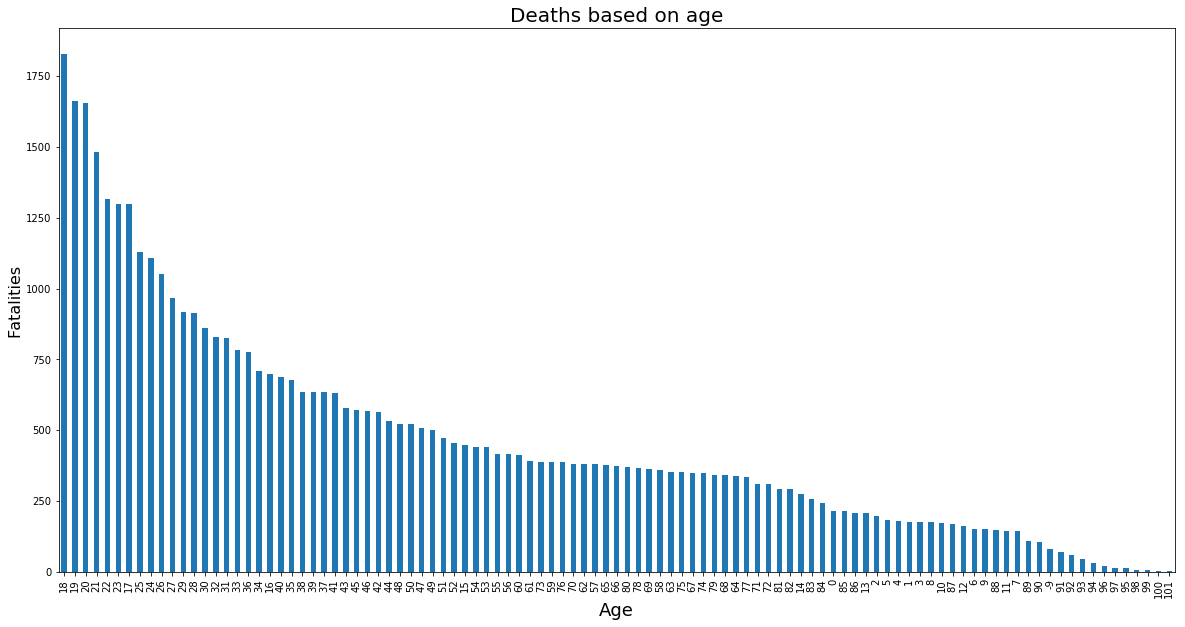

In [14]:
Fatality_data["Age"].value_counts().plot(kind="bar")
plt.title('Deaths based on age', fontsize=20)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Fatalities', fontsize=16)

In [15]:
table = FF.create_table(Fatality_data.head(10))
py.iplot(table, filename='animations-gapminder-data-preview')

In [31]:
Years_from_col = set(Fatality_data['Year'])
Years_ints = sorted(list(Years_from_col))
Years = [str(Year) for Year in Years_ints]

# make list of states
state = []
for state in Fatality_data['State']:
    if state not in state: 
        state.append(state)

columns = []
# make grid
for Year in Years:
    for state in state:
        Fatality_data_by_year = Fatality_data[Fatality_data['Year'] == int(Year)]
        Fatality_data_by_year_and_state = Fatality_data_by_year[Fatality_data_by_year['State'] == state]
        for col_name in Fatality_data_by_year_and_state:
            # each column name is unique
            column_name = '{Year}_{state}_{header}_gapminder_grid'.format(
                Year=Year, state=state, header=col_name
            )
            a_column = Column(list(Fatality_data_by_year_and_state[col_name]), column_name)
            columns.append(a_column)

# upload grid
grid = Grid(columns)
url = py.grid_ops.upload(grid, 'gapminder_grid'+str(time.time()), auto_open=False)
url

'https://plot.ly/~chidzzy/6/'

In [32]:
figure = {
    'data': [],
    'layout': {},
    'frames': [],
    'config': {'scrollzoom': True}
}

# fill in most of layout
figure['layout']['xaxis'] = {'range': [30, 85], 'title': 'Age', 'gridcolor': '#FFFFFF'}
figure['layout']['yaxis'] = {'title': 'State', 'type': 'log', 'gridcolor': '#FFFFFF'}
figure['layout']['hovermode'] = 'closest'
figure['layout']['plot_bgcolor'] = 'rgb(223, 232, 243)'

In [33]:
figure['layout']['slider'] = {
    'args': [
        'slider.value', {
            'duration': 400,
            'ease': 'cubic-in-out'
        }
    ],
    'initialValue': '1989',
    'plotlycommand': 'animate',
    'values': 'Year',
    'visible': True
}

figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

In [34]:
sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

In [36]:
custom_colors = {
    'NSW': 'rgb(171, 99, 250)',
    'ACT': 'rgb(230, 99, 250)',
    'WA': 'rgb(99, 110, 250)',
    'SA': 'rgb(25, 211, 243)',
    'NT': 'rgb(9, 255, 255)',
    'QLD': 'rgb(50, 170, 255)',
    'TAS': 'rgb(20, 198, 250)',
    'VIC': 'rgb(9, 200, 200)' 
}

col_name_template = '{Year}_{tate}_{header}_gapminder_grid'
year = 1989
for state in state:
    data_dict = {
        'xsrc': grid.get_column_reference(col_name_template.format(
            year=year, state=state, header='Age'
        )),
        'ysrc': grid.get_column_reference(col_name_template.format(
            year=year, state=state, header='State'
        )),
        'mode': 'markers',
        'textsrc': grid.get_column_reference(col_name_template.format(
            year=year, state=state, header='Year'
        )),
        'marker': {
            'sizemode': 'area',
            'sizeref': 200000,
            'sizesrc': grid.get_column_reference(col_name_template.format(
                 year=year, state=state, header='pop'
            )),
            'color': custom_colors[continent]
        },
        'name': state
    }
    figure['data'].append(data_dict)

AttributeError: 'Grid' object has no attribute 'get_column_reference'

In [39]:
for year in year:
    frame = {'data': [], 'name': str(year)}
    for state in state:
        data_dict = {
            'xsrc': grid.get_column_reference(col_name_template.format(
                year=year, continent=continent, header='Age'
            )),
            'ysrc': grid.get_column_reference(col_name_template.format(
                year=year, continent=continent, header='State'
            )),
            'mode': 'markers',
            'textsrc': grid.get_column_reference(col_name_template.format(
                year=year, continent=continent, header='Year'
                )),
            'marker': {
                'sizemode': 'area',
                'sizeref': 200000,
                'sizesrc': grid.get_column_reference(col_name_template.format(
                    year=year, continent=continent, header='pop'
                )),
                'color': custom_colors[continent]
            },
            'name': state
        }
        frame['data'].append(data_dict)

    figure['frames'].append(frame)
    slider_step = {'args': [
        [year],
        {'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': year,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

figure['layout']['sliders'] = [sliders_dict]

py.icreate_animations(figure, 'gapminder_example'+str(time.time()))

TypeError: 'int' object is not iterable

In [17]:
# file:///C:/Users/chris/Desktop/Plot%206.html

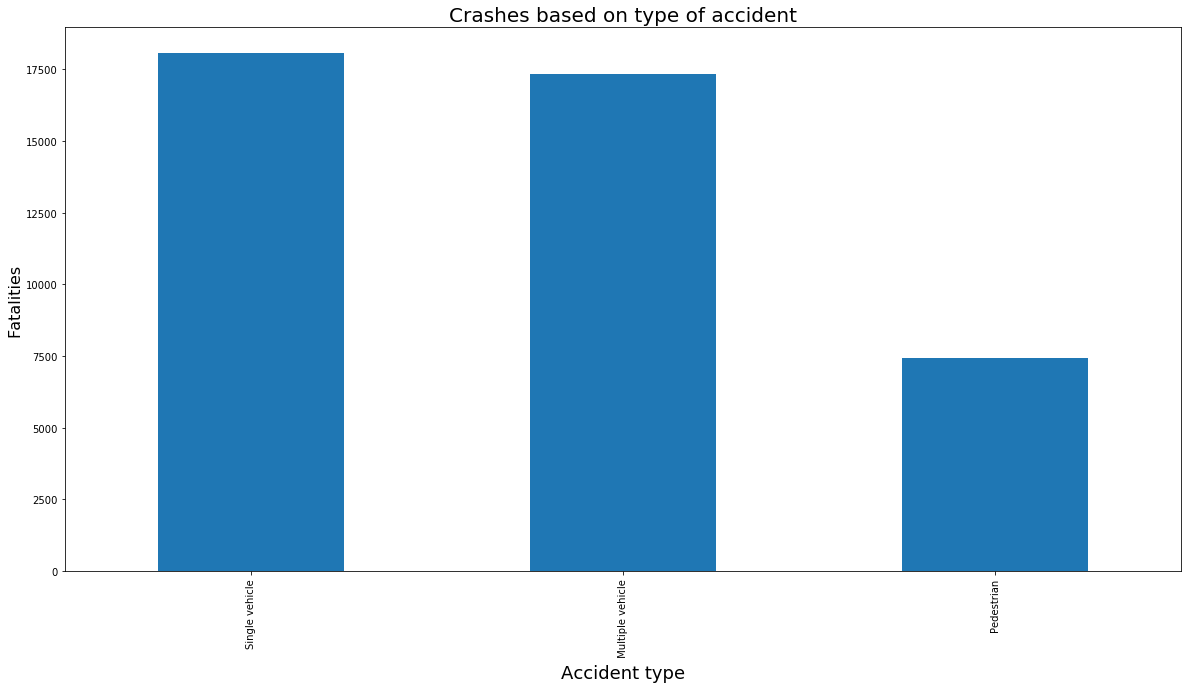

In [18]:
crash_data["Crash_Type"].value_counts().plot(kind="bar")
plt.title('Crashes based on type of accident', fontsize=20)
plt.xlabel('Accident type', fontsize=18)
plt.ylabel('Fatalities', fontsize=16)

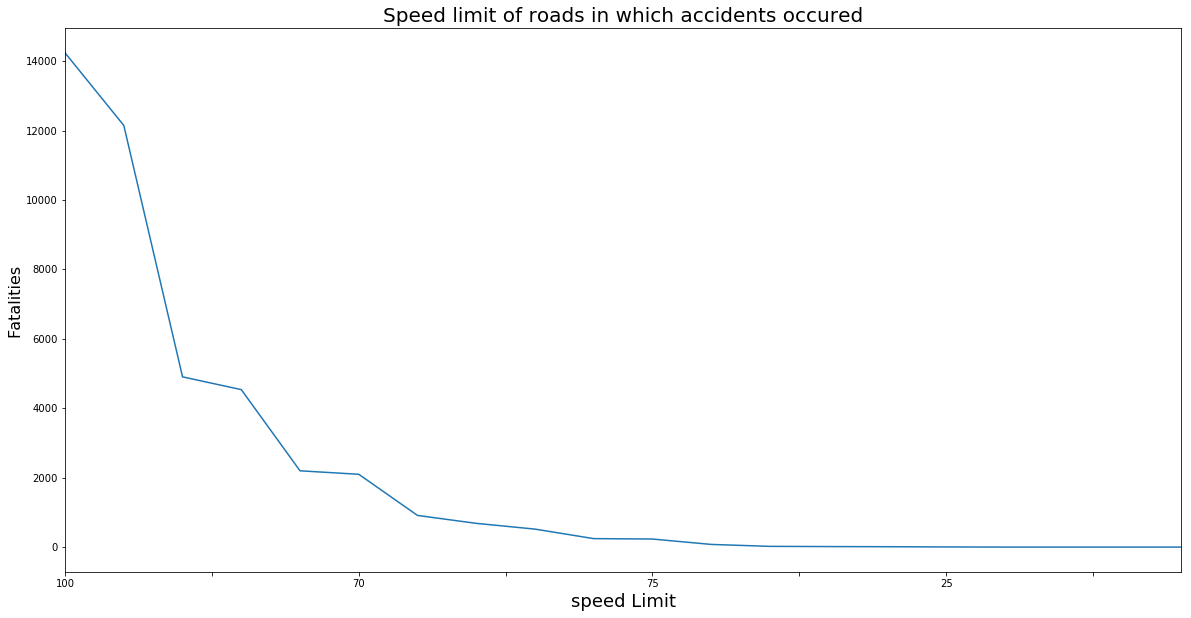

In [19]:
crash_data["Speed_Limit"].value_counts().plot(kind="line")
plt.title('Speed limit of roads in which accidents occured', fontsize=20)
plt.xlabel('speed Limit', fontsize=18)
plt.ylabel('Fatalities', fontsize=16)

In [20]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

In [21]:
cities = gp.read_file(gp.datasets.get_path('naturalearth_cities'))

In [22]:
world.head()

,continent,gdp_md_est,geometry,iso_a3,name,pop_est
0,Asia,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",AFG,Afghanistan,28400000.0
1,Africa,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,AGO,Angola,12799293.0
2,Europe,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",ALB,Albania,3639453.0
3,Asia,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",ARE,United Arab Emirates,4798491.0
4,South America,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,ARG,Argentina,40913584.0


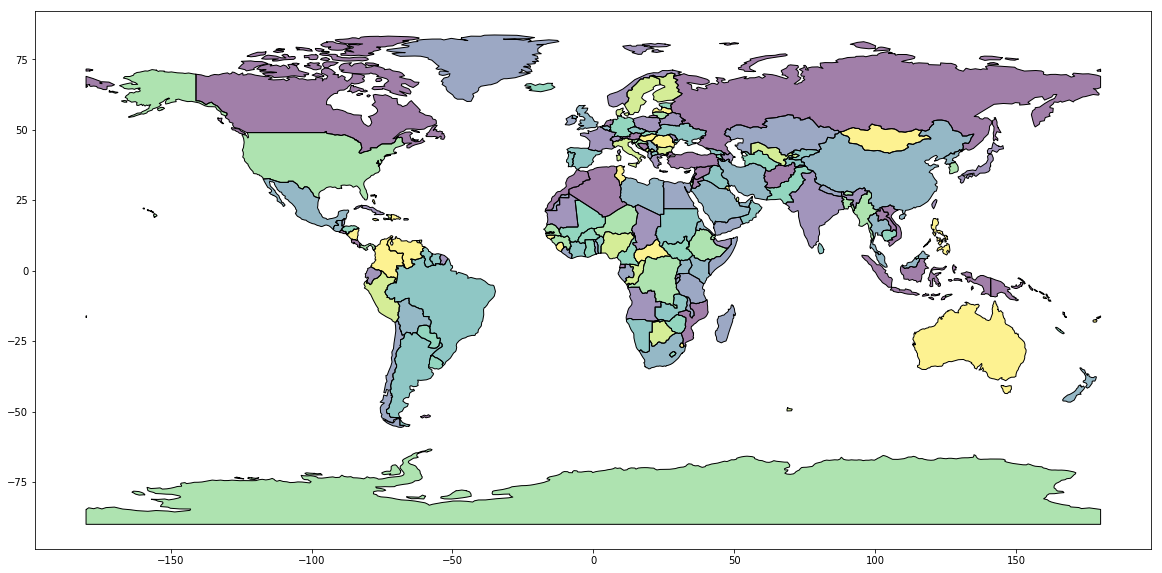

In [23]:
world.plot();

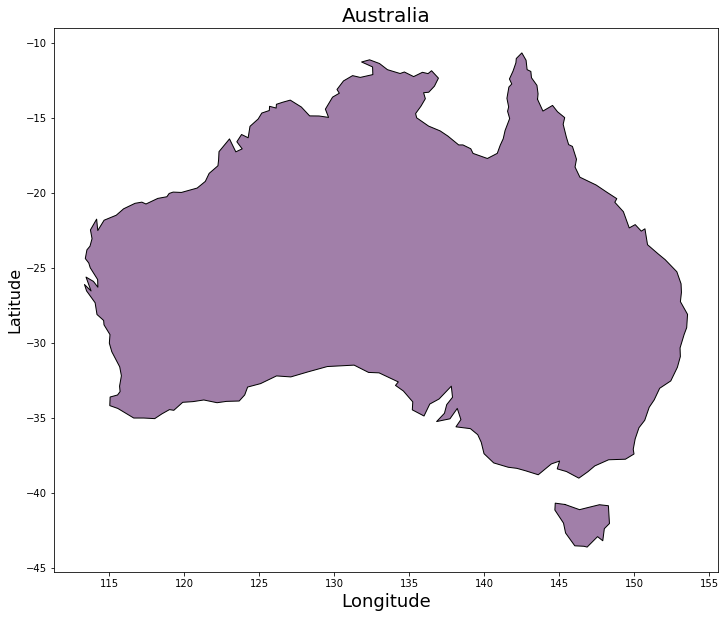

In [24]:
australia = world[world.name == "Australia"]
australia.plot()
plt.title('Australia', fontsize=20)
plt.xlabel('Longitude', fontsize=18)
plt.ylabel('Latitude', fontsize=16)

In [25]:
shp_file_name = "ne_10m_admin_1_states_provinces.shp"
zip_file_name = "ne_10m_admin_1_states_provinces.zip"
web_file_path = ("http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_1_states_provinces.zip")

In [26]:

def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_states = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_states.extractall(put_it_here)
    zip_of_states.close()

In [27]:
if os.path.isfile(shp_file_name):
    print("loading from file")
else:
    if os.path.isfile(zip_file_name):
        print("unzipping")
        unzip_zipfile(zip_file_name)
    else:
        import requests
        print("loading from the internet")
        page = requests.get(web_file_path)
        with open(zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print("done")

loading from file
done


In [28]:
bounds = gp.GeoDataFrame.from_file(shp_file_name)
bounds(bounds.index[167:178])
bounds.head(180)

TypeError: 'GeoDataFrame' object is not callable

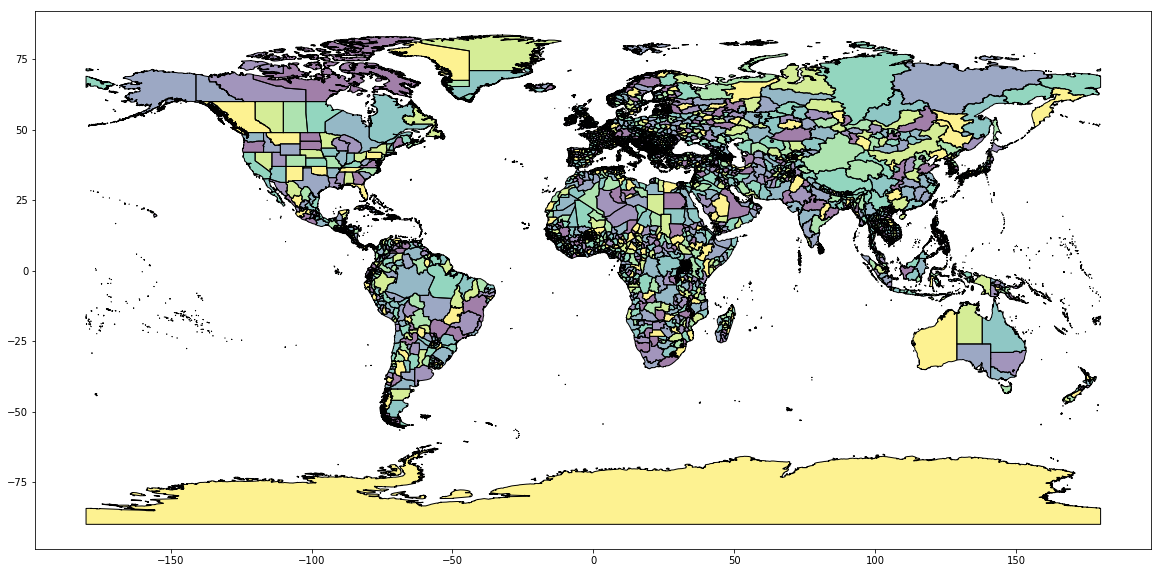

In [29]:
bounds.plot()

Thank You